In [ ]:
#COMPLEMENTS PRICES TABLE (YF)

query_prices = 'SELECT * FROM prices_relation'    
Prices_df = pd.read_sql_query(query_prices, engine)
Prices_df = Set_DF(Prices_df)
Prices_df = DD_Index(Prices_df)

st_date = datetime(2003, 10, 18).date()
ed_date = datetime.today().date()
n_days = (ed_date - st_date).days
days_str = str(n_days) + 'd'

ticker = 'MSFT US'
yf_ticker = vayf_df.loc[ticker, 'YF Ticker']
t_list = []
t_list.append(yf_ticker)
current_px = yf.download(t_list, period = days_str)
newPx_df = pd.DataFrame(np.nan, index = pd.Index(current_px.T.columns.map(lambda x: x.date()), name = 'Date'), columns = ['Dummy'])

stock_list = Prices_df.columns.values.tolist()
for ticker in stock_list:
    t_list = []
    yf_ticker = vayf_df.loc[ticker, 'YF Ticker']
    t_list.append(yf_ticker)
    current_px = yf.download(t_list, period = days_str)
    if (len(current_px.index) > 0):
        print(yf_ticker)
        ret_query = pd.DataFrame(current_px['Adj Close']).rename(columns = {'Adj Close': ticker})
        newPx_df = newPx_df.join(ret_query)
    
    else:
        print('Recovered')
        newPx_df = newPx_df.join(Prices_df[ticker])
        
newPx_df.drop(['Dummy'], axis = 1, inplace = True)
newPx_df.fillna(method = 'bfill', inplace = True)
newPx_df.fillna(method = 'ffill', inplace = True)
#Prices_df.to_sql('prices_relation_bu', engine, index = True, if_exists = 'replace')
#newPx_df[::-1].to_sql('prices_relation', engine, index = True, if_exists = 'replace')
newPx_df[::-1]


round(100 * Prices_df['VIX'].pct_change()[-500:].rolling(63).corr(Prices_df['USDBRL'].pct_change()[-500:].rolling(63)).dropna(), 2).plot(c = 'k', label = 'USDBRL vs VIX Corr', figsize = (12, 8))
round(100 * Prices_df['VIX'].pct_change()[-500:].rolling(63).corr(Prices_df['USDMXN'].pct_change()[-500:].rolling(63)).dropna(), 2).plot(c = 'r', label = 'USDMXN vs VIX Corr')
plt.legend(loc = 'best')
plt.title('VIX Corrs, MAV 63')
plt.xticks(rotation = 45)
plt.show()

In [356]:
#SMART BACKUP RECOVER

query_nprices = 'SELECT * FROM prices_relation'    
NPrices_df = pd.read_sql_query(query_nprices, engine)
NPrices_df = Set_DF(NPrices_df)
NPrices_df = DD_Index(NPrices_df)

query_prices = 'SELECT * FROM prices_relation_bu'    
Prices_df = pd.read_sql_query(query_prices, engine)
Prices_df = Set_DF(Prices_df)
Prices_df = DD_Index(Prices_df)

cutoff_date = datetime(2005, 1, 1).date()
lad = datetime(2023, 4, 26).date()

Prices_df.loc[lad] = NPrices_df.loc[lad]
Prices_df.sort_index(ascending = False, inplace = True)

Slice01 = NPrices_df[NPrices_df.index < cutoff_date].copy()
Slice02 = Prices_df[Prices_df.index >= cutoff_date].copy()

FPrices_df = pd.concat([Slice01, Slice02])
FPrices_df.sort_index(ascending = False, inplace = True)
#FPrices_df.to_sql('prices_relation', engine, index = True, if_exists = 'replace')
FPrices_df

ABST US    AMPL US    ASUR US  AXON US    BLKB US    CDAY US  \
Date                                                                        
2023-04-26  7.880000  11.510000  13.540000   216.13  68.030000  63.220000   
2023-04-25  7.760000  11.070000  13.530000   220.85  66.390000  62.370000   
2023-04-24  7.770000  11.910000  14.390000   223.83  66.615000  66.320000   
2023-04-21  7.940000  12.290000  14.620000   225.02  66.800000  67.020000   
2023-04-20  8.010000  12.160000  16.680000   224.47  66.490000  66.700000   
...              ...        ...        ...      ...        ...        ...   
1995-01-06  2.013979  54.799999  55.000000     0.46   7.101102  31.209999   
1995-01-05  2.013979  54.799999  55.000000     0.46   7.101102  31.209999   
1995-01-04  2.013979  54.799999  54.166668     0.46   7.101102  31.209999   
1995-01-03  2.013979  54.799999  56.666668     0.46   7.101102  31.209999   
1994-12-30  2.013979  54.799999  57.916668     0.46   7.101102  31.209999   

            ECOM US  EGAN US    ESMT US  EVBG US  ...  T5YIFR  T10YIE  \
Date                                              ...                   
2023-04-26    23.09     7.28  16.890000  26.0000  ...    2.24    2.25   
2023-04-25    23.09     7.42  17.010000  26.3700  ...    2.23    2.28   
2023-04-24    23.09     7.15  17.840000  28.7753  ...    2.26    2.28   
2023-04-21    23.09     7.19  17.900000  28.2100  ...    2.24    2.26   
2023-04-20    23.09     7.21  17.230000  30.3700  ...    2.23    2.28   
...             ...      ...        ...      ...  ...     ...     ...   
1995-01-06    18.44   230.00  34.119999  15.2500  ...    1.98    1.64   
1995-01-05    18.44   230.00  34.119999  15.2500  ...    1.98    1.64   
1995-01-04    18.44   230.00  34.119999  15.2500  ...    1.98    1.64   
1995-01-03    18.44   230.00  34.119999  15.2500  ...    1.98    1.64   
1994-12-30    18.44   230.00  34.119999  15.2500  ...    1.98    1.64   

               M2SL  M2CP Velocity  M2MP Velocity  TOTALSLAR     TOTBKCR  \
Date                                                                       
2023-04-26  20818.1     -25.334907      -6.373876       3.82  17312.1518   
2023-04-25  20818.1     -25.334907      -6.373876       3.82  17312.1518   
2023-04-24  21062.5     -11.544592      -4.100747       3.82  17312.1518   
2023-04-21  21062.5     -11.544592      -4.100747       3.82  17334.7014   
2023-04-20  21062.5     -11.544592      -4.100747       3.82  17334.7014   
...             ...            ...            ...        ...         ...   
1995-01-06   4679.4            NaN            NaN       8.32   4513.7027   
1995-01-05   4679.4            NaN            NaN       8.32   4513.7027   
1995-01-04   4679.4            NaN            NaN       8.32   4513.7027   
1995-01-03   4679.4            NaN            NaN       8.32   4513.7027   
1994-12-30   4679.4            NaN            NaN       8.32   4513.7027   

            DRCCLACBS  TOTBKCR Velocity   USDJPY  
Date                                              
2023-04-26       2.25          2.388590  133.711  
2023-04-25       2.25          2.388590  133.590  
2023-04-24       2.25          2.388590  134.261  
2023-04-21       2.25          2.521955  133.996  
2023-04-20       2.25          2.449022  134.242  
...               ...               ...      ...  
1995-01-06       4.81               NaN  114.180  
1995-01-05       4.81               NaN  114.180  
1995-01-04       4.81               NaN  114.180  
1995-01-03       4.81               NaN  114.180  
1994-12-30       4.81               NaN  114.180  

[7347 rows x 848 columns]

Enter Start Date (empty for 20/07/01 or YY/MM/DD): 


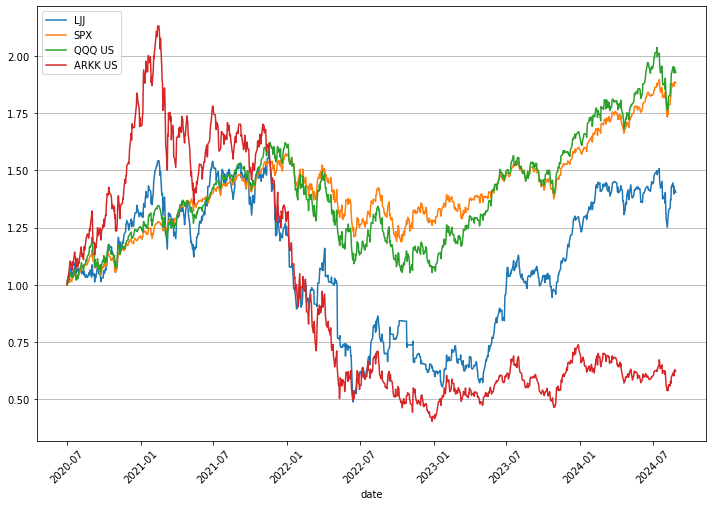


Yearly Returns:
               LJJ    SPX  QQQ US  ARKK US
date                                      
2020-12-31   31.62  21.40   25.48    69.37
2021-12-31   -6.69  28.73   27.42   -24.02
2022-12-31  -49.35 -18.18  -32.58   -66.97
2023-12-31  105.75  24.76   54.03    67.64
2024-12-31    9.71  17.98   16.07   -12.68

Yearly Vols:
              LJJ    SPX  QQQ US  ARKK US
date                                     
2020-12-31  25.25  15.76   24.15    36.02
2021-12-31  33.06  13.36   19.04    38.54
2022-12-31  55.24  21.35   28.67    61.29
2023-12-31  41.21  16.18   21.64    45.53
2024-12-31  23.62  11.65   16.33    35.69

Yearly SR:
             LJJ   SPX  QQQ US  ARKK US
date                                   
2020-12-31  1.25  1.36    1.06     1.93
2021-12-31 -0.20  2.15    1.44    -0.62
2022-12-31 -0.89 -0.85   -1.14    -1.09
2023-12-31  2.57  1.53    2.50     1.49
2024-12-31  0.41  1.54    0.98    -0.36

Yearly DD:
              LJJ    SPX  QQQ US  ARKK US
date                        

In [195]:
#PNL Series and Stats

pnl_s = pd.read_csv(r"C:\Users\Utilizador\OneDrive\Documentos\Malta\PnL_series.csv")
pnl_df = pd.DataFrame(pnl_s)
pnl_df = Set_DF(pnl_df)
pnl_df = DD_Index(pnl_df)
pnl_df.index = pnl_df.index.map(lambda x: datetime.strptime(x, '%d-%b-%y').date())

cf_s = pd.read_csv(r"C:\Users\Utilizador\OneDrive\Documentos\Malta\CF_series.csv")
cf_df = pd.DataFrame(cf_s)
cf_df = Set_DF(cf_df)
cf_df = DD_Index(cf_df)
cf_df['ccy'] = cf_df['ccy'].map(lambda x: x.split(' ')[0])
cf_df.index = cf_df.index.map(lambda x: datetime.strptime(x, '%d-%b-%y').date())
cf_df = cf_df.join(fxPxs_df['EURUSD'])
cf_df['eq USD'] = cf_df['amt']
cf_df.loc[cf_df[cf_df['ccy'] == 'USD'].index, 'EURUSD'] = 1
cf_df['eq USD'] *= cf_df['EURUSD']
cf_df = round(cf_df.drop(['EURUSD', 'amt', 'ccy'], axis = 1), 2)

fxPxs_df = open_df('fxprices_relation')
add_back = True
base_amt = 3.5 * 10e5
st_date = datetime(2020, 7, 1).date()
dt_str = input('Enter Start Date (empty for 20/07/01 or YY/MM/DD): ')
try:
    st_date = datetime.strptime(dt_str, "%y/%m/%d").date()
except:
    pass   

acct_ccy1 = 'USD'
acct_ccy2 = 'EUR'
label1 = pnl_df.columns[0].split('(')[0] + '(' + acct_ccy1 + ')'
label2 = pnl_df.columns[0].split('(')[0] + '(' + acct_ccy2 + ')'

base_ccy = pnl_df.columns[0].split('(')[-1][:-1]
pair1 = acct_ccy1 + base_ccy
pair2 = acct_ccy2 + base_ccy

pnl_df[label1] = pnl_df[pnl_df.columns[0]] / fxPxs_df[pair1].loc[pnl_df.index]
pnl_df[label2] = pnl_df[pnl_df.columns[0]] / fxPxs_df[pair2].loc[pnl_df.index]
pnl_df = round(pnl_df[pnl_df.index >= st_date], 0)

if (add_back):
    pnl_df = pnl_df.join(cf_df).fillna(0)
    pnl_df[label1] -= pnl_df['eq USD']
    pnl_df = pnl_df.drop(['eq USD'], axis = 1)
    
idxUSD_s = base_amt + pnl_df[label1].expanding().sum()

idxUSD_s.name = 'LJJ'
summary_df = pd.DataFrame(idxUSD_s).join(Prices_df['SPX']).join(Prices_df['QQQ US']).join(Prices_df['ARKK US'])
summary_df /= summary_df.iloc[0]

summary_df.plot(figsize = (12, 8)).legend(loc = 'best')
plt.grid(axis = 'y')
plt.xticks(rotation = 45)
plt.show()

Ysummary_df = summary_df.copy()
Ysummary_df.index = Ysummary_df.index.map(lambda x: datetime(x.year, x.month, x.day))
YVol_df = (Ysummary_df.pct_change().ewm(halflife = 50).std() * np.sqrt(252)).dropna() * 100
YDD_df = ((Ysummary_df / Ysummary_df.rolling(252).max() - 1) * 100).dropna()
YsummaryRet_df = Ysummary_df.resample('Y').last()
YsummaryRet_df.loc[datetime(YsummaryRet_df.index[0].year, 1, 1)] = 1
YsummaryRet_df = YsummaryRet_df.sort_index()
YsummaryRet_df = round(YsummaryRet_df.pct_change() * 100, 2).dropna()
YVol_df = round(YVol_df.resample('Y').mean(), 2)
YDD_df = round(YDD_df.resample('Y').min(), 2)
YCAGR_df = round((((YsummaryRet_df / 100 + 1).expanding().apply(np.prod).T ** (1 / (np.arange(YsummaryRet_df.shape[0]) + 1))).T - 1) * 100, 2)

print('')
print('Yearly Returns:')
print(YsummaryRet_df)
print('')
print('Yearly Vols:')
print(YVol_df)
print('')
print('Yearly SR:')
print(round(YsummaryRet_df / YVol_df, 2))
print('')
print('Yearly DD:')
print(YDD_df)
print('')
print('CAGR:')
print(YCAGR_df)
print('')
print('CAGR/DD:')
print(round(YCAGR_df / abs(YDD_df), 2))
print('')

In [19]:
# Updates Prices relation with inputs from Yahoo Finance - LJJ

import pandas as pd
import numpy as np
import math
import os
import csv
import yfinance as yf
#import mysql.connector
import psycopg2
import requests
import json
import tkinter as tk
import re
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import date
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df

def authenticate(username,password):
    
    auth_url = 'https://app.visiblealpha.com/auth/'
    headers = {'Content-Type': 'application/json', 'Accept': 'application/json'}
    payload = {'username':username, 'password':password}
    
    response = requests.post(auth_url, json = payload, headers = headers)
    
    try:
        jwt = response.json()['jwt']
        # update and return headers
        headers['Authorization'] = 'Bearer '+jwt
        return headers
    
    except:
        print('Review response')
        return response   

def Create_Ind_Records(st_date, columns_list):
    
    print('NEW!!!')
    stock_records_df = pd.DataFrame('n', index=pd.date_range(st_date,today,freq='B').date, columns=columns_list)
    stock_records_df.index.name = 'Date'
    stock_records_df['Checked'] = 'n'
    
    return stock_records_df

map_upper = lambda x: x.upper()
clean_cmdty = lambda x: x.split(' ')[0]

i = 0
price = float()
div = float()
stocks = pd.read_csv(r"C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\RT_Pxs.csv")
ljj_df = pd.DataFrame(stocks)
ljj_df = Set_DF(ljj_df)
ljj_df = DD_Index(ljj_df)

#currencies_majors = pd.read_html('http://tradingeconomics.com/currencies')[0]
#currencies_europe = pd.read_html('http://tradingeconomics.com/currencies')[1]
#currencies_america = pd.read_html('http://tradingeconomics.com/currencies')[2]
#currencies_asia = pd.read_html('http://tradingeconomics.com/currencies')[3]
#crypto = pd.read_html('http://tradingeconomics.com/crypto')[0]
#cmdty_metals = pd.read_html('http://tradingeconomics.com/commodities')[1]
#cmdty_industrials = pd.read_html('http://tradingeconomics.com/commodities')[3]

stock_list = ljj_df.index.tolist()

cont = 0
for current_stock in stock_list:
#    if (ljj_df.loc[current_stock, 'Asset Class'] == 'Stock') | (ljj_df.loc[current_stock, 'Asset Class'] == 'Index'):
    new_list = []
    new_list.append(current_stock)
    yf_len = 0
    try:
        current_px = yf.download(new_list, period = '1d') #group_by='tickers'
        current_px.replace({np.nan: 'Delete', None: 'Delete'}, inplace = True)
        yf_len = len(current_px.index)
    except:
        ljj_df.loc[current_stock, 'Close'] = ljj_df.loc[current_stock, 'Yest Px']
        ljj_df.loc[current_stock, 'Adj Close'] = ljj_df.loc[current_stock, 'Yest Px']
        print(current_stock + ' Failed')
    if (yf_len > 0):
        for cd in current_px.index:
            current_date = cd.date()
            if (current_px.loc[cd, 'Close'] != 'Delete') & (current_date.weekday() < 5):
                ljj_df.loc[current_stock, 'Adj Close'] = current_px.loc[cd, 'Adj Close']
                ljj_df.loc[current_stock, 'Close'] = current_px.loc[cd, 'Close']
                ljj_df.loc[current_stock, 'Open'] = current_px.loc[cd, 'Open']
                ljj_df.loc[current_stock, 'Low'] = current_px.loc[cd, 'Low']
                ljj_df.loc[current_stock, 'High'] = current_px.loc[cd, 'High']
                ljj_df.loc[current_stock, 'Volume'] = current_px.loc[cd, 'Volume']
            else:
                print(current_stock + ' price N/A')
#        else:
            print(current_stock + ' price N/A')
#    elif (ljj_df.loc[current_stock, 'Asset Class'] == 'Currency'):
#        try:
#            ljj_df.loc[current_stock, 'Adj Close'] = currencies_majors['Price'][currencies_majors['Major'].values.tolist().index(current_stock)]
#            ljj_df.loc[current_stock, 'Close'] = currencies_majors['Price'][currencies_majors['Major'].values.tolist().index(current_stock)]
#        except:
#            try:
#                ljj_df.loc[current_stock, 'Adj Close'] = currencies_europe['Price'][currencies_europe['Europe'].values.tolist().index(current_stock)]
#                ljj_df.loc[current_stock, 'Close'] = currencies_europe['Price'][currencies_europe['Europe'].values.tolist().index(current_stock)]
#            except:
#                try:
#                    ljj_df.loc[current_stock, 'Adj Close'] = currencies_america['Price'][currencies_america['America'].values.tolist().index(current_stock)]
#                    ljj_df.loc[current_stock, 'Close'] = currencies_america['Price'][currencies_america['America'].values.tolist().index(current_stock)]
#                except:
#                    try:
#                        ljj_df.loc[current_stock, 'Adj Close'] = currencies_asia['Price'][currencies_asia['Asia'].values.tolist().index(current_stock)]
#                        ljj_df.loc[current_stock, 'Close'] = currencies_asia['Price'][currencies_asia['Asia'].values.tolist().index(current_stock)]
#                    except:
#                        pass
    
#    elif (ljj_df.loc[current_stock, 'Asset Class'] == 'Crypto'):
#        ljj_df.loc[current_stock, 'Adj Close'] = crypto['Price'][crypto['Crypto'].map(map_upper).values.tolist().index(current_stock)]
#        ljj_df.loc[current_stock, 'Close'] = crypto['Price'][crypto['Crypto'].map(map_upper).values.tolist().index(current_stock)]
#    elif (ljj_df.loc[current_stock, 'Asset Class'] == 'Commodity'):
#        try:
#            ljj_df.loc[current_stock, 'Adj Close'] = cmdty_metals['Price'][cmdty_metals['Metals'].map(map_upper).map(clean_cmdty).values.tolist().index(current_stock)]
#            ljj_df.loc[current_stock, 'Close'] = cmdty_metals['Price'][cmdty_metals['Metals'].map(map_upper).map(clean_cmdty).values.tolist().index(current_stock)]
#        except:
#            try:
#                ljj_df.loc[current_stock, 'Adj Close'] = cmdty_industrials['Price'][cmdty_industrials['Industrial'].map(map_upper).map(clean_cmdty).values.tolist().index(current_stock)]
#                ljj_df.loc[current_stock, 'Close'] = cmdty_industrials['Price'][cmdty_industrials['Industrial'].map(map_upper).map(clean_cmdty).values.tolist().index(current_stock)]
#            except:
#                pass
    cont = cont + 1
    print(str(cont) + ' ' + current_stock)


ljj_df.loc['WISE.L', 'Adj Close'] = ljj_df.loc['WISE.L', 'Adj Close'] * ljj_df.loc['GBPUSD=X', 'Adj Close'] / 100
ljj_df.loc['WISE.L', 'Close'] = ljj_df.loc['WISE.L', 'Close'] * ljj_df.loc['GBPUSD=X', 'Close'] / 100

ljj_df.loc['ORSTED.CO', 'Adj Close'] = ljj_df.loc['ORSTED.CO', 'Adj Close'] * ljj_df.loc['EURUSD=X', 'Adj Close'] / ljj_df.loc['DKK=X', 'Adj Close']
ljj_df.loc['ORSTED.CO', 'Close'] = ljj_df.loc['ORSTED.CO', 'Close'] * ljj_df.loc['EURUSD=X', 'Close'] / ljj_df.loc['DKK=X', 'Adj Close']

ljj_df.loc['VWS.CO', 'Adj Close'] = ljj_df.loc['VWS.CO', 'Adj Close'] * ljj_df.loc['EURUSD=X', 'Adj Close'] / ljj_df.loc['DKK=X', 'Adj Close']
ljj_df.loc['VWS.CO', 'Close'] = ljj_df.loc['VWS.CO', 'Close'] * ljj_df.loc['EURUSD=X', 'Close'] / ljj_df.loc['DKK=X', 'Adj Close']

ljj_df.loc['SX5E.SW', 'Adj Close'] = ljj_df.loc['SX5E.SW', 'Adj Close'] * 43.85

ljj_df.loc['SX5E.SW', 'Close'] = ljj_df.loc['SX5E.SW', 'Close'] * 43.85

ljj_df.fillna(method = 'ffill', inplace = True)

ljj_df.to_csv(r"C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\RT_Pxs.csv", index = True)
ljj_df

[*********************100%***********************]  1 of 1 completed
AZUL4.SA price N/A
1 AZUL4.SA
[*********************100%***********************]  1 of 1 completed
GOLL4.SA price N/A
2 GOLL4.SA
[*********************100%***********************]  1 of 1 completed
ANIM3.SA price N/A
3 ANIM3.SA
[*********************100%***********************]  1 of 1 completed
COGN3.SA price N/A
4 COGN3.SA
[*********************100%***********************]  1 of 1 completed
PBR price N/A
5 PBR
[*********************100%***********************]  1 of 1 completed
PETR3.SA price N/A
6 PETR3.SA
[*********************100%***********************]  1 of 1 completed
PETR4.SA price N/A
7 PETR4.SA
[*********************100%***********************]  1 of 1 completed
PRIO3.SA price N/A
8 PRIO3.SA
[*********************100%***********************]  1 of 1 completed
BBAS3.SA price N/A
9 BBAS3.SA
[*********************100%***********************]  1 of 1 completed
BMGB4.SA price N/A
10 BMGB4.SA
[******************

[*********************100%***********************]  1 of 1 completed
VOW3.DE price N/A
80 VOW3.DE
[*********************100%***********************]  1 of 1 completed
INS.DE price N/A
81 INS.DE
[*********************100%***********************]  1 of 1 completed
TEG.DE price N/A
82 TEG.DE
[*********************100%***********************]  1 of 1 completed
VNA.DE price N/A
83 VNA.DE
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ATC.AS: No data found, symbol may be delisted
84 ATC.AS
[*********************100%***********************]  1 of 1 completed
CLNX.MC price N/A
85 CLNX.MC
[*********************100%***********************]  1 of 1 completed
NOS.LS price N/A
86 NOS.LS
[*********************100%***********************]  1 of 1 completed
TEF.MC price N/A
87 TEF.MC
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- EDF.PA: No data found, symbol may be delisted
88 EDF.PA
[*********************100%****

[*********************100%***********************]  1 of 1 completed
^IXIC price N/A
162 ^IXIC
[*********************100%***********************]  1 of 1 completed
SSSS price N/A
163 SSSS
[*********************100%***********************]  1 of 1 completed
AAPL price N/A
164 AAPL
[*********************100%***********************]  1 of 1 completed
AMAT price N/A
165 AMAT
[*********************100%***********************]  1 of 1 completed
AMD price N/A
166 AMD
[*********************100%***********************]  1 of 1 completed
SMCI price N/A
167 SMCI
[*********************100%***********************]  1 of 1 completed
INTC price N/A
168 INTC
[*********************100%***********************]  1 of 1 completed
NOK price N/A
169 NOK
[*********************100%***********************]  1 of 1 completed
SYM price N/A
170 SYM
[*********************100%***********************]  1 of 1 completed
NVDA price N/A
171 NVDA
[*********************100%***********************]  1 of 1 completed
QCOM 

[*********************100%***********************]  1 of 1 completed
DT price N/A
247 DT
[*********************100%***********************]  1 of 1 completed
ESTC price N/A
248 ESTC
[*********************100%***********************]  1 of 1 completed
MDB price N/A
249 MDB
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MDLA: No data found, symbol may be delisted
250 MDLA
[*********************100%***********************]  1 of 1 completed
NET price N/A
251 NET
[*********************100%***********************]  1 of 1 completed
PLTR price N/A
252 PLTR
[*********************100%***********************]  1 of 1 completed
BKSY price N/A
253 BKSY
[*********************100%***********************]  1 of 1 completed
SNOW price N/A
254 SNOW
[*********************100%***********************]  1 of 1 completed
GTLB price N/A
255 GTLB
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SUMO: No data found, symbol m

Yest Px     Adj Close         Close          Open           Low  \
ticker                                                                          
AZUL4.SA     17.40000      5.360000      5.360000      5.480000      5.300000   
GOLL4.SA     11.28000      1.100000      1.100000      1.100000      1.090000   
ANIM3.SA      4.76000      2.550000      2.550000      2.600000      2.510000   
COGN3.SA      2.55000      1.430000      1.430000      1.480000      1.420000   
PBR          14.73010     13.790000     13.790000     13.800000     13.680000   
...               ...           ...           ...           ...           ...   
PL=F        875.91000   1028.099976   1028.099976   1034.699951   1026.000000   
DKK=X         7.46398      6.901170      6.901170      6.910000      6.894050   
INR=X        79.78000     84.080002     84.080002     84.074997     84.022003   
BTC-USD   21677.00000  68203.851562  68203.851562  67939.539062  67560.382812   
ETH-USD    1672.56000   2505.808838   2505.808838   2505.707520   2471.289307   

                  High        Volume Asset Class  
ticker                                            
AZUL4.SA      5.550000  1.708230e+07       Stock  
GOLL4.SA      1.110000  1.829900e+06       Stock  
ANIM3.SA      2.640000  9.051900e+06       Stock  
COGN3.SA      1.510000  3.223170e+07       Stock  
PBR          13.910000  1.439330e+07       Stock  
...                ...           ...         ...  
PL=F       1037.699951  4.465000e+03   Commodity  
DKK=X         6.919930  0.000000e+00    Currency  
INR=X        84.080002  0.000000e+00    Currency  
BTC-USD   68541.382812  2.156785e+10      Crypto  
ETH-USD    2520.998779  1.231486e+10      Crypto  

[330 rows x 8 columns]

<AxesSubplot:xlabel='index'>

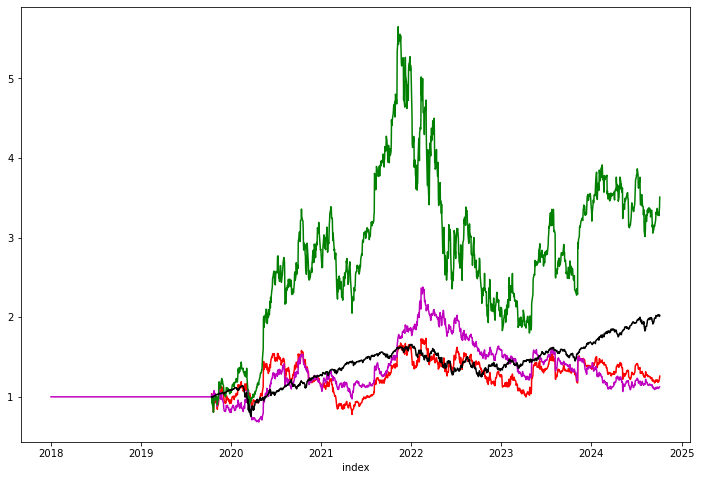

In [114]:
#x = open_df('idio_returns_ridge_cs5')
#y = open_df('pca_idio_returns')
t = 'DDOG US'
(x[t].dropna() + 1).expanding().apply(np.prod).plot(figsize = (12, 8), c = 'r')
(y[t].dropna() + 1).expanding().apply(np.prod).plot(c = 'm')
(Prices_df[t].loc[x[t].dropna().index] / Prices_df[t].loc[x[t].dropna().index[0]]).plot(c = 'g')
(Prices_df['SPX'].loc[x[t].dropna().index] / Prices_df['SPX'].loc[x[t].dropna().index[0]]).plot(c = 'k')

In [12]:
# INTRADAY SECTOR MOVES

import pandas as pd
import numpy as np
import math
import os
import csv
import yfinance as yf
#import mysql.connector
import psycopg2
import requests
import json
import tkinter as tk
import re
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import date
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df

def authenticate(username,password):
    
    auth_url = 'https://app.visiblealpha.com/auth/'
    headers = {'Content-Type': 'application/json', 'Accept': 'application/json'}
    payload = {'username':username, 'password':password}
    
    response = requests.post(auth_url, json = payload, headers = headers)
    
    try:
        jwt = response.json()['jwt']
        # update and return headers
        headers['Authorization'] = 'Bearer '+jwt
        return headers
    
    except:
        print('Review response')
        return response 

def open_df(*args):
    open_str = args[0]
    
    query_open = 'SELECT * FROM ' + open_str
    opened_df = pd.read_sql_query(query_open, engine)
    opened_df = Set_DF(opened_df)
    opened_df = DD_Index(opened_df)
    
    return opened_df

headers = authenticate('leonardob.moraes@outlook.com','akf7a7j5@@')
dbase = "visiblealpha_laptop"

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

Prices_df = open_df('prices_relation')
Prices_df.sort_index(inplace = True)

today = datetime.today().date()
INIT_YEAR = datetime(today.year, 1, 1).date()
INIT_YEAR = Prices_df[Prices_df.index > INIT_YEAR].index[0]

ETF_list_1 = ['QQQ', 'IGV', 'SOXX', 'XHB', 'XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLP', 
            'XLU', 'XLV', 'XLY', 'XBI', 'ARKK', 'EWZ', 'IWM']
ETF_list_2 = ['SPX']
ETF2_dikt = {'SPX' : 'SPY'}
ETF_df = pd.DataFrame(index = ETF_list_2 + ETF_list_1, columns = ['Year Start Px', 'YTD High', 'YTD Low', 'd-2 Px', 'd-1 Px', 
                                                                  'd0 Px', 'YTD %', 'YTD DD', 'YTD Reb', 'd-1 %', 'd0 %'])

ETF_df.loc[ETF_list_1, 'Year Start Px'] = Prices_df[pd.Series(ETF_list_1).map(lambda x: x +  ' US')].loc[INIT_YEAR].values
ETF_df.loc[ETF_list_2, 'Year Start Px'] = Prices_df[ETF_list_2].loc[INIT_YEAR].values
ETF_df.loc[ETF_list_1, 'YTD High'] = round(Prices_df[Prices_df.index >= datetime(today.year, 1, 1).date()][pd.Series(ETF_list_1).map(lambda x: x +  ' US')].max(), 2).values
ETF_df.loc[ETF_list_2, 'YTD High'] = round(Prices_df[Prices_df.index >= datetime(today.year, 1, 1).date()][pd.Series(ETF_list_2)].max(), 2).values
ETF_df.loc[ETF_list_1, 'YTD Low'] = round(Prices_df[Prices_df.index >= datetime(today.year, 1, 1).date()][pd.Series(ETF_list_1).map(lambda x: x +  ' US')].min(), 2).values
ETF_df.loc[ETF_list_2, 'YTD Low'] = round(Prices_df[Prices_df.index >= datetime(today.year, 1, 1).date()][pd.Series(ETF_list_2)].min(), 2).values
ETF_df.loc[ETF_list_1, 'd-2 Px'] = Prices_df[pd.Series(ETF_list_1).map(lambda x: x +  ' US')].iloc[-2].values
ETF_df.loc[ETF_list_2, 'd-2 Px'] = Prices_df[ETF_list_2].iloc[-2].values
ETF_df.loc[ETF_list_1, 'd-1 Px'] = Prices_df[pd.Series(ETF_list_1).map(lambda x: x +  ' US')].iloc[-1].values
ETF_df.loc[ETF_list_2, 'd-1 Px'] = Prices_df[ETF_list_2].iloc[-1].values

current_pxs = yf.download([ETF2_dikt[ETF_list_2[0]]] + ETF_list_1, period = '1d')['Adj Close'].T
ETF_df.loc[ETF_list_1, 'd0 Px'] = current_pxs.loc[ETF_list_1, current_pxs.columns[0]].values
ETF_df.loc[ETF_list_2, 'd0 Px'] = current_pxs.loc[ETF2_dikt[ETF_list_2[0]], current_pxs.columns[0]]
ETF_df['d0 Px'] = ETF_df['d0 Px'].map(lambda x: round(x, 2))
IWM_fact = ETF_df.loc['IWM', 'd-1 Px'] / yf.download('IWM', period = '2d')['Adj Close'].T.iloc[0]
ETF_df.loc['IWM', 'Year Start Px'] = round(ETF_df.loc['IWM', 'Year Start Px'] / IWM_fact, 2)
ETF_df.loc['IWM', 'YTD High'] = round(ETF_df.loc['IWM', 'YTD High'] / IWM_fact, 2)
ETF_df.loc['IWM', 'YTD Low'] = round(ETF_df.loc['IWM', 'YTD Low'] / IWM_fact, 2)
ETF_df.loc['IWM', 'd-2 Px'] = round(ETF_df.loc['IWM', 'd-2 Px'] / IWM_fact, 2)
ETF_df.loc['IWM', 'd-1 Px'] = round(ETF_df.loc['IWM', 'd-1 Px'] / IWM_fact, 2)

ETF_df['YTD %'] = 100 * (ETF_df['d0 Px'] / ETF_df['Year Start Px'] - 1)
ETF_df['YTD %'] = ETF_df['YTD %'].map(lambda x: round(x, 2))
ETF_df['d-1 %'] = 100 * (ETF_df['d-1 Px'] / ETF_df['d-2 Px'] - 1)
ETF_df['d-1 %'] = ETF_df['d-1 %'].map(lambda x: round(x, 2))

ETF_df['YTD DD'] = 100 * (ETF_df['d0 Px'] / ETF_df['YTD High'] - 1)
ETF_df['YTD DD'] = ETF_df['YTD DD'].map(lambda x: round(x, 2)).map(lambda x: min(0, x))

ETF_df['YTD Reb'] = 100 * (ETF_df['d0 Px'] / ETF_df['YTD Low'] - 1)
ETF_df['YTD Reb'] = ETF_df['YTD Reb'].map(lambda x: round(x, 2)).map(lambda x: max(0, x))

ETF_df['d0 %'] = 100 * (ETF_df['d0 Px'] / ETF_df['d-1 Px'] - 1)
ETF_df['d0 %'] = ETF_df['d0 %'].map(lambda x: round(x, 2))

ETF_df

[*********************100%***********************]  18 of 18 completed
[*********************100%***********************]  1 of 1 completed


Year Start Px YTD High YTD Low  d-2 Px  d-1 Px   d0 Px  YTD %  YTD DD  \
SPX       471.5799   584.63  467.92  577.93  579.23  579.04  22.79   -0.96   
QQQ         401.81   502.29  396.75  488.36  492.32  495.32  23.27   -1.39   
IGV      78.874001    93.42   77.02   90.77   91.79   92.20  16.90   -1.31   
SOXX    185.116669   264.67  179.62  226.04   227.3  229.58  24.02  -13.26   
XHB          94.48   125.54   91.71  117.93  118.16  116.54  23.35   -7.17   
XLB         85.125    97.63   81.32    95.7   94.56   93.96  10.38   -3.76   
XLC          72.25    91.23   71.74   90.29   90.62   90.85  25.74   -0.42   
XLE          84.95    98.08   79.88   89.83    89.8   89.77   5.67   -8.47   
XLF         37.645    47.62   37.17   47.11   47.13   46.63  23.87   -2.08   
XLI        112.791   139.27  110.11  136.73  135.76  135.40  20.05   -2.78   
XLP          72.82    84.22    71.7   81.86   81.74   81.06  11.32   -3.75   
XLU          64.26    82.23   59.67  82.135   81.58   80.38  25.09   -2.25   
XLV       138.4822    157.2  136.38  150.41  149.37  148.59   7.30   -5.48   
XLY         177.09   200.86  169.45   194.1  200.18  200.81  13.39   -0.02   
XBI          90.23   102.93   81.96   96.67   97.25   97.15   7.67   -5.62   
ARKK       50.5891    52.37   39.49  45.765   47.38   47.67  -5.77   -8.97   
EWZ         34.225    34.96   26.88  28.005   28.34   28.13 -17.81  -19.54   
IWM         199.49   226.69  189.45  219.25  219.72  218.89   9.72   -3.44   

      YTD Reb  d-1 %  d0 %  
SPX     23.75   0.22 -0.03  
QQQ     24.84   0.81  0.61  
IGV     19.71   1.12  0.45  
SOXX    27.81   0.56  1.00  
XHB     27.07   0.20 -1.37  
XLB     15.54  -1.19 -0.63  
XLC     26.64   0.37  0.25  
XLE     12.38  -0.03 -0.03  
XLF     25.45   0.04 -1.06  
XLI     22.97  -0.71 -0.27  
XLP     13.05  -0.15 -0.83  
XLU     34.71  -0.68 -1.47  
XLV      8.95  -0.69 -0.52  
XLY     18.51   3.13  0.31  
XBI     18.53   0.60 -0.10  
ARKK    20.71   3.53  0.61  
EWZ      4.65   1.20 -0.74  
IWM     15.54   0.21 -0.38

QQQ US Drawdown rank: 1303o, -0.07% in 4d, 2200 samples, since 16Mar2016

## Summary of subsequent performances ##

1d:
Mean: 0.11%
Median: 0.12%

5d N/A

10d N/A

20d N/A


DECILE SUMMARY 1 decile 5
           QQQ US MEAN  QQQ US MEDIAN
QQQ US DD                            
0                 0.20           0.21
1                 0.11           0.16
2                 0.17           0.14
3                -0.03           0.02
4                 0.08           0.06
5                 0.14           0.16
6                 0.04           0.07

DECILE SUMMARY 5 decile 5
           QQQ US MEAN  QQQ US MEDIAN
QQQ US DD                            
0                 0.72           0.69
1                 0.46           0.46
2                 0.39           1.07
3                 0.45           0.81
4                 0.34           0.48
5                 0.55           0.57
6                 0.25           0.45

DECILE SUMMARY 10 decile 5
           QQQ US MEAN  QQQ US MEDIAN
QQQ US DD              

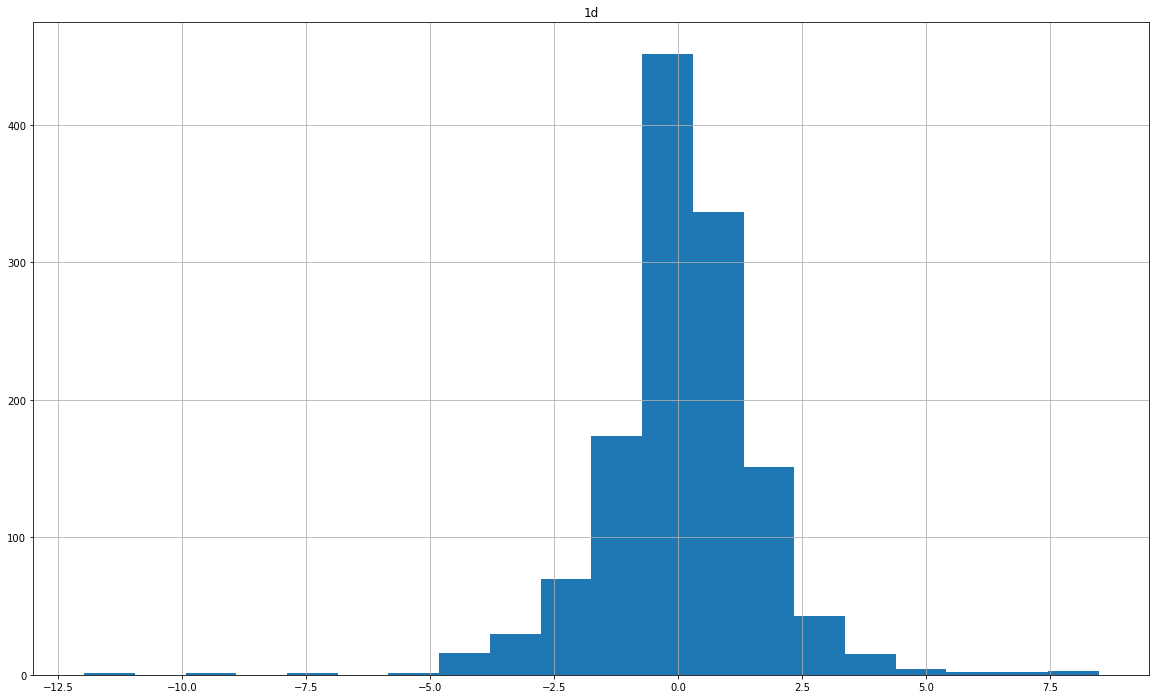

In [11]:
#MOST RECENT DRAWDOWN - QQQ


asset = 'QQQ US'
lookback_s = 4

lookback_s += 1
lookback_l = 2200
subs1 = 1
subs2 = 5
subs3 = 10
subs4 = 20
subsRET_s1 = ''
subsRET_s2 = ''
subsRET_s3 = ''
subsRET_s4 = ''

currentPx_s = Prices_df[asset][-lookback_l: ]
currentDD_s = Prices_df[asset][-lookback_s: ]
currentDD = round(100 * (currentDD_s.iloc[-1] / currentDD_s.max() - 1), 2)
pastDD_s = round(100 * (Prices_df[asset].loc[Prices_df[asset].rolling(lookback_s).max().dropna().index] / 
                        Prices_df[asset].rolling(lookback_s).max().dropna() - 1), 2)[-lookback_l: ]

currDD_rank = pastDD_s.sort_values().tolist().index(currentDD)


print(asset + ' Drawdown rank: ' + str(currDD_rank) + 'o, ' + str(currentDD) + '% in ' + str(lookback_s - 1) + 'd, ' + 
      str(lookback_l) + ' samples, since ' + Prices_df[asset][-lookback_l: ].index[0].strftime('%d%b%Y'))
worstDD_s = pastDD_s[pastDD_s < currentDD]

valid = True
print('')
print('## Summary of subsequent performances ##')
print('')
try:
    subsRET_dates1 = worstDD_s.index.map(lambda x: Prices_df[asset].index[Prices_df[asset].index.tolist().index(x) + subs1])
    subsRET_s1 = round(100 * pd.Series(Prices_df[asset].loc[subsRET_dates1].values / Prices_df[asset].loc[worstDD_s.index].values - 
                                       1, index = Prices_df[asset].loc[worstDD_s.index].index), 2)
    subsRET_s1.name = str(subs1) + 'd'
    print(str(subs1) + 'd:')
    print('Mean: ' + str(round(subsRET_s1.mean(), 2)) + '%')
    print('Median: ' + str(round(subsRET_s1.median(), 2)) + '%')
    print('')
except:
    valid = False
    print(str(subs1) + 'd N/A')
    print('')
try:
    subsRET_dates2 = worstDD_s.index.map(lambda x: Prices_df[asset].index[Prices_df[asset].index.tolist().index(x) + subs2])
    subsRET_s2 = round(100 * pd.Series(Prices_df[asset].loc[subsRET_dates2].values / Prices_df[asset].loc[worstDD_s.index].values - 
                                       1, index = Prices_df[asset].loc[worstDD_s.index].index), 2)
    subsRET_s2.name = str(subs2) + 'd'
    print(str(subs2) + 'd:')
    print('Mean: ' + str(round(subsRET_s2.mean(), 2)) + '%')
    print('Median: ' + str(round(subsRET_s2.median(), 2)) + '%')
    print('')    
except:
    print(str(subs2) + 'd N/A')
    print('') 
try:
    subsRET_dates3 = worstDD_s.index.map(lambda x: Prices_df[asset].index[Prices_df[asset].index.tolist().index(x) + subs3])
    subsRET_s3 = round(100 * pd.Series(Prices_df[asset].loc[subsRET_dates3].values / Prices_df[asset].loc[worstDD_s.index].values - 
                                       1, index = Prices_df[asset].loc[worstDD_s.index].index), 2)
    subsRET_s3.name = str(subs3) + 'd'
    print(str(subs3) + 'd:')
    print('Mean: ' + str(round(subsRET_s3.mean(), 2)) + '%')
    print('Median: ' + str(round(subsRET_s3.median(), 2)) + '%')
    print('')    
except:
    print(str(subs3) + 'd N/A')
    print('')     
try:
    subsRET_dates4 = worstDD_s.index.map(lambda x: Prices_df[asset].index[Prices_df[asset].index.tolist().index(x) + subs4])
    subsRET_s4 = round(100 * pd.Series(Prices_df[asset].loc[subsRET_dates4].values / Prices_df[asset].loc[worstDD_s.index].values - 
                                       1, index = Prices_df[asset].loc[worstDD_s.index].index), 2)
    subsRET_s4.name = str(subs4) + 'd'
    print(str(subs4) + 'd:')
    print('Mean: ' + str(round(subsRET_s4.mean(), 2)) + '%')
    print('Median: ' + str(round(subsRET_s4.median(), 2)) + '%')
except:
    print(str(subs4) + 'd N/A')
    print('')         

if (valid):
    try:
        pd.DataFrame(subsRET_s1).join(subsRET_s2).join(subsRET_s3).join(subsRET_s4).hist(bins = 20, figsize = (20, 12))
    except:
        try:
            pd.DataFrame(subsRET_s1).join(subsRET_s2).join(subsRET_s3).hist(bins = 20, figsize = (20, 12))
        except:
            try:
                pd.DataFrame(subsRET_s1).join(subsRET_s2).hist(bins = 20, figsize = (20, 12))
            except:
                try:
                    pd.DataFrame(subsRET_s1).hist(bins = 20, figsize = (20, 12))
                except:
                    pass
            
    plt.plot()
    
quant_s = pd.qcut(pastDD_s, q = 10, labels = False, duplicates = 'drop')

fwdRET1_s = round(100 * (currentPx_s.shift(-subs1) / currentPx_s - 1), 2).dropna()
fwdRET2_s = round(100 * (currentPx_s.shift(-subs2) / currentPx_s - 1), 2).dropna()
fwdRET3_s = round(100 * (currentPx_s.shift(-subs3) / currentPx_s - 1), 2).dropna()
fwdRET4_s = round(100 * (currentPx_s.shift(-subs4) / currentPx_s - 1), 2).dropna()

summary1_s = pd.DataFrame(fwdRET1_s).join(quant_s, rsuffix = ' DD')
summary2_s = pd.DataFrame(fwdRET2_s).join(quant_s, rsuffix = ' DD')
summary3_s = pd.DataFrame(fwdRET3_s).join(quant_s, rsuffix = ' DD')
summary4_s = pd.DataFrame(fwdRET4_s).join(quant_s, rsuffix = ' DD')

summary1_df = summary1_s.groupby([asset + ' DD']).mean()
summary2_df = summary2_s.groupby([asset + ' DD']).mean()
summary3_df = summary3_s.groupby([asset + ' DD']).mean()
summary4_df = summary4_s.groupby([asset + ' DD']).mean()

summary1_2df = summary1_s.groupby([asset + ' DD']).median()
summary2_2df = summary2_s.groupby([asset + ' DD']).median()
summary3_2df = summary3_s.groupby([asset + ' DD']).median()
summary4_2df = summary4_s.groupby([asset + ' DD']).median()

print('')
print('DECILE SUMMARY ' + str(subs1) + ' decile ' + str(int(quant_s.iloc[-1])))
print(round(summary1_df.rename(columns = {asset: asset + ' MEAN'}).join(summary1_2df.rename(columns = {asset: asset + ' MEDIAN'})), 2))
print('')
print('DECILE SUMMARY ' + str(subs2) + ' decile ' + str(int(quant_s.iloc[-1])))
print(round(summary2_df.rename(columns = {asset: asset + ' MEAN'}).join(summary2_2df.rename(columns = {asset: asset + ' MEDIAN'})), 2))
print('')
print('DECILE SUMMARY ' + str(subs3) + ' decile ' + str(int(quant_s.iloc[-1])))
print(round(summary3_df.rename(columns = {asset: asset + ' MEAN'}).join(summary3_2df.rename(columns = {asset: asset + ' MEDIAN'})), 2))
print('')
print('DECILE SUMMARY ' + str(subs4) + ' decile ' + str(int(quant_s.iloc[-1])))
print(round(summary4_df.rename(columns = {asset: asset + ' MEAN'}).join(summary4_2df.rename(columns = {asset: asset + ' MEDIAN'})), 2))    

ARKK US    XLY US
IGV US     QQQ US
IWM US     XHB US
QQQ US        SPX
SOXX US    QQQ US
SPX        QQQ US
XBI US     IWM US
XHB US     IWM US
XLB US     XLI US
XLC US     QQQ US
XLE US     XLF US
XLF US     XLI US
XLI US     IWM US
XLP US     XLV US
XLU US     XLP US
XLV US     XLP US
XLY US        SPX
dtype: object


QQQ Correlations:
SPX        0.925164
IGV US     0.875808
SOXX US    0.843257
XLY US     0.830758
XLC US     0.829817
ARKK US    0.691145
XLI US     0.609888
IWM US     0.601724
XHB US     0.592674
XLF US     0.540469
XLB US     0.524036
XLV US     0.424322
XBI US     0.415174
XLP US     0.349010
XLU US     0.195759
XLE US     0.113337
Name: QQQ US, dtype: float64


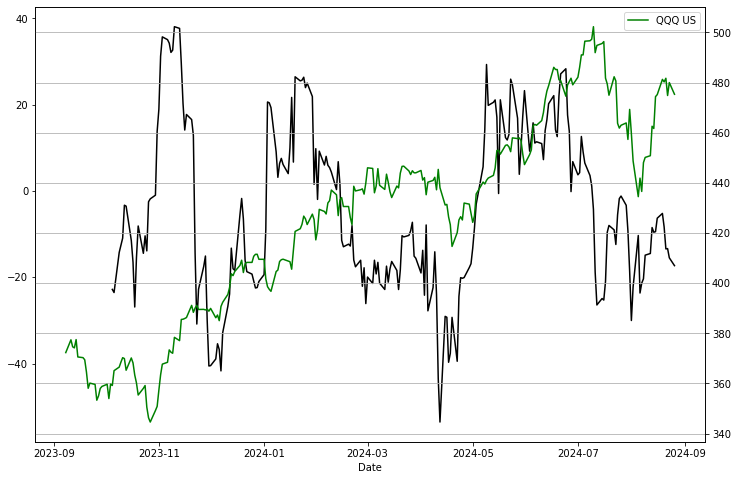

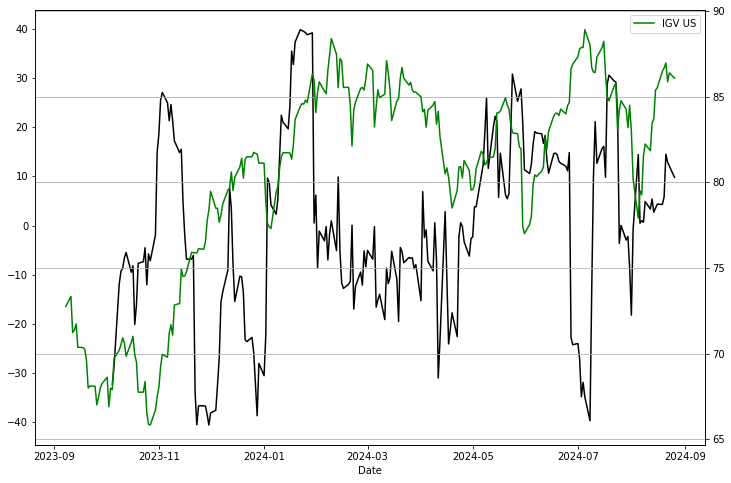

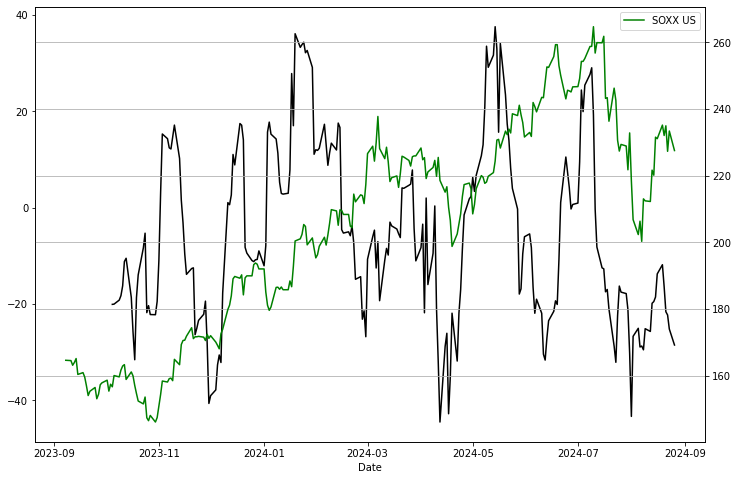

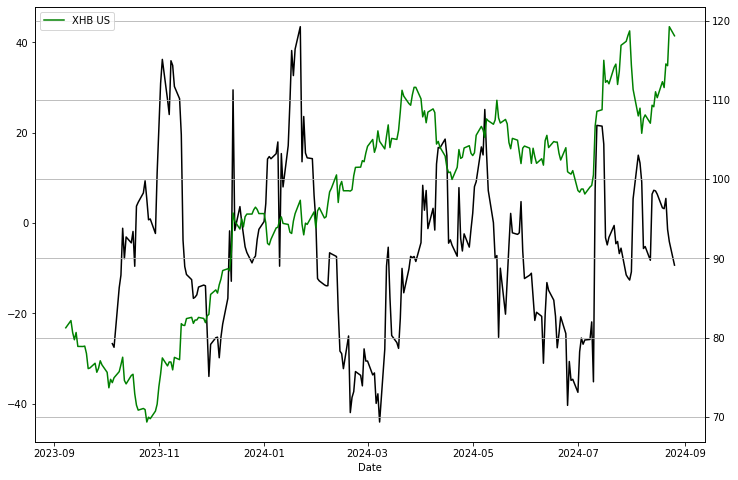

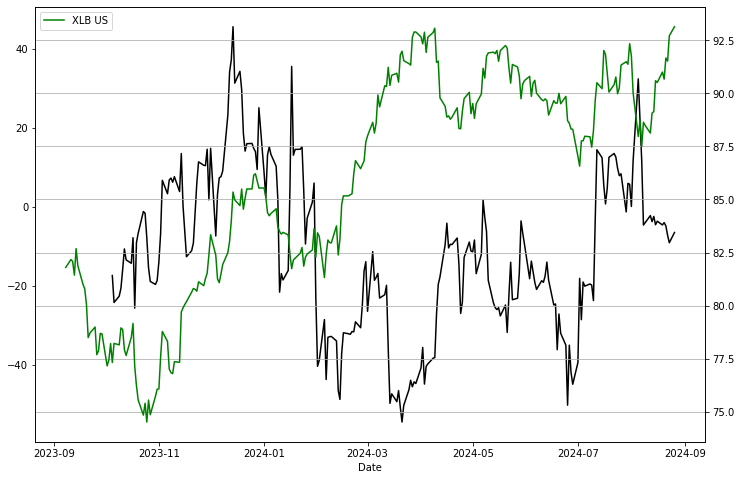

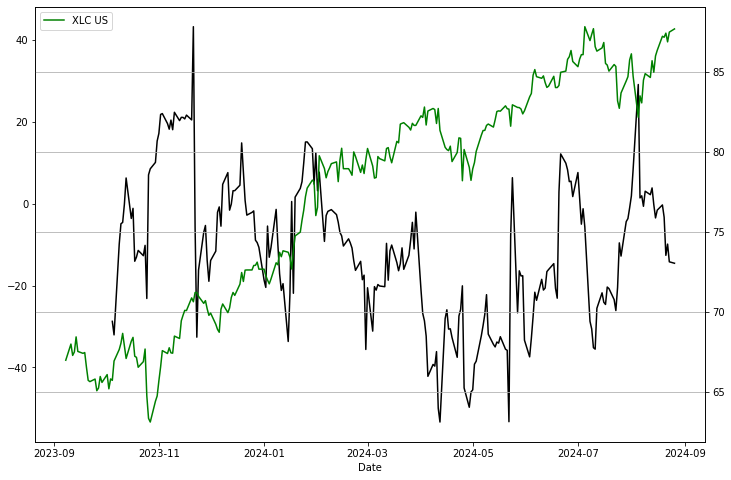

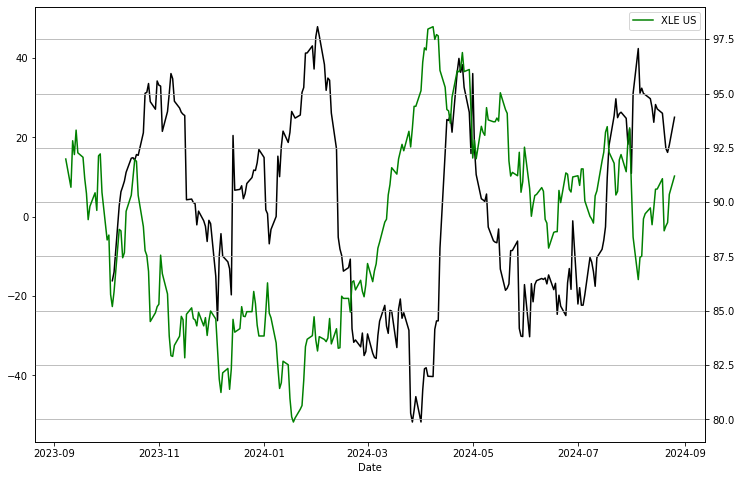

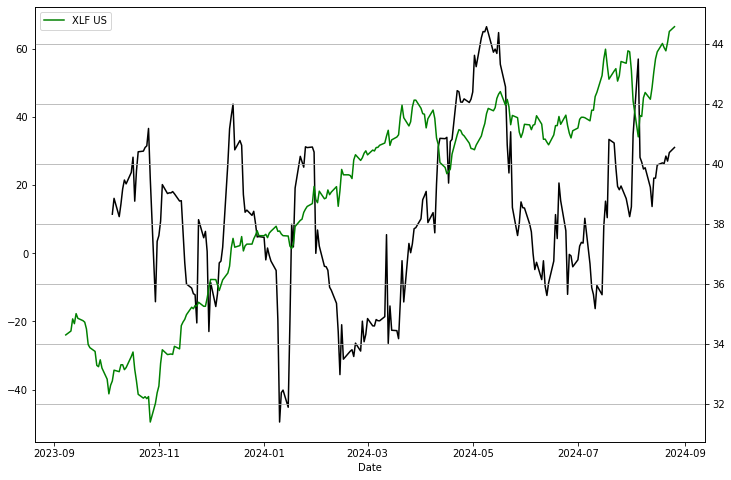

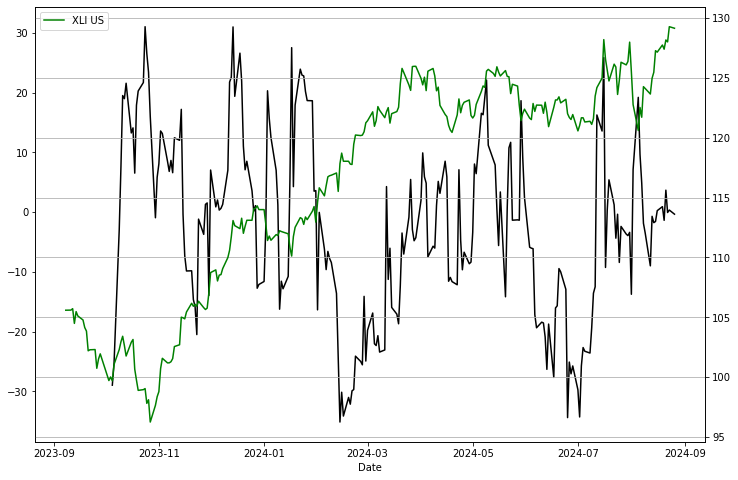

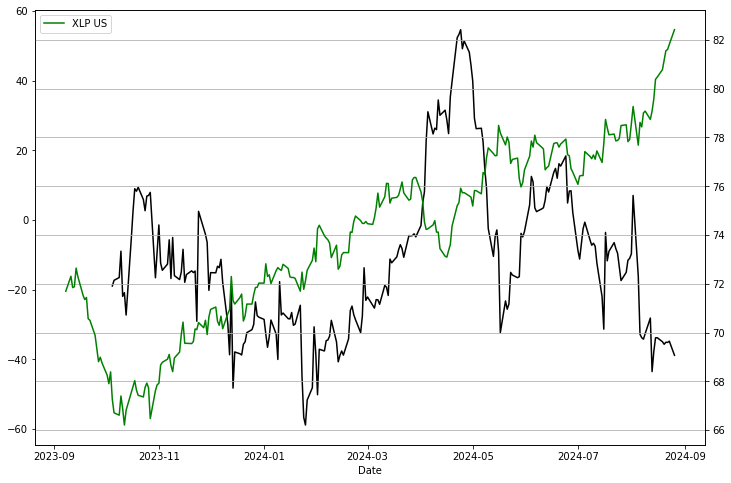

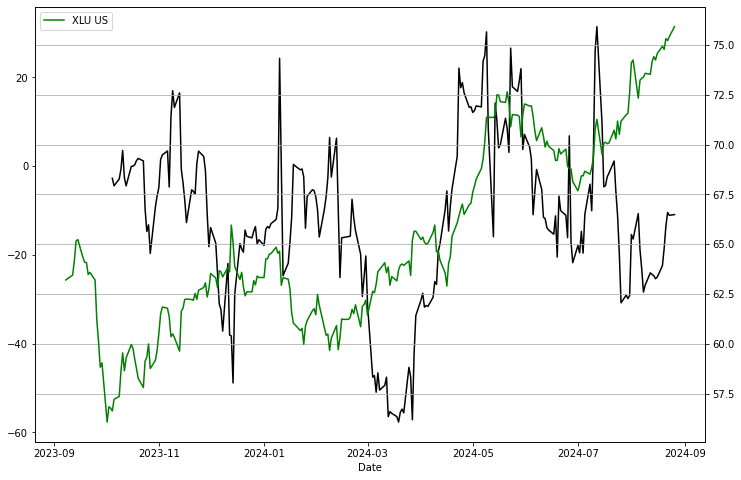

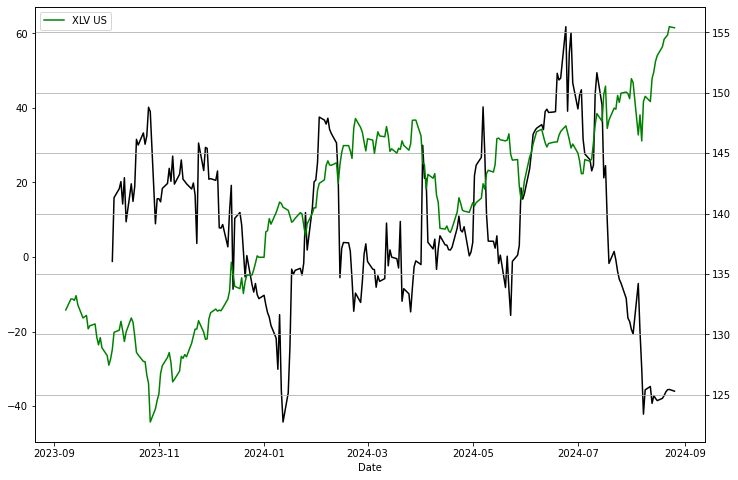

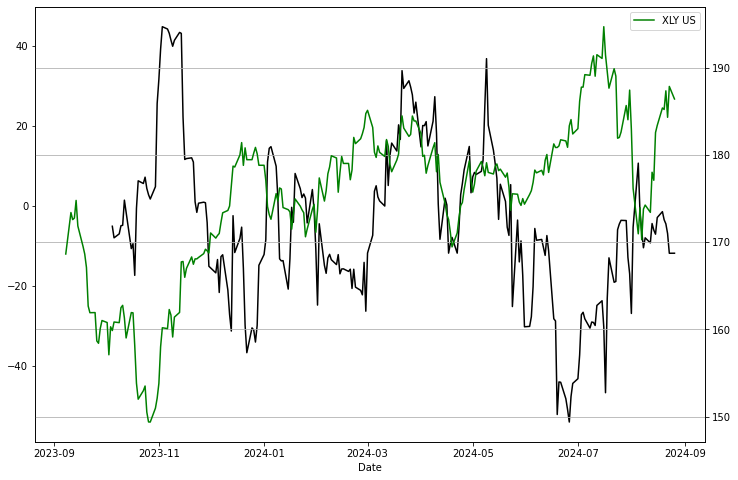

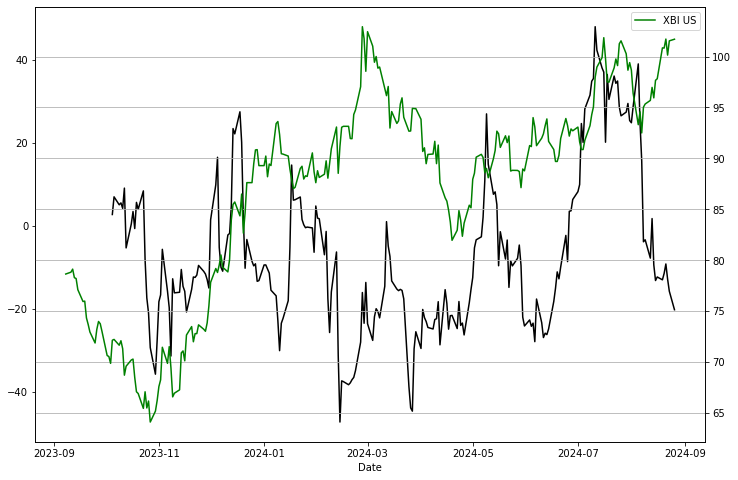

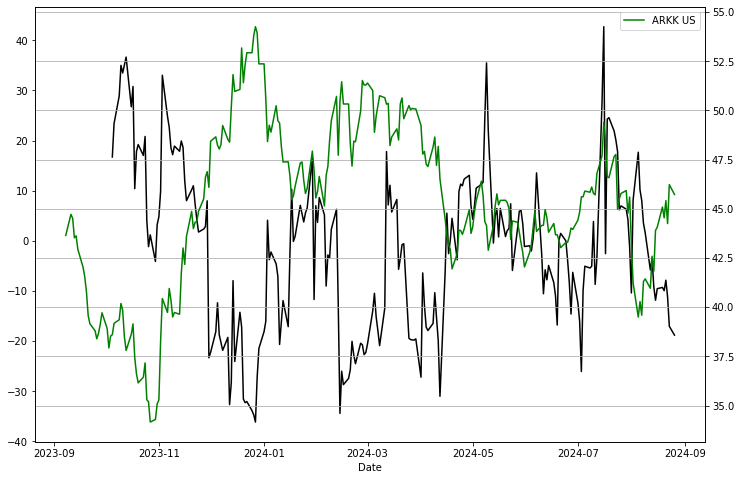

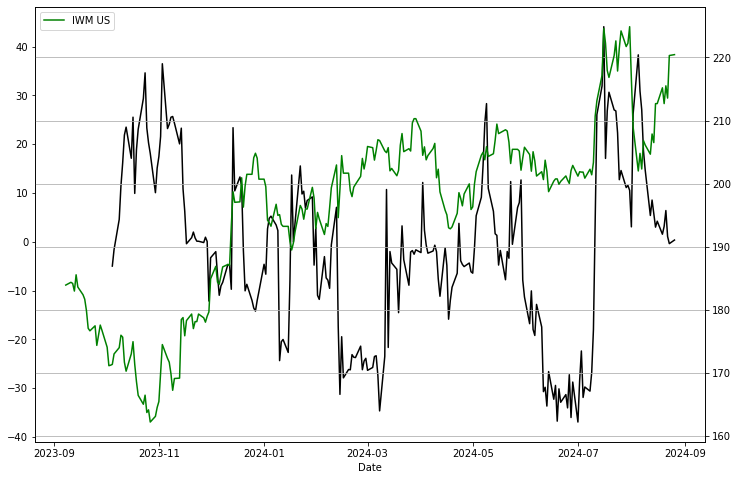

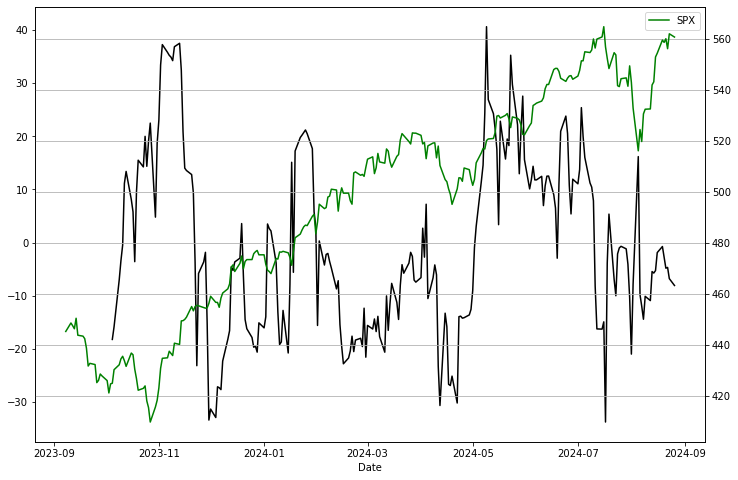

ARKK US    IGV US    IWM US    QQQ US   SOXX US       SPX    XBI US  \
ARKK US  1.000000  0.701021  0.765939  0.691145  0.577288  0.709457  0.656648   
IGV US   0.701021  1.000000  0.600788  0.875808  0.736424  0.828388  0.418162   
IWM US   0.765939  0.600788  1.000000  0.601724  0.584609  0.758477  0.715908   
QQQ US   0.691145  0.875808  0.601724  1.000000  0.843257  0.925164  0.415174   
SOXX US  0.577288  0.736424  0.584609  0.843257  1.000000  0.753797  0.376106   
SPX      0.709457  0.828388  0.758477  0.925164  0.753797  1.000000  0.501951   
XBI US   0.656648  0.418162  0.715908  0.415174  0.376106  0.501951  1.000000   
XHB US   0.626166  0.574281  0.823972  0.592674  0.581384  0.709820  0.533228   
XLB US   0.551462  0.490466  0.765431  0.524036  0.507394  0.713670  0.451886   
XLC US   0.636450  0.715613  0.576109  0.829817  0.608573  0.809977  0.382607   
XLE US   0.200577  0.108767  0.456645  0.113337  0.136141  0.335946  0.198155   
XLF US   0.552229  0.511837  0.757565  0.540469  0.436733  0.764910  0.452654   
XLI US   0.605574  0.582262  0.820119  0.609888  0.555543  0.803853  0.503450   
XLP US   0.295791  0.303365  0.427204  0.349010  0.177445  0.518937  0.317241   
XLU US   0.300079  0.170394  0.422803  0.195759  0.079841  0.388712  0.356910   
XLV US   0.382546  0.406129  0.505295  0.424322  0.233271  0.620375  0.506089   
XLY US   0.790799  0.740383  0.707723  0.830758  0.664912  0.840786  0.473906   

           XHB US    XLB US    XLC US    XLE US    XLF US    XLI US    XLP US  \
ARKK US  0.626166  0.551462  0.636450  0.200577  0.552229  0.605574  0.295791   
IGV US   0.574281  0.490466  0.715613  0.108767  0.511837  0.582262  0.303365   
IWM US   0.823972  0.765431  0.576109  0.456645  0.757565  0.820119  0.427204   
QQQ US   0.592674  0.524036  0.829817  0.113337  0.540469  0.609888  0.349010   
SOXX US  0.581384  0.507394  0.608573  0.136141  0.436733  0.555543  0.177445   
SPX      0.709820  0.713670  0.809977  0.335946  0.764910  0.803853  0.518937   
XBI US   0.533228  0.451886  0.382607  0.198155  0.452654  0.503450  0.317241   
XHB US   1.000000  0.707147  0.556802  0.271052  0.644984  0.786130  0.350836   
XLB US   0.707147  1.000000  0.484348  0.499196  0.744134  0.806478  0.488775   
XLC US   0.556802  0.484348  1.000000  0.159093  0.534424  0.559509  0.348720   
XLE US   0.271052  0.499196  0.159093  1.000000  0.503505  0.466274  0.220257   
XLF US   0.644984  0.744134  0.534424  0.503505  1.000000  0.804439  0.503218   
XLI US   0.786130  0.806478  0.559509  0.466274  0.804439  1.000000  0.496228   
XLP US   0.350836  0.488775  0.348720  0.220257  0.503218  0.496228  1.000000   
XLU US   0.337168  0.493662  0.223613  0.241190  0.426072  0.449028  0.589309   
XLV US   0.434464  0.498244  0.400682  0.249045  0.575177  0.571906  0.633540   
XLY US   0.692253  0.597796  0.725160  0.166654  0.614364  0.648534  0.412774   

           XLU US    XLV US    XLY US  
ARKK US  0.300079  0.382546  0.790799  
IGV US   0.170394  0.406129  0.740383  
IWM US   0.422803  0.505295  0.707723  
QQQ US   0.195759  0.424322  0.830758  
SOXX US  0.079841  0.233271  0.664912  
SPX      0.388712  0.620375  0.840786  
XBI US   0.356910  0.506089  0.473906  
XHB US   0.337168  0.434464  0.692253  
XLB US   0.493662  0.498244  0.597796  
XLC US   0.223613  0.400682  0.725160  
XLE US   0.241190  0.249045  0.166654  
XLF US   0.426072  0.575177  0.614364  
XLI US   0.449028  0.571906  0.648534  
XLP US   0.589309  0.633540  0.412774  
XLU US   1.000000  0.498640  0.267538  
XLV US   0.498640  1.000000  0.443131  
XLY US   0.267538  0.443131  1.000000

In [200]:
# SECTOR CORRELATION STUDIES

ETF_list_1 = ['QQQ', 'IGV', 'SOXX', 'XHB', 'XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLP', 
            'XLU', 'XLV', 'XLY', 'XBI', 'ARKK', 'IWM']
AllETF_l = pd.Series(ETF_list_1).map(lambda x: x + ' US').tolist() + ETF_list_2

window_c = 360
window_b = 252
window_ac = 20
hard_start = today - timedelta(window_c * 9)

ETF_pxs_df = Prices_df[AllETF_l]
ETF_pxs_df = ETF_pxs_df[ETF_pxs_df.index >= hard_start]
ETF_ret_df = ETF_pxs_df.pct_change().dropna()
ETF_vol_df = round(100 * (ETF_ret_df.rolling(window_b).std() * np.sqrt(window_b)).dropna(), 2)
ETF_ttl_df = round(100 * (ETF_pxs_df / ETF_pxs_df.shift(window_b) - 1), 2).loc[ETF_vol_df.index]
corr_matrix = ETF_ret_df.rolling(window_b).corr().unstack().dropna()[-window_b:].mean().unstack()
corr_matrix[corr_matrix > .999] = 1
print(corr_matrix.replace({1: 0}).idxmax())
print('')
print('')
print('QQQ Correlations:')
print(corr_matrix.sort_index()['QQQ US'].drop(['QQQ US']).sort_values(ascending = False))

ac_df = round(100 * Prices_df[AllETF_l].pct_change()[-window_b:].rolling(window_ac).apply(lambda x: x.autocorr()), 2)
for c_etf in AllETF_l:
    px_s = Prices_df.loc[ac_df.index][c_etf]
    ac_s = ac_df[c_etf]
    ac_s.plot(c = 'k', label = c_etf).twinx()
    px_s.plot(figsize = (12, 8), c = 'g', label = c_etf).legend(loc = 'best')
    plt.grid()
    plt.show()

corr_matrix.sort_index()

In [3]:
# INTRADAY INTEREST LIST MOVES

import pandas as pd
import numpy as np
import math
import os
import csv
import yfinance as yf
#import mysql.connector
import psycopg2
import requests
import json
import tkinter as tk
import re
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import date
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df

def authenticate(username,password):
    
    auth_url = 'https://app.visiblealpha.com/auth/'
    headers = {'Content-Type': 'application/json', 'Accept': 'application/json'}
    payload = {'username':username, 'password':password}
    
    response = requests.post(auth_url, json = payload, headers = headers)
    
    try:
        jwt = response.json()['jwt']
        # update and return headers
        headers['Authorization'] = 'Bearer '+jwt
        return headers
    
    except:
        print('Review response')
        return response 

def open_df(*args):
    open_str = args[0]
    
    query_open = 'SELECT * FROM ' + open_str
    opened_df = pd.read_sql_query(query_open, engine)
    opened_df = Set_DF(opened_df)
    opened_df = DD_Index(opened_df)
    
    return opened_df

def on_selection_sector(value):
    global target_sector
    target_sector = value
    root.destroy()

headers = authenticate('leonardob.moraes@outlook.com','akf7a7j5@@')
dbase = "visiblealpha_laptop"

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

Prices_df = open_df('prices_relation')
Prices_df.sort_index(inplace = True)

sectors = pd.read_csv(r"C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\Custom_Segmentation.csv")
Sectors_df = pd.DataFrame(sectors)
Sectors_df = Set_DF(Sectors_df)
Sectors_df = DD_Index(Sectors_df) 

today = datetime.today().date()
INIT_YEAR = datetime(today.year, 1, 1).date()
INIT_YEAR = Prices_df[Prices_df.index > INIT_YEAR].index[0]

ETF_list_1 = ['NVDA', 'AMD', 'INTC', 'QCOM', 'MU', 'SMCI', 'DELL', 'ARM', 'SNPS', 'AVGO', 'ANET', 'TSLA', 'CRWD', 'ZS', 'PANW', 
              'NET', 'S', 'FTNT', 'PLTR', 'AXON', 'MSI', 'DDOG', 'SNOW', 'NOW', 'CRM', 'ADBE', 'MDB', 'TWLO', 'ORCL', 'GTLB', 'MNDY', 'POWL', 'ZI', 'TTD', 'SQ', 'PYPL', 'FOUR', 'AFRM', 'APP', 
              'ENPH', 'NXT', 'META',  'MSFT', 'SNAP', 'AMZN', 'GOOGL', 'HUBS', 'AAPL', 'DKNG', 'ZETA', 'SE', 'CPNG','COIN', 'NBIX', 'LNTH', 'HIMS', 'CELH', 'DOCN', 'RBLX', 'ASPN']

sector_list = pd.unique(Sectors_df['ETF'].dropna()).tolist()
sector_list = sector_list.copy()
sector_list.append('Custom')
root = tk.Tk()
tkvar = tk.StringVar(root)
popupMenu = tk.OptionMenu(root, tkvar, *sector_list, command = on_selection_sector)
tk.Label(root, text = "Choose a sector: ").grid(row = 0, column = 0)
popupMenu.grid(row = 1, column = 0)
root.mainloop()

if (target_sector != 'Custom'):
    ETF_list_1 = Sectors_df[Sectors_df['ETF'] == target_sector].index.map(lambda x: x.split(' ')[0]).tolist()
ETF_df = pd.DataFrame(index = ETF_list_1, columns = ['Year Start Px', 'YTD High', 'YTD Low', 'd-2 Px', 'd-1 Px', 
                                                     'd0 L', 'd0 H', 'd0 Px', 'YTD %', 'YTD DD', 'YTD Reb', 'd-1 %', 'd0 %'])    

ETF_df.loc[ETF_list_1, 'Year Start Px'] = Prices_df[pd.Series(ETF_list_1).map(lambda x: x +  ' US')].loc[INIT_YEAR].values
ETF_df.loc[ETF_list_1, 'YTD High'] = round(Prices_df[Prices_df.index >= datetime(today.year, 1, 1).date()][pd.Series(ETF_list_1).map(lambda x: x +  ' US')].max(), 2).values
ETF_df.loc[ETF_list_1, 'YTD Low'] = round(Prices_df[Prices_df.index >= datetime(today.year, 1, 1).date()][pd.Series(ETF_list_1).map(lambda x: x +  ' US')].min(), 2).values
ETF_df.loc[ETF_list_1, 'd-2 Px'] = Prices_df[pd.Series(ETF_list_1).map(lambda x: x +  ' US')].iloc[-2].values
ETF_df.loc[ETF_list_1, 'd-1 Px'] = Prices_df[pd.Series(ETF_list_1).map(lambda x: x +  ' US')].iloc[-1].values

y = yf.download(ETF_list_1, period = '1d')
y.dropna(thresh = 20, inplace = True)
current_pxs = y['Adj Close'].T.copy()
day_lows = y['Low'].T.copy()
day_highs = y['High'].T.copy()

ETF_df.loc[ETF_list_1, 'd0 Px'] = current_pxs.loc[ETF_list_1, current_pxs.columns[0]].values
ETF_df.loc[ETF_list_1, 'd0 L'] = day_lows.loc[ETF_list_1, current_pxs.columns[0]].values
ETF_df.loc[ETF_list_1, 'd0 H'] = day_highs.loc[ETF_list_1, current_pxs.columns[0]].values
ETF_df['d0 Px'] = ETF_df['d0 Px'].map(lambda x: round(x, 2))
ETF_df['d0 L'] = ETF_df['d0 L'].map(lambda x: round(x, 2))
ETF_df['d0 H'] = ETF_df['d0 H'].map(lambda x: round(x, 2))

ETF_df['YTD %'] = 100 * (ETF_df['d0 Px'] / ETF_df['Year Start Px'] - 1)
ETF_df['YTD %'] = ETF_df['YTD %'].map(lambda x: round(x, 2))
ETF_df['d-1 %'] = 100 * (ETF_df['d-1 Px'] / ETF_df['d-2 Px'] - 1)
ETF_df['d-1 %'] = ETF_df['d-1 %'].map(lambda x: round(x, 2))

ETF_df['YTD DD'] = 100 * (ETF_df['d0 Px'] / ETF_df['YTD High'] - 1)
ETF_df['YTD DD'] = ETF_df['YTD DD'].map(lambda x: round(x, 2)).map(lambda x: min(0, x))

ETF_df['YTD Reb'] = 100 * (ETF_df['d0 Px'] / ETF_df['YTD Low'] - 1)
ETF_df['YTD Reb'] = ETF_df['YTD Reb'].map(lambda x: round(x, 2)).map(lambda x: max(0, x))

ETF_df['d0 %'] = 100 * (ETF_df['d0 Px'] / ETF_df['d-1 Px'] - 1)
ETF_df['d0 %'] = ETF_df['d0 %'].map(lambda x: round(x, 2))

ETF_df

[*********************100%***********************]  60 of 60 completed


Year Start Px YTD High YTD Low   d-2 Px  d-1 Px    d0 L    d0 H   d0 Px  \
NVDA         48.145   143.71   47.58   143.59  139.56  138.46  141.35  140.41   
AMD        138.4999   211.72  129.44   154.09  152.91  152.35  155.19  153.44   
INTC         47.805    50.25   18.92     22.4   21.98   21.97   22.36   22.34   
QCOM       140.3704   227.09  136.65   173.18   166.6  165.60  168.94  168.10   
MU            82.57   153.45    79.5   107.82  105.05  105.54  107.53  106.85   
SMCI      28.545001   118.81   28.06    45.97   45.36   45.63   47.24   46.23   
DELL          74.99   172.26   74.99   120.38  119.48  119.36  121.39  120.57   
ARM       68.919998   185.69   67.05   152.58  142.41  138.40  143.59  141.04   
SNPS          501.3   621.14  462.24   502.41  493.41  491.15  500.65  495.25   
AVGO        108.597   185.95  104.93   179.38  173.51  169.50  174.30  171.35   
ANET         230.21   416.46   229.3   396.55  393.89  394.30  398.34  395.70   
TSLA         248.22   264.68  142.06   217.97  213.65  242.65  262.12  260.48   
CRWD       245.8881   392.33  217.89   308.51   299.3  301.00  305.91  304.47   
ZS           211.91   256.38  156.25   186.16  181.01  182.00  185.46  183.93   
PANW         289.42   378.41  265.38    376.1  358.19  360.15  366.51  364.58   
NET           79.02   108.75   66.95   88.455   87.65   88.00   90.11   89.57   
S           25.8188    29.99   16.76    25.89   25.28   25.40   26.16   25.97   
FTNT          57.61     82.8   55.64    82.44   80.37   80.36   81.34   80.62   
PLTR         16.625    43.68   15.98   42.945    42.6   42.66   43.73   43.56   
AXON         251.63   449.61  244.21   449.61  442.69  438.17  446.75  443.12   
MSI          311.23   477.74  309.16   470.17  466.33  464.33  468.25  465.38   
DDOG        115.355   136.15  104.83   124.62  121.52  122.38  124.00  123.89   
SNOW         188.99   236.14  108.47  115.495  113.56  113.94  116.33  114.92   
NOW         683.905   945.52  643.29   917.86  908.04  940.41  979.78  956.58   
CRM        255.5025   317.18  218.01  288.275  284.37  285.18  288.91  286.76   
ADBE         580.59   635.14  437.28   493.11  485.03  480.06  488.47  482.87   
MDB         385.135   504.96  218.85   264.44  260.96  262.58  266.20  263.52   
TWLO        71.5358    75.87   53.02    70.65   70.58   70.50   71.88   71.24   
ORCL         104.08   178.29  102.73   175.34  173.06  172.91  174.95  174.38   
GTLB          60.25    77.13   40.84    54.85   53.06   53.86   56.58   55.64   
MNDY         177.89   293.29  171.92   289.38  282.52  284.73  297.27  297.27   
POWL      89.887085   280.39   76.44   267.09  255.17  248.53  258.97  249.71   
ZI            17.95    18.49    7.91    10.49   10.35   10.32   10.53   10.40   
TTD          70.295   118.94   62.88   118.94  117.17  116.59  118.46  118.21   
SQ           72.415    85.72   57.03     72.8   71.42   71.76   73.01   72.55   
PYPL          61.56    81.65   56.06    80.91   80.83   80.92   82.48   81.39   
FOUR      73.360001    96.26   57.86   92.965  93.285   91.55   94.31   93.74   
AFRM          46.55    49.33    24.2    43.99   41.81   41.35   43.33   42.03   
APP       38.779999    159.4   38.11   158.95   159.4  158.08  162.72  159.00   
ENPH          132.1   136.85   78.47    92.23   78.47   79.04   83.06   81.10   
NXT       47.419998    60.89   31.42   32.045   31.42   30.93   31.81   31.29   
META         344.06   594.25  344.06   582.01  563.69  561.52  568.88  567.78   
MSFT       369.5736   467.12  367.75   427.51   424.6  422.40  425.95  424.73   
SNAP         16.015    17.46    8.35   9.9809   10.14   10.12   10.33   10.27   
AMZN        149.783   200.31  145.24    189.7  184.71  183.87  187.11  186.38   
GOOGL        137.72   191.08  131.37   165.14  162.78  161.01  163.33  162.72   
HUBS        546.195   681.42  451.08   531.73  531.89  541.50  557.46  554.31   
AAPL         185.64   236.48  164.91   235.86  230.76  228.41  230.82  230.57   
DKNG        33.4744    48.68   30.02 

Number of days to update (empty for period manually): 1
Enter single stock (VA or YF, empty for all): 
Manually? (Y/N): n
Last= 337.97 Enter New CRB: 336.75
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ABST: No data found, symbol may be delisted
ABST price N/A
1 ABST
[*********************100%***********************]  1 of 1 completed
2 AMPL
[*********************100%***********************]  1 of 1 completed
3 ASUR
[*********************100%***********************]  1 of 1 completed
4 AXON
[*********************100%***********************]  1 of 1 completed
5 BLKB
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CDAY: No data found, symbol may be delisted
CDAY price N/A
6 CDAY
[*********************100%***********************]  1 of 1 completed
7 DV
[*********************100%***********************]  1 of 1 completed
8 EGAN
[*********************100%***********************]  1 of 1 completed

1 Fai

[*********************100%***********************]  1 of 1 completed
91 SAP.DE
[*********************100%***********************]  1 of 1 completed
92 EOAN.DE
[*********************100%***********************]  1 of 1 completed
93 RWE.DE
[*********************100%***********************]  1 of 1 completed
94 DTE.DE
[*********************100%***********************]  1 of 1 completed
95 ISP.MI
[*********************100%***********************]  1 of 1 completed
96 ENEL.MI
[*********************100%***********************]  1 of 1 completed
97 NOVA
[*********************100%***********************]  1 of 1 completed
98 INGA.AS
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SPWR: No data found, symbol may be delisted
SPWR price N/A
99 SPWR
[*********************100%***********************]  1 of 1 completed
100 ASM.AS
[*********************100%***********************]  1 of 1 completed
101 ASML.AS
[*********************100%**********************

[*********************100%***********************]  1 of 1 completed
187 NTNX
[*********************100%***********************]  1 of 1 completed
188 TAL
[*********************100%***********************]  1 of 1 completed
189 TME
[*********************100%***********************]  1 of 1 completed
190 TTD
[*********************100%***********************]  1 of 1 completed
191 VOD.L
[*********************100%***********************]  1 of 1 completed
192 SYNA
[*********************100%***********************]  1 of 1 completed
193 BABA
[*********************100%***********************]  1 of 1 completed
194 BIDU
[*********************100%***********************]  1 of 1 completed
195 BILI
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BKI: No data found, symbol may be delisted
BKI price N/A
196 BKI
[*********************100%***********************]  1 of 1 completed
197 BL
[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed
285 BAX
[*********************100%***********************]  1 of 1 completed
286 BIIB
[*********************100%***********************]  1 of 1 completed
287 BMY
[*********************100%***********************]  1 of 1 completed
288 BSX
[*********************100%***********************]  1 of 1 completed
289 CVS
[*********************100%***********************]  1 of 1 completed
290 DXCM
[*********************100%***********************]  1 of 1 completed
291 EW
[*********************100%***********************]  1 of 1 completed
292 GILD
[*********************100%***********************]  1 of 1 completed
293 HOLX
[*********************100%***********************]  1 of 1 completed
294 HUM
[*********************100%***********************]  1 of 1 completed
295 ILMN
[*********************100%***********************]  1 of 1 completed
296 INCY
[*********************100%***********************]  1 of 1 completed
29

[*********************100%***********************]  1 of 1 completed
389 QRVO
[*********************100%***********************]  1 of 1 completed
390 STX
[*********************100%***********************]  1 of 1 completed
391 SWKS
[*********************100%***********************]  1 of 1 completed
392 TXN
[*********************100%***********************]  1 of 1 completed
393 VRSN
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- XLNX: No data found, symbol may be delisted
XLNX price N/A
394 XLNX
[*********************100%***********************]  1 of 1 completed
395 XRX
[*********************100%***********************]  1 of 1 completed
396 CSX
[*********************100%***********************]  1 of 1 completed
397 FDX
[*********************100%***********************]  1 of 1 completed
398 UNP
[*********************100%***********************]  1 of 1 completed
399 UPS
[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed
492 CMI
[*********************100%***********************]  1 of 1 completed
493 DHR
[*********************100%***********************]  1 of 1 completed
494 DRI
[*********************100%***********************]  1 of 1 completed
495 DVA
[*********************100%***********************]  1 of 1 completed
496 DE
[*********************100%***********************]  1 of 1 completed
497 XRAY
[*********************100%***********************]  1 of 1 completed
498 DVN
[*********************100%***********************]  1 of 1 completed
499 FANG
[*********************100%***********************]  1 of 1 completed
500 DLR
[*********************100%***********************]  1 of 1 completed
501 DFS
[*********************100%***********************]  1 of 1 completed
502 HIMS
[*********************100%***********************]  1 of 1 completed
503 APP
[*********************100%***********************]  1 of 1 completed

1 Fa

[*********************100%***********************]  1 of 1 completed
592 LVS
[*********************100%***********************]  1 of 1 completed
593 LEG
[*********************100%***********************]  1 of 1 completed
594 LDOS
[*********************100%***********************]  1 of 1 completed
595 LEN
[*********************100%***********************]  1 of 1 completed
596 LNC
[*********************100%***********************]  1 of 1 completed
597 LIN
[*********************100%***********************]  1 of 1 completed
598 LYV
[*********************100%***********************]  1 of 1 completed
599 LKQ
[*********************100%***********************]  1 of 1 completed
600 L
[*********************100%***********************]  1 of 1 completed
601 LYB
[*********************100%***********************]  1 of 1 completed
602 MTB
[*********************100%***********************]  1 of 1 completed
603 MRO
[*********************100%***********************]  1 of 1 completed
604 MPC


[*********************100%***********************]  1 of 1 completed
694 TPR
[*********************100%***********************]  1 of 1 completed
695 TEL
[*********************100%***********************]  1 of 1 completed
696 STNE
[*********************100%***********************]  1 of 1 completed
697 TFX
[*********************100%***********************]  1 of 1 completed
698 TXT
[*********************100%***********************]  1 of 1 completed
699 TMO
[*********************100%***********************]  1 of 1 completed
700 TSCO
[*********************100%***********************]  1 of 1 completed
701 TT
[*********************100%***********************]  1 of 1 completed
702 TDG
[*********************100%***********************]  1 of 1 completed
703 TRV
[*********************100%***********************]  1 of 1 completed
704 TFC
[*********************100%***********************]  1 of 1 completed
705 NXT
[*********************100%***********************]  1 of 1 completed
706 UA

[*********************100%***********************]  1 of 1 completed
796 PD
[*********************100%***********************]  1 of 1 completed
797 EXAS
[*********************100%***********************]  1 of 1 completed
798 RWR
[*********************100%***********************]  1 of 1 completed
799 XLB
[*********************100%***********************]  1 of 1 completed
800 XLI
[*********************100%***********************]  1 of 1 completed
801 XLY
[*********************100%***********************]  1 of 1 completed
802 XLP
[*********************100%***********************]  1 of 1 completed
803 XLE
[*********************100%***********************]  1 of 1 completed
804 XLF
[*********************100%***********************]  1 of 1 completed
805 ARKK
[*********************100%***********************]  1 of 1 completed
806 XLU
[*********************100%***********************]  1 of 1 completed
807 XLV
[*********************100%***********************]  1 of 1 completed
808 SM

Crude Oil USD/Bbl  Brent USD/Bbl  CRB Index Index Points  T5YIFR  \
Date                                                                           
2024-10-21              70.35          74.07                  333.12    2.39   
2024-10-22              72.24          75.74                  335.06    2.39   
2024-10-23              71.01          75.22                  338.88    2.41   
2024-10-24              70.48          74.68                  337.97    2.39   
2024-10-25              71.68          75.54                  336.75    2.27   

            T10YIE     M2SL  M2CP Velocity  M2MP Velocity  TOTALSLAR  \
Date                                                                   
2024-10-21    2.31  21174.9       6.867923       3.202311       2.11   
2024-10-22    2.31  21221.2       9.506801       3.646623       2.11   
2024-10-23    2.33  21221.2       9.506801       3.646623       2.11   
2024-10-24    2.31  21221.2       9.506801       3.646623       2.11   
2024-10-25    2.30  21221.2       9.506801       3.646623       2.11   

               TOTBKCR  DRCCLACBS  TOTBKCR Velocity   USDJPY  MRAD US  REZ US  \
Date                                                                            
2024-10-21  17903.0406       3.25          3.927482  150.777  15.1592  86.130   
2024-10-22  17903.0406       3.25          3.927482  151.137  15.2500  86.555   
2024-10-23  17903.0406       3.25          3.701695  152.628  15.2500  88.030   
2024-10-24  17903.0406       3.25          3.701695  151.841  15.2500  87.830   
2024-10-25  17929.8836       3.25          3.857181  151.783  15.2500  86.450   

            XHB US  XLC US  SOXX US  IBB US  XBI US  
Date                                                 
2024-10-21  121.62   90.88   228.93  143.99   98.19  
2024-10-22  118.41   91.01   228.08  144.00   98.23  
2024-10-23  117.93   90.29   226.04  142.16   96.67  
2024-10-24  118.16   90.62   227.30  141.59   97.25  
2024-10-25  116.54   90.85   229.58  141.51   97.15

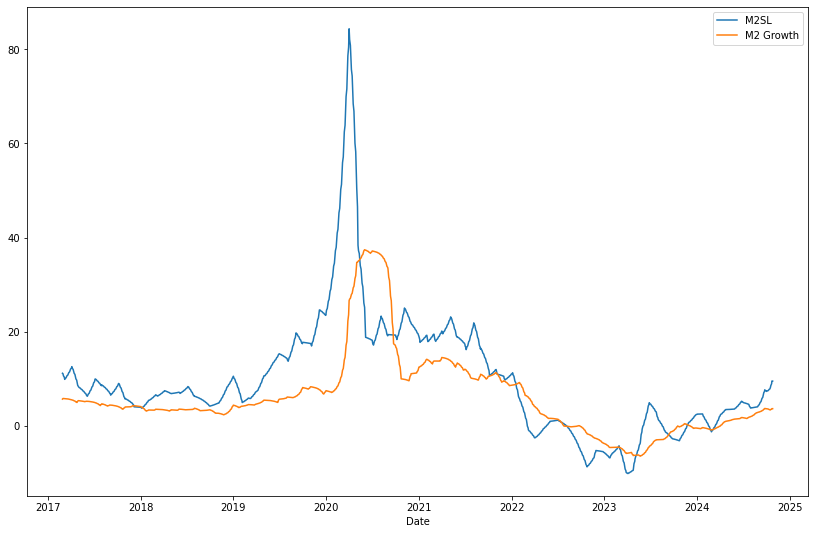

In [13]:
#%%writefile C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\all_pxs.py

# Updates Prices relation with inputs from Yahoo Finance

import pandas as pd
import numpy as np
import math
import os
import csv
import yfinance as yf
#import mysql.connector
import psycopg2
import requests
import json
import tkinter as tk
import re
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from datetime import timedelta
from datetime import date
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df

def authenticate(username,password):
    
    auth_url = 'https://app.visiblealpha.com/auth/'
    headers = {'Content-Type': 'application/json', 'Accept': 'application/json'}
    payload = {'username':username, 'password':password}
    
    response = requests.post(auth_url, json = payload, headers = headers)
    
    try:
        jwt = response.json()['jwt']
        # update and return headers
        headers['Authorization'] = 'Bearer '+jwt
        return headers
    
    except:
        print('Review response')
        return response   

def Create_Ind_Records(st_date, columns_list):
    
    print('NEW!!!')
    stock_records_df = pd.DataFrame('n', index=pd.date_range(st_date,today,freq='B').date, columns=columns_list)
    stock_records_df.index.name = 'Date'
    stock_records_df['Checked'] = 'n'
    
    return stock_records_df


dbase = "visiblealpha_laptop"
    
headers = authenticate('leonardob.moraes@outlook.com','akf7a7j5@@')

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list=[]
len_tl=len(tables_list)
cont_tl=0
while (cont_tl<len_tl):
    new_tables_list.append(re.sub(r'[^a-z_^0-9]', '', str(tables_list[cont_tl])))
    cont_tl=cont_tl+1

FX_Pairs_List = ['EURUSD', 'EURGBP', 'EURJPY', 'EURAUD', 'EURCAD', 'EURMXN', 'EURBRL', 'GBPUSD', 'GBPJPY', 'GBPAUD', 'GBPCAD', 'GBPMXN', 'GBPBRL', 'AUDUSD', 'AUDJPY', 'AUDCAD', 'AUDMXN', 'AUDBRL', 'USDJPY', 'USDCAD', 'USDMXN', 'USDBRL', 'CADJPY', 'CADMXN', 'CADBRL', 'BRLMXN', 'BRLJPY', 'MXNJPY']
number_to_string = {'6160 HK': 'BGNE US','700 HK': 'TCEHY US','2330 TT': 'TSM US','6758 JP': 'SONY US','9868 HK': 'XPEV US'}
string_to_number = {'BGNE US': '6160 HK','TCEHY US': '700 HK','TSM US': '2330 TT','SONY US': '6758 JP','XPEV US': '9868 HK'}
clean_up = lambda x: re.sub(r'[^A-Z /^0-9]', '', str(x))
clean_up_save = lambda x: re.sub(r'[^A-Z ^0-9]', '', str(x))
int_to_str = lambda x: str(x)
str_to_int = lambda x: int(x)
va_to_yf = lambda x: vayf_df.loc[x, 'YF Ticker']
bond_tenor = lambda x: str(x.split(' ')[0])
bond_my = lambda x: x.split(' ')[1][0].upper()
clean_rates = lambda x: round(float(re.sub(r'[^0-9.]', '', x)), 3)
map_upper = lambda x: x.upper()
clean_cmdty = lambda x: x.split(' ')[0]

today = date.today()
lag1_tent = 25
lag2_tent = 65
lag3 = 125
lag4 = 252
hf1 = 25
hf2 = 10

query_vayf = 'SELECT * FROM va_yf'    
vayf_df = pd.read_sql_query(query_vayf, engine)
vayf_df = Set_DF(vayf_df)
vayf_df = DD_Index(vayf_df)

query_prices = 'SELECT * FROM prices_relation'    
Prices_df = pd.read_sql_query(query_prices, engine)
Prices_df = Set_DF(Prices_df)
Prices_df = DD_Index(Prices_df)

days_string = input("Number of days to update (empty for period manually): ")

date_max = Prices_df.index[0] - Prices_df.index[-1]

stock_list = Prices_df.columns.map(va_to_yf).values.tolist()

single = str(input("Enter single stock (VA or YF, empty for all): ")).upper()

man = str(input("Manually? (Y/N): ")).upper()
man_b = False
if (man == 'Y'):
    man_b = True

if (single in vayf_df.index):
    stock_list = []
    stock_list.append(vayf_df.loc[single, 'YF Ticker'])
    
if (single in vayf_df['YF Ticker'].values.tolist()):
    stock_list = []
    stock_list.append(single)
    
if (single not in Prices_df.columns) & (single != ''):
    check = input('Add ' + single + '? (Y/y or empty) ').upper()
    if (check == 'Y'):   
        if (single not in vayf_df.index) & (single not in vayf_df['YF Ticker']):
            desc = input('Enter description: ')
            if (len(single.split(' ')) > 1):
                vayf_df.loc[single] = [single.split(' ')[0], desc]
            else:
                vayf_df.loc[single + ' US'] = [single, desc]    
            stock_list = []
            stock_list.append(vayf_df.iloc[-1]['YF Ticker'])
            vayf_df.to_sql('va_yf', engine, index = True, if_exists = 'replace')
        Prices_df[single] = np.nan        
    else:
        print(single + ' is an invalid security')

if (days_string == ''):
    Start_Date = input("Enter Start Date (empty for all): (YY/MM/DD)")
    if (Start_Date == ''):
        Start_Date = Prices_df.index[-1]
    else:
        Start_Date = datetime.strptime(Start_Date, "%y/%m/%d").date()
    End_Date = input("Enter End Date: (YY/MM/DD)")
    if (End_Date == ''):
        End_Date = Prices_df.index[0]
    else:
        End_Date = datetime.strptime(End_Date, "%y/%m/%d").date()
    d_max = min(len(pd.date_range(Start_Date,End_Date,freq='B').date), date_max.days)
else:
    days = int(days_string)
    d_max = min(days, date_max.days)
    Start_Date = today - timedelta(d_max)

days_str = str(d_max) + 'd'
i = 0
while (i <= d_max):
    cur_date = Start_Date + timedelta(i)
    if (cur_date not in Prices_df.index) & (cur_date.weekday() < 5):
        Prices_df.loc[cur_date] = Prices_df.iloc[0]
    i = i + 1
Prices_df.sort_index(axis = 0, ascending = False, inplace = True)

wgb = True
try:
    url_country = 'http://www.worldgovernmentbonds.com/country/united-states/'
    rc = requests.get(url_country)
    us_rates = pd.read_html(rc.text, match = 'Bond')[0]
    tenor_series = us_rates[('ResidualMaturity', 'ResidualMaturity')].map(bond_tenor) + us_rates[('ResidualMaturity', 'ResidualMaturity')].map(bond_my)
    rates_series = list(us_rates[('Yield', 'Yield')].map(clean_rates))
    tenor_series = 'USGG' + tenor_series + 'R'
    USRates_df = pd.DataFrame(rates_series, index = pd.Index(tenor_series.replace({'USGG1MR': 'USGG1M', 'USGG2MR': 'USGG2M', 'USGG3MR': 'USGG3M', 'USGG6MR': 'USGG6M'}), name = 'Tenors'), columns = ['Rates'])
except:
    wgb = False

#currencies_majors = pd.read_html('http://tradingeconomics.com/currencies')[0]
#currencies_europe = pd.read_html('http://tradingeconomics.com/currencies')[1]
#currencies_america = pd.read_html('http://tradingeconomics.com/currencies')[2]
#currencies_asia = pd.read_html('http://tradingeconomics.com/currencies')[3]
#crypto = pd.read_html('http://tradingeconomics.com/crypto')[0]
#cmdty_metals = pd.read_html('http://tradingeconomics.com/commodities')[1]
#cmdty_industrials = pd.read_html('http://tradingeconomics.com/commodities')[3]


#energy = pd.read_html('http://tradingeconomics.com/commodities')[0]
#index = pd.read_html('http://tradingeconomics.com/commodities')[5]
#wti = energy.iloc[0]['Price']
#brent = energy.iloc[1]['Price']
last_crb = Prices_df['CRB Index Index Points'][0]
crb = input('Last= ' + str(last_crb) + ' Enter New CRB: ')
if (crb == ''):
    crb = last_crb
else:
    crb = float(crb)

be_10y = pd.read_html('https://fred.stlouisfed.org/series/T10YIE')
be_10y_df = pd.DataFrame(be_10y[0])
be_10y_last = float(be_10y_df.iloc[0][1])
fwd_5y5y = pd.read_html('https://fred.stlouisfed.org/series/T5YIFR')
fwd_5y5y_df = pd.DataFrame(fwd_5y5y[0])
fwd_5y5y_last = float(fwd_5y5y_df.iloc[0][1])
m2_last = pd.read_html('https://fred.stlouisfed.org/series/M2SL')
m2_last_df = pd.DataFrame(m2_last[0])
m2sl_last = float(m2_last_df.iloc[0][1])
totbkcr_last = pd.read_html('https://fred.stlouisfed.org/series/TOTBKCR')
totbkcr_last_df = pd.DataFrame(totbkcr_last[0])
totbkcr_last = float(totbkcr_last_df.iloc[0][1])
totalslar_last = pd.read_html('https://fred.stlouisfed.org/series/TOTALSLAR')
totalslar_last_df = pd.DataFrame(totalslar_last[0])
totalslar_last = float(totalslar_last_df.iloc[0][1])
drcclacbs_last = pd.read_html('https://fred.stlouisfed.org/series/DRCCLACBS')
drcclacbs_last_df = pd.DataFrame(drcclacbs_last[0])
drcclacbs_last = float(drcclacbs_last_df.iloc[0][1])

cont = 0
for current_stock in stock_list:
    if (man_b):
        current_date = today - timedelta(d_max)
        while (current_date <= today):
            if (current_date.weekday() < 5):
                current_line = current_stock + ' ' + current_date.strftime("%b-%d-%Y")
                current_px = Prices_df.loc[current_date, vayf_df.index[vayf_df['YF Ticker'].values.tolist().index(current_stock)]]
                new_px_str = input(current_line + ' ' + str(current_px) + ' : ')
                if (new_px_str != ''):
                    new_px = round(float(new_px_str), 2)
                    Prices_df.loc[current_date, vayf_df.index[vayf_df['YF Ticker'].values.tolist().index(current_stock)]] = new_px
            current_date = current_date + timedelta(1)
    elif (man_b) & (days_string == ''):
        current_date = Start_Date
        while (current_date <= End_Date):
            if ((current_date.day==25) & (current_date.month==12)) | ((current_date.day==1) & (current_date.month==1)):
                current_date = current_date + timedelta(1)
            if (current_date.weekday() < 5):
                current_line = current_stock + ' ' + current_date.strftime("%b-%d-%Y")
                current_px = Prices_df.loc[current_date, vayf_df.index[vayf_df['YF Ticker'].values.tolist().index(current_stock)]]
                new_px_str = input(current_line + ' ' + str(current_px) + ' : ')
                if (new_px_str != ''):
                    new_px = round(float(new_px_str), 2)
                    Prices_df.loc[current_date, vayf_df.index[vayf_df['YF Ticker'].values.tolist().index(current_stock)]] = new_px
            current_date = current_date + timedelta(1)
    else:
        if (current_stock[2:] == 'Y=F') & (wgb):
            current_stock = vayf_df.index[vayf_df['YF Ticker'].values.tolist().index(current_stock)]
            Prices_df.loc[Prices_df.index[0], current_stock] = USRates_df.loc[current_stock, 'Rates']
            
        elif (current_stock == 'CRB Index Index Points'):
            Prices_df.loc[Prices_df.index[0], current_stock] = crb
        
        elif (current_stock == 'T10YIE'):
            Prices_df.loc[Prices_df.index[0], current_stock] = be_10y_last
            
        elif (current_stock == 'T5YIFR'):
            Prices_df.loc[Prices_df.index[0], current_stock] = fwd_5y5y_last
            
        elif (current_stock == 'M2SL'):
            Prices_df.loc[Prices_df.index[0], current_stock] = m2sl_last
            
        elif (current_stock == 'M2CP Velocity'):
            pass
            
        elif (current_stock == 'M2MP Velocity'):
            pass
        
        elif (current_stock == 'TOTBKCR Velocity'):
            pass

        elif (current_stock == 'TOTBKCR'):
            Prices_df.loc[Prices_df.index[0], current_stock] = totbkcr_last
        
        elif (current_stock == 'TOTALSLAR'):
            Prices_df.loc[Prices_df.index[0], current_stock] = totalslar_last
        
        elif (current_stock == 'DRCCLACBS'):
            Prices_df.loc[Prices_df.index[0], current_stock] = drcclacbs_last
        
        else:
            new_list = []
            new_list.append(current_stock)
            yf_len = 0
            try:
                current_px = yf.download(new_list, period = days_str) #group_by='tickers'
                current_px.replace({np.nan: 'Delete', None: 'Delete'}, inplace = True)
                yf_len = len(current_px.index)
            except:
                print(current_stock + ' Failed')
            if (yf_len > 0):
                for cd in current_px.index:
                    current_date = cd.date()
                    if (current_px.loc[cd, 'Close'] != 'Delete') & (current_date.weekday() < 5):
                        Prices_df.loc[current_date, vayf_df.index[vayf_df['YF Ticker'].values.tolist().index(current_stock)]] = round(current_px.loc[cd, 'Close'], 4)
                    else:
                        print(current_stock + ' price N/A')
            else:
                print(current_stock + ' price N/A')
    cont = cont + 1
    print(str(cont) + ' ' + current_stock)

series_lag1 = Prices_df['M2SL'].shift(-lag1_tent)
series_lag2 = Prices_df['M2SL'].shift(-lag2_tent)
series_lag3 = Prices_df['M2SL'].shift(-lag3)

m2_growth_cp_01 = (Prices_df['M2SL'] / series_lag1 - 1) * 1200
m2_growth_cp_02 = (Prices_df['M2SL'] / series_lag2 - 1) * 1200
m2_growth_mp = (Prices_df['M2SL'] / series_lag3 - 1) * 200

m2_growth_cp = m2_growth_cp_01 * (m2_growth_cp_01 != 0) + m2_growth_cp_02 * (m2_growth_cp_01 == 0)

Prices_df['TOTBKCR Velocity'] = (Prices_df['TOTBKCR'] / Prices_df['TOTBKCR'].shift(-lag4) - 1) * 100

Prices_df['M2CP Velocity'] = m2_growth_cp
Prices_df['M2MP Velocity'] = m2_growth_mp

m2_growth_cp.dropna().ewm(halflife = 25).mean()[:2000].plot(figsize = (14, 9))
m2_growth_mp.dropna().ewm(halflife = 10).mean()[:2000].plot(label = 'M2 Growth').legend(loc = 'best')

Prices_df.sort_index(ascending = False, inplace = True)
Prices_df.fillna(method = 'bfill', inplace = True)
Prices_df.to_sql('prices_relation', engine, index = True, if_exists = 'replace')
Prices_df.to_csv(r"C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\Prices_test.csv")

Prices_df.sort_index(inplace = True)
FX_Prices_df = pd.DataFrame(np.nan, index = Prices_df.index, columns = FX_Pairs_List)
for pair in FX_Pairs_List:
    aux_pair01 = ''
    aux_pair02 = ''
    query_pair = ''
    usd_pair = False
    inv = False
    if (pair[:3] != 'USD'):
        aux_pair01 = 'USD' + pair[:3]
    else:
        usd_pair = True
        query_pair = pair
    if (pair[3:6] != 'USD'):
        aux_pair02 = 'USD' + pair[3:6]
    else:
        usd_pair = True
        inv = True
        query_pair = pair[3:6] + pair[:3]
    if (usd_pair):
        if (inv):
            FX_Prices_df[pair] = (1 / Prices_df[query_pair])
        else:
            FX_Prices_df[pair] = Prices_df[query_pair]
    else:
        FX_Prices_df[pair] = Prices_df[aux_pair02] / Prices_df[aux_pair01]
FX_Prices_df.to_sql('fxprices_relation', engine, index = True, if_exists = 'replace')

Prices_df[Prices_df.columns[-20:]][-5:]

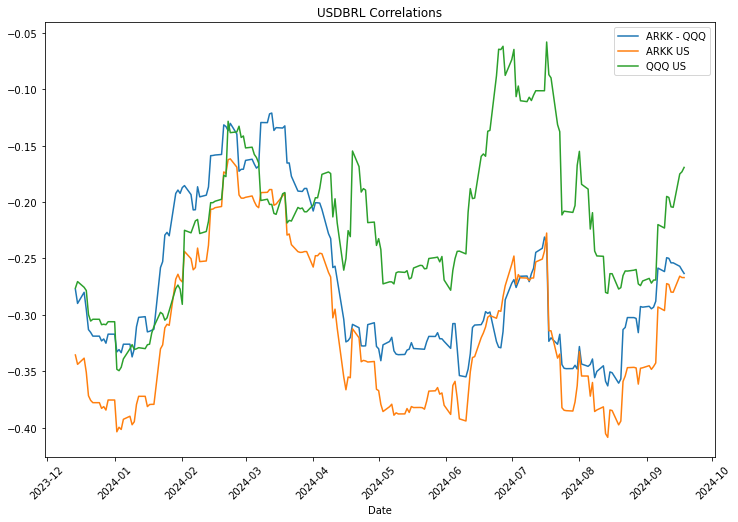

In [119]:
fx_df = open_df('fxprices_relation')
aux_df = pd.DataFrame(fx_df['USDBRL']).join(Prices_df['ARKK US']).join(Prices_df['QQQ US'])[-1000:]
aux_df = aux_df.pct_change()
aux_df['ARKK - QQQ'] = aux_df['ARKK US'] - aux_df['QQQ US']
aux_df.ewm(halflife = 42).corr().unstack()['USDBRL'].drop(['USDBRL'], axis = 1).dropna()[-200:].plot(figsize = (12, 8))
plt.title('USDBRL Correlations')
plt.xticks(rotation = 45)
plt.show()

Enter Init Date: (YY/MM/DD)20/01/01


Text(0.5, 1.0, 'P/E')

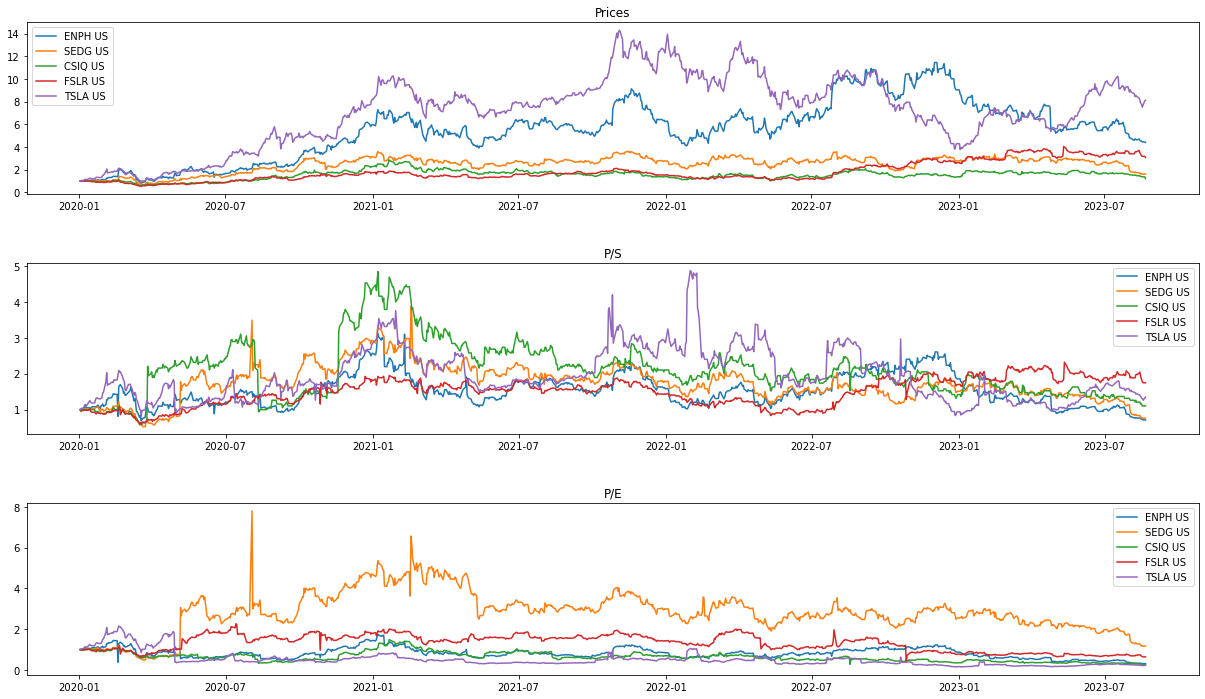

In [127]:
solar_list = ['ENPH US', 'SEDG US', 'CSIQ US', 'FSLR US', 'TSLA US']
Init_Date = input("Enter Init Date: (YY/MM/DD)")
Init_Date = datetime.strptime(Init_Date, "%y/%m/%d").date()
Prices_df.sort_index(inplace = True)
Val3_df.sort_index(inplace = True)
Val4_df.sort_index(inplace = True)

fig1 = plt.figure(figsize = (21, 12))
plt.subplots_adjust(wspace = 0.1, hspace = 0.4)
ax1 = fig1.add_subplot(3, 1, 1)
ax2 = fig1.add_subplot(3, 1, 2)
ax3 = fig1.add_subplot(3, 1, 3)

price_slim = Prices_df[Prices_df.index > Init_Date][solar_list]
price_slim = price_slim / price_slim.iloc[0]
for ticker in price_slim.columns:
    ax1.plot(price_slim[ticker], label = ticker)
    
ps_slim = Val3_df[Val3_df.index > Init_Date][solar_list]
ps_slim = ps_slim / ps_slim.iloc[0]
for ticker in ps_slim.columns:
    ax2.plot(ps_slim[ticker], label = ticker)
    
pe_slim = Val4_df[Val4_df.index > Init_Date][solar_list]
pe_slim = pe_slim / pe_slim.iloc[0]
for ticker in pe_slim.columns:
    ax3.plot(pe_slim[ticker], label = ticker)    

ax1.legend(loc = 'best')
ax1.set_title('Prices')
ax2.legend(loc = 'best')
ax2.set_title('P/S')
ax3.legend(loc = 'best')
ax3.set_title('P/E')

Up days 2023 49.42
Up days since 01Jun23 47.36842105263158


AUS GOVT 2Y  AUS GOVT 5Y  AUS GOVT 10Y  AUS GOVT 30Y  CAN GOVT 2Y  \
Date                                                                            
2005-01-31        5.285        5.356         5.403           NaN        2.906   
2005-02-01        5.245        5.312         5.376           NaN        2.916   
2005-02-02        5.229        5.279         5.327           NaN        2.919   
2005-02-03        5.263        5.306         5.341           NaN        2.955   
2005-02-04        5.248        5.295         5.340           NaN        2.875   
...                 ...          ...           ...           ...          ...   
2024-10-21        3.934        3.979         4.375         4.860        3.062   
2024-10-22        4.001        4.055         4.458         5.006        3.064   
2024-10-23        4.024        4.095         4.518         5.020        3.077   
2024-10-24        4.005        4.084         4.496         4.986        3.104   
2024-10-25        3.976        4.050         4.459         4.951        3.116   

            CAN GOVT 5Y  CAN GOVT 10Y  CAN GOVT 30Y  ESP GOVT 2Y  ESP GOVT 5Y  \
Date                                                                            
2005-01-31        3.560         4.212         4.714        2.454        2.969   
2005-02-01        3.571         4.226         4.721        2.456        2.965   
2005-02-02        3.597         4.232         4.732        2.465        2.983   
2005-02-03        3.624         4.262         4.752        2.487        3.006   
2005-02-04        3.531         4.175         4.671        2.462        2.956   
...                 ...           ...           ...          ...          ...   
2024-10-21        3.011         3.256         3.415        2.384        2.529   
2024-10-22        3.015         3.260         3.415        2.388        2.545   
2024-10-23        3.038         3.287         3.441        2.399        2.526   
2024-10-24        3.036         3.268         3.400        2.351        2.491   
2024-10-25        3.047         3.284         3.419        2.411        2.542   

            ...  ITA GOVT 10Y  ITA GOVT 30Y  UK GOVT 2Y  UK GOVT 5Y  \
Date        ...                                                       
2005-01-31  ...         2.335         3.638       4.515       4.547   
2005-02-01  ...         2.340         3.630       4.510       4.533   
2005-02-02  ...         2.356         3.619       4.518       4.539   
2005-02-03  ...         2.379         3.618       4.545       4.560   
2005-02-04  ...         2.383         3.617       4.518       4.502   
...         ...           ...           ...         ...         ...   
2024-10-21  ...         3.519         4.258       4.050       3.966   
2024-10-22  ...         3.563         4.313       4.100       4.027   
2024-10-23  ...         3.524         4.273       4.097       4.042   
2024-10-24  ...         3.469         4.232       4.132       4.083   
2024-10-25  ...         3.516         4.260       4.171       4.107   

            UK GOVT 10Y  UK GOVT 30Y  US GOVT 2Y  US GOVT 5Y  US GOVT 10Y  \
Date                                                                        
2005-01-31        4.606        4.493      3.2716      3.6943       4.1280   
2005-02-01        4.589        4.472      3.2799      3.7013       4.1377   
2005-02-02        4.593        4.477      3.3128      3.7223       4.1396   
2005-02-03        4.607        4.484      3.3377      3.7608       4.1630   
2005-02-04        4.524        4.399      3.2808      3.6700       4.0753   
...                 ...          ...         ...         ...          ...   
2024-10-21        4.139        4.682      4.0280      3.9830       4.1940   
2024-10-22        4.204        4.759      4.0430      4.0050       4.2070   
2024-10-23        4.208        4.737      4.0780      4.0490       4.2440   
2024-10-24        4.229        4.749      4.0740      4.0280       4.2130   
2024-10-25        4.238        4.764      4.1020      4.

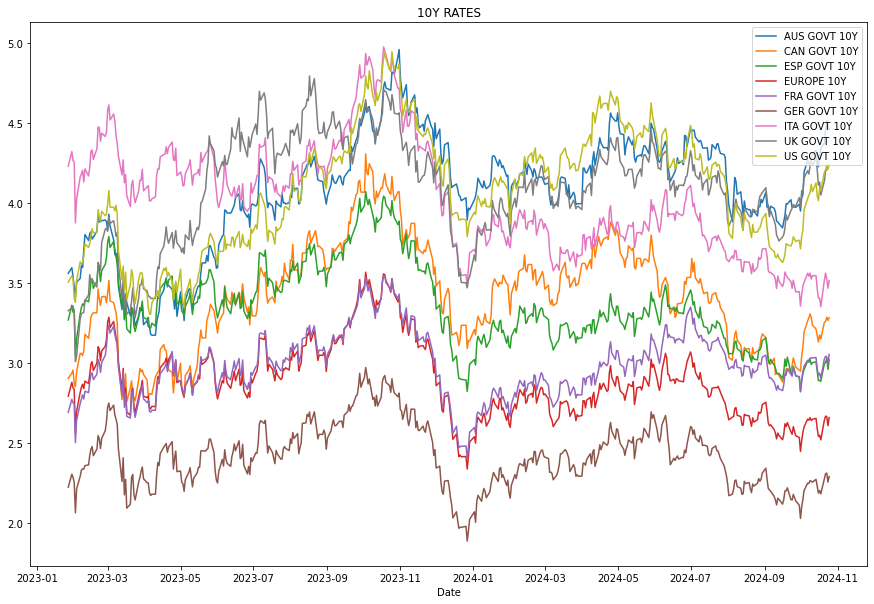

In [14]:
##UPDATES DM RATES DATABASE

import pandas as pd
import numpy as np
import math
import os
import csv
import yfinance as yf
#import mysql.connector
import psycopg2
import requests
import json
import tkinter as tk
import re
import requests
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import date
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine

dbase = "visiblealpha_laptop"
    
headers = authenticate('leonardob.moraes@outlook.com','akf7a7j5@@')

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df

to_date = lambda x: datetime.strptime(x, "%Y-%m-%d").date()
split_columns = lambda x: x.split(' ')[0]
find_country = lambda x: x.find(country)
find_tenors_1 = lambda x: x.split('Y')[0]
find_tenors_2 = lambda x: x.split(' ')[-1]
find_10 = lambda x: x.find('10')


try:
    query_DMRates = 'SELECT * FROM global_rates_dm'    
    DM_Rates_df = pd.read_sql_query(query_DMRates, engine)
    DM_Rates_df = Set_DF(DM_Rates_df)
    DM_Rates_df = DD_Index(DM_Rates_df)
except:
    print('Read CSV')
    DM_Rates_df = pd.read_csv(r'C:/Users/Utilizador/OneDrive/Documentos/Malta/Systematic/Global_Rates_DM.csv')
    DM_Rates_df.dropna(thresh = 10, inplace = True)
    DM_Rates_df[DM_Rates_df.columns.values.tolist()[0]] = DM_Rates_df[DM_Rates_df.columns.values.tolist()[0]].map(to_date)
    DM_Rates_df = Set_DF(DM_Rates_df)
    DM_Rates_df = DD_Index(DM_Rates_df)
    
today = date.today()
if (today.weekday() == 5):
    today = today - timedelta(1)
if (today.weekday() == 6):
    today = today - timedelta(2)
if ((today.day == 25) & (today.month == 12)) | ((today.day == 1) & (today.month == 1)):
    today = today - timedelta(1)
prev_date = DM_Rates_df.index[DM_Rates_df.index < today][-1]

country_dict = {'AUS': 'australia', 'CAN': 'canada', 'ESP': 'spain', 'FRA': 'france', 'GER': 'germany', 'ITA': 'italy', 'UK': 'united-kingdom', 'US': 'united-states'}
country_list = list(pd.unique(DM_Rates_df.columns.map(split_columns)))
country_list.remove('EUROPE')

if (today not in DM_Rates_df.index):
    DM_Rates_df.loc[today] = np.nan
    
for country in country_list:
    country_full = country_dict[country]
    url_country = 'http://www.worldgovernmentbonds.com/country/' + country_full + '/'
    rc = requests.get(url_country)
    country_rates = pd.read_html(rc.text, match = 'Bond')[0]
    Country_Rates_df = DM_Rates_df.T[DM_Rates_df.columns.map(find_country) != -1].T
    tenors_list = Country_Rates_df.columns.map(find_tenors_1).map(find_tenors_2)
    for tenor in tenors_list:
        column_label = country + ' GOVT ' + tenor + 'Y'
        full_tenor = tenor + ' years'
        try:
            idx = country_rates['ResidualMaturity', 'ResidualMaturity'].values.tolist().index(full_tenor)
            last_rate = float(country_rates['Yield', 'Yield'][idx][:-1])
        except:
            last_rate = DM_Rates_df.loc[DM_Rates_df.index[DM_Rates_df.index.tolist().index(today) - 1], column_label]
            print('PROBLEMS WITH ' + column_label)
        DM_Rates_df.loc[today, column_label] = last_rate    

DM_Rates_df.loc[today, 'EUROPE 2Y'] = DM_Rates_df.loc[prev_date, 'EUROPE 2Y'] + ((DM_Rates_df.loc[today, 'ESP GOVT 2Y'] - DM_Rates_df.loc[prev_date, 'ESP GOVT 2Y']) + (DM_Rates_df.loc[today, 'FRA GOVT 2Y'] - DM_Rates_df.loc[prev_date, 'FRA GOVT 2Y']) + (DM_Rates_df.loc[today, 'GER GOVT 2Y'] - DM_Rates_df.loc[prev_date, 'GER GOVT 2Y']) + (DM_Rates_df.loc[today, 'ITA GOVT 2Y'] - DM_Rates_df.loc[prev_date, 'ITA GOVT 2Y'])) / 4
DM_Rates_df.loc[today, 'EUROPE 5Y'] = DM_Rates_df.loc[prev_date, 'EUROPE 5Y'] + ((DM_Rates_df.loc[today, 'ESP GOVT 5Y'] - DM_Rates_df.loc[prev_date, 'ESP GOVT 5Y']) + (DM_Rates_df.loc[today, 'FRA GOVT 5Y'] - DM_Rates_df.loc[prev_date, 'FRA GOVT 5Y']) + (DM_Rates_df.loc[today, 'GER GOVT 5Y'] - DM_Rates_df.loc[prev_date, 'GER GOVT 5Y']) + (DM_Rates_df.loc[today, 'ITA GOVT 5Y'] - DM_Rates_df.loc[prev_date, 'ITA GOVT 5Y'])) / 4
DM_Rates_df.loc[today, 'EUROPE 10Y'] = DM_Rates_df.loc[prev_date, 'EUROPE 10Y'] + ((DM_Rates_df.loc[today, 'ESP GOVT 10Y'] - DM_Rates_df.loc[prev_date, 'ESP GOVT 10Y']) + (DM_Rates_df.loc[today, 'FRA GOVT 10Y'] - DM_Rates_df.loc[prev_date, 'FRA GOVT 10Y']) + (DM_Rates_df.loc[today, 'GER GOVT 10Y'] - DM_Rates_df.loc[prev_date, 'GER GOVT 10Y']) + (DM_Rates_df.loc[today, 'ITA GOVT 10Y'] - DM_Rates_df.loc[prev_date, 'ITA GOVT 10Y'])) / 4
DM_Rates_df.loc[today, 'EUROPE 30Y'] = DM_Rates_df.loc[prev_date, 'EUROPE 30Y'] + ((DM_Rates_df.loc[today, 'ESP GOVT 30Y'] - DM_Rates_df.loc[prev_date, 'ESP GOVT 30Y']) + (DM_Rates_df.loc[today, 'FRA GOVT 30Y'] - DM_Rates_df.loc[prev_date, 'FRA GOVT 30Y']) + (DM_Rates_df.loc[today, 'GER GOVT 30Y'] - DM_Rates_df.loc[prev_date, 'GER GOVT 30Y']) + (DM_Rates_df.loc[today, 'ITA GOVT 30Y'] - DM_Rates_df.loc[prev_date, 'ITA GOVT 30Y'])) / 4

DM_Rates_df.to_sql('global_rates_dm', engine, index = True, if_exists = 'replace')
DM_Rates_df.to_csv(r"C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\Global_Rates_DM.csv")
DM_Rates_df.T[DM_Rates_df.columns.map(find_10) != -1].T[-450:].plot(figsize = (15, 10), title = '10Y RATES').legend(loc = 'best')
print('Up days 2023 ' + str(round(100 * len((DM_Rates_df['US GOVT 10Y'][DM_Rates_df.T.columns.map(lambda x: x.year) == 2023] - DM_Rates_df['US GOVT 10Y'][DM_Rates_df.T.columns.map(lambda x: x.year) == 2023].shift(1))[(DM_Rates_df['US GOVT 10Y'][DM_Rates_df.T.columns.map(lambda x: x.year) == 2023] - DM_Rates_df['US GOVT 10Y'][DM_Rates_df.T.columns.map(lambda x: x.year) == 2023].shift(1)) > 0]) / len(DM_Rates_df['US GOVT 10Y'][DM_Rates_df.T.columns.map(lambda x: x.year) == 2023]), 2)))
print('Up days since 01Jun23 ' + str(100 * len((DM_Rates_df['US GOVT 10Y'][-76:] - DM_Rates_df['US GOVT 10Y'][-76:].shift(1))[(DM_Rates_df['US GOVT 10Y'][-76:] - DM_Rates_df['US GOVT 10Y'][-76:].shift(1)) > 0]) / len(DM_Rates_df['US GOVT 10Y'][-76:])))
DM_Rates_df

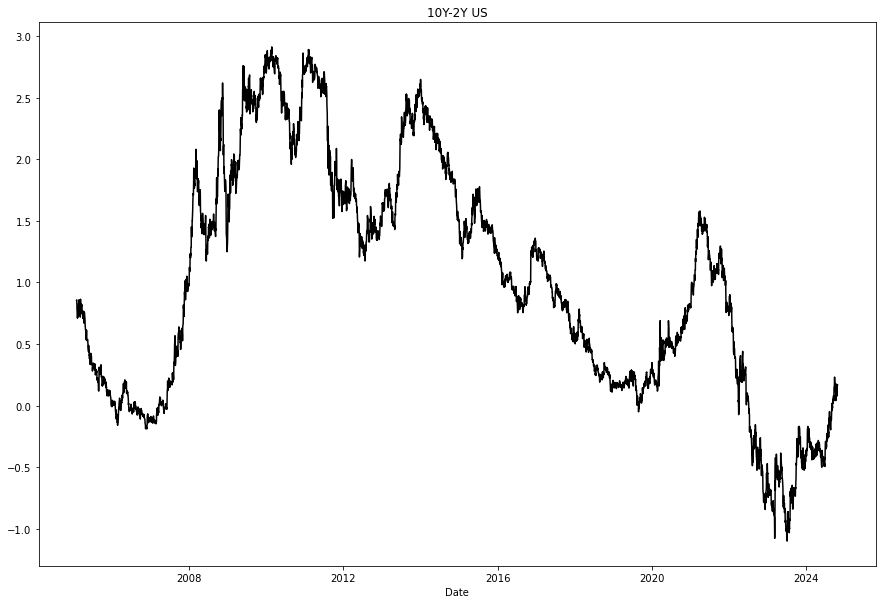

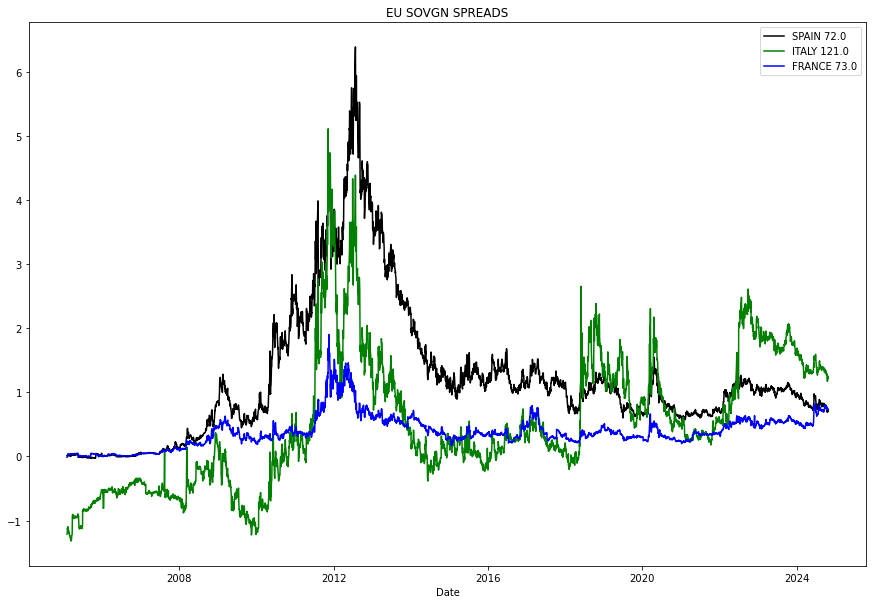

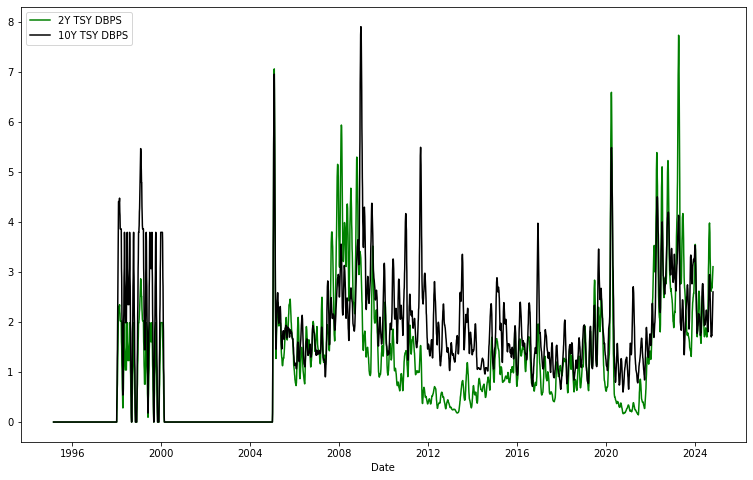

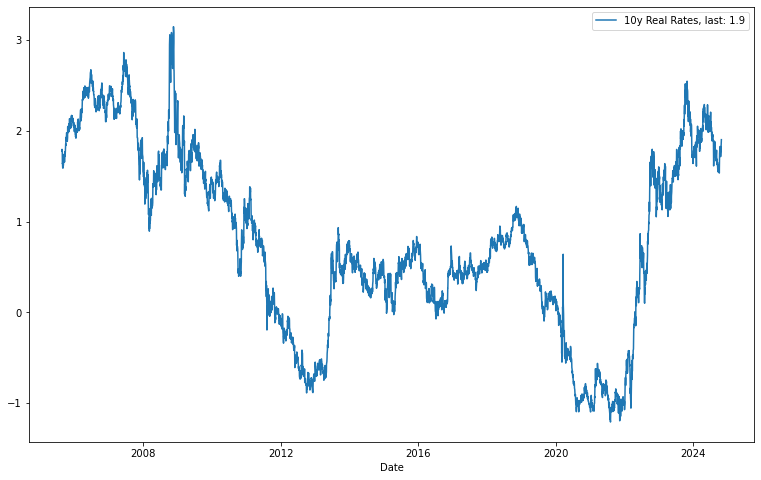

In [12]:
#RATES GRAPHS

plt.figure(0)
(DM_Rates_df['US GOVT 10Y'] - DM_Rates_df['US GOVT 2Y']).plot(figsize = (15, 10), c = 'k', title = '10Y-2Y US')
plt.figure(1)
(DM_Rates_df['ESP GOVT 10Y'] - DM_Rates_df['GER GOVT 10Y']).plot(figsize = (15, 10), c = 'k', label = 'SPAIN ' + str(round(100 * (DM_Rates_df['ESP GOVT 10Y'] - DM_Rates_df['GER GOVT 10Y']).iloc[-1], 0)), title = 'EU SOVGN SPREADS')
(DM_Rates_df['ITA GOVT 10Y'] - DM_Rates_df['GER GOVT 10Y']).plot(figsize = (15, 10), c = 'g', label = 'ITALY ' + str(round(100 * (DM_Rates_df['ITA GOVT 10Y'] - DM_Rates_df['GER GOVT 10Y']).iloc[-1], 0)))
(DM_Rates_df['FRA GOVT 10Y'] - DM_Rates_df['GER GOVT 10Y']).plot(figsize = (15, 10), c = 'b', label = 'FRANCE ' + str(round(100 * (DM_Rates_df['FRA GOVT 10Y'] - DM_Rates_df['GER GOVT 10Y']).iloc[-1], 0))).legend(loc = 'best')
plt.figure(2, figsize = (13, 8))
(Prices_df['USGG2YR'].rolling(21).std() * np.sqrt(1 / 21) * 100).rolling(21).mean().plot(c = 'g', label = '2Y TSY DBPS').legend(loc = 'best')
(Prices_df['USGG10YR'].rolling(21).std() * np.sqrt(1 / 21) * 100).rolling(21).mean().plot(c = 'k', label = '10Y TSY DBPS').legend(loc = 'best')
plt.figure(3, figsize = (13, 8))
(Prices_df['USGG10YR'] - Prices_df['T10YIE'])[-5000:].plot(label = '10y Real Rates, last: ' + str(str(round((Prices_df['USGG10YR'] - Prices_df['T10YIE']).iloc[-1], 2)))).legend(loc = 'best')

In [15]:
#%%writefile C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\mkt_cap.py

#Updates mkt_cap relation with last missing days values


import pandas as pd
import math
import numpy as np
import os
import csv
import yfinance as yf
#import mysql.connector
import matplotlib.pyplot as plt
import psycopg2
import requests
import json
import tkinter as tk
import re
from datetime import datetime
from datetime import timedelta
from datetime import date
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression

def Average(lst):
    return sum(lst) / len(lst)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Filter_df(tbf_df, merging_dates_list):
    
    filter_df = pd.DataFrame(merging_dates_list, columns=['Date'])
    merged_df = pd.merge(tbf_df, filter_df, on='Date')
    merged_df.index = filter_df['Date'] 
    merged_df.index.name = 'Date'
    merged_df.drop(['Date'], axis=1, inplace=True)
    
    
    return merged_df

def offset(c_stock, i_list, d_list, t_date, r_date, div_i):
    
    cutoff_date = r_date
    Start_Date = t_date
    ed_list = d_list
    y_list = i_list
    cur_index = 0
    nd_list = []
    for cur_ed_date in ed_list:                            
        cont=0
        seek_element = True
        ced = cur_ed_date
        cur_index = ed_df[c_stock].values.tolist()[cur_index:].index(cur_ed_date) + cur_index
        cur_index_plus = cur_index + 1
        if (cur_index_plus<len(ed_df.index)):
            cur_year = ed_df.index[cur_index_plus][len(ed_df.index[cur_index_plus])-4:]
        else:
            cur_year = today.year
        cur_ed_date = str(cur_year) + '-' + cur_ed_date[0:2] + '-' + cur_ed_date[2:]
        cur_ed_date = datetime.strptime(cur_ed_date, "%Y-%m-%d").date()
        if (cur_ed_date < cutoff_date):
            nd_list.append(cur_ed_date)        
    
    offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
    
    return offs

dbase = "visiblealpha_laptop"
dbase_metrics = "metrics_laptop"

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list=[]
len_tl=len(tables_list)
cont_tl=0
while (cont_tl<len_tl):
    new_tables_list.append(re.sub(r'[^a-z_^0-9]', '', str(tables_list[cont_tl])))
    cont_tl=cont_tl+1

number_to_string = {'6160 HK': 'BGNE US','700 HK': 'TCEHY US','2330 TT': 'TSM US','6758 JP': 'SONY US','9868 HK': 'XPEV US'}
string_to_number = {'BGNE US': '6160 HK','TCEHY US': '700 HK','TSM US': '2330 TT','SONY US': '6758 JP','XPEV US': '9868 HK'}
clean_up = lambda x: re.sub(r'[^A-Z /^0-9]', '', str(x))
clean_up_save = lambda x: re.sub(r'[^A-Z ^0-9]', '', str(x))
map_country = lambda x: x[-2:]
map_fx = lambda x: FX_DF.loc[x, 'Pair']
map_mult = lambda x: FX_DF.loc[x, 'Mult']
to_pxs = lambda x: Prices_df.loc[current_date, x]

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])

today = date.today()

clean_date = lambda x: datetime.strptime(x, "%d-%b-%y").date()
number_to_string = {'6160 HK': 'BGNE US','700 HK': 'TCEHY US','2330 TT': 'TSM US','6758 JP': 'SONY US','9868 HK': 'XPEV US'}
string_to_number = {'BGNE US': '6160 HK','TCEHY US': '700 HK','TSM US': '2330 TT','SONY US': '6758 JP','XPEV US': '9868 HK'}

query_mc = 'SELECT * FROM mkt_cap_relation'    
mc_df = pd.read_sql_query(query_mc, engine)
mc_df = Set_DF(mc_df)
mc_df = DD_Index(mc_df)
Start_Date = mc_df.index[0]

query_fx = "SELECT * FROM fx_relation"
FX_DF = pd.read_sql_query(query_fx, engine)
FX_DF = Set_DF(FX_DF)
FX_DF = DD_Index(FX_DF)

stocks = pd.read_csv(r"C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\Tickers_VA.csv")
csv_df = pd.DataFrame(stocks)

csv_df['Relations_ticker'] = csv_df['tickers'].replace(number_to_string)
csv_df['Relations_ticker'] = csv_df['Relations_ticker'].map(clean_up)
csv_df['SQL_ticker'] = csv_df['Relations_ticker'].map(clean_up_save)
csv_df['VA_tickers'] = csv_df['tickers'].map(clean_up)
csv_list = csv_df['VA_tickers'].values.tolist()
csv_df = Set_DF(csv_df)
csv_df = DD_Index(csv_df)

query_yq_all = "SELECT * FROM yq_all"
yq_df = pd.read_sql_query(query_yq_all, engine)
yq_df = Set_DF(yq_df)
yq_df = DD_Index(yq_df)

query_ed = "SELECT * FROM ed_relation"
ed_df = pd.read_sql_query(query_ed, engine)
ed_df = Set_DF(ed_df)
ed_df = DD_Index(ed_df)
ed_df['AUX'] = ed_df.index
dum_l1 = []
dum_l2 = []
for dum in ed_df['AUX']:
    dum_s = dum.split('QCY-')
    ed_df.loc[dum, 'AUX'] = int(str(dum_s[1]) + str(dum_s[0]))
ed_df.sort_values(by=['AUX'], inplace=True)
ed_df.drop('AUX', axis=1, inplace=True)

query_prices = 'SELECT * FROM prices_relation'    
Prices_df = pd.read_sql_query(query_prices, engine)
Prices_df = Set_DF(Prices_df)
Prices_df = DD_Index(Prices_df)

over = input('Override?(Y/N) ').upper()
over_b = False
if (over=='Y'):
    over_b = True
    Start_Date = input("Enter Start Date: (YY/MM/DD)")
    if (Start_Date == ''):
        Start_Date = mc_df.index[-1]
    else:
        Start_Date = datetime.strptime(Start_Date, "%y/%m/%d").date() 
    date_range = Prices_df.index[Prices_df.index >= Start_Date]

holdouts = 0

stock_list = list(pd.DataFrame(mc_df.columns)[0].replace(number_to_string))

single = input('Enter Stock (empty for list): ').upper()
if (single != ''):
    if (single in stock_list):
        stock_list = []
        stock_list.append(single)
else:
    if (over_b) & (Start_Date <= mc_df.index[-1]):
        mc_df = pd.DataFrame(0, index = date_range, columns = mc_df.columns)

c = 0
for current_stock in stock_list:
    c = c + 1
    print(str(c) + '- ' + current_stock)
    region = current_stock[-2:]
    pair = 'USD' + FX_DF.loc[region, 'Pair']
    mult = FX_DF.loc[region, 'Mult']
    sql_stock = csv_df['SQL_ticker'][csv_df['Relations_ticker'].values.tolist().index(current_stock)]
    wasd = re.sub(r'[^a-z^0-9]', '', sql_stock.lower()) + '_wasd'
    if (wasd in new_tables_list) and (current_stock in Prices_df.columns):
        query_wasd = 'SELECT * FROM ' + wasd 
        wasd_df = pd.read_sql_query(query_wasd, engine)
        wasd_df = Set_DF(wasd_df)
        wasd_df = DD_Index(wasd_df)
        new_wasd_df = wasd_df.swapaxes('index', 'columns')
        new_wasd_df.fillna(method = 'ffill', inplace = True)
        wasd_df = new_wasd_df.swapaxes('index', 'columns')
        ed_list = ed_df[current_stock][ed_df[current_stock] != ''].values.tolist()
        y_list = ed_df.index.values.tolist()
        record_date = yq_df.loc[current_stock, 'Record Date']
        div = 1
        key = yq_df.loc[current_stock, 'Y/Q']
        if (key == 'Y'):
            div = 2
        current_date = mc_df.index[0]
        if (single != '') & (Start_Date == ''):
            Start_Date = mc_df[current_stock].dropna().index[-1]
        if (over_b):
            current_date = Start_Date
        while (current_date <= today):
            offs = 0
            if (current_date.weekday() < 5) & (current_date in Prices_df.index):
                try:
                    fx = Prices_df.loc[current_date, pair]
                    if (wasd_df.index[0] <= current_date):
                        share_date = wasd_df.index[wasd_df.index <= current_date][-1]
                    else:
                        share_date = wasd_df.index[0]
                    offs = offset(current_stock, y_list, ed_list, share_date, record_date, div)
                    share_count = wasd_df.loc[share_date].shift(offs)[key + str(0)]
                    if (share_count != None):
                        share_px = Prices_df.loc[current_date, current_stock]
                        mkt_cap = mult * share_count * float(share_px) / 1000000 / fx
                        if (current_date not in mc_df.index):
                            mc_df.loc[current_date] = mc_df.iloc[0]
                        mc_df.loc[current_date, pd.DataFrame([current_stock])[0].replace(number_to_string)[0]] = round(mkt_cap, 4)
                except:
                    pass
            current_date = current_date + timedelta(1)
    else:
        holdouts = holdouts + 1 

print(holdouts)
mc_df.sort_index(axis = 0, ascending = False, inplace = True)
mc_df = mc_df.replace({np.nan: 0})
mc_df.to_sql('mkt_cap_relation', engine, index=True, if_exists='replace')
mc_df

Override?(Y/N) n
Enter Stock (empty for list): 
1- ABST US
2- AMPL US
3- ASUR US
4- AXON US
5- BLKB US
6- CDAY US
7- DV US
8- EGAN US
9- ESMT US
10- EVBG US
11- FIVN US
12- FRSH US
13- SPNS US
14- HSTM US
15- JAMF US
16- LAW US
17- LPSN US
18- MNTV US
19- MODN US
20- NEWR US
21- ONTF US
22- PHR US
23- PRO US
24- PYCR US
25- QLYS US
26- QTWO US
27- SEMR US
28- SPSC US
29- TOST US
30- TTGT US
31- TWOU US
32- TYL US
33- UPLD US
34- VERX US
35- VRNT US
36- WKME US
37- YEXT US
38- ZETA US
39- ZUO US
40- TASK US
41- RIVN US
42- VRT US
43- KBC BB
44- SIE GR
45- INS GR
46- AAPL US
47- Z US
48- U US
49- AFRM US
50- APPN US
51- AI US
52- VEEV US
53- MNDY US
54- TXG US
55- FTCH US
56- ENPH US
57- SEDG US
58- TEG GR
59- VNA GR
60- NESN SW
61- ROSE SW
62- SNAP US
63- MGNI US
64- PINS US
65- BILL US
66- PATH US
67- ZEN US
68- LEG GR
69- ASAN US
70- CSIQ US
71- DWNI GR
72- ZI US
73- W US
74- WISE LN
75- KNSL US
76- QS US
77- DDOG US
78- ORSTED DC
79- NOKIA FH
80- SPLK US
81- DOCS US
82- TWLO US
83- Z

<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a futur

93- RWE GR
94- DTE GR
95- ISP IM
96- ENEL IM
97- NOVA US
98- INGA NA
99- SPWR US
100- ASM NA
101- ASML NA
102- DNB NO
103- NIO US
104- EDP PL
105- TEF SM
106- CLNX SM
107- ENG SM
108- IBE SM
109- NDA SS
110- ERICB SS
111- CSGN SW
112- NOVN SW
113- ROG SW
114- ALSN US
115- CZR US
116- COIN US
117- LULU US
118- QSR US
119- RH US
120- RYA ID
121- TSLA US
122- BP/ LN
123- ENB US
124- EQNR NO
125- RUN US
126- BX US
127- HSBA LN
128- MKL US
129- PCOR US
130- AZN LN
131- BGNE US
132- BHC US
133- CRL US
134- EXEL US
135- GSK LN
136- HAE US
137- SOFI US
138- HZNP US
139- ICLR US
140- SGRE SM
141- JAZZ US
142- MOH US
143- NBIX US
144- NOVOB DC
145- NVRO US
146- TDOC US
147- BLDP CN
148- ZLAB US
149- SNOW US
150- ARW US
151- WCN US
152- AA US
153- AEM CN
154- FNV CN
155- ABX CN
156- K CN
157- TECK US
158- COLD US
159- ELS US
160- GLPI US
161- INVH US
162- AMTD US
163- ATUS US
164- AVLR US
165- BCE CN
166- CABO US
167- PLUG US
168- CRS US


<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


169- DHER GR
170- EDU US
171- PHIA NA
172- ETSY US
173- GDDY US
174- EVCM US
175- INFA US
176- LSXMA US
177- LSXMK US
178- MAN US
179- XP US
180- NYT US
181- PANW US
182- FSLR US
183- SAM US
184- SIRI US
185- SPOT US
186- SQ US
187- NTNX US
188- TAL US
189- TME US
190- TTD US
191- VOD LN
192- SYNA US
193- BABA US
194- BIDU US
195- BILI US
196- BKI US
197- BL US
198- COUP US
199- DBX US
200- DOCU US
201- DOMO US
202- HUBS US
203- JD US
204- LITE US
205- MELI US
206- SREN SW
207- MOMO US
208- MTCH US
209- GDS US
210- NTES US
211- NXPI US
212- OCFT US
213- PDD US
214- RNG US
215- SHOP CN
216- TCEHY US
217- TEAM US
218- TER US
219- TSEM IT
220- TSM US
221- UBER US
222- VNET US
223- WB US
224- WDAY US
225- PCTY US
226- ZM US
227- ZNGA US
228- ZTO US
229- FTS US
230- NGG US
231- BIGC US
232- AAL US
233- BBY US
234- CMG US
235- COST US
236- DAL US
237- DG US
238- DHI US
239- DLTR US
240- DPZ US
241- HD US
242- LOW US
243- MCD US
244- NKE US
245- RL US
246- SBUX US
247- TGT US
248- RBLX US
249

<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


484- CMA US
485- CAG US
486- TMDX US
487- STZ US
488- COO US
489- GLW US
490- CTVA US
491- COTY US
492- CMI US
493- DHR US
494- DRI US
495- DVA US
496- DE US
497- XRAY US
498- DVN US
499- FANG US
500- DLR US
501- DFS US
502- HIMS US
503- APP US
504- DISH US
505- D US
506- DOV US
507- DOW US
508- MARA US
509- DXC US
510- EMN US
511- ETN US
512- ECL US
513- EIX US
514- EMR US
515- EFX US
516- EQIX US
517- EQR US
518- ES US
519- EXPE US
520- EXPD US
521- EXR US
522- FAST US
523- FRT US
524- FIS US
525- FITB US
526- FRC US
527- FLT US
528- VCEL US
529- FLS US
530- FMC US
531- F US


<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


532- FTV US
533- CFLT US
534- FOX US
535- BEN US
536- FCX US
537- HROW US


<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


538- GRMN US
539- IT US
540- GD US
541- GM US
542- GPC US
543- GL US
544- GPN US
545- GWW US
546- HRB US
547- HAL US
548- HBI US
549- HOG US
550- HIG US
551- HAS US
552- HCA US
553- PEAK US
554- HP US
555- HSIC US
556- HES US
557- HPE US
558- HLT US
559- PEGA US
560- HRL US
561- HST US
562- HBAN US
563- IEX US
564- IDXX US
565- INFO US
566- ITW US
567- IR US
568- IP US
569- IPG US
570- IFF US
571- ISRG US
572- IVZ US
573- IPGP US
574- IRM US
575- JKHY US
576- J US
577- JBHT US
578- SJM US
579- JNPR US
580- TDW US
581- KEY US
582- KEYS US
583- KIM US
584- KMI US
585- KLAC US
586- KSS US
587- KHC US
588- S US
589- LHX US
590- LH US
591- LW US
592- LVS US
593- LEG US
594- LDOS US
595- LEN US
596- LNC US
597- LIN US
598- LYV US
599- LKQ US
600- L US
601- LYB US
602- MTB US
603- MRO US
604- MPC US
605- MAR US
606- MMC US
607- MLM US
608- MAS US
609- MKC US
610- MXIM US
611- MCK US
612- MTD US
613- MGM US
614- MCHP US
615- MAA US
616- MHK US
617- TAP US
618- MCO US
619- MOS US
620- MSI US
62

<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


652- PKI US
653- PRGO US
654- PM US
655- PSX US
656- PXD US
657- PNC US
658- PPG US
659- PPL US
660- PFG US
661- PLD US
662- PRU US
663- PHM US
664- PVH US
665- PWR US
666- DGX US
667- RJF US
668- O US
669- REG US
670- RF US
671- RMD US
672- RHI US
673- ROK US
674- ROL US
675- ROP US
676- ROST US
677- RCL US
678- SPGI US
679- CRM US
680- SEE US
681- SLG US
682- SNA US
683- LUV US
684- SWK US
685- STT US
686- STE US
687- SYK US
688- LNTH US
689- SNPS US
690- SYY US
691- TMUS US
692- TROW US
693- TTWO US
694- TPR US
695- TEL US
696- STNE US
697- TFX US
698- TXT US
699- TMO US
700- TSCO US
701- TT US
702- TDG US
703- TRV US
704- TFC US
705- NXT US
706- UAA US
707- URI US
708- UNM US
709- VFC US


<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


710- VLO US
711- PTON US
712- VTR US
713- VRSK US
714- CPRX US
715- VNO US
716- VMC US
717- WRB US
718- WAB US


<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


719- WBA US
720- WAT US
721- WEC US
722- WELL US
723- WDC US
724- WU US
725- WRK US
726- WY US
727- WHR US
728- WMB US
729- WLTW US
730- WYNN US
731- XYL US
732- YUM US
733- ZBRA US
734- ZBH US
735- ZION US
736- SG US
737- HFG GR
738- MRNA US


<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


739- DELL US
740- CLBT US
741- SMAR US
742- ESTC US
743- MDB US
744- SHL GR


<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


745- CRWD US
746- ZS US
747- ZAL GR
748- OKTA US
749- CHKP US
750- SAIC US
751- TTE FP
752- AVAV US
753- DOCN US
754- DECK US
755- AIR FP


<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


756- STM FP
757- BNP FP
758- DSY FP
759- CAP FP
760- ATRO US
761- MRVL US
762- ONON US
763- SPT US
764- PAGS US
765- CHWY US
766- ASPN US
767- UTHR US


<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a futur

768- RXT US
769- REAL US
770- NARI US
771- BE US
772- ABNB US
773- DASH US
774- LSPD CN
775- CPNG US
776- RPD US
777- FOUR US
778- TENB US
779- CYBR US
780- JBL US
781- BASE US
782- GTLB US


<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


783- ROKU US
784- DT US
785- ADYEN NA
786- POWL US
787- DKNG US
788- OPEN US


<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a futur

789- SE US
790- HALO US
791- NET US
792- CVNA US
793- XPEV US
794- FSLY US
795- RDFN US
796- PD US
797- EXAS US
23


<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
<ipython-input-15-e170be80deb9>:83: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


ABST US    AMPL US   ASUR US     AXON US    BLKB US   CDAY US  \
Date                                                                        
2024-10-25      0.0  1117.1866  239.6574  34472.5260  4420.4863  10276.36   
2024-10-24      0.0  1107.3760  236.9424  34363.9560  4440.6405  10276.36   
2024-10-23      0.0  1103.6970  237.1892  34330.6095  4447.3586  10276.36   
2024-10-22      0.0  1107.3760  236.9424  34867.2555  4505.7541  10276.36   
2024-10-21      0.0  1097.5654  238.4233  34430.6490  4441.6741  10276.36   
...             ...        ...       ...         ...        ...       ...   
2015-01-07      0.0     0.0000   71.0881   1374.6797  2027.5412      0.00   
2015-01-06      0.0     0.0000   72.4169   1352.9854  2002.2744      0.00   
2015-01-05      0.0     0.0000   70.4238   1359.3350  2011.3323      0.00   
2015-01-02      0.0     0.0000   73.0812   1402.7236  2005.6115      0.00   
2015-01-01      0.0     0.0000   74.8086   1401.1362  2062.3426      0.00   

                DV US   EGAN US    ESMT US    EVBG US  ...    OPEN US  \
Date                                                   ...              
2024-10-25  3052.9234  157.6197  3924.0824  1536.2449  ...  1185.9951   
2024-10-24  2957.9044  158.6069  3924.0824  1536.2449  ...  1199.5494   
2024-10-23  2852.3278  162.5556  3924.0824  1536.2449  ...  1172.4409   
2024-10-22  2909.5151  160.5813  3924.0824  1536.2449  ...  1206.3265   
2024-10-21  3068.7598  161.8975  3924.0824  1536.2449  ...  1240.2120   
...               ...       ...        ...        ...  ...        ...   
2015-01-07     0.0000  161.7844     0.0000     0.0000  ...     0.0000   
2015-01-06     0.0000  161.1372     0.0000     0.0000  ...     0.0000   
2015-01-05     0.0000  163.4022     0.0000     0.0000  ...     0.0000   
2015-01-02     0.0000  165.6672     0.0000     0.0000  ...     0.0000   
2015-01-01     0.0000  167.6086     0.0000     0.0000  ...     0.0000   

                 SE US      HALO US      NET US     CVNA US    XPEV US  \
Date                                                                     
2024-10-25  58993.9337  6445.175100  31607.0810  26018.0164  9583.3777   
2024-10-24  59809.0793  6451.718400  31895.5187  25721.2623  9015.0912   
2024-10-23  59136.7329  6648.018200  31211.8144  25349.9984  9609.2089   
2024-10-22  59249.7823  6746.168100  31498.4717  25355.1370  9488.6633   
2024-10-21  58958.2339  6774.958700  32319.2730  24631.8791  9307.8448   
...                ...          ...         ...         ...        ...   
2015-01-07      0.0000  1574.026978      0.0000      0.0000     0.0000   
2015-01-06      0.0000  1264.753313      0.0000      0.0000     0.0000   
2015-01-05      0.0000  1255.952761      0.0000      0.0000     0.0000   
2015-01-02      0.0000  1234.580182      0.0000      0.0000     0.0000   
2015-01-01      0.0000     0.000000      0.0000      0.0000     0.0000   

              FSLY US    RDFN US      PD US       EXAS US  
Date                                                       
2024-10-25  1000.5923  1202.7350  1667.7925  12762.418500  
2024-10-24   995.0946  1206.3468  1664.0781  12974.786900  
2024-10-23   973.7907  1225.6099  1636.2196  12976.633600  
2024-10-22  1004.7156  1262.9320  1691.9365  13033.880700  
2024-10-21  1017.7728  1243.6690  1745.3319  12830.745700  
...               ...        ...        ...           ...  
2015-01-07     0.0000     0.0000     0.0000   2354.793909  
2015-01-06     0.0000     0.0000     0.0000   2298.959577  
2015-01-05     0.0000     0.0000     0.0000   2359.225312  
2015-01-02     0.0000     0.0000     0.0000   2374.291746  
2015-01-01     0.0000     0.0000     0.0000      0.000000  

[2562 rows x 797 columns]

SPX                         100.00
Consumer Discretionary       81.07
Electrical & Electronics     80.15
Consumer Services            79.26
Data Software                76.45
Industrials                  74.26
Application Software         72.79
Hardware                     72.49
Materials                    70.63
Fintech                      67.32
Health Care                  67.02
Financial Services           56.72
REITs                        53.10
Staples                      49.59
Pharmaceuticals              41.15
Energy                       37.28
Utilities                    32.23
Insurers                     16.24
Name: SPX, dtype: float64


Application Software        25.11
Consumer Discretionary      41.39
Consumer Services           56.47
Data Software               38.20
Electrical & Electronics    56.71
Energy                      37.66
Financial Services          33.42
Fintech                     42.88
Hardware                    74.20
Health Care                 22.72
Industrials                 33.66
Insurers                    19.26
Materials                   39.13
Pharmaceuticals             25.49
REITs                       25.11
Staples                     24.24
Utilities                   42.78
Name: 2024-10-25, dtype: float64

<Figure size 1440x936 with 0 Axes>

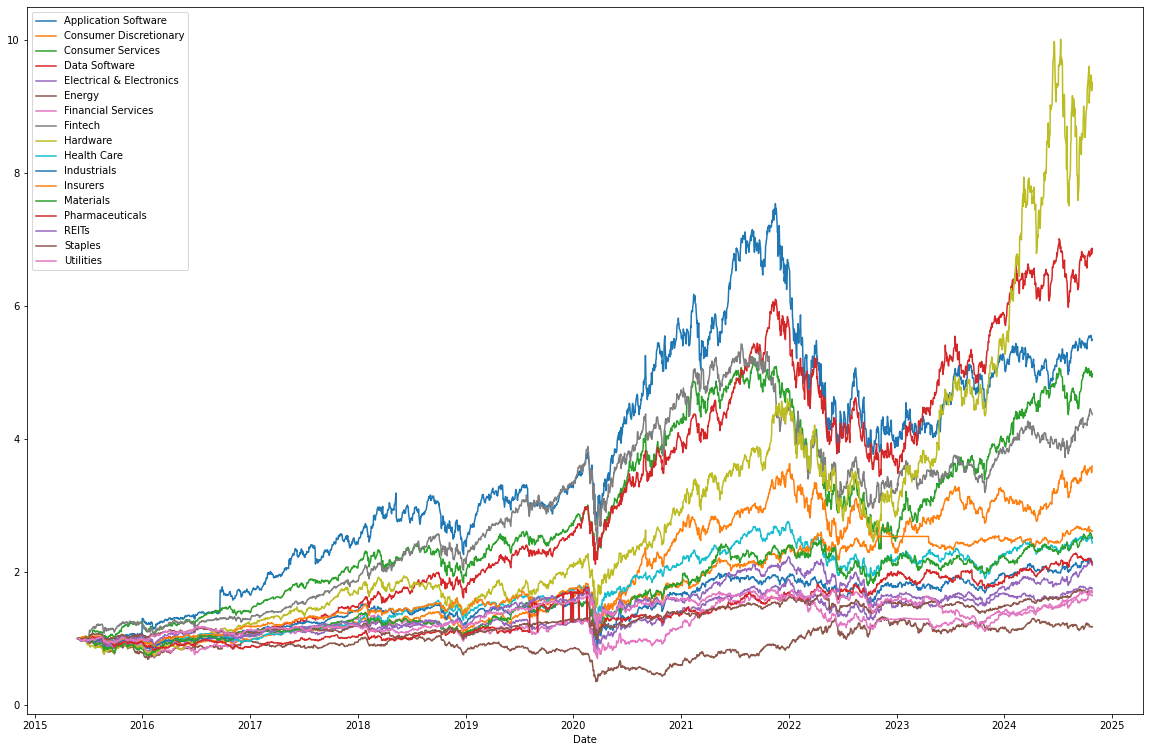

In [17]:
#%%writefile C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\sector_indexes.py
 

import pandas as pd
import math
import numpy as np
import os
import csv
import yfinance as yf
#import mysql.connector
import matplotlib.pyplot as plt
import psycopg2
import requests
import json
import tkinter as tk
import re
from datetime import datetime
from datetime import timedelta
from datetime import date
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression

def Average(lst):
    return sum(lst) / len(lst)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Filter_df(tbf_df, merging_dates_list):
    
    filter_df = pd.DataFrame(merging_dates_list, columns=['Date'])
    merged_df = pd.merge(tbf_df, filter_df, on='Date')
    merged_df.index = filter_df['Date'] 
    merged_df.index.name = 'Date'
    merged_df.drop(['Date'], axis=1, inplace=True)
    
    
    return merged_df

def offset(c_stock, i_list, d_list, t_date, r_date, div_i):
    
    cutoff_date = r_date
    Start_Date = t_date
    ed_list = d_list
    y_list = i_list
    cur_index = 0
    nd_list = []
    for cur_ed_date in ed_list:                            
        cont=0
        seek_element = True
        ced = cur_ed_date
        cur_index = ed_df[c_stock].values.tolist()[cur_index:].index(cur_ed_date) + cur_index
        cur_index_plus = cur_index + 1
        if (cur_index_plus<len(ed_df.index)):
            cur_year = ed_df.index[cur_index_plus][len(ed_df.index[cur_index_plus])-4:]
        else:
            cur_year = today.year
        cur_ed_date = str(cur_year) + '-' + cur_ed_date[0:2] + '-' + cur_ed_date[2:]
        cur_ed_date = datetime.strptime(cur_ed_date, "%Y-%m-%d").date()
        if (cur_ed_date < cutoff_date):
            nd_list.append(cur_ed_date)        
    
    offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
    
    return offs

def on_selection(value):
    global choice
    choice = value  # store the user's choice
    root.destroy()  # close window

dbase = "visiblealpha_laptop"
dbase_metrics = "metrics_laptop"

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list=[]
len_tl=len(tables_list)
cont_tl=0
while (cont_tl<len_tl):
    new_tables_list.append(re.sub(r'[^a-z_^0-9]', '', str(tables_list[cont_tl])))
    cont_tl=cont_tl+1

clean_up = lambda x: re.sub(r'[^A-Z /^0-9]', '', str(x))
clean_up_save = lambda x: re.sub(r'[^A-Z ^0-9]', '', str(x))
to_pxs = lambda x: Prices_df.loc[current_date, x]
clean_date = lambda x: datetime.strptime(x, "%d-%b-%y").date()

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])

today = date.today()

query_mc = 'SELECT * FROM mkt_cap_relation'    
mc_df = pd.read_sql_query(query_mc, engine)
mc_df = Set_DF(mc_df)
mc_df = DD_Index(mc_df)
mc_df.sort_index(inplace = True)
mc_df = mc_df / 1000

sectors = pd.read_csv(r"C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\Custom_Segmentation.csv")
Sectors_df = pd.DataFrame(sectors)
Sectors_df = Set_DF(Sectors_df)
Sectors_df = DD_Index(Sectors_df)
    
choice_list = Sectors_df.columns.values.tolist()
root = tk.Tk()
tkvar = tk.StringVar(root)
popupMenu = tk.OptionMenu(root, tkvar, *choice_list, command = on_selection)
tk.Label(root, text = "Choose a classification: (Custom Sector 1)").grid(row = 0, column = 0)
popupMenu.grid(row = 1, column = 0)
root.mainloop() 

ext = ''
if (choice == 'ETF'):
    ext = '_etf'

map_sectors = lambda x: Sectors_df.loc[x, choice]

mc_grouped = mc_df.groupby(mc_df.columns.map(map_sectors), axis = 1)
sectors_pxs_df = mc_grouped.sum()

shifted_mc_df = mc_df.shift(-1)
exp_mc_df = mc_df.expanding().sum()
shifted_grouped = shifted_mc_df[shifted_mc_df == (shifted_mc_df - exp_mc_df)].replace({np.nan: 0}).groupby(mc_df.columns.map(map_sectors), axis = 1)
sectors_correction_df = shifted_grouped.sum()

window = 105
sectors_mask = sectors_pxs_df[sectors_pxs_df > 2 * sectors_pxs_df.rolling(window).mean()] 
sectors_mask = sectors_mask.replace({np.nan: 1})
sectors_mask[sectors_mask > 1] = 0
sectors_pxs_df = sectors_pxs_df * sectors_mask + sectors_pxs_df.rolling(window).mean() * (np.abs(sectors_mask - 1))

sectors_pxs_df.to_sql('sector_indexes' + ext, engine, index = True, if_exists = 'replace')
sectors_correction_df.to_sql('sector_indexes_corrections' + ext, engine, index = True, if_exists = 'replace')
plt.figure(0, figsize = (20, 13))
(sectors_pxs_df / sectors_pxs_df.dropna().iloc[0]).plot(figsize = (20, 13))

hard_start = datetime(2016, 1, 1).date()
if (choice == 'ETF'):
    plt.figure(1, figsize = (20, 13))
    Prices_df[sectors_pxs_df.columns.map(lambda x: x + ' US').tolist()].loc[Prices_df.index >= hard_start].plot(figsize = (20, 13))
    
XX = sectors_pxs_df.copy()
print(round(100 * sectors_pxs_df[-500:].join(Prices_df['SPX']).pct_change().dropna().corr()['SPX'], 2).sort_values(ascending = False))
round(XX.ewm(halflife = 10).std().dropna().rolling(21).mean().iloc[-1] / XX.iloc[-1] * np.sqrt(260) * 100, 2)    

IGV- 98.02
REZ- 96.97
SOXX- 96.68
XHB- 97.2
XLB- 98.88
XLC- 99.48
XLE- 98.04
XLF- 97.61
XLI- 99.16
XLP- 99.71
XLU- 99.22
XLV- 99.83
XLY- 99.51


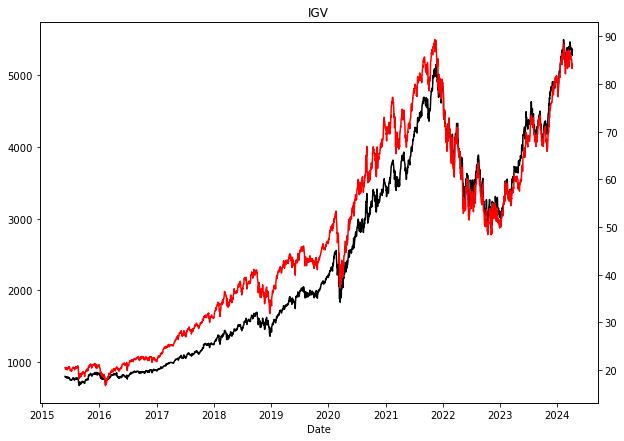

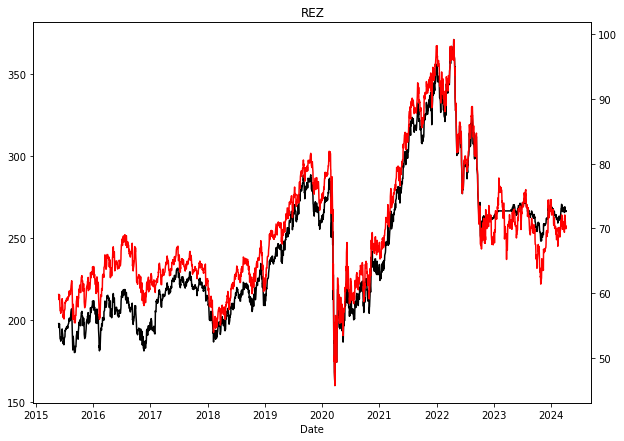

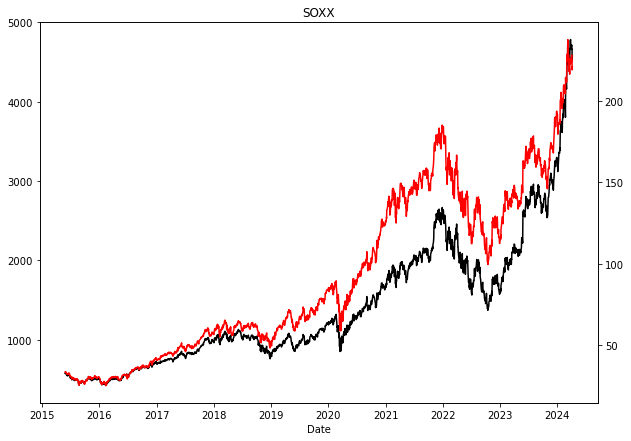

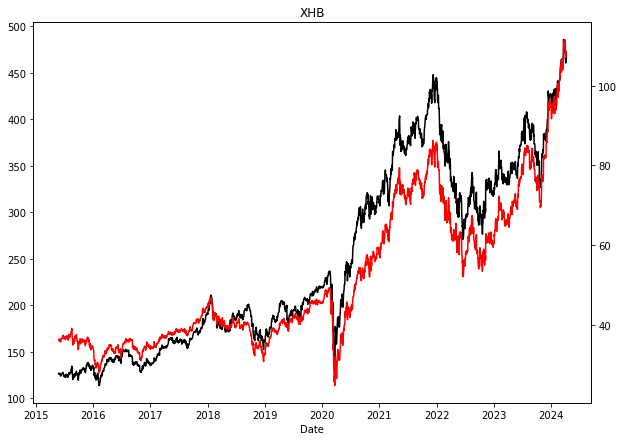

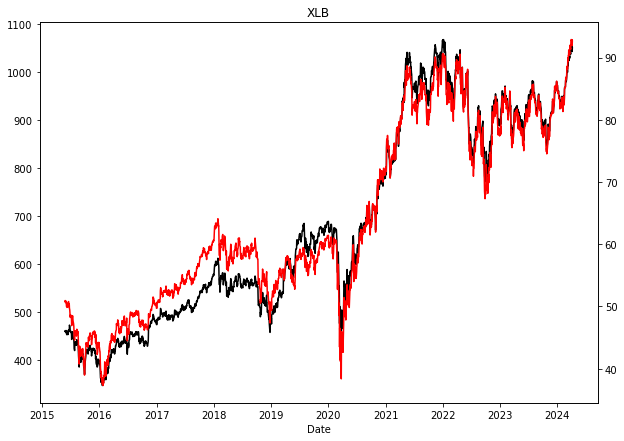

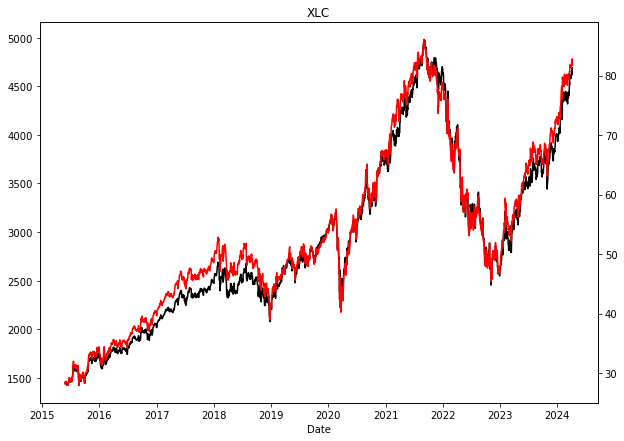

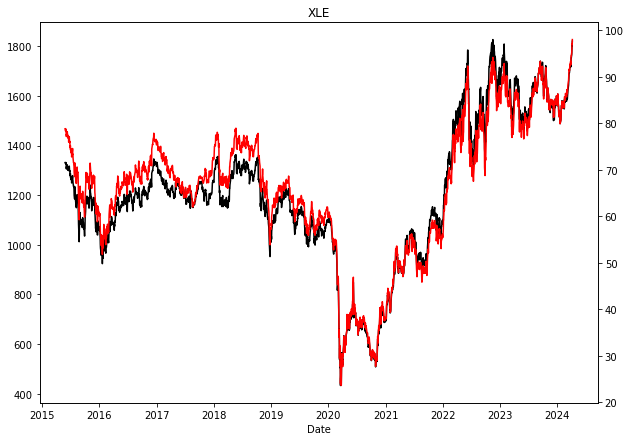

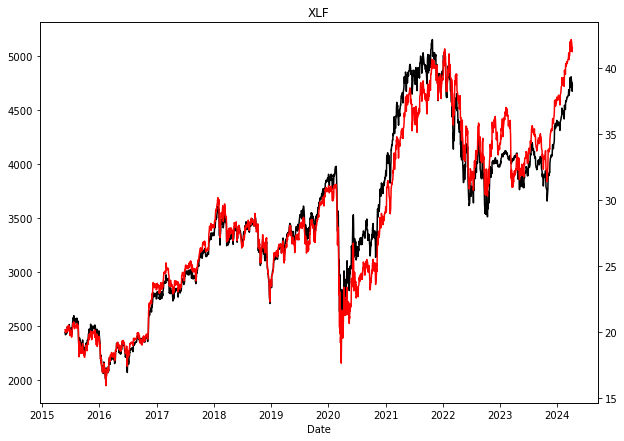

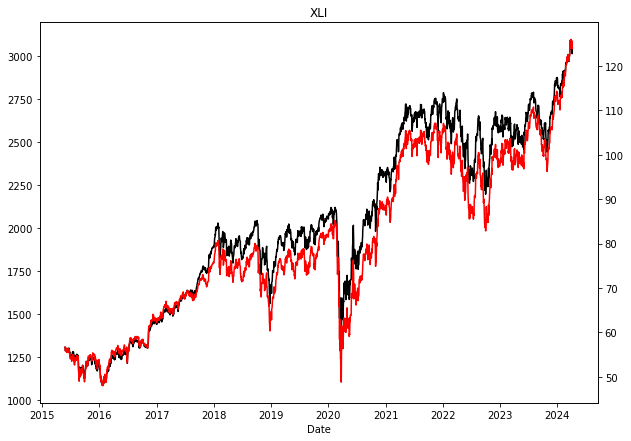

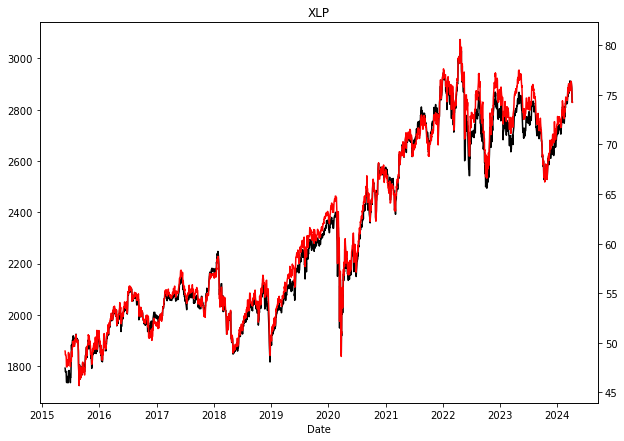

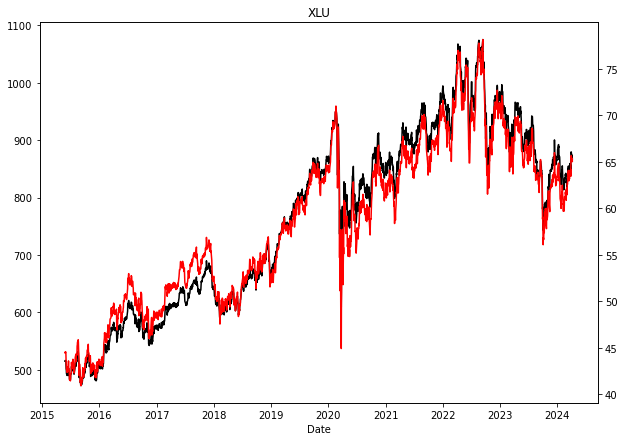

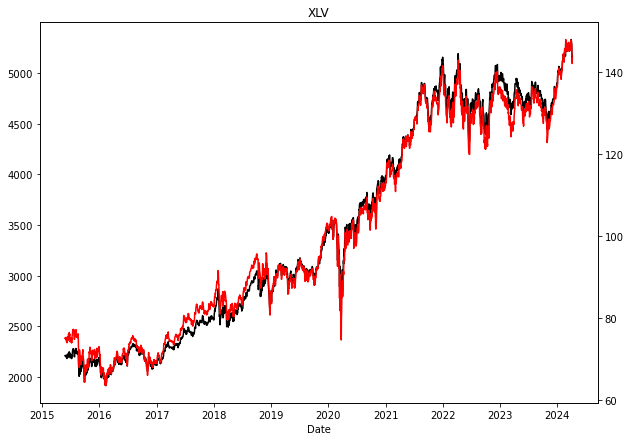

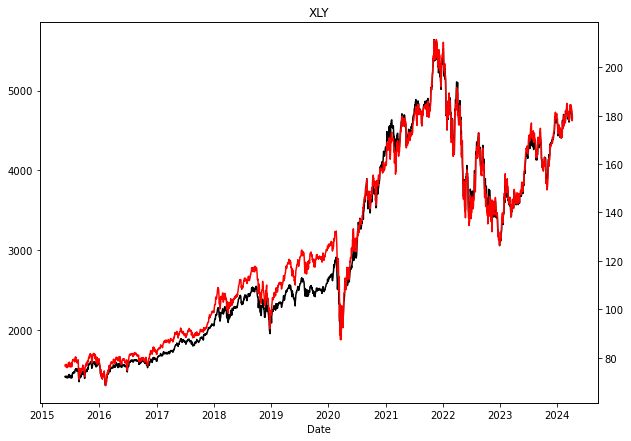

In [160]:
#ETF REPRESENTATION QUALITY

for idx, ETF in enumerate(sectors_pxs_df.columns):
    plt.figure(idx, figsize = (10, 7))
    series1 = sectors_pxs_df.loc[Prices_df[Prices_df.index >= sectors_pxs_df[ETF].dropna().index[0]][ETF + ' US'].dropna().index][ETF]
    series2 = Prices_df[ETF + ' US'].dropna()
    series1.plot(c = 'k').twinx()
    series2.loc[series1.index].plot(c = 'r')
    plt.title(ETF)
    print(ETF + '- ' + str(round(100 * series1.corr(series2), 2)))

Enter Start Date: (YY/MM/DD)24/09/01
Enter End Date: (YY/MM/DD)
Override?(Y/N for update) (NNNNNNNNN)n
2024-10-25


No handles with labels found to put in legend.


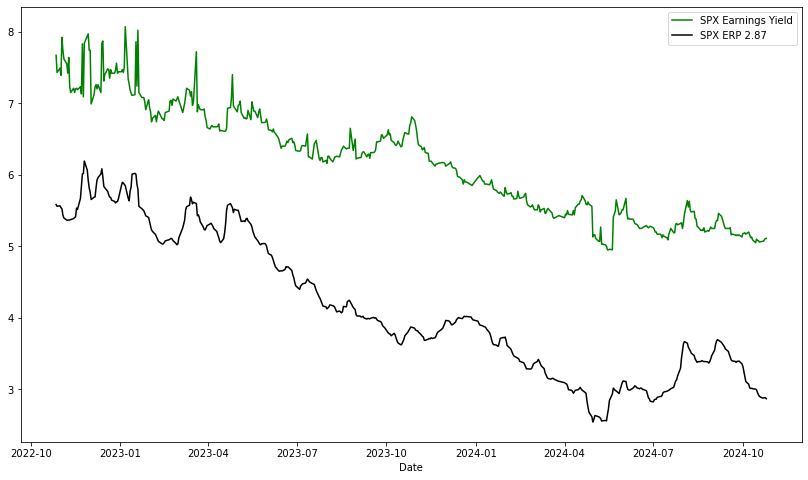

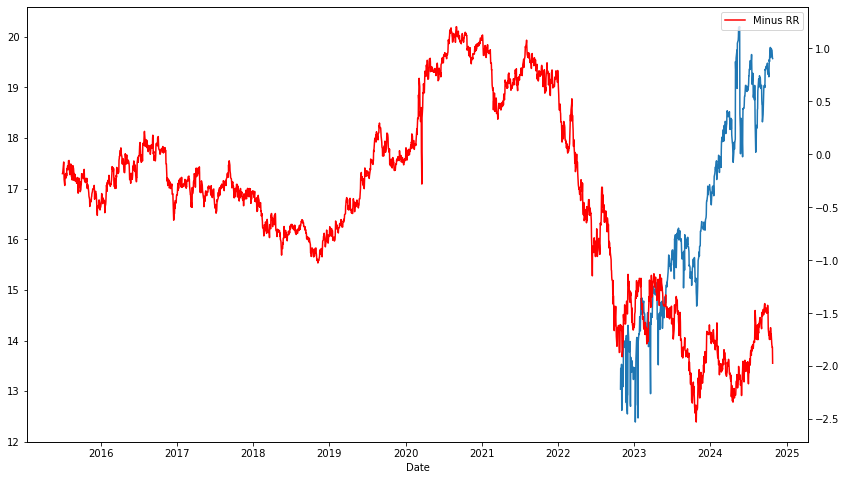

In [18]:
#%%writefile C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\erp_buider.py

#Recovers sum of Net Income (217) for the last realized 4 qtrs for SPX constituents each week and builds SPX ERP relation

import pandas as pd
import math
import numpy as np
import os
import csv
import yfinance as yf
#import mysql.connector
import matplotlib.pyplot as plt
import psycopg2
import requests
import json
import tkinter as tk
import re
from datetime import datetime
from datetime import timedelta
from datetime import date
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression

def Average(lst):
    return sum(lst) / len(lst)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Filter_df(tbf_df, merging_dates_list):
    
    filter_df = pd.DataFrame(merging_dates_list, columns=['Date'])
    merged_df = pd.merge(tbf_df, filter_df, on='Date')
    merged_df.index = filter_df['Date'] 
    merged_df.index.name = 'Date'
    merged_df.drop(['Date'], axis=1, inplace=True)
    
    
    return merged_df

def offset(c_stock, i_list, d_list, t_date, r_date, div_i):
    
    cutoff_date = r_date
    Start_Date = t_date
    ed_list = d_list
    y_list = i_list
    cur_index = 0
    nd_list = []
    for cur_ed_date in ed_list:                            
        cont=0
        seek_element = True
        ced = cur_ed_date
        cur_index = ed_df[c_stock].values.tolist()[cur_index:].index(cur_ed_date) + cur_index
        cur_index_plus = cur_index + 1
        if (cur_index_plus<len(ed_df.index)):
            cur_year = ed_df.index[cur_index_plus][len(ed_df.index[cur_index_plus])-4:]
        else:
            cur_year = today.year
        cur_ed_date = str(cur_year) + '-' + cur_ed_date[0:2] + '-' + cur_ed_date[2:]
        cur_ed_date = datetime.strptime(cur_ed_date, "%Y-%m-%d").date()
        if (cur_ed_date < cutoff_date):
            nd_list.append(cur_ed_date)        
    
    offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
    
    return offs

dbase = "visiblealpha_laptop"
dbase_metrics = "metrics_laptop"

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

number_to_string = {'6160 HK': 'BGNE US','700 HK': 'TCEHY US','2330 TT': 'TSM US','6758 JP': 'SONY US','9868 HK': 'XPEV US'}
string_to_number = {'BGNE US': '6160 HK','TCEHY US': '700 HK','TSM US': '2330 TT','SONY US': '6758 JP','XPEV US': '9868 HK'}
clean_up = lambda x: re.sub(r'[^A-Z /^0-9]', '', str(x))
clean_up_save = lambda x: re.sub(r'[^A-Z ^0-9]', '', str(x))

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase_metrics, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list_metrics = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])

to_us = lambda x: x + ' US'
to_date = lambda x: datetime.strptime(x, "%m/%d/%Y").date()

stocks = pd.read_csv(r"C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\Tickers_VA.csv")
csv_df = pd.DataFrame(stocks)

csv_df['Relations_ticker'] = csv_df['tickers'].replace(number_to_string)
csv_df['Relations_ticker'] = csv_df['Relations_ticker'].map(clean_up)
csv_df['SQL_ticker'] = csv_df['Relations_ticker'].map(clean_up_save)
csv_df['VA_tickers'] = csv_df['tickers'].map(clean_up)
csv_list = csv_df['VA_tickers'].values.tolist()
csv_df = Set_DF(csv_df)
csv_df = DD_Index(csv_df)

query_prices = 'SELECT * FROM prices_relation'    
Prices_df = pd.read_sql_query(query_prices, engine)
Prices_df = Set_DF(Prices_df)
Prices_df = DD_Index(Prices_df)

query_yq_all = "SELECT * FROM yq_all"
yq_df = pd.read_sql_query(query_yq_all, engine)
yq_df = Set_DF(yq_df)
yq_df = DD_Index(yq_df)

query_ed = "SELECT * FROM ed_relation"
ed_df = pd.read_sql_query(query_ed, engine)
ed_df = Set_DF(ed_df)
ed_df = DD_Index(ed_df)
ed_df['AUX'] = ed_df.index
dum_l1 = []
dum_l2 = []
for dum in ed_df['AUX']:
    dum_s = dum.split('QCY-')
    ed_df.loc[dum, 'AUX'] = int(str(dum_s[1]) + str(dum_s[0]))
ed_df.sort_values(by=['AUX'], inplace=True)
ed_df.drop('AUX', axis=1, inplace=True)

today = Prices_df.index[0]
inflation_lt = 2

if (today.weekday() == 5):
    insert_date = today - timedelta(1)
elif (today.weekday() == 6):
    insert_date = today - timedelta(2)
else:
    insert_date = today

query_spc = 'SELECT * FROM spx_constituents'    
SPXConstituents_df = pd.read_sql_query(query_spc, engine)
SPXConstituents_df = Set_DF(SPXConstituents_df)
SPXConstituents_df = DD_Index(SPXConstituents_df)
RevisionDates_list = SPXConstituents_df.index

query_mc = 'SELECT * FROM mkt_cap_relation'    
mc_df = pd.read_sql_query(query_mc, engine)
mc_df = Set_DF(mc_df)
mc_df = DD_Index(mc_df)    

Start_Date = input("Enter Start Date: (YY/MM/DD)")
Start_Date = datetime.strptime(Start_Date, "%y/%m/%d").date()

End_Date = input("Enter End Date: (YY/MM/DD)")
if (End_Date != ''):
    End_Date = datetime.strptime(End_Date, "%y/%m/%d").date()
else:
    End_Date = today

if (Start_Date.weekday()==5):
    Start_Date = Start_Date + timedelta(2)
if (Start_Date.weekday()==6):
    Start_Date = Start_Date + timedelta(1)
    
current_date = Start_Date
oos = True
date_list = list(pd.date_range(Start_Date, End_Date, freq = 'B').date)
Unreal_series = Prices_df['T5YIFR'] - Prices_df['USGG10YR']

over = input('Override?(Y/N for update) (NNNNNNNNN)').upper()
over_b = False
if (over == 'Y'):
    over_b = True
    
if ('spx_ni' in new_tables_list) & (not over_b):    
    query_ni = 'SELECT * FROM spx_ni'    
    NI_df = pd.read_sql_query(query_ni, engine)
    NI_df = Set_DF(NI_df)
    NI_df = DD_Index(NI_df)
else:
    NI_df = pd.DataFrame(index = [today], columns = SPXConstituents_df.columns)
    NI_df.index.name = 'Date'
    
first_date = NI_df.index[NI_df.index >= Start_Date][-1]
    
keep_loop = True

while (current_date <= End_Date) & (keep_loop):
    if ((current_date.day==25) & (current_date.month==12)) | ((current_date.day==1) & (current_date.month==1)):
        current_date = current_date + timedelta(1)
    if (current_date.weekday()==5):
        current_date = current_date + timedelta(2)
    if (current_date.weekday()==6):
        current_date = current_date + timedelta(1)
    if (current_date > first_date) & (oos):
        current_date = first_date
        oos = False
    if (current_date not in NI_df.index) | (current_date == today) | (over_b):
        if (current_date <= today):
            print(current_date)
            stock_list = []
            sample_date = SPXConstituents_df.index[SPXConstituents_df.index <= current_date][0]
            stock_list = SPXConstituents_df.loc[sample_date].values.tolist()
            for current_stock in stock_list:
                try:
                    offs = 0
                    if (current_stock in csv_df['Relations_ticker'].values.tolist()):
                        sql_stock = csv_df['SQL_ticker'][csv_df['Relations_ticker'].values.tolist().index(current_stock)]
                        record_date = yq_df.loc[current_stock, 'Record Date']
                        key = yq_df.loc[current_stock, 'Y/Q']
                        div = 1
                        if (key=='Y'):
                            div = 2
                        if (current_date not in NI_df.index):
                            NI_df.loc[current_date] = 'Missing'
                        NI_df.loc[current_date].replace({np.nan: 'Missing', None: 'Missing'}, inplace = True)
                        if (NI_df.loc[current_date, NI_df.columns[stock_list.index(current_stock)]]=='Missing') | (str(NI_df.loc[current_date, NI_df.columns[stock_list.index(current_stock)]])=='nan') | (over_b):
                            stock_rel = re.sub(r'[^a-z^0-9]', '', sql_stock.lower()) + '_oi'
                            query_stock = 'SELECT * FROM ' + stock_rel
                            ed_list = ed_df[current_stock][ed_df[current_stock]!=''].values.tolist()
                            y_list = ed_df.index.values.tolist()
                            StockNI_df = pd.read_sql_query(query_stock, engine)
                            StockNI_df = Set_DF(StockNI_df)
                            StockNI_df = DD_Index(StockNI_df)
                            er_date = StockNI_df.index[StockNI_df.index <= current_date][-1]
                            ni_series = StockNI_df.loc[er_date]
                            offs = offset(current_stock, y_list, ed_list, er_date, record_date, div)
                            offset_ni = ni_series.shift(offs)
                            start_p = offset_ni.index.values.tolist().index(key + str(0))
                            total_ni = np.array(offset_ni[int(start_p - (2 / div)): int(start_p + (2 / div))]).sum()
                            NI_df.loc[current_date, NI_df.columns[stock_list.index(current_stock)]] = round(total_ni, 0)
                except:
                    pass
    if (current_date >= today):
        keep_loop = False
    current_date = current_date + timedelta(7)
    if (current_date > today):
        current_date = today  

NI_df = NI_df.replace({'Missing': np.nan})
NI_df.fillna(method = 'bfill', inplace = True)
NI_df.sort_index(axis = 0, ascending = False, inplace = True)   
NI_df.to_sql('spx_ni', engine, index=True, if_exists='replace')  

if ('spx_erp' in new_tables_list) & (not over_b):
    query_eyspx = "SELECT * FROM spx_erp"
    EYSPX_df = pd.read_sql_query(query_eyspx, engine)
    EYSPX_df = Set_DF(EYSPX_df)
    EYSPX_df = DD_Index(EYSPX_df)    
else:
    EYSPX_df = pd.DataFrame(columns = ['Earnings Yield', 'ERP', 'P/E'])
    EYSPX_df.index.name = 'Date'
    
for current_date in date_list:
    if ((current_date.day==25) & (current_date.month==12)) | ((current_date.day==1) & (current_date.month==1)):
        date_list.remove(current_date)
    elif (current_date in NI_df.index):
        if (current_date <= today):
            ni_list = 0
            mc_list = 0
            current_ni_series = NI_df.loc[current_date].replace({None: 'Missing', np.nan: 'Missing'})
            current_mc_series = mc_df.loc[current_date].replace({None: 'Missing', np.nan: 'Missing'})
            spxc_date = SPXConstituents_df.index[SPXConstituents_df.index <= current_date][0]
            current_yield = Prices_df.loc[current_date, 'USGG10YR']
            for current_stock in SPXConstituents_df.loc[spxc_date]:
                if (current_stock in mc_df.columns.values.tolist()) & (current_stock != 'BRK/A US'):  # REVISIT
                    position = SPXConstituents_df.loc[spxc_date].values.tolist().index(current_stock)
                    if (current_ni_series[str(position)] != 'Missing'):
                        if (current_mc_series[current_stock] != 'Missing'):
                            if (mc_df.loc[current_date, current_stock] > 0):
                                ni_list = ni_list + float(current_ni_series[str(position)])
                                mc_list = mc_list + float(current_mc_series[current_stock])

            if (mc_list != 0) & ((current_date not in EYSPX_df.index) | (over_b) | (current_date == today)):
                if (current_date not in EYSPX_df.index):
                    EYSPX_df.loc[current_date] = np.nan
                EYSPX_df.loc[current_date, 'Earnings Yield'] = round(ni_list / mc_list / 10000, 2)
                EYSPX_df.loc[current_date, 'P/E'] = round((mc_list * 1000000) / ni_list, 2)
                EYSPX_df.loc[current_date, 'ERP'] = round((ni_list / mc_list / 10000) - (current_yield - inflation_lt), 2)

EYSPX_df.sort_index(axis = 0, ascending = False, inplace = True)
EYSPX_df.ERP[EYSPX_df.ERP > 10] = np.median(EYSPX_df.ERP)
EYSPX_df.to_sql('spx_erp', engine, index=True, if_exists='replace')
plt.figure(0, figsize = (14, 8))
window = 500
EYSPX_df['Earnings Yield'][:window].plot(label = 'SPX Earnings Yield', c = 'g').legend()
EYSPX_df['ERP'].rolling(5, min_periods = 1).mean()[:window].plot(label = 'SPX ERP ' + str(EYSPX_df['ERP'].iloc[0]), c = 'k').legend()
plt.figure(1, figsize = (14, 8))
EYSPX_df['P/E'][:window].plot(label = 'SPX P/E').twinx().legend()
Unreal_series[Unreal_series.index > EYSPX_df.index[-1]].plot(label = 'Minus RR', c = 'r').legend()

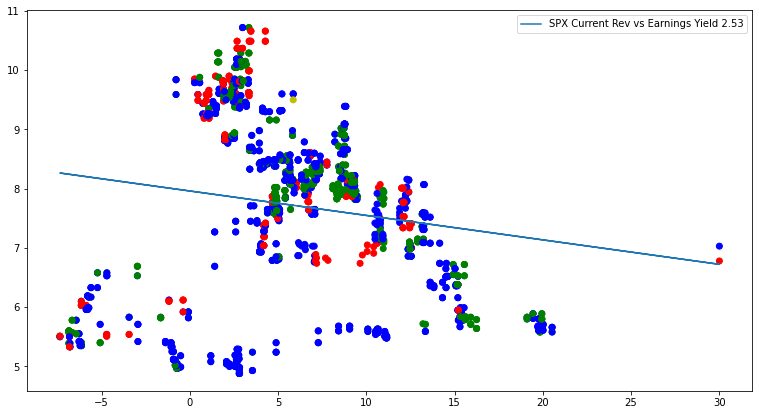

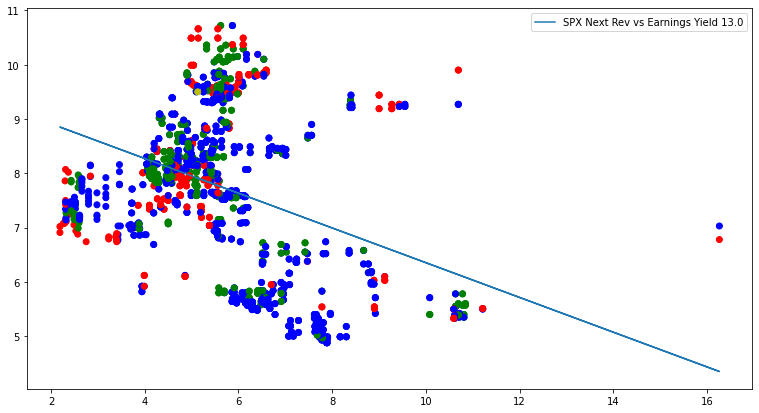

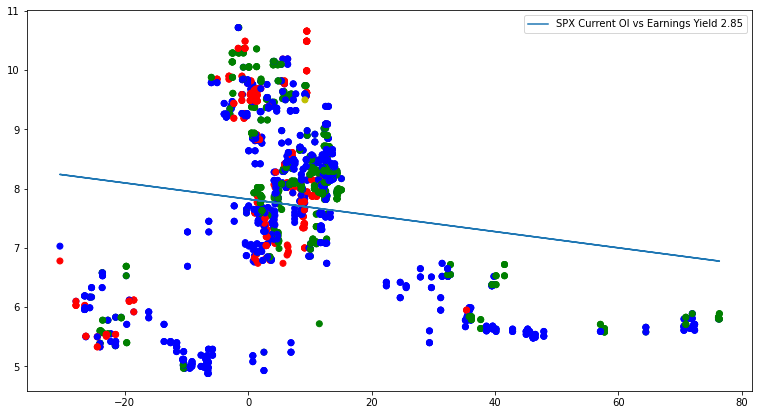

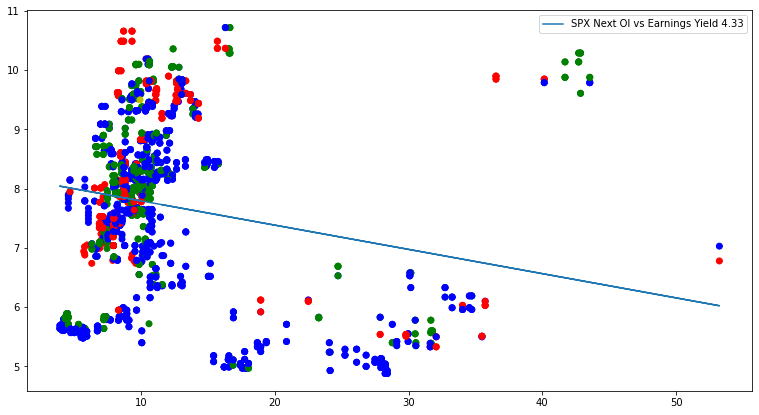

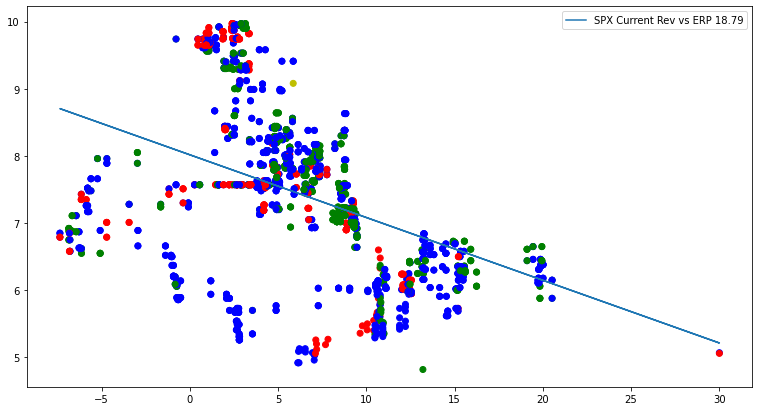

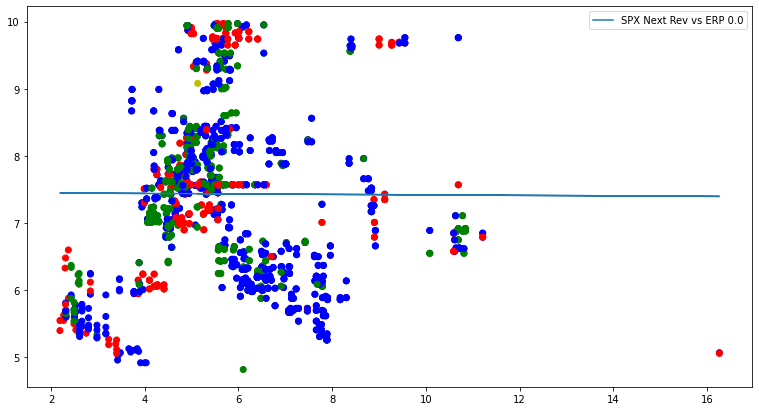

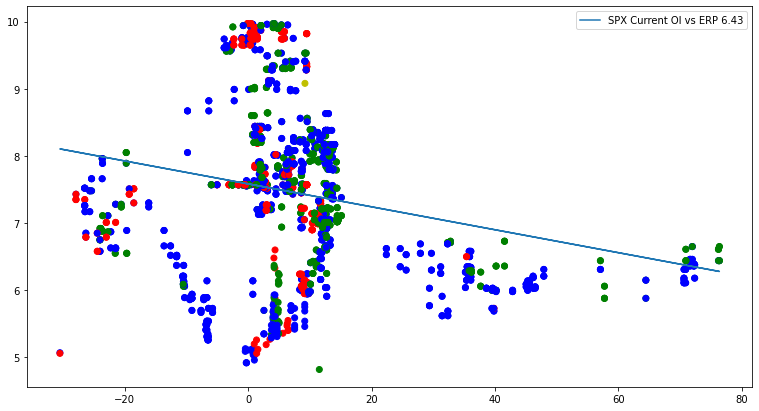

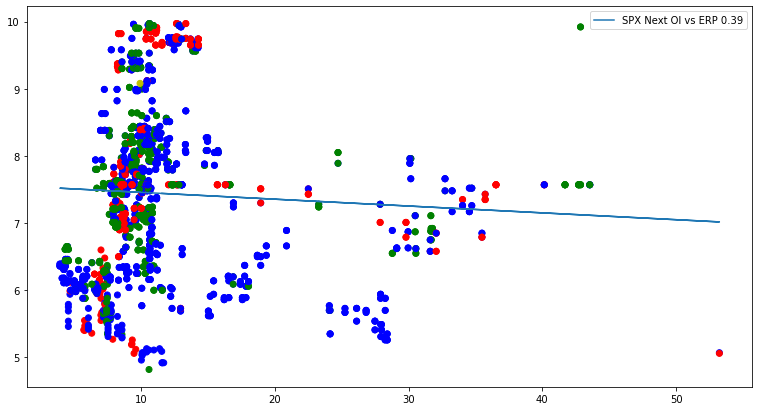

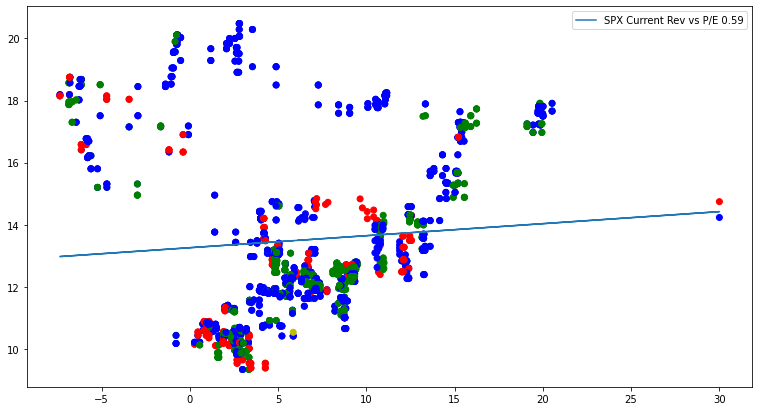

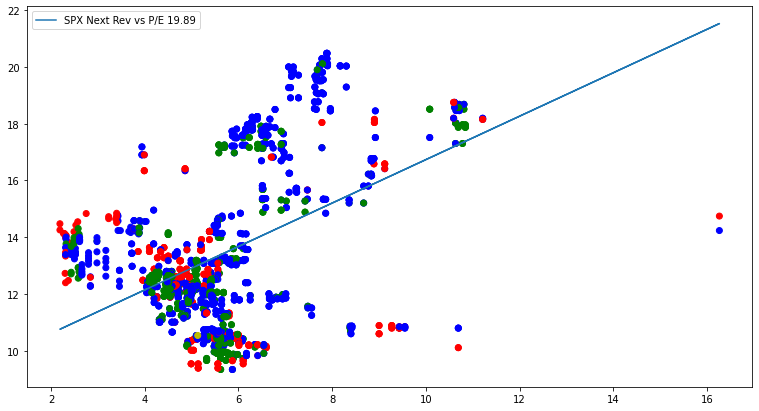

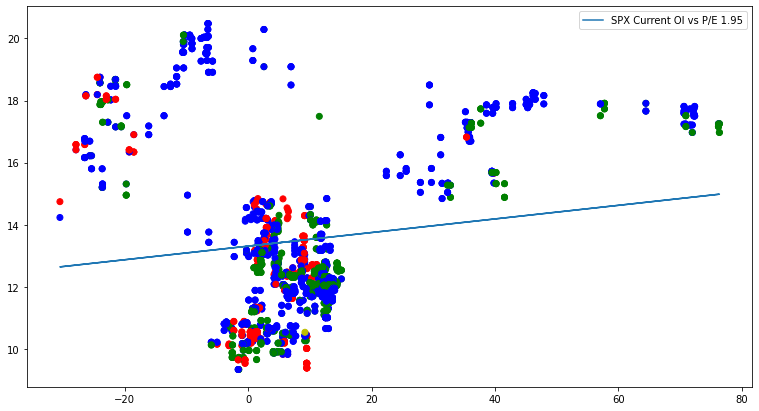

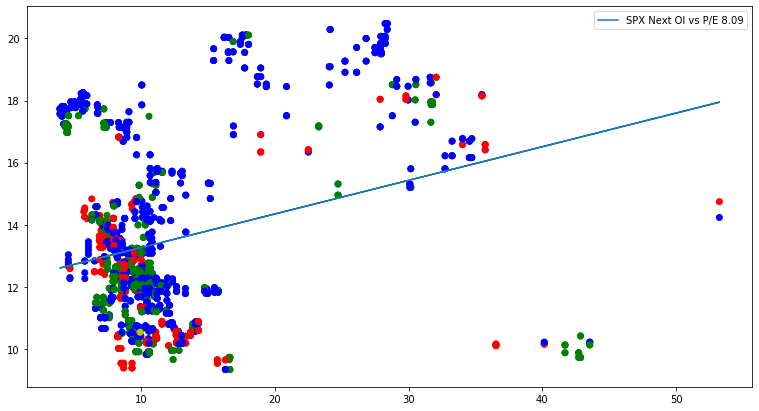

In [88]:
#SPX SCATTER PLOT

def plot_scatter(df1, df2, colors):
    figs = {}
    axs = {}
    
    colors_array = np.array(colors)
    idx = 0
    for param1 in df1.columns:
        for param2 in df2.columns:
            figs[idx] = plt.figure(figsize = (13, 7))
            axs[idx] = figs[idx].add_subplot(1, 1, 1)
            axs[idx].scatter(df2[param2], df1[param1], c = colors_array)
            x_axis = np.array(df2[param2]).reshape(-1, 1)
            y_axis = np.array(df1[param1])
            model = LinearRegression().fit(x_axis, y_axis)
            r_sq = model.score(x_axis, y_axis)
            y0 = model.intercept_
            growth = model.coef_[0]
            r2_curr = round(100 * r_sq, 2)
            axs[idx].plot(x_axis, y0 + model.coef_[0] * x_axis, label = param2 + ' vs ' + param1 + ' ' + str(r2_curr))
            idx = idx + 1
                
    return figs, axs

lag_returns = 21
thresh_up = 3
thresh_down = -3

crev_relation = 'spx_rev'
query_crev = "SELECT * FROM " + crev_relation
crev_df = pd.read_sql_query(query_crev, engine)
crev_df = Set_DF(crev_df)
crev_df = DD_Index(crev_df)
rev_next_series = crev_df['Next'] / crev_df['Current'] - 1
rev_current_series = crev_df['Current'] / crev_df['Previous'] - 1
rev_next_series.name = 'SPX Next Rev'
rev_current_series.name = 'SPX Current Rev'

crev_relation = 'spx_oi'
query_crev = "SELECT * FROM " + crev_relation
crev_df = pd.read_sql_query(query_crev, engine)
crev_df = Set_DF(crev_df)
crev_df = DD_Index(crev_df)
oi_next_series = crev_df['Next'] / crev_df['Current'] - 1
oi_current_series = crev_df['Current'] / crev_df['Previous'] - 1
oi_next_series.name = 'SPX Next OI'
oi_current_series.name = 'SPX Current OI'

fwd_ret_series = round(100 * (Prices_df['SPX'].shift(21) / Prices_df['SPX'] - 1), 2)[Prices_df.index > EYSPX_df.index[-1]][::-1]
colors_list = ['b']
for current_date in fwd_ret_series.index:
    if (fwd_ret_series.loc[current_date] > thresh_up):
        colors_list.append('g')
    elif (fwd_ret_series.loc[current_date] < thresh_down):
        colors_list.append('r')
    else:
        colors_list.append('b')
        
colors_list[-1] = 'y'

query_eyspx = "SELECT * FROM spx_erp"
EYSPX_df = pd.read_sql_query(query_eyspx, engine)
EYSPX_df = Set_DF(EYSPX_df)
EYSPX_df = DD_Index(EYSPX_df)

Slim_pxs = pd.DataFrame(Prices_df[Prices_df.index >= EYSPX_df.index[-1]]['SPX'])
Slim_pxs = Slim_pxs.join(round(100 * rev_current_series, 2))
Slim_pxs = Slim_pxs.join(round(100 * rev_next_series, 2))
Slim_pxs = Slim_pxs.join(round(100 * oi_current_series, 2))
Slim_pxs = Slim_pxs.join(round(100 * oi_next_series, 2))
Slim_pxs.drop(['SPX'], axis = 1, inplace = True)
Slim_pxs.fillna(method = 'ffill', inplace = True)
Slim_pxs.fillna(method = 'bfill', inplace = True)

New_EYSPX_df = Slim_pxs.join(EYSPX_df).drop(Slim_pxs.columns, axis = 1).fillna(method = 'ffill').fillna(method = 'bfill')

query_crev = "SELECT * FROM spx_rev"
crev_df = pd.read_sql_query(query_crev, engine)
crev_df = Set_DF(crev_df)
crev_df = DD_Index(crev_df)
rev_next_series = crev_df['Next'] / crev_df['Current'] - 1
rev_current_series = crev_df['Current'] / crev_df['Previous'] - 1
rev_next_series.name = 'SPX Next Rev'
rev_current_series.name = 'SPX Current Rev'

query_coi = "SELECT * FROM spx_oi"
coi_df = pd.read_sql_query(query_coi, engine)
coi_df = Set_DF(coi_df)
coi_df = DD_Index(coi_df)
oi_next_series = coi_df['Next'] / coi_df['Current'] - 1
oi_current_series = coi_df['Current'] / coi_df['Previous'] - 1
oi_next_series.name = 'SPX Next OI'
oi_current_series.name = 'SPX Current OI'

figs, axs = plot_scatter(New_EYSPX_df, Slim_pxs, colors_list)

for idx in enumerate(axs):
    axs[idx[0]].legend(loc = 'best')

In [47]:
#%%writefile C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\erp_buider_qqq.py

#Recovers sum of Net Income (217) for the last realized 4 qtrs for QQQ constituents each week and builds QQQ ERP relation

import pandas as pd
import math
import numpy as np
import os
import csv
import yfinance as yf
#import mysql.connector
import matplotlib.pyplot as plt
import psycopg2
import requests
import json
import tkinter as tk
import re
from datetime import datetime
from datetime import timedelta
from datetime import date
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression

def Average(lst):
    return sum(lst) / len(lst)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Filter_df(tbf_df, merging_dates_list):
    
    filter_df = pd.DataFrame(merging_dates_list, columns=['Date'])
    merged_df = pd.merge(tbf_df, filter_df, on='Date')
    merged_df.index = filter_df['Date'] 
    merged_df.index.name = 'Date'
    merged_df.drop(['Date'], axis=1, inplace=True)
    
    
    return merged_df

def offset(c_stock, i_list, d_list, t_date, r_date, div_i):
    
    cutoff_date = r_date
    Start_Date = t_date
    ed_list = d_list
    y_list = i_list
    cur_index = 0
    nd_list = []
    for cur_ed_date in ed_list:                            
        cont=0
        seek_element = True
        ced = cur_ed_date
        cur_index = ed_df[c_stock].values.tolist()[cur_index:].index(cur_ed_date) + cur_index
        cur_index_plus = cur_index + 1
        if (cur_index_plus<len(ed_df.index)):
            cur_year = ed_df.index[cur_index_plus][len(ed_df.index[cur_index_plus])-4:]
        else:
            cur_year = today.year
        cur_ed_date = str(cur_year) + '-' + cur_ed_date[0:2] + '-' + cur_ed_date[2:]
        cur_ed_date = datetime.strptime(cur_ed_date, "%Y-%m-%d").date()
        if (cur_ed_date < cutoff_date):
            nd_list.append(cur_ed_date)        
    
    offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
    
    return offs

dbase = "visiblealpha_laptop"
dbase_metrics = "metrics_laptop"

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

number_to_string = {'6160 HK': 'BGNE US','700 HK': 'TCEHY US','2330 TT': 'TSM US','6758 JP': 'SONY US','9868 HK': 'XPEV US'}
string_to_number = {'BGNE US': '6160 HK','TCEHY US': '700 HK','TSM US': '2330 TT','SONY US': '6758 JP','XPEV US': '9868 HK'}
clean_up = lambda x: re.sub(r'[^A-Z /^0-9]', '', str(x))
clean_up_save = lambda x: re.sub(r'[^A-Z ^0-9]', '', str(x))

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase_metrics, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list_metrics = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])

to_us = lambda x: x + ' US'
to_date = lambda x: datetime.strptime(x, "%m/%d/%Y").date()

stocks = pd.read_csv(r"C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\Tickers_VA.csv")
csv_df = pd.DataFrame(stocks)

csv_df['Relations_ticker'] = csv_df['tickers'].replace(number_to_string)
csv_df['Relations_ticker'] = csv_df['Relations_ticker'].map(clean_up)
csv_df['SQL_ticker'] = csv_df['Relations_ticker'].map(clean_up_save)
csv_df['VA_tickers'] = csv_df['tickers'].map(clean_up)
csv_list = csv_df['VA_tickers'].values.tolist()
csv_df = Set_DF(csv_df)
csv_df = DD_Index(csv_df)

query_prices = 'SELECT * FROM prices_relation'    
Prices_df = pd.read_sql_query(query_prices, engine)
Prices_df = Set_DF(Prices_df)
Prices_df = DD_Index(Prices_df)

query_yq_all = "SELECT * FROM yq_all"
yq_df = pd.read_sql_query(query_yq_all, engine)
yq_df = Set_DF(yq_df)
yq_df = DD_Index(yq_df)

query_ed = "SELECT * FROM ed_relation"
ed_df = pd.read_sql_query(query_ed, engine)
ed_df = Set_DF(ed_df)
ed_df = DD_Index(ed_df)
ed_df['AUX'] = ed_df.index
dum_l1 = []
dum_l2 = []
for dum in ed_df['AUX']:
    dum_s = dum.split('QCY-')
    ed_df.loc[dum, 'AUX'] = int(str(dum_s[1]) + str(dum_s[0]))
ed_df.sort_values(by=['AUX'], inplace=True)
ed_df.drop('AUX', axis=1, inplace=True)

today = Prices_df.index[0]
inflation_lt = 2

if (today.weekday() == 5):
    insert_date = today - timedelta(1)
elif (today.weekday() == 6):
    insert_date = today - timedelta(2)
else:
    insert_date = today

query_mc = 'SELECT * FROM mkt_cap_relation'    
mc_df = pd.read_sql_query(query_mc, engine)
mc_df = Set_DF(mc_df)
mc_df = DD_Index(mc_df)

query_qqc = 'SELECT * FROM qqq_constituents'    
QQQConstituents_df = pd.read_sql_query(query_qqc, engine)
QQQConstituents_df = Set_DF(QQQConstituents_df)
QQQConstituents_df = DD_Index(QQQConstituents_df)

qqq_assets = pd.read_html(
        'https://en.wikipedia.org/wiki/Nasdaq-100')[4]
qqq_assets = qqq_assets['Ticker'].tolist()
qqq_comp_df = pd.DataFrame(np.nan, index = pd.Index([today], name = 'Dates'), columns = list(np.arange(len(qqq_assets)) + 1)) 
qqq_comp_df.loc[today] = qqq_assets
qqq_comp_df.loc[today] = qqq_comp_df.loc[today].map(to_us)
qqq_comp_df.to_csv(r"C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\qqq_constituents.csv")

if (len(qqq_comp_df.columns) < len(QQQConstituents_df.columns)):
    add_array = np.arange(len(QQQConstituents_df.columns) - len(qqq_comp_df.columns)) + qqq_comp_df.columns[-1] + 1
    for add in add_array:
        qqq_comp_df[add] = 'ZZZZ'

if ((QQQConstituents_df.iloc[-2] == qqq_comp_df.iloc[0].values).sum() != (len(qqq_comp_df.columns))):
    print('QQQ Change!!!!!')
    QQQConstituents_df.loc[insert_date] = qqq_comp_df.iloc[0].values
    QQQConstituents_df = QQQConstituents_df.replace({np.nan: 'ZZZZ'})
    QQQConstituents_df.to_sql('qqq_constituents', engine, index = True, if_exists = 'replace')


Start_Date = input("Enter Start Date: (YY/MM/DD)")
Start_Date = datetime.strptime(Start_Date, "%y/%m/%d").date()

End_Date = input("Enter End Date: (YY/MM/DD)")
if (End_Date != ''):
    End_Date = datetime.strptime(End_Date, "%y/%m/%d").date()
else:
    End_Date = today

if (Start_Date.weekday()==5):
    Start_Date = Start_Date + timedelta(2)
if (Start_Date.weekday()==6):
    Start_Date = Start_Date + timedelta(1)
    
current_date = Start_Date
oos = True
date_list = list(pd.date_range(Start_Date, End_Date, freq = 'B').date)
Unreal_series = Prices_df['T5YIFR'] - Prices_df['USGG10YR']

over = input('Override?(Y/N for update - NNNNNNNNN) ').upper()
over_b = False
if (over == 'Y'):
    over_b = True
    
if ('qqq_ni' in new_tables_list) & (not over_b):    
    query_ni = 'SELECT * FROM qqq_ni'    
    NI_df = pd.read_sql_query(query_ni, engine)
    NI_df = Set_DF(NI_df)
    NI_df = DD_Index(NI_df)
else:
    NI_df = pd.DataFrame(index = [today], columns = QQQConstituents_df.columns)
    NI_df.index.name = 'Date' 
    
first_date = NI_df.index[NI_df.index >= Start_Date][-1]

keep_loop = True

while (current_date <= End_Date) & (keep_loop):
    if ((current_date.day==25) & (current_date.month==12)) | ((current_date.day==1) & (current_date.month==1)):
        current_date = current_date + timedelta(1)
    if (current_date.weekday()==5):
        current_date = current_date + timedelta(2)
    if (current_date.weekday()==6):
        current_date = current_date + timedelta(1)
    if (current_date > first_date) & (oos):
        current_date = first_date
        oos = False
    if (current_date not in NI_df.index) | (current_date == today) | (over_b):
        if (current_date <= today):
            print(current_date)
            stock_list = []
            if (current_date >= QQQConstituents_df.index[0]):
                sample_date = QQQConstituents_df.index[QQQConstituents_df.index <= current_date][0]
            else:
                sample_date = QQQConstituents_df.index[0]
            stock_list = QQQConstituents_df.loc[sample_date].values.tolist()
            for current_stock in stock_list:
                try:
                    offs = 0
                    if (current_stock in csv_df['Relations_ticker'].values.tolist()):
                        sql_stock = csv_df['SQL_ticker'][csv_df['Relations_ticker'].values.tolist().index(current_stock)]
                        record_date = yq_df.loc[current_stock, 'Record Date']
                        key = yq_df.loc[current_stock, 'Y/Q']
                        div = 1
                        if (key=='Y'):
                            div = 2
                        if (current_date not in NI_df.index):
                            NI_df.loc[current_date] = 'Missing'
                        NI_df.loc[current_date].replace({np.nan: 'Missing', None: 'Missing'}, inplace = True)
                        if (NI_df.loc[current_date, NI_df.columns[stock_list.index(current_stock)]]=='Missing') | (str(NI_df.loc[current_date, NI_df.columns[stock_list.index(current_stock)]])=='nan') | (over_b):
                            stock_rel = re.sub(r'[^a-z^0-9]', '', sql_stock.lower()) + '_oi'
                            query_stock = 'SELECT * FROM ' + stock_rel
                            ed_list = ed_df[current_stock][ed_df[current_stock]!=''].values.tolist()
                            y_list = ed_df.index.values.tolist()
                            StockNI_df = pd.read_sql_query(query_stock, engine)
                            StockNI_df = Set_DF(StockNI_df)
                            StockNI_df = DD_Index(StockNI_df)
                            er_date = StockNI_df.index[StockNI_df.index <= current_date][-1]
                            ni_series = StockNI_df.loc[er_date]
                            offs = offset(current_stock, y_list, ed_list, er_date, record_date, div)
                            offset_ni = ni_series.shift(offs)
                            start_p = offset_ni.index.values.tolist().index(key + str(0))
                            total_ni = np.array(offset_ni[int(start_p - (2 / div)): int(start_p + (2 / div))]).sum()
                            NI_df.loc[current_date, NI_df.columns[stock_list.index(current_stock)]] = round(total_ni, 0)
                except:
                    pass
    if (current_date >= today):
        keep_loop = False
    current_date = current_date + timedelta(7)
    if (current_date > today):
        current_date = today  

NI_df = NI_df.replace({'Missing': np.nan})
NI_df.fillna(method = 'bfill', inplace = True)
NI_df.sort_index(axis = 0, ascending = False, inplace = True)   
NI_df.to_sql('qqq_ni', engine, index=True, if_exists='replace')  

if ('qqq_erp' in new_tables_list) & (not over_b):
    query_eyqqq = "SELECT * FROM qqq_erp"
    EYQQQ_df = pd.read_sql_query(query_eyqqq, engine)
    EYQQQ_df = Set_DF(EYQQQ_df)
    EYQQQ_df = DD_Index(EYQQQ_df)    
else:
    EYQQQ_df = pd.DataFrame(columns = ['Earnings Yield', 'ERP', 'P/E'])
    EYQQQ_df.index.name = 'Date'
    
for current_date in date_list:
    if ((current_date.day==25) & (current_date.month==12)) | ((current_date.day==1) & (current_date.month==1)):
        date_list.remove(current_date)
    elif (current_date in NI_df.index):
        if (current_date <= today):
            ni_list = 0
            mc_list = 0
            current_ni_series = NI_df.loc[current_date].replace({None: 'Missing', np.nan: 'Missing'})
            current_mc_series = mc_df.loc[current_date].replace({None: 'Missing', np.nan: 'Missing'})
            if (current_date >= QQQConstituents_df.index[0]):
                qqqc_date = QQQConstituents_df.index[QQQConstituents_df.index <= current_date][0]
            else:
                qqqc_date = QQQConstituents_df.index[0]
            current_yield = Prices_df.loc[current_date, 'USGG10YR']
            for current_stock in QQQConstituents_df.loc[qqqc_date]:
                if (current_stock in mc_df.columns.values.tolist()):  # REVISIT
                    position = QQQConstituents_df.loc[qqqc_date].values.tolist().index(current_stock)
                    if (current_ni_series[str(position)] != 'Missing'):
                        if (current_mc_series[current_stock] != 'Missing'):
                            if (mc_df.loc[current_date, current_stock] > 0):
                                ni_list = ni_list + float(current_ni_series[str(position)])
                                mc_list = mc_list + float(current_mc_series[current_stock])

            if (mc_list != 0) & ((current_date not in EYQQQ_df.index) | (over_b) | (current_date == today)):
                if (current_date not in EYQQQ_df.index):
                    EYQQQ_df.loc[current_date] = np.nan
                EYQQQ_df.loc[current_date, 'Earnings Yield'] = round(ni_list / mc_list / 10000, 2)
                EYQQQ_df.loc[current_date, 'P/E'] = round((mc_list * 1000000) / ni_list, 2)
                EYQQQ_df.loc[current_date, 'ERP'] = round((ni_list / mc_list / 10000) - (current_yield - inflation_lt), 2)

EYQQQ_df.sort_index(axis = 0, ascending = False, inplace = True)
EYQQQ_df.ERP[EYQQQ_df.ERP > 10] = np.median(EYQQQ_df.ERP)
EYQQQ_df.to_sql('qqq_erp', engine, index = True, if_exists = 'replace')
window = 1000
plt.figure(0, figsize = (14, 8))
EYQQQ_df['Earnings Yield'][:window].plot(label = 'QQQ Earnings Yield', c = 'g').legend()
EYQQQ_df['ERP'].rolling(5, min_periods = 1).mean()[:window].plot(label = 'QQQ ERP ' + str(EYQQQ_df['ERP'].iloc[0]), c = 'k').legend()
plt.figure(1, figsize = (14, 8))
EYQQQ_df['P/E'][:window].plot(label = 'QQQ P/E', c = 'b').twinx().legend()
Unreal_series[Unreal_series.index > EYQQQ_df.index[-1]].plot(label = 'Minus RR', c = 'r').legend()

KeyError: 'Ticker'

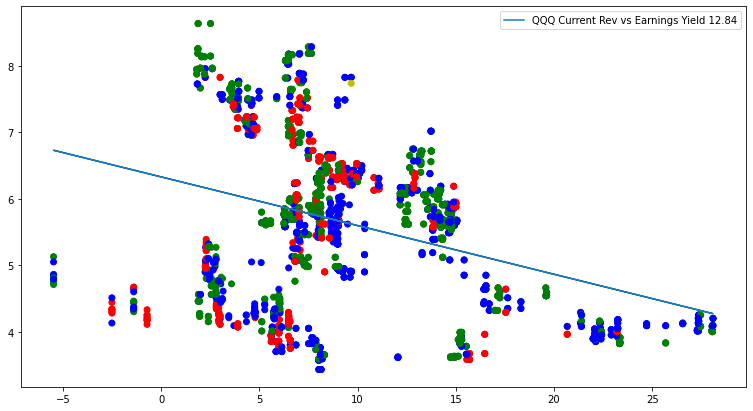

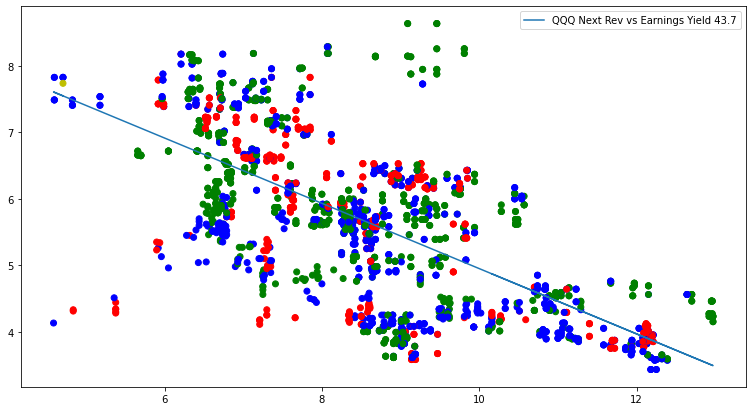

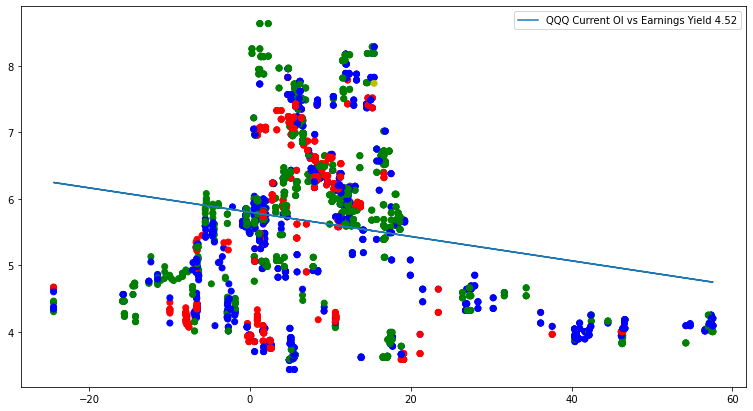

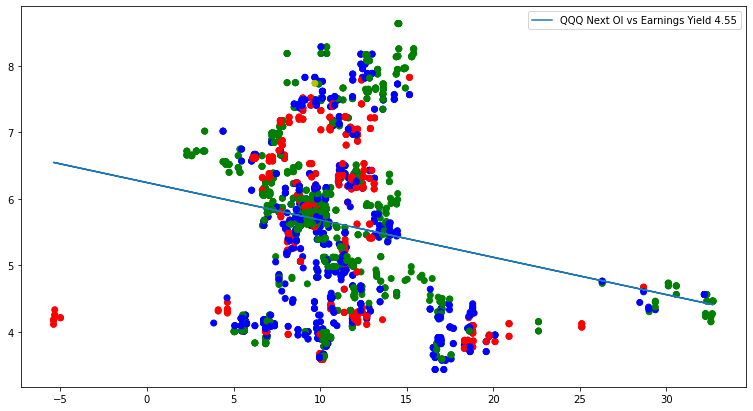

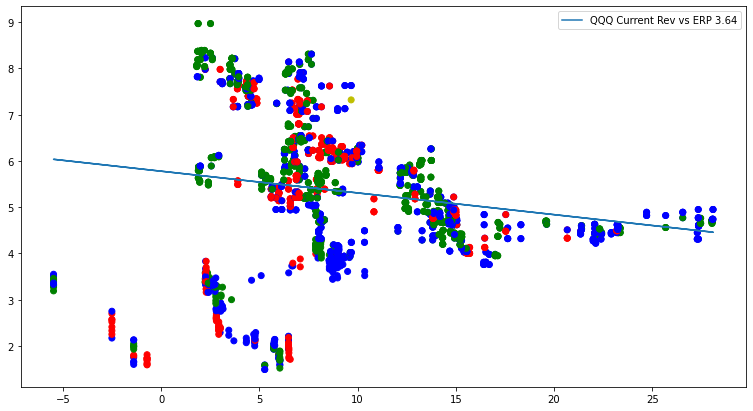

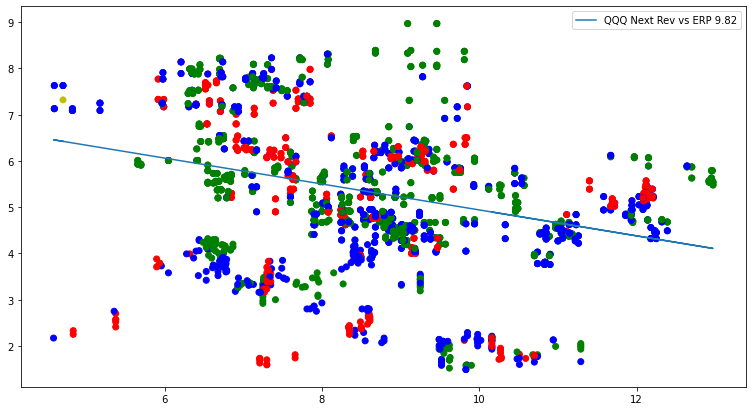

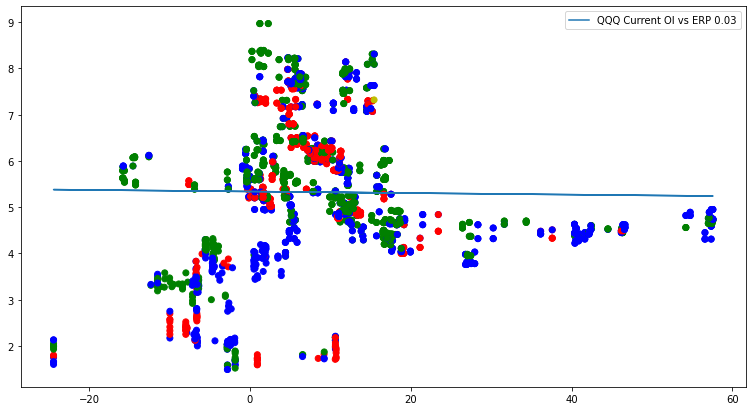

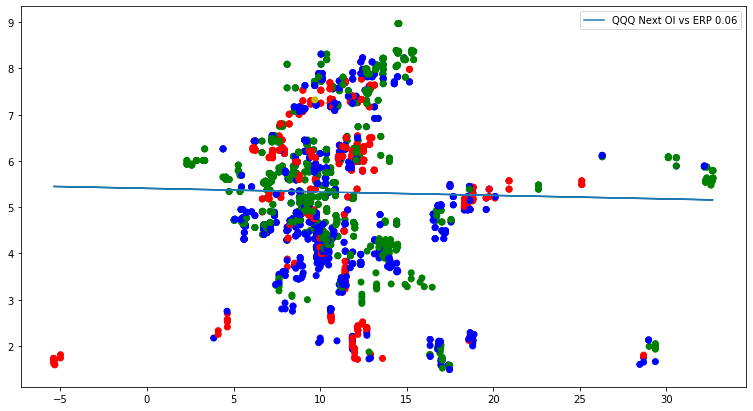

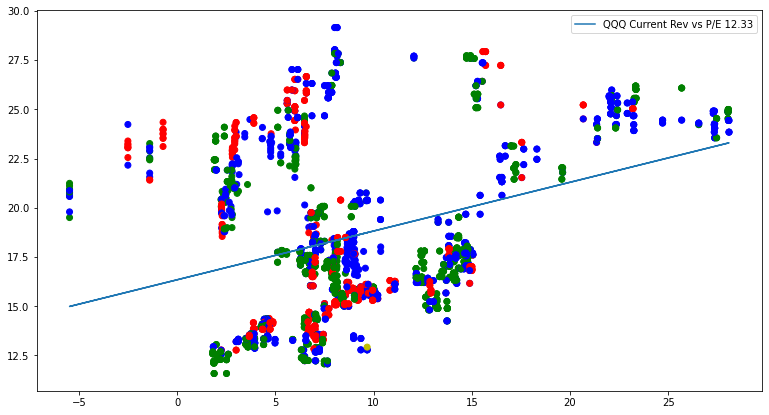

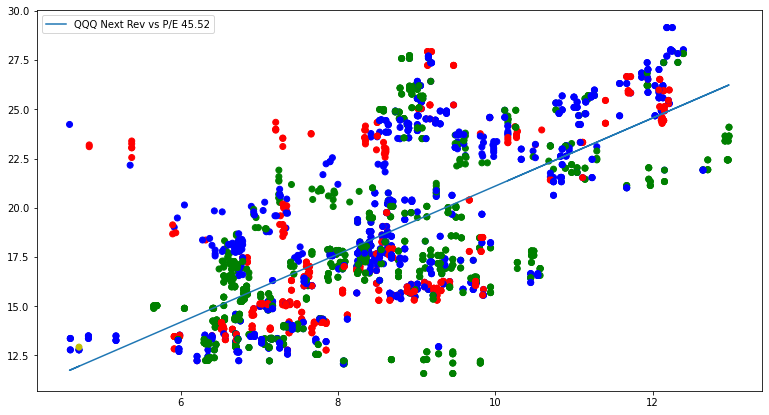

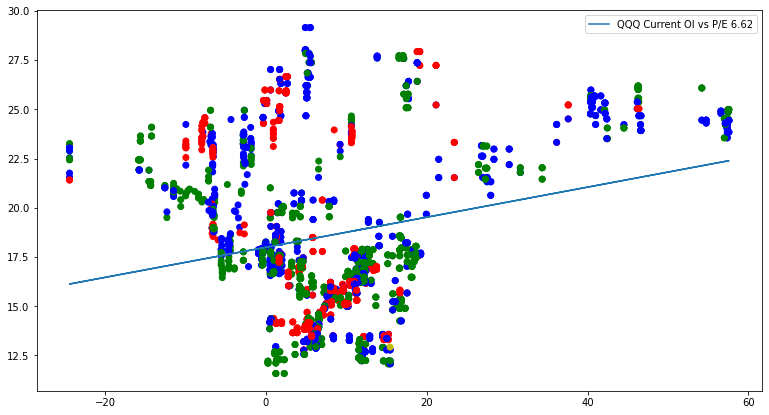

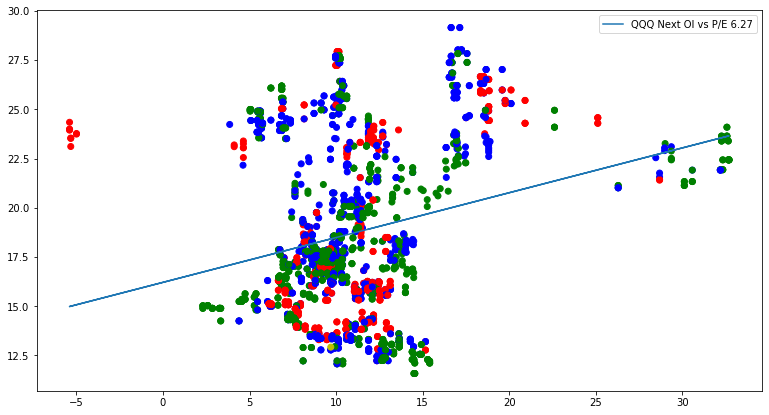

In [146]:
#QQQ SCATTERMATRIX

#from pandas.plotting import scatter_matrix

def plot_scatter(df1, df2, colors):
    figs = {}
    axs = {}
    
    colors_array = np.array(colors)
    idx = 0
    for param1 in df1.columns:
        for param2 in df2.columns:
            figs[idx] = plt.figure(figsize = (13, 7))
            axs[idx] = figs[idx].add_subplot(1, 1, 1)
            axs[idx].scatter(df2[param2], df1[param1], c = colors_array)
            x_axis = np.array(df2[param2]).reshape(-1, 1)
            y_axis = np.array(df1[param1])
            model = LinearRegression().fit(x_axis, y_axis)
            r_sq = model.score(x_axis, y_axis)
            y0 = model.intercept_
            growth = model.coef_[0]
            r2_curr = round(100 * r_sq, 2)
            axs[idx].plot(x_axis, y0 + model.coef_[0] * x_axis, label = param2 + ' vs ' + param1 + ' ' + str(r2_curr))
            idx = idx + 1
                
    return figs, axs

lag_returns = 21
thresh_up = 3
thresh_down = -3

crev_relation = 'qqq_rev'
query_crev = "SELECT * FROM " + crev_relation
crev_df = pd.read_sql_query(query_crev, engine)
crev_df = Set_DF(crev_df)
crev_df = DD_Index(crev_df)
rev_next_series = crev_df['Next'] / crev_df['Current'] - 1
rev_current_series = crev_df['Current'] / crev_df['Previous'] - 1
rev_next_series.name = 'QQQ Next Rev'
rev_current_series.name = 'QQQ Current Rev'

crev_relation = 'qqq_oi'
query_crev = "SELECT * FROM " + crev_relation
crev_df = pd.read_sql_query(query_crev, engine)
crev_df = Set_DF(crev_df)
crev_df = DD_Index(crev_df)
oi_next_series = crev_df['Next'] / crev_df['Current'] - 1
oi_current_series = crev_df['Current'] / crev_df['Previous'] - 1
oi_next_series.name = 'QQQ Next OI'
oi_current_series.name = 'QQQ Current OI'

fwd_ret_series = round(100 * (Prices_df['QQQ US'].shift(21) / Prices_df['QQQ US'] - 1), 2)[Prices_df.index > EYQQQ_df.index[-1]][::-1]
colors_list = ['b']
for current_date in fwd_ret_series.index:
    if (fwd_ret_series.loc[current_date] > thresh_up):
        colors_list.append('g')
    elif (fwd_ret_series.loc[current_date] < thresh_down):
        colors_list.append('r')
    else:
        colors_list.append('b')
        
colors_list[-1] = 'y'

query_eyQQQ = "SELECT * FROM QQQ_erp"
EYQQQ_df = pd.read_sql_query(query_eyQQQ, engine)
EYQQQ_df = Set_DF(EYQQQ_df)
EYQQQ_df = DD_Index(EYQQQ_df)

Slim_pxs = pd.DataFrame(Prices_df[Prices_df.index >= EYQQQ_df.index[-1]]['QQQ US'])
Slim_pxs = Slim_pxs.join(round(100 * rev_current_series, 2))
Slim_pxs = Slim_pxs.join(round(100 * rev_next_series, 2))
Slim_pxs = Slim_pxs.join(round(100 * oi_current_series, 2))
Slim_pxs = Slim_pxs.join(round(100 * oi_next_series, 2))
Slim_pxs.drop(['QQQ US'], axis = 1, inplace = True)
Slim_pxs.fillna(method = 'ffill', inplace = True)
Slim_pxs.fillna(method = 'bfill', inplace = True)

New_EYQQQ_df = Slim_pxs.join(EYQQQ_df).drop(Slim_pxs.columns, axis = 1).fillna(method = 'ffill').fillna(method = 'bfill')

query_crev = "SELECT * FROM QQQ_rev"
crev_df = pd.read_sql_query(query_crev, engine)
crev_df = Set_DF(crev_df)
crev_df = DD_Index(crev_df)
rev_next_series = crev_df['Next'] / crev_df['Current'] - 1
rev_current_series = crev_df['Current'] / crev_df['Previous'] - 1
rev_next_series.name = 'QQQ Next Rev'
rev_current_series.name = 'QQQ Current Rev'

query_coi = "SELECT * FROM QQQ_oi"
coi_df = pd.read_sql_query(query_coi, engine)
coi_df = Set_DF(coi_df)
coi_df = DD_Index(coi_df)
oi_next_series = coi_df['Next'] / coi_df['Current'] - 1
oi_current_series = coi_df['Current'] / coi_df['Previous'] - 1
oi_next_series.name = 'QQQ Next OI'
oi_current_series.name = 'QQQ Current OI'

figs, axs = plot_scatter(New_EYQQQ_df, Slim_pxs, colors_list)

for idx in enumerate(axs):
    axs[idx[0]].legend(loc = 'best')

In [ ]:
# Calculates Sector P/Es (+ SPX) - FWD

import pandas as pd
import numpy as np
import math
import os
import csv
import yfinance as yf
#import mysql.connector
import psycopg2
import requests
import json
import tkinter as tk
import re
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import date
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df 

def Filter_df(tbf_df, merging_dates_list):
    
    filter_df = pd.DataFrame(merging_dates_list, columns=['Date'])
    merged_df = pd.merge(tbf_df, filter_df, on='Date')
    merged_df.index = filter_df['Date'] 
    merged_df.index.name = 'Date'
    merged_df.drop(['Date'], axis=1, inplace=True)
    
    
    return merged_df

def offset(stock_rel, i_list, d_list, t_date, r_date, div_i):
    
    cutoff_date = r_date
    Start_Date = t_date
    ed_list = d_list
    y_list = i_list
    cur_index = 0
    nd_list = []
    for cur_ed_date in ed_list:                            
        cont=0
        seek_element = True
        ced = cur_ed_date
        cur_index = ed_df[stock_rel].values.tolist()[cur_index:].index(cur_ed_date) + cur_index
        cur_index_plus = cur_index + 1
        if (cur_index_plus<len(ed_df.index)):
            cur_year = ed_df.index[cur_index_plus][len(ed_df.index[cur_index_plus])-4:]
        else:
            cur_year = today.year
        cur_ed_date = str(cur_year) + '-' + cur_ed_date[0:2] + '-' + cur_ed_date[2:]
        cur_ed_date = datetime.strptime(cur_ed_date, "%Y-%m-%d").date()
        if (cur_ed_date < cutoff_date):
            nd_list.append(cur_ed_date)        
    
    offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
    
    return offs

def on_selection(value):
    global choice
    choice = value  # store the user's choice
    root.destroy()  # close window

    

dbase = "visiblealpha_laptop"
dbase_metrics = "metrics_laptop"

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

engine_metrics = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase_metrics))

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase_metrics, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list_metrics = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])
    
number_to_string = {'6160 HK': 'BGNE US','700 HK': 'TCEHY US','2330 TT': 'TSM US','6758 JP': 'SONY US','9868 HK': 'XPEV US'}
string_to_number = {'BGNE US': '6160 HK','TCEHY US': '700 HK','TSM US': '2330 TT','SONY US': '6758 JP','XPEV US': '9868 HK'}
clean_up = lambda x: re.sub(r'[^A-Z /^0-9]', '', str(x))
clean_up_save = lambda x: re.sub(r'[^A-Z ^0-9]', '', str(x))
int_to_str = lambda x: str(x)
str_to_int = lambda x: int(x)
map_country = lambda x: x[len(x) - 2:]
map_fx = lambda x: FX_DF.loc[x, 'Pair']
to_pxs = lambda x: Prices_df.loc[Search_Date, x]

today = date.today()

sectors = pd.read_csv(r"C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\Custom_Segmentation.csv")
Sectors_df = pd.DataFrame(sectors)
Sectors_df = Set_DF(Sectors_df)
Sectors_df = DD_Index(Sectors_df)

query_spc = 'SELECT * FROM spx_constituents'    
SPXConstituents_df = pd.read_sql_query(query_spc, engine)
SPXConstituents_df = Set_DF(SPXConstituents_df)
SPXConstituents_df = DD_Index(SPXConstituents_df)

query_prices = 'SELECT * FROM prices_relation'    
Prices_df = pd.read_sql_query(query_prices, engine)
Prices_df = Set_DF(Prices_df)
Prices_df = DD_Index(Prices_df)

query_ierp = 'SELECT * FROM ind_erp_relation'    
IERP_df = pd.read_sql_query(query_ierp, engine)
IERP_df = Set_DF(IERP_df)
IERP_df = DD_Index(IERP_df)
IERP_df.sort_index(axis = 0, ascending = False, inplace = True)

query_fx = "SELECT * FROM fx_relation"
FX_DF = pd.read_sql_query(query_fx, engine)
FX_DF = Set_DF(FX_DF)
FX_DF = DD_Index(FX_DF)

query_yq_all = "SELECT * FROM yq_all"
yq_df = pd.read_sql_query(query_yq_all, engine)
yq_df = Set_DF(yq_df)
yq_df = DD_Index(yq_df)

query_sectors = "SELECT * FROM sector_indexes"
sectors_pxs_df = pd.read_sql_query(query_sectors, engine)
sectors_pxs_df = Set_DF(sectors_pxs_df)
sectors_pxs_df = DD_Index(sectors_pxs_df)

query_ed = "SELECT * FROM ed_relation"
ed_df = pd.read_sql_query(query_ed, engine)
ed_df = Set_DF(ed_df)
ed_df = DD_Index(ed_df)
ed_df['AUX'] = ed_df.index
dum_l1 = []
dum_l2 = []
for dum in ed_df['AUX']:
    dum_s = dum.split('QCY-')
    ed_df.loc[dum, 'AUX'] = int(str(dum_s[1]) + str(dum_s[0]))
ed_df.sort_values(by=['AUX'], inplace=True)
ed_df.drop('AUX', axis=1, inplace=True)

if ('sector_pe' in new_tables_list):
    query_sectorPE = "SELECT * FROM sector_pe"
    SectorPE_df = pd.read_sql_query(query_sectorPE, engine)
    SectorPE_df = Set_DF(SectorPE_df)
    SectorPE_df = DD_Index(SectorPE_df)
else:
    SectorPE_df = pd.DataFrame(0, index = sectors_pxs_df.index, columns = sectors_pxs_df.columns)
    SectorPE_df['SPX'] = 0

stock_list = IERP_df.columns

choice_list = Sectors_df.columns.values.tolist()
root = tk.Tk()
tkvar = tk.StringVar(root)
popupMenu = tk.OptionMenu(root, tkvar, *choice_list, command = on_selection)
tk.Label(root, text = "Choose a classification: (Custom Sector 1)").grid(row = 0, column = 0)
popupMenu.grid(row = 1, column = 0)
root.mainloop()

orite = False
owr = input("Overwrite (Y/N): ").upper()
if (owr=='Y'):
    orite = True
    SectorPE_df = pd.DataFrame(np.nan, index = sectors_pxs_df.index, columns = sectors_pxs_df.columns)
    SectorPE_df['SPX'] = np.nan

Cutoff_Date = input("Enter Start Date (empty for update): (YY/MM/DD)")
if (Cutoff_Date != ''):
    Cutoff_Date = datetime.strptime(Cutoff_Date, "%y/%m/%d").date()
else:
    Cutoff_Date = SectorPE_df.index[-1]

End_Date = input("Enter End Date: (YY/MM/DD)")
if (End_Date != ''):
    End_Date = datetime.strptime(End_Date, "%y/%m/%d").date()
else:
    End_Date = Prices_df.index[0]
    
count = 0
PricesPE_df = pd.DataFrame(0, index = SectorPE_df.index[SectorPE_df.index >= Cutoff_Date], columns = sectors_pxs_df.columns)
PricesPE_df['SPX'] = 0

for stock in stock_list:
    
    sector = Sectors_df.loc[stock, choice]
    proceed = False
    stock_name = re.sub(r'[^a-z_^0-9]', '', stock.lower())
    try:
        eps_stock_relation = stock_name + '_epsd'
        query_eps_stock = "SELECT * FROM " + eps_stock_relation
        eps_stock_df = pd.read_sql_query(query_eps_stock, engine)
        eps_stock_df = Set_DF(eps_stock_df)
        eps_stock_df = DD_Index(eps_stock_df)
        eps_stock_df.dropna(how = 'all', axis = 1, inplace = True)
        eps_stock_df.dropna(how = 'all', axis = 0, inplace = True)
        if (len(eps_stock_df.index) > 0) & (len(eps_stock_df.columns) > 0):
            proceed = True
    except:
        try:
            eps_stock_relation = stock_name + '_epsb'
            query_eps_stock = "SELECT * FROM " + eps_stock_relation
            eps_stock_df = pd.read_sql_query(query_eps_stock, engine)
            eps_stock_df = Set_DF(eps_stock_df)
            eps_stock_df = DD_Index(eps_stock_df)
            eps_stock_df.dropna(how = 'all', axis = 1, inplace = True)
            eps_stock_df.dropna(how = 'all', axis = 0, inplace = True)
            if (len(eps_stock_df.index) > 0) & (len(eps_stock_df.columns) > 0):
                proceed = True
        except:
            print(stock + ' HAS NO EPS DATA')
    if (proceed) & (sector != '') & (sector in sectors_pxs_df.columns):
        count = count + 1
        print(str(count) + '- ' + stock)
        eps_stock_df.dropna(how = 'all', inplace = True)
        limits_series = round((eps_stock_df.swapaxes('index', 'columns').count()).expanding().median() * 0.75, 0)
        if (len(eps_stock_df.index) > 0):
            start_date = eps_stock_df.index[eps_stock_df.index >= Cutoff_Date][0]
            start_date = max(start_date, IERP_df.index[-1])
            date_list = pd.date_range(start_date, Prices_df.index[0], freq='B').date
            
            
            for Search_Date in date_list:
                if ((Search_Date.day == 25) & (Search_Date.month == 12)) | ((Search_Date.day == 1) & (Search_Date.month == 1)):
                    pass
                else:
                    spx_comp = False
                    spx_date = sorted(SPXConstituents_df.index[SPXConstituents_df.index <= Search_Date].values.tolist())[-1]
                    if (stock in SPXConstituents_df.loc[spx_date].values.tolist()):
                        spx_comp = True
                    eps_date = eps_stock_df.index[eps_stock_df.index <= Search_Date][-1]
                    eps_stock_df.dropna(thresh = limits_series.loc[eps_date], inplace = True)
                    fx_series = ('USD' + FX_DF['Pair']).map(to_pxs)
                    FX_DF['Current FX'] = fx_series
                    if (Search_Date not in SectorPE_df.index):
                        SectorPE_df.loc[Search_Date] = 0
                    if (Search_Date not in PricesPE_df.index):
                        PricesPE_df.loc[Search_Date] = 0
                    offs = 0
                    mult = FX_DF.loc[region, 'Mult']
                    fx = FX_DF.loc[region, 'Current FX']
                    
                    if (orite) | (Search_Date == today):
                        target_len = 40
                        first = 1
                        ext = -4
                        div = 1
                        ys = 4
                        df_array = np.array([])
                        if (eps_stock_df.columns[0][0] == 'Y'):
                            target_len = 10
                            ext = -1
                            ys = 1
                            div = 2
                        ext_period = eps_stock_df.columns[0][0] + str(ext)
                        first_period = eps_stock_df.columns[0][0] + str(first)
                        eps_date = eps_stock_df.index[eps_stock_df.index <= Search_Date][-1]

                        ed_list = ed_df[stock][ed_df[stock] != ''].values.tolist()
                        y_list = ed_df.index.values.tolist()
                        record_date = yq_df.loc[stock, 'Record Date']
                        offs = offset(stock, y_list, ed_list, Search_Date, record_date, div)
                        eps_series_ext = eps_stock_df.loc[eps_date].shift(offs)[ext_period:][eps_stock_df.loc[eps_date].shift(offs)[ext_period:].replace({None: 'Delete', np.nan: 'Delete'}) != 'Delete']
                        eps_series = eps_stock_df.loc[eps_date].shift(offs)[first_period:][eps_stock_df.loc[eps_date].shift(offs)[first_period:].replace({None: 'Delete', np.nan: 'Delete'}) != 'Delete']
                        len_series = len(eps_series)
                        len_series_ext = len(eps_series_ext)
                        erp_date = IERP_df.index[IERP_df.index <= Search_Date][0]
                        erp = IERP_df[::-1][IERP_df[::-1].replace({np.nan: 'z'}) != 'z'].rolling(252, min_periods = 1).mean().loc[erp_date, stock]
                        px = Prices_df.loc[Search_Date, stock] / fx * mult
                        if (len_series < target_len) & (len_series_ext > 1):
                            y_axis = np.array(eps_series_ext)
                            x_axis = np.arange(len_series_ext).reshape(-1,1)
                            model = LinearRegression().fit(x_axis, y_axis)
                            r_sq = model.score(x_axis, y_axis)
                            y0 = model.intercept_
                            growth = model.coef_
                            g_array = (1 + max(-0.75, growth)) ** ((np.arange(target_len - len_series) + 1) / ys)
                            epsc_array = eps_series_ext[-1] * g_array
                            final_eps_array = np.array(list(y_axis) + list(epsc_array))[-target_len:]
                        else:
                            final_eps_array = np.array(eps_series)
                        if (len_series_ext > 1):
                            df_array = (1 + erp/100) ** ((np.arange(target_len) + 1) / ys)
                            eps_pv_array = final_eps_array / df_array
                            eps_sum = eps_pv_array.sum()
                            
                            SectorPE_df.loc[Search_Date, sector] = SectorPE_df.loc[Search_Date, sector] + eps_sum
                            PricesPE_df.loc[Search_Date, sector] = PricesPE_df.loc[Search_Date, sector] + px
                            if (spx_comp):
                                SectorPE_df.loc[Search_Date, 'SPX'] = SectorPE_df.loc[Search_Date, 'SPX'] + eps_sum
                                PricesPE_df.loc[Search_Date, 'SPX'] = PricesPE_df.loc[Search_Date, 'SPX'] + px

SectorPE_df = PricesPE_df / SectorPE_df
#SectorPE_df.to_sql('valuations_avg_relation', engine, index = True, if_exists = 'replace')
SectorPE_df

Overwrite (Y/N): Y
Enter Start Date (empty for update): (YY/MM/DD)19/01/01
Enter End Date: (YY/MM/DD)
ABST US HAS NO EPS DATA
1- AMPL US
2- ASUR US
3- AXON US
4- BLKB US
5- CDAY US
6- ECOM US
7- EGAN US
8- ESMT US
9- EVBG US
10- FIVN US
11- FRSH US
GTYH US HAS NO EPS DATA
12- HSTM US
13- JAMF US
14- LAW US
15- LPSN US
16- MNTV US
17- MODN US
18- NEWR US
19- ONTF US
20- PHR US
21- PRO US
22- PYCR US
23- QLYS US
24- QTWO US
25- SEMR US
26- SPSC US
27- TOST US
TTGT US HAS NO EPS DATA
28- TWOU US
29- TYL US
30- UPLD US
31- VERX US
32- VRNT US
33- WKME US
34- YEXT US
35- ZETA US
36- ZUO US
37- TASK US
38- RIVN US
39- SKLZ US
40- KBC BB
41- SIE GR
42- INS GR
43- AAPL US
44- Z US
45- U US
46- AFRM US
47- APPN US
48- AI US
49- VEEV US
50- MNDY US
51- TXG US
52- FTCH US
53- ENPH US
54- SEDG US
55- TEG GR
56- VNA GR
57- SNAP US
58- MGNI US
59- PINS US
60- BILL US
61- PATH US
62- ZEN US
63- LEG GR
64- ASAN US
65- CSIQ US
66- DWNI GR
67- ZI US
68- W US
69- WISE LN
70- KNSL US
QS US HAS NO EPS DATA

<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-i

<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-i

<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-i

<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-i

<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-i

<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-i

<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)


AGN US HAS NO EPS DATA
114- AZN LN
115- BGNE US
BHC US HAS NO EPS DATA
116- CRL US
117- EXEL US
118- GSK LN
119- HAE US
120- NKLA US
121- HZNP US
122- ICLR US
123- SGRE SM
124- JAZZ US
125- MOH US
126- NBIX US
127- NOVOB DC
128- NVRO US
129- TDOC US
130- BLDP CN
131- ZLAB US
132- SNOW US
133- ARW US
WCN US HAS NO EPS DATA
134- AA US
135- AEM CN
136- FNV CN
137- ABX CN
138- K CN
TECK US HAS NO EPS DATA
139- COLD US
140- ELS US
141- GLPI US
142- INVH US
AMTD US HAS NO EPS DATA
143- ATUS US
144- AVLR US
145- BCE CN
146- CABO US
147- PLUG US
148- NVTA US
149- DHER GR
150- PHIA NA
151- ETSY US
152- GDDY US
153- EVCM US
GRUB US HAS NO EPS DATA
154- LSXMA US
LSXMK US HAS NO EPS DATA
155- MAN US
156- XP US
157- NYT US
158- PANW US
159- FSLR US
160- SAM US
161- SIRI US
162- SPOT US
163- SQ US
STMP US HAS NO EPS DATA
164- TME US
165- TTD US
166- VOD LN
167- SYNA US
168- BKI US
169- BL US
170- COUP US
171- DBX US
172- DOCU US
173- DOMO US
174- HUBS US
175- LITE US
176- MELI US
177- SREN SW
178- M

<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-i

<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-i

<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-input-383-fed225195f9f>:310: RuntimeWarning: invalid value encountered in power
  g_array = (1 + growth) ** ((np.arange(target_len - len_series) + 1) / ys)
<ipython-i

277- GE US
278- HII US
279- HON US
280- HWM US
281- JCI US
282- LMT US
283- NOC US
284- RSG US
285- RTX US
286- WM US
287- DD US
288- NEM US
289- SHW US
290- AMT US
291- CCI US
292- ESS US
293- PSA US
294- SBAC US
295- SPG US
296- UDR US
297- ADP US
298- ANET US
299- BKNG US
300- CHTR US
301- CL US
302- CLX US
303- CMCSA US
304- DIS US
305- EL US
306- FFIV US
307- FOXA US
308- GIS US
309- HSY US
310- K US
311- KMB US
312- KO US
313- KR US
314- MDLZ US
315- MKTX US
316- MNST US
317- MO US
318- NLOK US
319- PEP US
320- PG US
321- PYPL US
322- T US
323- TSN US
324- VZ US
MPNGF US HAS NO EPS DATA
325- ACN US
326- ADBE US
327- ADSK US
328- AKAM US
329- AMAT US
330- AMD US
331- AMZN US
332- CDNS US
333- CSCO US
334- EA US
335- EBAY US
336- FB US
337- AJG US
338- FISV US
339- FTNT US
340- GOOGL US
341- HPQ US
342- IBM US
343- INTC US
344- INTU US
345- LRCX US
346- MSFT US
347- MU US
348- NFLX US
349- NOW US
350- NVDA US
351- ORCL US
352- QCOM US
353- QRVO US
354- STX US
355- SWKS US
356- TXN 

Enter Start Date: (YY/MM/DD)17/01/01
Enter End Date: (YY/MM/DD)
Override?(Y/N for update) (default opt: N)N
ABST US problem
AMPL US
ASUR US
AXON US
BLKB US
CDAY US
ECOM US
EGAN US
ESMT US
EVBG US
FIVN US
FRSH US
GTYH US problem
HSTM US
JAMF US
LAW US
LPSN US
MNTV US
MODN US
NEWR US
ONTF US
PHR US
PRO US
PYCR US
QLYS US
QTWO US
SEMR US
SPSC US
TOST US
TTGT US problem
TWOU US
TYL US
UPLD US
VERX US
VRNT US
WKME US
YEXT US
ZETA US
ZUO US
TASK US
RIVN US
SKLZ US
KBC BB problem
SIE GR
INS GR
AAPL US
Z US
U US
AFRM US
APPN US
AI US
VEEV US
MNDY US
TXG US
FTCH US
ENPH US
SEDG US
TEG GR
VNA GR
NESN SW
ROSE SW
SNAP US
MGNI US
PINS US
BILL US
PATH US
ZEN US
LEG GR
ASAN US
CSIQ US
DWNI GR
ZI US
W US
WISE LN
KNSL US
QS US problem
DDOG US
ORSTED DC
NOKIA FH
SPLK US
DOCS US
TWLO US
ZURN SW
BG AV
VOW GR
CSGP US
CHGG US
DBK GR
BAYN GR
SAE GR
SAP GR
EOAN GR
RWE GR
DTE GR
ISP IM
ENEL IM
NOVA US
INGA NA
SPWR US
ASM NA
ASML NA
DNB NO
NIO US
EDP PL problem
TEF SM
CLNX SM
ENG SM
IBE SM
NDA SS problem
ERICB 

Consumer Goods  Consumer Services  Materials  Financials  \
Date                                                                   
2017-01-02        4.942513           4.004368   5.095708    5.544528   
2017-01-03        4.908832           3.987008   5.030368    5.491089   
2017-01-04        4.871364           3.934799   4.925160    5.439085   
2017-01-05        4.971766           3.994803   5.007006    5.563620   
2017-01-06        4.895669           3.906527   4.951455    5.469648   
...                    ...                ...        ...         ...   
2023-02-28      -35.724360        -112.885276   5.985954   10.815238   
2023-03-01      -40.366754        -117.452686   5.504616   10.853903   
2023-03-02      -41.545395        -114.031943   5.137967   10.766475   
2023-03-03      -38.761940        -105.855060   4.986488   10.725705   
2023-03-06        3.077638           1.001177   3.938963   -1.945611   

              Energy  Health Care  Industrials  Utilities  Technology  \
Date                                                                    
2017-01-02  1.416278     3.466735     4.769605   5.384271    4.221322   
2017-01-03  1.395542     3.443125     4.745550   5.398654    4.154930   
2017-01-04  1.406122     3.430493     4.751319   5.354125    4.141816   
2017-01-05  1.500579     3.515091     4.866680   5.442300    4.218812   
2017-01-06  1.422862     3.439252     4.765716   5.371442    4.111325   
...              ...          ...          ...        ...         ...   
2023-02-28  0.416734    -0.440967    -0.654130   0.795287   -3.182859   
2023-03-01  0.324065    -0.494676    -0.849149   0.745631   -3.283986   
2023-03-02  0.256308    -0.573533    -0.917702   0.684577   -3.316855   
2023-03-03  0.296113    -0.500909    -0.829600   0.761932   -3.187445   
2023-03-06  9.581039     3.304161     2.830364   4.069268    1.708728   

            Telecommunications  
Date                            
2017-01-02            4.922173  
2017-01-03            4.865438  
2017-01-04            4.870684  
2017-01-05            4.964073  
2017-01-06            5.005075  
...                        ...  
2023-02-28            6.059389  
2023-03-01            5.956947  
2023-03-02            5.903072  
2023-03-03            5.961941  
2023-03-06            6.340339  

[1611 rows x 10 columns]

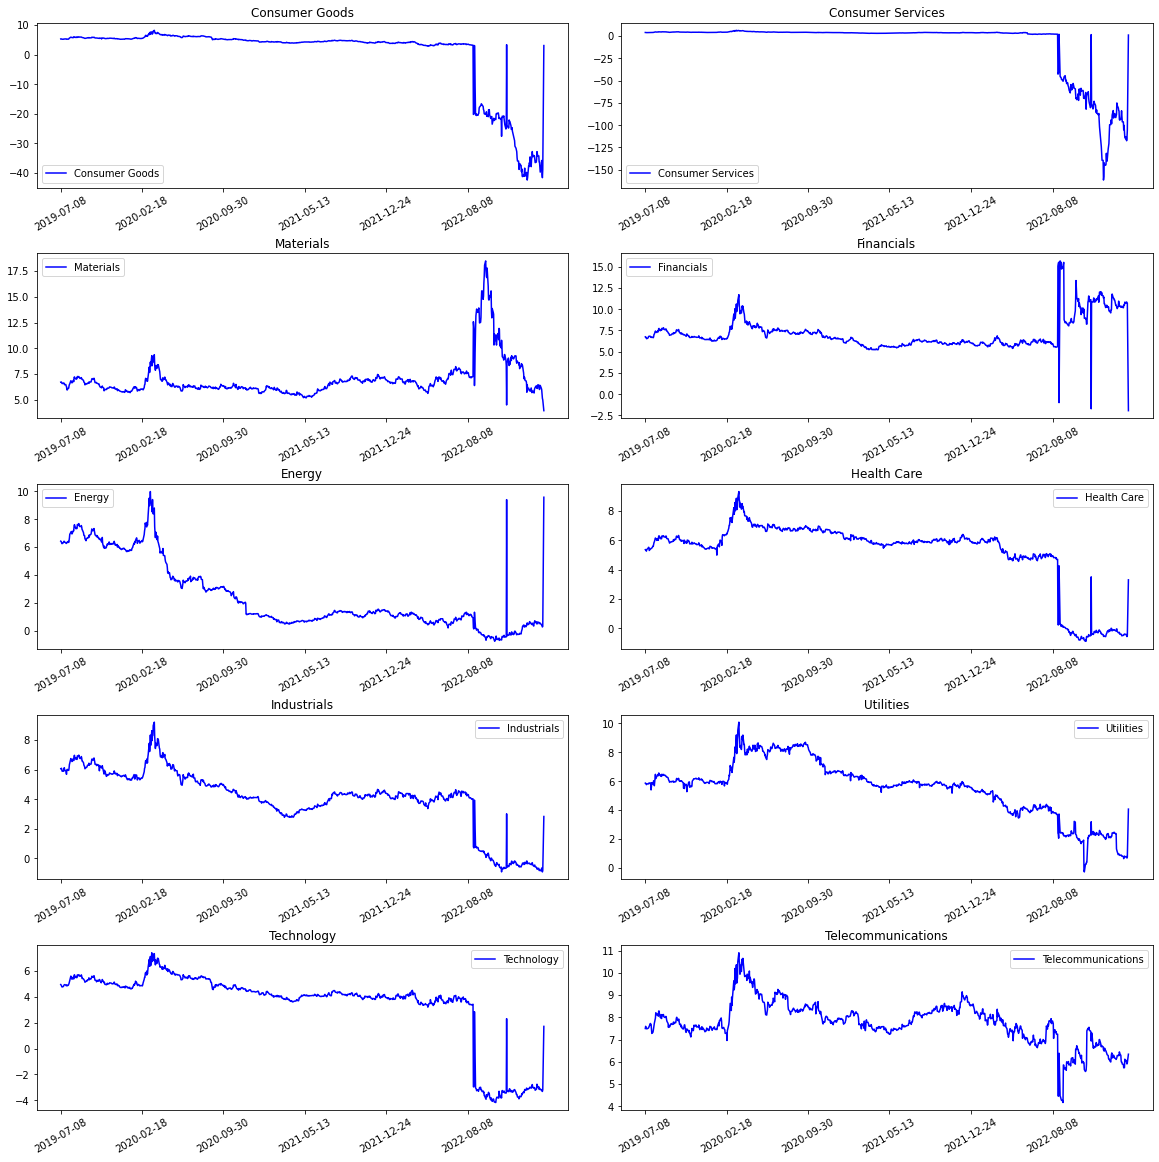

In [92]:
#Builds ERP on a sector level

import pandas as pd
import math
import numpy as np
import os
import csv
import yfinance as yf
#import mysql.connector
import matplotlib.pyplot as plt
import psycopg2
import requests
import json
import tkinter as tk
import re
from datetime import datetime
from datetime import timedelta
from datetime import date
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression

def Average(lst):
    return sum(lst) / len(lst)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Filter_df(tbf_df, merging_dates_list):
    
    filter_df = pd.DataFrame(merging_dates_list, columns=['Date'])
    merged_df = pd.merge(tbf_df, filter_df, on='Date')
    merged_df.index = filter_df['Date'] 
    merged_df.index.name = 'Date'
    merged_df.drop(['Date'], axis=1, inplace=True)
    
    
    return merged_df

def offset(c_stock, i_list, d_list, t_date, r_date, div_i):
    
    cutoff_date = r_date
    Start_Date = t_date
    ed_list = d_list
    y_list = i_list
    cur_index = 0
    nd_list = []
    for cur_ed_date in ed_list:                            
        cont=0
        seek_element = True
        ced = cur_ed_date
        cur_index = ed_df[c_stock].values.tolist()[cur_index:].index(cur_ed_date) + cur_index
        cur_index_plus = cur_index + 1
        if (cur_index_plus<len(ed_df.index)):
            cur_year = ed_df.index[cur_index_plus][len(ed_df.index[cur_index_plus])-4:]
        else:
            cur_year = today.year
        cur_ed_date = str(cur_year) + '-' + cur_ed_date[0:2] + '-' + cur_ed_date[2:]
        cur_ed_date = datetime.strptime(cur_ed_date, "%Y-%m-%d").date()
        if (cur_ed_date < cutoff_date):
            nd_list.append(cur_ed_date)        
    
    offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
    
    return offs

dbase = "visiblealpha_laptop"

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

number_to_string = {'6160 HK': 'BGNE US','700 HK': 'TCEHY US','2330 TT': 'TSM US','6758 JP': 'SONY US','9868 HK': 'XPEV US'}
string_to_number = {'BGNE US': '6160 HK','TCEHY US': '700 HK','TSM US': '2330 TT','SONY US': '6758 JP','XPEV US': '9868 HK'}
clean_up = lambda x: re.sub(r'[^A-Z /^0-9]', '', str(x))
clean_up_save = lambda x: re.sub(r'[^A-Z ^0-9]', '', str(x))

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])

query_prices = 'SELECT * FROM prices_relation'    
Prices_df = pd.read_sql_query(query_prices, engine)
Prices_df = Set_DF(Prices_df)
Prices_df = DD_Index(Prices_df)

query_yq_all = "SELECT * FROM yq_all"
yq_df = pd.read_sql_query(query_yq_all, engine)
yq_df = Set_DF(yq_df)
yq_df = DD_Index(yq_df)

today = date.today()
inflation_lt = 2

query_mc = 'SELECT * FROM mkt_cap_relation'    
mc_df = pd.read_sql_query(query_mc, engine)
mc_df = Set_DF(mc_df)
mc_df = DD_Index(mc_df)

query_ed = "SELECT * FROM ed_relation"
ed_df = pd.read_sql_query(query_ed, engine)
ed_df = Set_DF(ed_df)
ed_df = DD_Index(ed_df)
ed_df['AUX'] = ed_df.index
dum_l1 = []
dum_l2 = []
for dum in ed_df['AUX']:
    dum_s = dum.split('QCY-')
    ed_df.loc[dum, 'AUX'] = int(str(dum_s[1]) + str(dum_s[0]))
ed_df.sort_values(by=['AUX'], inplace=True)
ed_df.drop('AUX', axis=1, inplace=True)
y_list = ed_df.index.values.tolist()

query_sectors = 'SELECT * FROM stock_sectors'    
Sectors_df = pd.read_sql_query(query_sectors, engine)
Sectors_df = Set_DF(Sectors_df)
Sectors_df = DD_Index(Sectors_df)
sector_unique = pd.unique(Sectors_df['Sector'])
industry_unique = pd.unique(Sectors_df['Industry'])

Start_Date = input("Enter Start Date: (YY/MM/DD)")
Start_Date = datetime.strptime(Start_Date, "%y/%m/%d").date()

End_Date = input("Enter End Date: (YY/MM/DD)")
if (End_Date != ''):
    End_Date = datetime.strptime(End_Date, "%y/%m/%d").date()
else:
    End_Date = today

if (Start_Date.weekday()==5):
    Start_Date = Start_Date + timedelta(2)
if (Start_Date.weekday()==6):
    Start_Date = Start_Date + timedelta(1)
    
date_list = list(pd.date_range(Start_Date, End_Date, freq = 'B').date)
stock_list = mc_df.columns.values.tolist()

SC_df = pd.DataFrame(stock_list, columns = ['Relation Name'])
SC_df.index.name = 'VA Name'
SC_df.index = SC_df['Relation Name'].replace(string_to_number)
    
over = input('Override?(Y/N for update) (default opt: N)').upper()
over_b = False
if (over=='Y'):
    over_b = True
    
if ('as_mktcap' in new_tables_list) & (not over_b):    
    query_asmc = 'SELECT * FROM as_mktcap'    
    AS_MktCap_df = pd.read_sql_query(query_asmc, engine)
    AS_MktCap_df = Set_DF(AS_MktCap_df)
    AS_MktCap_df = DD_Index(AS_MktCap_df)
else:
    AS_MktCap_df = pd.DataFrame(index = pd.Index(date_list, name = 'Date'), columns = sector_unique)
    
if ('as_ni' in new_tables_list) & (not over_b):    
    query_asni = 'SELECT * FROM as_ni'    
    AS_NI_df = pd.read_sql_query(query_asni, engine)
    AS_NI_df = Set_DF(AS_NI_df)
    AS_NI_df = DD_Index(AS_NI_df)
else:
    AS_NI_df = pd.DataFrame(index = pd.Index(date_list, name = 'Date'), columns = sector_unique)
    
if ('as_erp' in new_tables_list) & (not over_b):    
    query_aserp = 'SELECT * FROM as_erp'    
    AS_ERP_df = pd.read_sql_query(query_aserp, engine)
    AS_ERP_df = Set_DF(AS_ERP_df)
    AS_ERP_df = DD_Index(AS_ERP_df)
else:
    AS_ERP_df = pd.DataFrame(index = pd.Index(date_list, name = 'Date'), columns = sector_unique)
    
#stock_list = ['CRWD US']
    
for stock in stock_list:
    try:
        stock_SQL = re.sub(r'[^a-z^0-9]', '', stock.lower())
        stock_VA = SC_df.index[SC_df['Relation Name'].values.tolist().index(stock)]
        current_sector = Sectors_df.loc[stock_VA, 'Sector']
        query_nils = 'SELECT * FROM ' + stock_SQL + '_nils'
        Stock_NI_df = pd.read_sql_query(query_nils, engine)
        Stock_NI_df = Set_DF(Stock_NI_df)
        Stock_NI_df = DD_Index(Stock_NI_df)
        ed_list = ed_df[stock][ed_df[stock] != ''].values.tolist()
        key = yq_df.loc[stock, 'Y/Q']
        record_date = yq_df.loc[stock, 'Record Date']
        div = 1
        if (key == 'Y'):
            div = 2
        print(stock)
        for current_date in date_list:
            if (current_date not in AS_MktCap_df.index):
                AS_MktCap_df.loc[current_date] = np.nan
            if (current_date not in AS_NI_df.index):
                AS_NI_df.loc[current_date] = np.nan
            if (AS_MktCap_df.loc[current_date].replace({np.nan: 'z'})[current_sector] == 'z') | (current_date == today) | (over_b):
                er_date = Stock_NI_df.index[Stock_NI_df.index <= current_date][-1]
                offs = offset(stock, y_list, ed_list, er_date, record_date, div)
                NI_series = Stock_NI_df.loc[er_date].shift(offs)
                if (key == 'Y'):
                    NI = NI_series['Y0': 'Y1'].mean()
                else:
                    NI = NI_series['Q-3': 'Q4'].sum() / 2
                MC = mc_df.loc[mc_df.index[mc_df.index <= current_date][0]][stock] * 1000000
                if (AS_MktCap_df.loc[current_date].replace({np.nan: 'z'})[current_sector] == 'z'):
                    AS_MktCap_df.loc[current_date, current_sector] = MC
                else:
                    AS_MktCap_df.loc[current_date, current_sector] = AS_MktCap_df.loc[current_date, current_sector] + MC
                if (AS_NI_df.loc[current_date].replace({np.nan: 'z'})[current_sector] == 'z'):
                    AS_NI_df.loc[current_date, current_sector] = NI
                else:
                    AS_NI_df.loc[current_date, current_sector] = AS_NI_df.loc[current_date, current_sector] + NI
    except:
        print(stock + ' problem')

for current_date in date_list:
    if (current_date in mc_df.index):
        if (current_date not in AS_ERP_df.index):
            AS_ERP_df.loc[current_date] = np.nan
        if (AS_ERP_df.loc[current_date].replace({np.nan: 'z'})['Technology'] == 'z') | (current_date == today) | (over_b):
            print(current_date)
            current_yield = Prices_df.loc[current_date, 'USGG10YR']
            AS_ERP_df.loc[current_date] = 100 * AS_NI_df.loc[current_date] / AS_MktCap_df.loc[current_date] - (current_yield - inflation_lt)

AS_MktCap_df.sort_index(axis = 0, ascending = True, inplace = True)
AS_NI_df.sort_index(axis = 0, ascending = True, inplace = True)
AS_ERP_df.sort_index(axis = 0, ascending = True, inplace = True)
AS_ERP_df.fillna(method = 'ffill', inplace = True)
            
fig1 = plt.figure(figsize = (20, 20))
plt.subplots_adjust(wspace = 0.1, hspace = 0.4)
ax1 = fig1.add_subplot(5, 2, 1)
ax2 = fig1.add_subplot(5, 2, 2)
ax3 = fig1.add_subplot(5, 2, 3)
ax4 = fig1.add_subplot(5, 2, 4)
ax5 = fig1.add_subplot(5, 2, 5)
ax6 = fig1.add_subplot(5, 2, 6)
ax7 = fig1.add_subplot(5, 2, 7)
ax8 = fig1.add_subplot(5, 2, 8)
ax9 = fig1.add_subplot(5, 2, 9)
ax10 = fig1.add_subplot(5, 2, 10)

l = int(round(len(AS_ERP_df.index) / 10, 0))

Plot_ERP_df = AS_ERP_df.iloc[655:]

ax1.plot(Plot_ERP_df['Consumer Goods'], 'b', label = 'Consumer Goods')
ax2.plot(Plot_ERP_df['Consumer Services'], 'b', label = 'Consumer Services')
ax3.plot(Plot_ERP_df['Materials'], 'b', label = 'Materials')
ax4.plot(Plot_ERP_df['Financials'], 'b', label = 'Financials')
ax5.plot(Plot_ERP_df['Energy'], 'b', label = 'Energy')
ax6.plot(Plot_ERP_df['Health Care'], 'b', label = 'Health Care')
ax7.plot(Plot_ERP_df['Industrials'], 'b', label = 'Industrials')
ax8.plot(Plot_ERP_df['Utilities'], 'b', label = 'Utilities')
ax9.plot(Plot_ERP_df['Technology'], 'b', label = 'Technology')
ax10.plot(Plot_ERP_df['Telecommunications'], 'b', label = 'Telecommunications')

ax1.set_xticks(Plot_ERP_df.index[::l])
ax1.set_xticklabels(Plot_ERP_df.index[::l], rotation = 30)

ax2.set_xticks(Plot_ERP_df.index[::l])
ax2.set_xticklabels(Plot_ERP_df.index[::l], rotation = 30)

ax3.set_xticks(Plot_ERP_df.index[::l])
ax3.set_xticklabels(Plot_ERP_df.index[::l], rotation = 30)

ax4.set_xticks(Plot_ERP_df.index[::l])
ax4.set_xticklabels(Plot_ERP_df.index[::l], rotation = 30)

ax5.set_xticks(Plot_ERP_df.index[::l])
ax5.set_xticklabels(Plot_ERP_df.index[::l], rotation = 30)

ax6.set_xticks(Plot_ERP_df.index[::l])
ax6.set_xticklabels(Plot_ERP_df.index[::l], rotation = 30)

ax7.set_xticks(Plot_ERP_df.index[::l])
ax7.set_xticklabels(Plot_ERP_df.index[::l], rotation = 30)

ax8.set_xticks(Plot_ERP_df.index[::l])
ax8.set_xticklabels(Plot_ERP_df.index[::l], rotation = 30)

ax9.set_xticks(Plot_ERP_df.index[::l])
ax9.set_xticklabels(Plot_ERP_df.index[::l], rotation = 30)

ax10.set_xticks(Plot_ERP_df.index[::l])
ax10.set_xticklabels(Plot_ERP_df.index[::l], rotation = 30)

ax1.legend(loc='best')
ax1.set_title('Consumer Goods')
ax2.legend(loc='best')
ax2.set_title('Consumer Services')
ax3.legend(loc='best')
ax3.set_title('Materials')
ax4.legend(loc='best')
ax4.set_title('Financials')
ax5.legend(loc='best')
ax5.set_title('Energy')
ax6.legend(loc='best')
ax6.set_title('Health Care')
ax7.legend(loc='best')
ax7.set_title('Industrials')
ax8.legend(loc='best')
ax8.set_title('Utilities')
ax9.legend(loc='best')
ax9.set_title('Technology')
ax10.legend(loc='best')
ax10.set_title('Telecommunications')      
            
AS_MktCap_df.dropna(how = 'all', axis = 0, inplace = True)
AS_NI_df.dropna(how = 'all', axis = 0, inplace = True)
AS_ERP_df.dropna(how = 'all', axis = 0, inplace = True)
AS_MktCap_df.to_sql('as_mktcap', engine, index=True, if_exists='replace')
AS_NI_df.to_sql('as_ni', engine, index=True, if_exists='replace')
AS_ERP_df.to_sql('as_erp', engine, index=True, if_exists='replace')
AS_ERP_df

In [48]:
#%%writefile C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\vol_corr.py

#New Vols/Corr/IERP Relations

import pandas as pd
import math
import numpy as np
import os
import csv
import yfinance as yf
#import mysql.connector
import matplotlib.pyplot as plt
import psycopg2
import requests
import json
import tkinter as tk
import re
from datetime import datetime
from datetime import timedelta
from datetime import date
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression

def Average(lst):
    return sum(lst) / len(lst)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Filter_df(tbf_df, merging_dates_list):
    
    filter_df = pd.DataFrame(merging_dates_list, columns=['Date'])
    merged_df = pd.merge(tbf_df, filter_df, on='Date')
    merged_df.index = filter_df['Date'] 
    merged_df.index.name = 'Date'
    merged_df.drop(['Date'], axis=1, inplace=True)
    
    
    return merged_df

def offset(c_stock, i_list, d_list, t_date, r_date, div_i):
    
    cutoff_date = r_date
    Start_Date = t_date
    ed_list = d_list
    y_list = i_list
    cur_index = 0
    nd_list = []
    for cur_ed_date in ed_list:                            
        cont=0
        seek_element = True
        ced = cur_ed_date
        cur_index = ed_df[c_stock].values.tolist()[cur_index:].index(cur_ed_date) + cur_index
        cur_index_plus = cur_index + 1
        if (cur_index_plus<len(ed_df.index)):
            cur_year = ed_df.index[cur_index_plus][len(ed_df.index[cur_index_plus])-4:]
        else:
            cur_year = today.year
        cur_ed_date = str(cur_year) + '-' + cur_ed_date[0:2] + '-' + cur_ed_date[2:]
        cur_ed_date = datetime.strptime(cur_ed_date, "%Y-%m-%d").date()
        if (cur_ed_date < cutoff_date):
            nd_list.append(cur_ed_date)        
    
    offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
    
    return offs

dbase = "visiblealpha_laptop"

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

query_prices = 'SELECT * FROM prices_relation'    
Prices_df = pd.read_sql_query(query_prices, engine)
Prices_df = Set_DF(Prices_df)
Prices_df = DD_Index(Prices_df)
Prices_df.sort_index(inplace = True)

query_mc = 'SELECT * FROM mkt_cap_relation'    
mc_df = pd.read_sql_query(query_mc, engine)
mc_df = Set_DF(mc_df)
mc_df = DD_Index(mc_df)

query_eyspx = 'SELECT * FROM spx_erp'    
EYSPX_df = pd.read_sql_query(query_eyspx, engine)
EYSPX_df = Set_DF(EYSPX_df)
EYSPX_df = DD_Index(EYSPX_df)
EYSPX_df.sort_index(inplace = True)

inflation_exp = 2
window = 21
upper_band = 4
lower_band = -4
upper_band_N = 2
lower_band_N = -2
Start_Date = datetime.strptime('10/01/02', "%y/%m/%d").date()

NewPrices_df = Prices_df[Prices_df.index > Start_Date]
Returns = NewPrices_df.pct_change()
Corr_df = 100 * Returns.rolling(window, min_periods = round(window / 3)).corr(Returns['SPX'])
NewVols_df = round(Returns.ewm(halflife = 100).std() * np.sqrt(252) * 100, 2)
Slice_NewVols_df = NewVols_df.loc[EYSPX_df.index]
Momentum_df = (((1 + Returns).rolling(window).apply(np.prod, raw = True) - 1) / (NewVols_df * np.sqrt(window / 252) / 100)).clip(lower_band, upper_band)
Momentum_df[Momentum_df[Momentum_df > lower_band_N] < upper_band_N] = 0

IERP_df = (Slice_NewVols_df.swapaxes('index', 'columns') / Slice_NewVols_df['SPX']).swapaxes('index', 'columns')[mc_df.columns]
IERP_df = IERP_df * Corr_df[mc_df.columns].loc[EYSPX_df.index] / 100
IERP_df = round((IERP_df.swapaxes('index', 'columns') * EYSPX_df['ERP']).swapaxes('index', 'columns') + inflation_exp, 2)
IERP_df = IERP_df.swapaxes('index', 'columns') - EYSPX_df['ERP']
IERP_df[IERP_df < 0] = 0
IERP_df = (IERP_df + EYSPX_df['ERP']).swapaxes('index', 'columns')

Corr_df[::-1].to_sql('correlations_relation', engine, index=True, if_exists='replace')
NewVols_df[::-1].to_sql('volatilities_relation', engine, index=True, if_exists='replace')
IERP_df[::-1].to_sql('ind_erp_relation', engine, index=True, if_exists='replace')
Momentum_df[::-1].to_sql('momentum_relation', engine, index=True, if_exists='replace')

In [49]:
#%%writefile C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\valuations_oi.py

# Builds P/S valuations relation - 10y, USING AVERAGE OF INDIVIDUAL ERP

import pandas as pd
import numpy as np
import math
import os
import csv
import yfinance as yf
#import mysql.connector
import psycopg2
import requests
import json
import tkinter as tk
import re
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import date
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df 

def Filter_df(tbf_df, merging_dates_list):
    
    filter_df = pd.DataFrame(merging_dates_list, columns=['Date'])
    merged_df = pd.merge(tbf_df, filter_df, on='Date')
    merged_df.index = filter_df['Date'] 
    merged_df.index.name = 'Date'
    merged_df.drop(['Date'], axis=1, inplace=True)
    
    
    return merged_df

def offset(stock_rel, i_list, d_list, t_date, r_date, div_i):
    
    cutoff_date = r_date
    Start_Date = t_date
    ed_list = d_list
    y_list = i_list
    cur_index = 0
    nd_list = []
    for cur_ed_date in ed_list:                            
        cont=0
        seek_element = True
        ced = cur_ed_date
        cur_index = ed_df[stock_rel].values.tolist()[cur_index:].index(cur_ed_date) + cur_index
        cur_index_plus = cur_index + 1
        if (cur_index_plus<len(ed_df.index)):
            cur_year = ed_df.index[cur_index_plus][len(ed_df.index[cur_index_plus])-4:]
        else:
            cur_year = today.year
        if (int(cur_ed_date[0:2]) == 2) & (int(cur_ed_date[2:]) > 28):
            cur_ed_date = '0228'
        cur_ed_date = str(cur_year) + '-' + cur_ed_date[0:2] + '-' + cur_ed_date[2:]
        cur_ed_date = datetime.strptime(cur_ed_date, "%Y-%m-%d").date()
        if (cur_ed_date < cutoff_date):
            nd_list.append(cur_ed_date)        
    
    offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
    
    return offs
    

dbase = "visiblealpha_laptop"
dbase_metrics = "metrics_laptop"

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

engine_metrics = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase_metrics))

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase_metrics, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list_metrics = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])
    
number_to_string = {'6160 HK': 'BGNE US','700 HK': 'TCEHY US','2330 TT': 'TSM US','6758 JP': 'SONY US','9868 HK': 'XPEV US'}
string_to_number = {'BGNE US': '6160 HK','TCEHY US': '700 HK','TSM US': '2330 TT','SONY US': '6758 JP','XPEV US': '9868 HK'}
clean_up = lambda x: re.sub(r'[^A-Z /^0-9]', '', str(x))
clean_up_save = lambda x: re.sub(r'[^A-Z ^0-9]', '', str(x))
int_to_str = lambda x: str(x)
str_to_int = lambda x: int(x)
map_country = lambda x: x[len(x) - 2:]
map_fx = lambda x: FX_DF.loc[x, 'Pair']
to_pxs = lambda x: Prices_df.loc[Search_Date, x]
to_round = lambda x: int(round(x / 10, 0))

today = date.today()

query_prices = 'SELECT * FROM prices_relation'    
Prices_df = pd.read_sql_query(query_prices, engine)
Prices_df = Set_DF(Prices_df)
Prices_df = DD_Index(Prices_df)

query_ierp = 'SELECT * FROM ind_erp_relation'    
IERP_df = pd.read_sql_query(query_ierp, engine)
IERP_df = Set_DF(IERP_df)
IERP_df = DD_Index(IERP_df)
IERP_df.sort_index(axis = 0, ascending = False, inplace = True)

query_yq_all = "SELECT * FROM yq_all"
yq_df = pd.read_sql_query(query_yq_all, engine)
yq_df = Set_DF(yq_df)
yq_df = DD_Index(yq_df)

query_mc = 'SELECT * FROM mkt_cap_relation'    
mc_df = pd.read_sql_query(query_mc, engine)
mc_df = Set_DF(mc_df)
mc_df = DD_Index(mc_df)

query_ed = "SELECT * FROM ed_relation"
ed_df = pd.read_sql_query(query_ed, engine)
ed_df = Set_DF(ed_df)
ed_df = DD_Index(ed_df)
ed_df['AUX'] = ed_df.index
dum_l1 = []
dum_l2 = []
for dum in ed_df['AUX']:
    dum_s = dum.split('QCY-')
    ed_df.loc[dum, 'AUX'] = int(str(dum_s[1]) + str(dum_s[0]))
ed_df.sort_values(by=['AUX'], inplace=True)
ed_df.drop('AUX', axis=1, inplace=True)

if ('valuations_oi_relation' in new_tables_list_metrics):
    query_Val4 = "SELECT * FROM valuations_oi_relation"
    Val4_df = pd.read_sql_query(query_Val4, engine_metrics)
    Val4_df = Set_DF(Val4_df)
    Val4_df = DD_Index(Val4_df)
else:
    Val4_df = pd.DataFrame(np.nan, index = IERP_df.index, columns = IERP_df.columns)

stock_list = IERP_df.columns
reg_filter = ''
reg_input = ''

single = str(input("Enter single stock (VA, empty for all): ")).upper()

reset = ''
if (single != ''):
    if (single not in stock_list):
        print(single + ' is an invalid security')
    else:
        reset = input('Reset values (Y/N): ').upper()
        if (reset == 'Y'):
            Val4_df[single] = np.nan
        stock_list = []
        stock_list.append(single)    
else:
    reg_filter = input("Regional filter (Y/N): ").upper()
    reg_input = ''
    if (reg_filter == 'Y'):
        reg_input = input("Input region: ").upper()

orite = False
owr = input("Overwrite (Y/N): ").upper()
if (owr=='Y'):
    orite = True

Cutoff_Date = input("Enter Start Date: (YY/MM/DD)")
if (Cutoff_Date != ''):
    Cutoff_Date = datetime.strptime(Cutoff_Date, "%y/%m/%d").date()
else:
    Cutoff_Date = Val4_df.index[-1]

End_Date = input("Enter End Date: (YY/MM/DD)")
if (End_Date != ''):
    End_Date = datetime.strptime(End_Date, "%y/%m/%d").date()
else:
    End_Date = Prices_df.index[0]
    
if (orite) & (single == '') & (Cutoff_Date <= Val4_df.sort_index().index[0]):
    Val4_df = pd.DataFrame(np.nan, index = IERP_df.index, columns = IERP_df.columns)

Val4_df.replace({np.nan: 'Delete', None: 'Delete'}, inplace = True)
count = 0

for stock in stock_list:
    current_series = np.array(0)
    last_series = np.array(0)
    last_oi_array = np.array(0)
    last_oi = 0
    
    proceed = False
    stock_name = re.sub(r'[^a-z_^0-9]', '', stock.lower())
    try:
        oi_stock_relation = stock_name + '_oi'
        query_oi_stock = "SELECT * FROM " + oi_stock_relation
        oi_stock_df = pd.read_sql_query(query_oi_stock, engine)
        oi_stock_df = Set_DF(oi_stock_df)
        oi_stock_df = DD_Index(oi_stock_df)
        oi_stock_df.dropna(how = 'all', inplace = True)
        if (len(oi_stock_df.index) > 0):
            proceed = True
    except:
        print(stock + ' HAS NO OI DATA')
    if (proceed):
        count = count + 1
        print(str(count) + '- ' + stock)
        limits_series = round((oi_stock_df.swapaxes('index', 'columns').count()).expanding().median() * 0.75, 0)
        start_date = max(Cutoff_Date, IERP_df.index[-1], oi_stock_df.index[0])
        if (len(oi_stock_df.index) > 0) & (start_date <= End_Date):
            date_list = pd.date_range(start_date, End_Date, freq='B').date
            for Search_Date in date_list:
                if ((Search_Date.day == 25) & (Search_Date.month == 12)) | ((Search_Date.day == 1) & (Search_Date.month == 1)):
                    pass
                else:
                    final_oi_array = np.array(0)
                
                    oi_date = oi_stock_df.index[oi_stock_df.index <= Search_Date][-1]
                    oi_stock_df.dropna(thresh = limits_series.loc[oi_date], inplace = True)
                    
                    if (Search_Date not in Val4_df.index):
                        Val4_df.loc[Search_Date] = 'Delete'
                    offs = 0
                    region = stock[-2:]
                    if (reg_filter != 'Y') | (region == reg_input):

                        if (Val4_df.loc[Search_Date, stock] == 'Delete') | (orite) | (Search_Date == today):
                            target_len = 40
                            first = 1
                            ext = -4
                            div = 1
                            ys = 4
                            df_array = np.array([])
                            if (oi_stock_df.columns[0][0] == 'Y'):
                                target_len = 10
                                ext = -1
                                ys = 1
                                div = 2
                            ext_period = oi_stock_df.columns[0][0] + str(ext)
                            first_period = oi_stock_df.columns[0][0] + str(first)
                            oi_date = oi_stock_df.index[oi_stock_df.index <= Search_Date][-1]

                            ed_list = ed_df[stock][ed_df[stock] != ''].values.tolist()
                            y_list = ed_df.index.values.tolist()
                            record_date = yq_df.loc[stock, 'Record Date']
                            offs = offset(stock, y_list, ed_list, Search_Date, record_date, div)
                            oi_series_ext = oi_stock_df.loc[oi_date].shift(offs)[ext_period:][oi_stock_df.loc[oi_date].shift(offs)[ext_period:].replace({None: 'Delete', np.nan: 'Delete'}) != 'Delete']
                            oi_series = oi_stock_df.loc[oi_date].shift(offs)[first_period:][oi_stock_df.loc[oi_date].shift(offs)[first_period:].replace({None: 'Delete', np.nan: 'Delete'}) != 'Delete']
                            current_series = oi_series_ext.astype(float).map(to_round)
                            len_series = len(oi_series)
                            len_series_ext = len(oi_series_ext)
                            erp_date = IERP_df.index[IERP_df.index <= Search_Date][0]
                            erp = IERP_df[::-1][IERP_df[::-1].replace({np.nan: 'z'}) != 'z'].rolling(252, min_periods = 1).mean().loc[erp_date, stock]
                            px = mc_df.loc[Search_Date, stock]
                            
                            if (len_series_ext > 1):
                                if (np.median(current_series) == np.median(last_series)) & (np.mean(current_series) == np.mean(last_series)) & (np.sum(current_series) == np.sum(last_series)):
                                    final_oi_array = last_oi_array
                                else:
                                    if (len_series < target_len):
                                        y_axis = np.array(oi_series_ext)
                                        x_axis = np.arange(len_series_ext).reshape(-1,1)
                                        model = LinearRegression().fit(x_axis, y_axis)
                                        r_sq = model.score(x_axis, y_axis)
                                        y0 = model.intercept_
                                        growth = model.coef_[0]
                                        g_array = growth * (np.arange(target_len - len_series) + 1)
                                        eoic_array = oi_series_ext[-1] + g_array
                                        final_oi_array = np.array(list(y_axis) + list(eoic_array))[-target_len:]
                                    else:
                                        final_oi_array = np.array(oi_series)

                                if (len_series_ext > 1):
                                    
                                    df_array = (1 + erp/100) ** ((np.arange(target_len) + 1) / ys)
                                    oi_pv_array = final_oi_array.astype(float) / df_array
                                    oi_sum = oi_pv_array.astype(float).sum()
                                    oi_ratio =round(px / (oi_sum / 10000000), 2)
                                    Val4_df.loc[Search_Date, stock] = oi_ratio
                                    last_oi_array = final_oi_array
                                    last_series = current_series
                                    last_oi = oi_ratio
                            else:
                                Val4_df.loc[Search_Date, stock] = last_oi


Val4_df.replace({'Delete': np.nan}, inplace = True)
Val4_df.sort_index(axis = 0, ascending = True, inplace = True)
Val4_df.fillna(method = 'bfill', inplace = True)
Val4_df.to_sql('valuations_oi_relation', engine_metrics, index=True, if_exists='replace')
Val4_df

Enter single stock (VA, empty for all): 
Regional filter (Y/N): N
Overwrite (Y/N): N
Enter Start Date: (YY/MM/DD)24/10/14
Enter End Date: (YY/MM/DD)
ABST US HAS NO OI DATA
1- AMPL US
2- ASUR US
3- AXON US
4- BLKB US
5- CDAY US
6- DV US
7- EGAN US
8- ESMT US
9- EVBG US
10- FIVN US
11- FRSH US
12- SPNS US
13- HSTM US
14- JAMF US
15- LAW US
16- LPSN US
17- MNTV US
18- MODN US
19- NEWR US
20- ONTF US
21- PHR US
22- PRO US
23- PYCR US
24- QLYS US
25- QTWO US
26- SEMR US
27- SPSC US
28- TOST US
TTGT US HAS NO OI DATA
29- TWOU US
30- TYL US
31- UPLD US
32- VERX US
33- VRNT US
34- WKME US
35- YEXT US
36- ZETA US
37- ZUO US
38- TASK US
39- RIVN US
40- VRT US
41- KBC BB
42- SIE GR
43- INS GR
44- AAPL US
45- Z US
46- U US
47- AFRM US
48- APPN US
49- AI US
50- VEEV US
51- MNDY US
52- TXG US
53- FTCH US
54- ENPH US
55- SEDG US
56- VNA GR
57- NESN SW
58- ROSE SW
59- SNAP US
60- MGNI US
61- PINS US
62- BILL US
63- PATH US
64- ZEN US
65- ASAN US
66- CSIQ US
67- DWNI GR
68- ZI US
69- W US
70- WISE LN
7

<ipython-input-49-d1ea42c9d8c4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


85- PRCT US
86- SAP GR


<ipython-input-49-d1ea42c9d8c4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


87- EOAN GR
88- RWE GR
89- DTE GR
90- ISP IM
91- ENEL IM
92- NOVA US
93- INGA NA
94- SPWR US
95- ASM NA
96- ASML NA
97- DNB NO
98- NIO US
EDP PL HAS NO OI DATA
99- TEF SM
100- CLNX SM
101- ENG SM
102- IBE SM
NDA SS HAS NO OI DATA
ERICB SS HAS NO OI DATA
103- CSGN SW
104- NOVN SW
105- ROG SW
106- ALSN US
107- CZR US
108- COIN US
109- LULU US
110- QSR US
111- RH US
112- RYA ID
113- TSLA US
114- BP/ LN
ENB US HAS NO OI DATA
115- EQNR NO
116- RUN US
117- BX US
118- HSBA LN
119- MKL US
120- PCOR US
121- AZN LN
122- BGNE US
BHC US HAS NO OI DATA
123- CRL US
124- EXEL US
125- GSK LN
126- HAE US
127- SOFI US
128- HZNP US
129- ICLR US
130- SGRE SM
131- JAZZ US
132- MOH US
133- NBIX US
134- NOVOB DC
135- NVRO US
136- TDOC US
137- BLDP CN
138- ZLAB US
139- SNOW US
140- ARW US
WCN US HAS NO OI DATA
141- AA US
142- AEM CN
143- FNV CN
144- ABX CN
145- K CN
TECK US HAS NO OI DATA
146- COLD US
147- GLPI US
148- INVH US
AMTD US HAS NO OI DATA
149- ATUS US
150- AVLR US
151- BCE CN
152- CABO US
153- PLUG

<ipython-input-49-d1ea42c9d8c4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


155- DHER GR
156- EDU US
157- PHIA NA
158- ETSY US
159- GDDY US
160- EVCM US
161- INFA US
162- LSXMA US
LSXMK US HAS NO OI DATA
163- MAN US
164- XP US
165- NYT US
166- PANW US
167- FSLR US
168- SAM US
169- SIRI US
170- SPOT US
171- SQ US
172- NTNX US
173- TAL US
174- TME US
175- TTD US
176- VOD LN
177- SYNA US
178- BABA US
179- BIDU US
180- BILI US
181- BKI US
182- BL US
183- COUP US
184- DBX US
185- DOCU US
186- DOMO US
187- HUBS US
188- JD US
189- LITE US
190- MELI US
191- SREN SW
192- MOMO US
193- MTCH US
194- GDS US
195- NTES US
196- NXPI US
197- OCFT US
198- PDD US
199- RNG US
200- SHOP CN
201- TCEHY US
202- TEAM US
203- TER US
204- TSEM IT
205- TSM US
206- UBER US
207- VNET US
208- WB US
209- WDAY US
210- PCTY US
211- ZM US
212- ZNGA US
213- ZTO US
FTS US HAS NO OI DATA
NGG US HAS NO OI DATA
214- BIGC US
215- AAL US
216- BBY US
217- CMG US
218- COST US
219- DAL US
220- DG US
221- DHI US
222- DLTR US
223- DPZ US
224- HD US
225- LOW US
226- MCD US
227- NKE US
228- RL US
229- SBUX U

<ipython-input-49-d1ea42c9d8c4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


454- CTSH US
455- CMA US
456- CAG US
457- TMDX US
458- STZ US
459- COO US
460- GLW US
461- CTVA US
462- COTY US
463- CMI US
464- DHR US
465- DRI US
466- DVA US
467- DE US
468- XRAY US
469- DVN US
470- FANG US
471- DLR US
472- DFS US
473- HIMS US
474- APP US
475- DISH US
476- D US
477- DOV US
478- DOW US
479- MARA US
480- DXC US
481- EMN US
482- ETN US
483- ECL US
484- EIX US
485- EMR US
486- EFX US
487- EQIX US
488- ES US
489- EXPE US
490- EXPD US
491- FAST US
492- FIS US
493- FITB US
494- FRC US
495- FLT US
496- VCEL US


<ipython-input-49-d1ea42c9d8c4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


497- FLS US
498- FMC US
499- F US
500- FTV US
501- CFLT US
FOX US HAS NO OI DATA
502- BEN US
503- FCX US
504- HROW US


<ipython-input-49-d1ea42c9d8c4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


505- GRMN US
506- IT US
507- GD US
508- GM US
509- GPC US
GL US HAS NO OI DATA
510- GPN US
511- GWW US
512- HRB US
513- HAL US
514- HBI US
515- HOG US
516- HIG US
517- HAS US
518- HCA US
519- HP US
520- HSIC US
521- HES US
522- HPE US
523- HLT US
524- PEGA US
525- HRL US
526- HST US
527- HBAN US
528- IEX US
529- IDXX US
530- INFO US
531- ITW US
532- IR US
533- IP US
534- IPG US
535- IFF US
536- ISRG US
537- IVZ US
538- IPGP US
539- IRM US
540- JKHY US
541- J US
542- JBHT US
543- SJM US
544- JNPR US
545- TDW US
546- KEY US
547- KEYS US
548- KMI US
549- KLAC US
550- KSS US
551- KHC US
552- S US
553- LHX US
554- LH US
555- LW US
556- LVS US
557- LEG US
558- LDOS US
559- LEN US
560- LNC US
561- LIN US
562- LYV US
563- LKQ US
L US HAS NO OI DATA
564- LYB US
565- MTB US
566- MRO US
567- MPC US
568- MAR US
569- MMC US
570- MLM US
571- MAS US
MKC US HAS NO OI DATA
572- MXIM US
573- MCK US
574- MTD US
575- MGM US
576- MCHP US
577- MHK US
578- TAP US
579- MCO US
580- MOS US
581- MSI US
582- MSCI

<ipython-input-49-d1ea42c9d8c4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


612- PKI US
613- PRGO US
614- PM US
615- PSX US
616- PXD US
617- PNC US
618- PPG US
619- PPL US
620- PFG US
621- PRU US
622- PHM US
623- PVH US
624- PWR US
625- DGX US
626- RJF US
627- RF US
628- RMD US
629- RHI US
630- ROK US
631- ROL US
632- ROP US
633- ROST US
634- RCL US
635- SPGI US
636- CRM US
637- SEE US
638- SNA US
639- LUV US
640- SWK US
641- STT US
642- STE US
643- SYK US
644- LNTH US
645- SNPS US
646- SYY US
647- TMUS US
648- TROW US
649- TTWO US
650- TPR US
651- TEL US
652- STNE US
653- TFX US
654- TXT US
655- TMO US
656- TSCO US
657- TT US
658- TDG US
659- TRV US
660- TFC US
661- NXT US
662- UAA US


<ipython-input-49-d1ea42c9d8c4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


663- URI US
664- UNM US
665- VFC US
666- VLO US
667- PTON US
668- VRSK US
669- CPRX US
670- VMC US


<ipython-input-49-d1ea42c9d8c4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


671- WRB US
672- WAB US
673- WBA US
674- WAT US
675- WEC US
676- WDC US
677- WU US
678- WRK US
679- WY US
680- WHR US
681- WMB US
682- WLTW US
683- WYNN US
684- XYL US
685- YUM US
686- ZBRA US
687- ZBH US
688- ZION US
689- SG US
690- HFG GR


<ipython-input-49-d1ea42c9d8c4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


691- MRNA US
692- DELL US
693- CLBT US
694- SMAR US


<ipython-input-49-d1ea42c9d8c4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


695- ESTC US
696- MDB US
697- SHL GR
698- CRWD US
699- ZS US
700- ZAL GR
701- OKTA US
702- CHKP US
703- SAIC US
704- TTE FP
705- AVAV US
706- DOCN US
707- DECK US
708- AIR FP


<ipython-input-49-d1ea42c9d8c4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


709- STM FP
710- BNP FP
711- DSY FP
712- ATRO US
713- MRVL US


<ipython-input-49-d1ea42c9d8c4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


714- ONON US
715- SPT US


<ipython-input-49-d1ea42c9d8c4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


716- PAGS US
717- CHWY US
718- ASPN US
719- UTHR US


<ipython-input-49-d1ea42c9d8c4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


720- RXT US
721- REAL US
722- NARI US
723- BE US
724- ABNB US
725- DASH US
726- LSPD CN
727- CPNG US
728- RPD US
729- FOUR US


<ipython-input-49-d1ea42c9d8c4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


730- TENB US
731- CYBR US
732- JBL US
733- BASE US
734- GTLB US
735- ROKU US
736- DT US
737- ADYEN NA
738- POWL US
739- DKNG US


<ipython-input-49-d1ea42c9d8c4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


740- OPEN US
741- SE US
742- HALO US
743- NET US


<ipython-input-49-d1ea42c9d8c4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


744- CVNA US
745- XPEV US
746- FSLY US
747- RDFN US
748- PD US
749- EXAS US


<ipython-input-49-d1ea42c9d8c4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


ABST US  AMPL US  ASUR US  AXON US  BLKB US  CDAY US  DV US  \
Date                                                                      
2015-07-01    12.16   203.51     7.66    27.84    22.98    16.35  56.96   
2015-07-02    12.16   203.51     7.66    27.84    22.98    16.35  56.96   
2015-07-03    12.52   203.51     7.66    27.84    22.98    16.35  56.96   
2015-07-06    12.48   203.51     7.66    27.84    22.98    16.35  56.96   
2015-07-07    12.52   203.51     7.66    27.84    22.98    16.35  56.96   
...             ...      ...      ...      ...      ...      ...    ...   
2024-10-09      NaN    27.93    28.18   119.62    14.25    22.92  13.25   
2024-10-10      NaN    27.46    28.13   118.59    14.43    22.91  13.40   
2024-10-11      NaN    27.77    27.78   120.25    14.56    22.91  13.68   
2024-10-14      NaN    27.82    28.32   121.39    14.68    22.90  13.97   
2024-10-15      NaN    28.90    28.79   119.74    14.89    22.90  13.85   

            EGAN US  ESMT US  EVBG US  ...  NET US  CVNA US  XPEV US  FSLY US  \
Date                                   ...                                      
2015-07-01    57.52   139.45    30.87  ...   89.22     3.81   134.88    45.59   
2015-07-02    57.52   139.45    30.87  ...   89.22     3.81   134.88    45.59   
2015-07-03    57.52   139.45    30.87  ...   89.22     3.81   134.88    45.59   
2015-07-06    57.52   139.45    30.87  ...   89.22     3.81   134.88    45.59   
2015-07-07    57.52   139.45    30.87  ...   89.22     3.81   134.88    45.59   
...             ...      ...      ...  ...     ...      ...      ...      ...   
2024-10-09   -34.76    33.33    13.35  ...  128.52    42.71   -22.97    54.56   
2024-10-10   -35.28    33.33    13.34  ...  139.67    42.94   -23.17    53.35   
2024-10-11   -35.58    33.33    13.32  ...  141.85    43.04   -23.54    55.04   
2024-10-14   -35.01    33.33    13.32  ...  141.26    42.45   -20.93    53.21   
2024-10-15   -36.19    33.33    13.31  ...  141.35    42.64   -20.42    53.27   

            RDFN US   PD US  EXAS US  DECK US  NTNX US  ELF US  
Date                                                            
2015-07-01    42.03  522.16    52.42     0.57     3.85    2.22  
2015-07-02    42.03  522.16    52.42     0.57     3.85    2.22  
2015-07-03    42.03  522.16    52.42     0.56     3.85    2.22  
2015-07-06    42.03  522.16    52.42     0.56     3.85    2.22  
2015-07-07    42.03  522.16    52.42     0.56     3.85    2.22  
...             ...     ...      ...      ...      ...     ...  
2024-10-09    17.76   16.63    28.84     4.03    29.29   27.67  
2024-10-10    17.44   16.66    29.19     3.98    29.96   28.22  
2024-10-11    18.31   16.99    29.68     4.06    30.05   28.84  
2024-10-14    19.22   17.03    29.87     4.05    30.17   30.48  
2024-10-15    19.41   17.16    29.70     4.06    29.84   28.93  

[2413 rows x 800 columns]

In [50]:
#%%writefile C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\valuations_ps.py

# Builds P/S valuations relation - 10y, USING AVERAGE OF INDIVIDUAL ERPs

import pandas as pd
import numpy as np
import math
import os
import csv
import yfinance as yf
#import mysql.connector
import psycopg2
import requests
import json
import tkinter as tk
import re
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import date
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df 

def Filter_df(tbf_df, merging_dates_list):
    
    filter_df = pd.DataFrame(merging_dates_list, columns=['Date'])
    merged_df = pd.merge(tbf_df, filter_df, on='Date')
    merged_df.index = filter_df['Date'] 
    merged_df.index.name = 'Date'
    merged_df.drop(['Date'], axis=1, inplace=True)
    
    
    return merged_df

def offset(stock_rel, i_list, d_list, t_date, r_date, div_i):
    
    cutoff_date = r_date
    Start_Date = t_date
    ed_list = d_list
    y_list = i_list
    cur_index = 0
    nd_list = []
    for cur_ed_date in ed_list:                            
        cont=0
        seek_element = True
        ced = cur_ed_date
        cur_index = ed_df[stock_rel].values.tolist()[cur_index:].index(cur_ed_date) + cur_index
        cur_index_plus = cur_index + 1
        if (cur_index_plus<len(ed_df.index)):
            cur_year = ed_df.index[cur_index_plus][len(ed_df.index[cur_index_plus])-4:]
        else:
            cur_year = today.year
        if (int(cur_ed_date[0:2]) == 2) & (int(cur_ed_date[2:]) > 28):
            cur_ed_date = '0228'
        cur_ed_date = str(cur_year) + '-' + cur_ed_date[0:2] + '-' + cur_ed_date[2:]
        cur_ed_date = datetime.strptime(cur_ed_date, "%Y-%m-%d").date()
        if (cur_ed_date < cutoff_date):
            nd_list.append(cur_ed_date)        
    
    offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
    
    return offs
    

dbase = "visiblealpha_laptop"
dbase_metrics = "metrics_laptop"

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

engine_metrics = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase_metrics))

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase_metrics, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list_metrics = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])
    
number_to_string = {'6160 HK': 'BGNE US','700 HK': 'TCEHY US','2330 TT': 'TSM US','6758 JP': 'SONY US','9868 HK': 'XPEV US'}
string_to_number = {'BGNE US': '6160 HK','TCEHY US': '700 HK','TSM US': '2330 TT','SONY US': '6758 JP','XPEV US': '9868 HK'}
clean_up = lambda x: re.sub(r'[^A-Z /^0-9]', '', str(x))
clean_up_save = lambda x: re.sub(r'[^A-Z ^0-9]', '', str(x))
int_to_str = lambda x: str(x)
str_to_int = lambda x: int(x)
map_country = lambda x: x[len(x) - 2:]
map_fx = lambda x: FX_DF.loc[x, 'Pair']
to_pxs = lambda x: Prices_df.loc[Search_Date, x]
to_round = lambda x: int(round(x / 10, 0))

today = date.today()

query_prices = 'SELECT * FROM prices_relation'    
Prices_df = pd.read_sql_query(query_prices, engine)
Prices_df = Set_DF(Prices_df)
Prices_df = DD_Index(Prices_df)

query_ierp = 'SELECT * FROM ind_erp_relation'    
IERP_df = pd.read_sql_query(query_ierp, engine)
IERP_df = Set_DF(IERP_df)
IERP_df = DD_Index(IERP_df)
IERP_df.sort_index(axis = 0, ascending = False, inplace = True)

query_yq_all = "SELECT * FROM yq_all"
yq_df = pd.read_sql_query(query_yq_all, engine)
yq_df = Set_DF(yq_df)
yq_df = DD_Index(yq_df)

query_mc = 'SELECT * FROM mkt_cap_relation'    
mc_df = pd.read_sql_query(query_mc, engine)
mc_df = Set_DF(mc_df)
mc_df = DD_Index(mc_df)

query_ed = "SELECT * FROM ed_relation"
ed_df = pd.read_sql_query(query_ed, engine)
ed_df = Set_DF(ed_df)
ed_df = DD_Index(ed_df)
ed_df['AUX'] = ed_df.index
dum_l1 = []
dum_l2 = []
for dum in ed_df['AUX']:
    dum_s = dum.split('QCY-')
    ed_df.loc[dum, 'AUX'] = int(str(dum_s[1]) + str(dum_s[0]))
ed_df.sort_values(by=['AUX'], inplace=True)
ed_df.drop('AUX', axis=1, inplace=True)

if ('valuations_ps_relation' in new_tables_list_metrics):
    query_val3 = "SELECT * FROM valuations_ps_relation"
    Val3_df = pd.read_sql_query(query_val3, engine_metrics)
    Val3_df = Set_DF(Val3_df)
    Val3_df = DD_Index(Val3_df)
else:
    Val3_df = pd.DataFrame(np.nan, index = IERP_df.index, columns = IERP_df.columns)

stock_list = IERP_df.columns
reg_filter = ''
reg_input = ''

single = str(input("Enter single stock (VA, empty for all): ")).upper()

if (single != ''):
    if (single not in stock_list):
        print(single + ' is an invalid security')
    else:
        stock_list = []
        stock_list.append(single)    
else:
    reg_filter = input("Regional filter (Y/N): ").upper()
    reg_input = ''
    if (reg_filter == 'Y'):
        reg_input = input("Input region: ").upper()

orite = False
owr = input("Overwrite (Y/N): ").upper()
if (owr=='Y'):
    orite = True

Cutoff_Date = input("Enter Start Date: (YY/MM/DD)")
if (Cutoff_Date != ''):
    Cutoff_Date = datetime.strptime(Cutoff_Date, "%y/%m/%d").date()
else:
    Cutoff_Date = Val3_df.index[-1]

End_Date = input("Enter End Date: (YY/MM/DD)")
if (End_Date != ''):
    End_Date = datetime.strptime(End_Date, "%y/%m/%d").date()
else:
    End_Date = Prices_df.sort_index().index[-1]

if (Val3_df.shape[0] == 0):
    Val3_df = pd.DataFrame(np.nan, index = IERP_df.index, columns = IERP_df.columns)
else:
    if (orite) & (single == '') & (Cutoff_Date <= Val3_df.sort_index().index[0]):
        Val3_df = pd.DataFrame(np.nan, index = IERP_df.index, columns = IERP_df.columns)

Val3_df.replace({np.nan: 'Delete', None: 'Delete'}, inplace = True)
count = 0

for stock in stock_list:
    current_series = np.array(0)
    last_series = np.array(0)
    last_ps_array = np.array(0)
    last_ps = 0
    
    proceed = False
    stock_name = re.sub(r'[^a-z_^0-9]', '', stock.lower())
    try:
        ps_stock_relation = stock_name
        query_ps_stock = "SELECT * FROM " + ps_stock_relation
        ps_stock_df = pd.read_sql_query(query_ps_stock, engine)
        ps_stock_df = Set_DF(ps_stock_df)
        ps_stock_df = DD_Index(ps_stock_df)
        ps_stock_df.dropna(how = 'all', inplace = True)
        if (len(ps_stock_df.index) > 0):
            proceed = True
    except:
        print(stock + ' HAS NO REV DATA')
    if (proceed):
        count = count + 1
        print(str(count) + '- ' + stock)
        limits_series = round((ps_stock_df.swapaxes('index', 'columns').count()).expanding().median() * 0.75, 0)
        start_date = max(Cutoff_Date, IERP_df.index[-1], ps_stock_df.index[0])
        if (len(ps_stock_df.index) > 0) & (start_date <= End_Date):
            date_list = pd.date_range(start_date, End_Date, freq='B').date
            for Search_Date in date_list:
                if ((Search_Date.day == 25) & (Search_Date.month == 12)) | ((Search_Date.day == 1) & (Search_Date.month == 1)):
                    pass
                else:
                    final_ps_array = np.array(0)
                
                    ps_date = ps_stock_df.index[ps_stock_df.index <= Search_Date][-1]
                    ps_stock_df.dropna(thresh = limits_series.loc[ps_date], inplace = True)
                    if (Search_Date not in Val3_df.index):
                        Val3_df.loc[Search_Date] = 'Delete'
                    offs = 0
                    region = stock[-2:]
                    if (reg_filter != 'Y') | (region == reg_input):
                        
                        if (Val3_df.loc[Search_Date, stock] == 'Delete') | (orite) | (Search_Date == today):
                            target_len = 40
                            first = 1
                            ext = -4
                            div = 1
                            ys = 4
                            df_array = np.array([])
                            if (ps_stock_df.columns[0][0] == 'Y'):
                                target_len = 10
                                ext = -1
                                ys = 1
                                div = 2
                            ext_period = ps_stock_df.columns[0][0] + str(ext)
                            first_period = ps_stock_df.columns[0][0] + str(first)
                            ps_date = ps_stock_df.index[ps_stock_df.index <= Search_Date][-1]

                            ed_list = ed_df[stock][ed_df[stock] != ''].values.tolist()
                            y_list = ed_df.index.values.tolist()
                            record_date = yq_df.loc[stock, 'Record Date']
                            offs = offset(stock, y_list, ed_list, Search_Date, record_date, div)
                            ps_series_ext = ps_stock_df.loc[ps_date].shift(offs)[ext_period:][ps_stock_df.loc[ps_date].shift(offs)[ext_period:].replace({None: 'Delete', np.nan: 'Delete'}) != 'Delete']
                            ps_series = ps_stock_df.loc[ps_date].shift(offs)[first_period:][ps_stock_df.loc[ps_date].shift(offs)[first_period:].replace({None: 'Delete', np.nan: 'Delete'}) != 'Delete']
                            current_series = ps_series.map(to_round)
                            len_series = len(ps_series)
                            len_series_ext = len(ps_series_ext)
                            erp_date = IERP_df.index[IERP_df.index <= Search_Date][0]
                            erp = IERP_df[::-1][IERP_df[::-1].replace({np.nan: 'z'}) != 'z'].rolling(252, min_periods = 1).mean().loc[erp_date, stock]
                            px = mc_df.loc[Search_Date, stock]
                            
                            if  (len_series > 1):
                                if (np.median(current_series) == np.median(last_series)) & (np.mean(current_series) == np.mean(last_series)) & (np.sum(current_series) == np.sum(last_series)):
                                    final_ps_array = last_ps_array
                                else:
                                    if (len_series < target_len):
                                        y_axis = np.array(ps_series_ext)
                                        x_axis = np.arange(len_series_ext).reshape(-1,1)
                                        model = LinearRegression().fit(x_axis, y_axis)
                                        r_sq = model.score(x_axis, y_axis)
                                        y0 = model.intercept_
                                        growth = model.coef_[0]
                                        g_array = growth * (np.arange(target_len - len_series) + 1)
                                        epsc_array = ps_series_ext[-1] + g_array
                                        final_ps_array = np.array(list(y_axis) + list(epsc_array))[-target_len:]
                                    else:
                                        final_ps_array = np.array(ps_series)

                                if (len_series_ext > 1):
                                    df_array = (1 + erp/100) ** ((np.arange(target_len) + 1) / ys)
                                    ps_pv_array = final_ps_array / df_array
                                    ps_sum = ps_pv_array.sum()
                                    ps_ratio = round(px / (ps_sum / 10000000), 2)
                                    Val3_df.loc[Search_Date, stock] = ps_ratio                                    
                                    last_ps_array = final_ps_array
                                    last_series = current_series
                                    last_ps = ps_ratio
                            
                            else:
                                Val3_df.loc[Search_Date, stock] = last_ps

Val3_df.replace({'Delete': np.nan}, inplace = True)
Val3_df.sort_index(axis = 0, ascending = True, inplace = True)
Val3_df.fillna(method = 'bfill', inplace = True)
Val3_df.to_sql('valuations_ps_relation', engine_metrics, index=True, if_exists='replace')
Val3_df

Enter single stock (VA, empty for all): 
Regional filter (Y/N): n
Overwrite (Y/N): n
Enter Start Date: (YY/MM/DD)24/10/14
Enter End Date: (YY/MM/DD)
ABST US HAS NO REV DATA
1- AMPL US
2- ASUR US
3- AXON US
4- BLKB US
5- CDAY US
6- DV US
7- EGAN US
8- ESMT US
9- EVBG US
10- FIVN US
11- FRSH US
12- SPNS US
13- HSTM US
14- JAMF US
15- LAW US
16- LPSN US
17- MNTV US
18- MODN US
19- NEWR US
20- ONTF US
21- PHR US
22- PRO US
23- PYCR US
24- QLYS US
25- QTWO US
26- SEMR US
27- SPSC US
28- TOST US
TTGT US HAS NO REV DATA
29- TWOU US
30- TYL US
31- UPLD US
32- VERX US
33- VRNT US
34- WKME US
35- YEXT US
36- ZETA US
37- ZUO US
38- TASK US
39- RIVN US
40- VRT US
41- KBC BB
42- SIE GR
43- INS GR
44- AAPL US
45- Z US
46- U US
47- AFRM US
48- APPN US
49- AI US
50- VEEV US
51- MNDY US
52- TXG US
53- FTCH US
54- ENPH US
55- SEDG US
56- VNA GR
57- NESN SW
58- ROSE SW
59- SNAP US
60- MGNI US
61- PINS US
62- BILL US
63- PATH US
64- ZEN US
65- LEG GR
66- ASAN US
67- CSIQ US
68- DWNI GR
69- ZI US
70- W US


<ipython-input-50-f462654ee3b4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


85- BAYN GR
86- PRCT US


<ipython-input-50-f462654ee3b4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


87- SAP GR
88- EOAN GR
89- RWE GR
90- DTE GR
91- ISP IM
92- ENEL IM
93- NOVA US
94- INGA NA
95- SPWR US
96- ASM NA
97- ASML NA
98- DNB NO
99- NIO US
EDP PL HAS NO REV DATA
100- TEF SM
101- CLNX SM
102- ENG SM
103- IBE SM
NDA SS HAS NO REV DATA
ERICB SS HAS NO REV DATA
104- CSGN SW
105- NOVN SW
106- ROG SW
107- ALSN US
108- CZR US
109- COIN US
110- LULU US
111- QSR US
112- RH US
113- RYA ID
114- TSLA US
115- BP/ LN
ENB US HAS NO REV DATA
116- EQNR NO
117- RUN US
118- BX US
119- HSBA LN
120- MKL US
121- PCOR US
122- AZN LN
123- BGNE US
BHC US HAS NO REV DATA
124- CRL US
125- EXEL US
126- GSK LN
127- HAE US
128- SOFI US
129- HZNP US
130- ICLR US
131- SGRE SM
132- JAZZ US
133- MOH US
134- NBIX US
135- NOVOB DC
136- NVRO US
137- TDOC US
138- BLDP CN
139- ZLAB US
140- SNOW US
141- ARW US
WCN US HAS NO REV DATA
142- AA US
143- AEM CN
144- FNV CN
145- ABX CN
146- K CN
TECK US HAS NO REV DATA
147- COLD US
148- ELS US
149- GLPI US
150- INVH US
AMTD US HAS NO REV DATA
151- ATUS US
152- AVLR US
15

<ipython-input-50-f462654ee3b4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


158- EDU US
159- PHIA NA
160- ETSY US
161- GDDY US
162- EVCM US
163- INFA US
164- LSXMA US
LSXMK US HAS NO REV DATA
165- MAN US
166- XP US
167- NYT US
168- PANW US
169- FSLR US
170- SAM US
171- SIRI US
172- SPOT US
173- SQ US
174- NTNX US
175- TAL US
176- TME US
177- TTD US
178- VOD LN
179- SYNA US
180- BABA US
181- BIDU US
182- BILI US
183- BKI US
184- BL US
185- COUP US
186- DBX US
187- DOCU US
188- DOMO US
189- HUBS US
190- JD US
191- LITE US
192- MELI US
193- SREN SW
194- MOMO US
195- MTCH US
196- GDS US
197- NTES US
198- NXPI US
199- OCFT US
200- PDD US
201- RNG US
202- SHOP CN
203- TCEHY US
204- TEAM US
205- TER US
206- TSEM IT
207- TSM US
208- UBER US
209- VNET US
210- WB US
211- WDAY US
212- PCTY US
213- ZM US
214- ZNGA US
215- ZTO US
FTS US HAS NO REV DATA
NGG US HAS NO REV DATA
216- BIGC US
217- AAL US
218- BBY US
219- CMG US
220- COST US
221- DAL US
222- DG US
223- DHI US
224- DLTR US
225- DPZ US
226- HD US
227- LOW US
228- MCD US
229- NKE US
230- RL US
231- SBUX US
232- TGT

<ipython-input-50-f462654ee3b4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


463- CTSH US
464- CMA US
465- CAG US
466- TMDX US
467- STZ US
468- COO US
469- GLW US
470- CTVA US
471- COTY US
472- CMI US
473- DHR US
474- DRI US
475- DVA US
476- DE US
477- XRAY US
478- DVN US
479- FANG US
480- DLR US
481- DFS US
482- HIMS US
483- APP US
484- DISH US
485- D US
486- DOV US
487- DOW US
488- MARA US
489- DXC US
490- EMN US
491- ETN US
492- ECL US
493- EIX US
494- EMR US
495- EFX US
496- EQIX US
497- EQR US
498- ES US
499- EXPE US
500- EXPD US
501- EXR US
502- FAST US
503- FRT US
504- FIS US
505- FITB US
506- FRC US
507- FLT US
508- VCEL US


<ipython-input-50-f462654ee3b4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


509- FLS US
510- FMC US
511- F US
512- FTV US
513- CFLT US
FOX US HAS NO REV DATA
514- BEN US
515- FCX US
516- HROW US


<ipython-input-50-f462654ee3b4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


517- GRMN US
518- IT US
519- GD US
520- GM US
521- GPC US
GL US HAS NO REV DATA
522- GPN US
523- GWW US
524- HRB US
525- HAL US
526- HBI US
527- HOG US
528- HIG US
529- HAS US
530- HCA US
531- PEAK US
532- HP US
533- HSIC US
534- HES US
535- HPE US
536- HLT US
537- PEGA US
538- HRL US
539- HST US
540- HBAN US
541- IEX US
542- IDXX US
543- INFO US
544- ITW US
545- IR US
546- IP US
547- IPG US
548- IFF US
549- ISRG US
550- IVZ US
551- IPGP US
552- IRM US
553- JKHY US
554- J US
555- JBHT US
556- SJM US
557- JNPR US
558- TDW US
559- KEY US
560- KEYS US
561- KIM US
562- KMI US
563- KLAC US
564- KSS US
565- KHC US
566- S US
567- LHX US
568- LH US
569- LW US
570- LVS US
571- LEG US
572- LDOS US
573- LEN US
574- LNC US
575- LIN US
576- LYV US
577- LKQ US
L US HAS NO REV DATA
578- LYB US
579- MTB US
580- MRO US
581- MPC US
582- MAR US
583- MMC US
584- MLM US
585- MAS US
MKC US HAS NO REV DATA
586- MXIM US
587- MCK US
588- MTD US
589- MGM US
590- MCHP US
591- MAA US
592- MHK US
593- TAP US
594- 

<ipython-input-50-f462654ee3b4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


627- PKI US
628- PRGO US
629- PM US
630- PSX US
631- PXD US
632- PNC US
633- PPG US
634- PPL US
635- PFG US
636- PLD US
637- PRU US
638- PHM US
639- PVH US
640- PWR US
641- DGX US
642- RJF US
643- O US
644- REG US
645- RF US
646- RMD US
647- RHI US
648- ROK US
649- ROL US
650- ROP US
651- ROST US
652- RCL US
653- SPGI US
654- CRM US
655- SEE US
656- SLG US
657- SNA US
658- LUV US
659- SWK US
660- STT US
661- STE US
662- SYK US
663- LNTH US
664- SNPS US
665- SYY US
666- TMUS US
667- TROW US
668- TTWO US
669- TPR US
670- TEL US
671- STNE US
672- TFX US
673- TXT US
674- TMO US
675- TSCO US
676- TT US
677- TDG US
678- TRV US
679- TFC US
680- NXT US
681- UAA US


<ipython-input-50-f462654ee3b4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


682- URI US
683- UNM US
684- VFC US
685- VLO US
686- PTON US
687- VTR US
688- VRSK US
689- CPRX US


<ipython-input-50-f462654ee3b4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


690- VNO US
691- VMC US
692- WRB US
693- WAB US
694- WBA US
695- WAT US
696- WEC US
697- WELL US
698- WDC US
699- WU US
700- WRK US
701- WY US
702- WHR US
703- WMB US
704- WLTW US
705- WYNN US
706- XYL US
707- YUM US
708- ZBRA US
709- ZBH US
710- ZION US
711- SG US


<ipython-input-50-f462654ee3b4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


712- HFG GR
713- MRNA US
714- DELL US
715- CLBT US


<ipython-input-50-f462654ee3b4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


716- SMAR US
717- ESTC US
718- MDB US
719- SHL GR
720- CRWD US
721- ZS US
722- ZAL GR
723- OKTA US
724- CHKP US
725- SAIC US
726- TTE FP
727- AVAV US
728- DOCN US
729- DECK US


<ipython-input-50-f462654ee3b4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


730- AIR FP
731- STM FP
732- BNP FP
733- DSY FP
734- CAP FP
735- ATRO US


<ipython-input-50-f462654ee3b4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


736- MRVL US
737- ONON US


<ipython-input-50-f462654ee3b4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


738- SPT US
739- PAGS US
740- CHWY US
741- ASPN US
742- UTHR US
743- RXT US


<ipython-input-50-f462654ee3b4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


744- REAL US
745- NARI US
746- BE US
747- ABNB US
748- DASH US
749- LSPD CN
750- CPNG US
751- RPD US
752- FOUR US
753- TENB US


<ipython-input-50-f462654ee3b4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


754- CYBR US
755- JBL US
756- BASE US
757- GTLB US
758- ROKU US
759- DT US
760- ADYEN NA
761- POWL US


<ipython-input-50-f462654ee3b4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


762- DKNG US
763- OPEN US
764- SE US
765- HALO US


<ipython-input-50-f462654ee3b4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


766- NET US
767- CVNA US
768- XPEV US
769- FSLY US
770- RDFN US
771- PD US
772- EXAS US


<ipython-input-50-f462654ee3b4>:81: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)


ABST US  AMPL US  ASUR US  AXON US  BLKB US  CDAY US  DV US  \
Date                                                                     
2015-07-01    2.91     3.95     1.06     5.54     5.65     4.64   3.58   
2015-07-02    2.91     3.95     1.06     5.54     5.65     4.64   3.58   
2015-07-03    2.93     3.95     1.06     5.54     5.65     4.64   3.58   
2015-07-06   2.925     3.95     1.06     5.54     5.65     4.64   3.58   
2015-07-07   2.925     3.95     1.06     5.54     5.65     4.64   3.58   
...            ...      ...      ...      ...      ...      ...    ...   
2024-10-09     NaN     2.03     1.82    16.76     3.93     5.64   2.85   
2024-10-10     NaN     2.00     1.82    16.62     3.98     5.64   2.88   
2024-10-11     NaN     2.02     1.80    16.85     4.02     5.64   2.95   
2024-10-14     NaN     2.02     1.83    17.01     4.05     5.64   3.01   
2024-10-15     NaN     2.10     1.86    16.78     4.11     5.64   2.98   

            EGAN US  ESMT US  EVBG US  ...  OPEN US  SE US  HALO US  NET US  \
Date                                   ...                                    
2015-07-01     4.53    14.65     2.08  ...     0.17   1.10    12.22    7.27   
2015-07-02     4.53    14.65     2.08  ...     0.17   1.10    12.22    7.27   
2015-07-03     4.53    14.65     2.08  ...     0.17   1.10    12.22    7.27   
2015-07-06     4.53    14.65     2.08  ...     0.17   1.10    12.22    7.27   
2015-07-07     4.53    14.65     2.08  ...     0.17   1.10    12.22    7.27   
...             ...      ...      ...  ...      ...    ...      ...     ...   
2024-10-09     1.38     6.02     2.88  ...     0.10   3.12     6.03   12.18   
2024-10-10     1.40     6.03     2.87  ...     0.09   3.09     6.20   13.24   
2024-10-11     1.42     6.03     2.87  ...     0.10   3.20     6.30   13.45   
2024-10-14     1.39     6.03     2.87  ...     0.10   3.23     6.46   13.39   
2024-10-15     1.44     6.03     2.87  ...     0.10   3.12     6.40   13.40   

            CVNA US  XPEV US  FSLY US RDFN US  PD US  EXAS US  
Date                                                           
2015-07-01     0.31     5.80     4.01    3.39  15.09    15.49  
2015-07-02     0.31     5.80     4.01    3.39  15.09    15.40  
2015-07-03     0.31     5.80     4.01    3.39  15.09    15.42  
2015-07-06     0.31     5.80     4.01    3.39  15.09    15.42  
2015-07-07     0.31     5.80     4.01    3.39  15.09    15.39  
...             ...      ...      ...     ...    ...      ...  
2024-10-09     1.69     1.07     1.77    1.20   2.63     3.95  
2024-10-10     1.70     1.08     1.73    1.18   2.63     4.00  
2024-10-11     1.71     1.10     1.79    1.24   2.68     4.07  
2024-10-14     1.68     0.98     1.73    1.30   2.69     4.09  
2024-10-15     1.69     0.95     1.74    1.31   2.71     4.07  

[2413 rows x 797 columns]

In [ ]:
old_t = 'ORA FP'
new_t = 'AVAV US'
Val3_df.columns = Val3_df.rename(columns = {old_t: new_t}).columns
Val3_df[new_t] = np.nan
#Val3_df.to_sql('valuations_ps_relation', engine_metrics, index=True, if_exists='replace')
Val3_df[new_t]

In [51]:
# %load C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\rates_tracker.py

# Creates Rates Tracker

import pandas as pd
import numpy as np
import math
import os
import csv
import yfinance as yf
#import mysql.connector
import psycopg2
import requests
import json
import tkinter as tk
import re
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import date
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df

def authenticate(username,password):
    
    auth_url = 'https://app.visiblealpha.com/auth/'
    headers = {'Content-Type': 'application/json', 'Accept': 'application/json'}
    payload = {'username':username, 'password':password}
    
    response = requests.post(auth_url, json = payload, headers = headers)
    
    try:
        jwt = response.json()['jwt']
        # update and return headers
        headers['Authorization'] = 'Bearer '+jwt
        return headers
    
    except:
        print('Review response')
        return response   

def Create_Ind_Records(st_date, columns_list):
    
    print('NEW!!!')
    stock_records_df = pd.DataFrame('n', index=pd.date_range(st_date,today,freq='B').date, columns=columns_list)
    stock_records_df.index.name = 'Date'
    stock_records_df['Checked'] = 'n'
    
    return stock_records_df
    

dbase = "visiblealpha_laptop"
dbase_metrics = "metrics_laptop"

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

engine_metrics = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase_metrics))

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list=[]
len_tl=len(tables_list)
cont_tl=0
while (cont_tl<len_tl):
    new_tables_list.append(re.sub(r'[^a-z_^0-9]', '', str(tables_list[cont_tl])))
    cont_tl=cont_tl+1
    
int_to_str = lambda x: str(x)
str_to_int = lambda x: int(x)
round_f = lambda x: round(x, 1) 
round_f2 = lambda x: round(x, 2)

today = date.today()

sec1 = 'USGG2YR'
sec2 = 'USGG10YR'

query_prices = 'SELECT * FROM prices_relation'    
Prices_df = pd.read_sql_query(query_prices, engine)
Prices_df = Set_DF(Prices_df)
Prices_df = DD_Index(Prices_df)
Prices_df.sort_index(ascending = False, inplace = True)

window = int(input("Enter MAV window (75): "))
smooth = int(input("Enter smooth factor (8): "))

window_start = window
window_end = window #+ step * 10
step = 30
window_list = []
corr_list = []
while (window <= window_end):
    rates_mav_01 = Prices_df[sec1][::-1].rolling(window, min_periods = int(round(window / 3, 0))).mean()[::-1]
    rates_yc = Prices_df[sec2] - Prices_df[sec1]
    rates_mav_yc = rates_yc[::-1].rolling(window, min_periods = int(round(window / 3, 0))).mean()[::-1]
    rates_st_index = (Prices_df[sec1] - rates_mav_01) / Prices_df[sec1]
    rates_tracker = round(100 * (rates_st_index + (rates_yc - rates_mav_yc) / 2.5), 2)
    rates_tracker = rates_tracker.clip(-100, 100)
    rates_tracker = rates_tracker / 10
    mav_ri = rates_tracker[::-1].rolling(smooth).mean()[::-1].map(round_f)
    mav_ri[mav_ri < 1] = 1
    rates_df = pd.DataFrame(rates_tracker, index = Prices_df.index, columns = ['Rates_Index'])
    rates_df['MAV_RI'] = mav_ri * 2 - 1
    #rates_df.to_sql('rates_metrics', engine_metrics, index=True, if_exists='replace')

    Window_Ret_SPX = Prices_df['SPX'].shift(30) / Prices_df['SPX'] - 1
    Window_Ret_ARKK = Prices_df['ARKK US'].shift(30) / Prices_df['ARKK US'] - 1
    Out_ARKK = 10 * (Window_Ret_SPX - Window_Ret_ARKK) 
    Out_ARKK = Out_ARKK.map(round_f2)
#   rates_df.iloc[30:500]['MAV_RI'].plot()
#   Out_ARKK.iloc[30:500].plot()
    corr_ = rates_df.iloc[30:1000]['MAV_RI'].corr(Out_ARKK.iloc[30:1000])
    window_list.append(window)
    corr_list.append(corr_)
    window = window + step
rates_df.to_sql('rates_tracker_relation', engine_metrics, index=True, if_exists='replace')
corr_ir_df = pd.DataFrame(corr_list, index = window_list, columns = ['Corrs'])
corr_ir_df.index.name = 'Windows'
print(rates_df['MAV_RI'][0:10])
corr_ir_df


Enter MAV window (75): 75
Enter smooth factor (8): 8
Date
2024-10-15    1.0
2024-10-14    1.0
2024-10-11    1.0
2024-10-10    1.0
2024-10-09    1.0
2024-10-08    1.0
2024-10-07    1.0
2024-10-04    1.0
2024-10-03    1.0
2024-10-02    1.0
Name: MAV_RI, dtype: float64


Corrs
Windows          
75       0.389649

Last Average Corrs    50.77
QQQ US            5.90
Name: 2024-10-15, dtype: float64

Current Diffusion: 75.93
Avg Return: 0.29


Text(0.5, 1.0, 'SPX 5d FWD Performance')

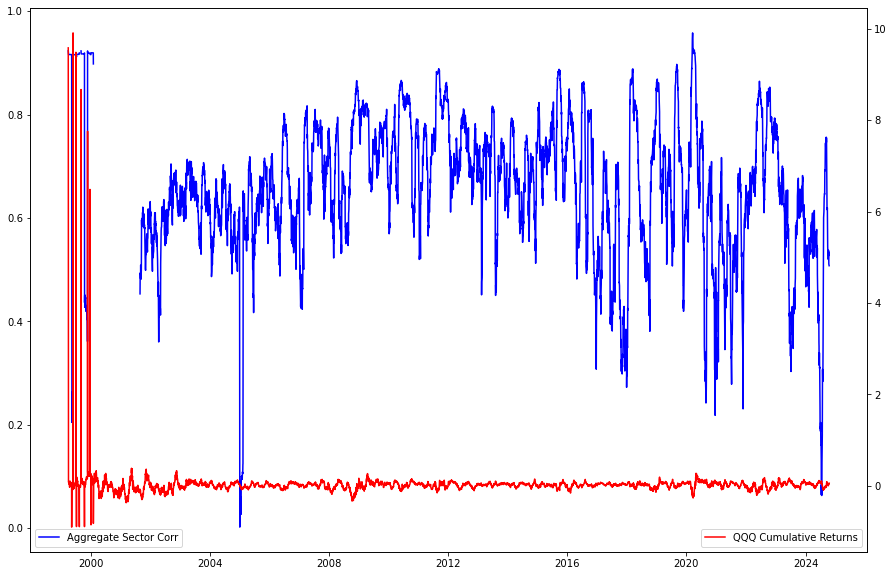

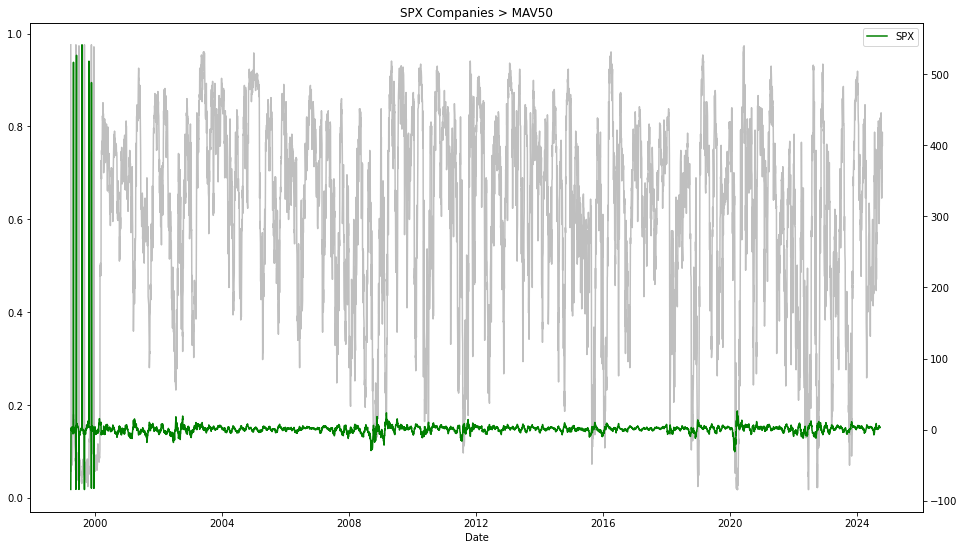

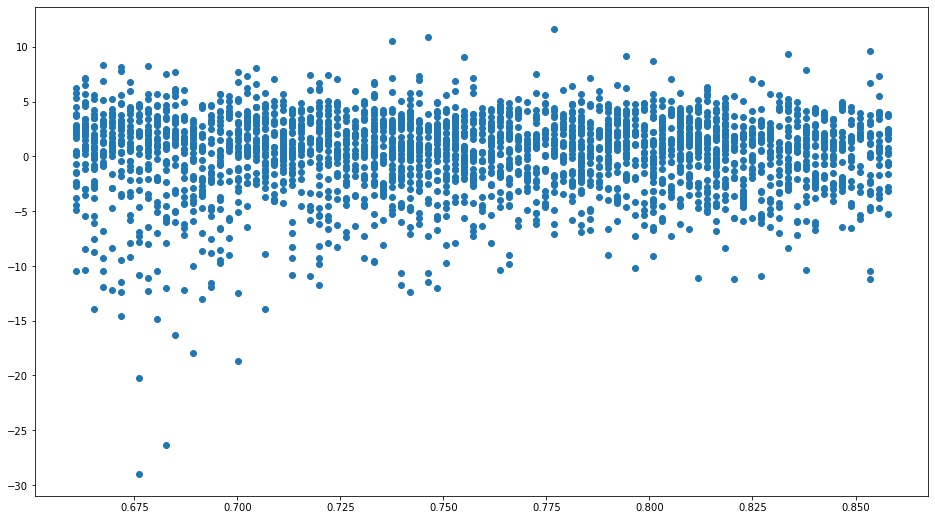

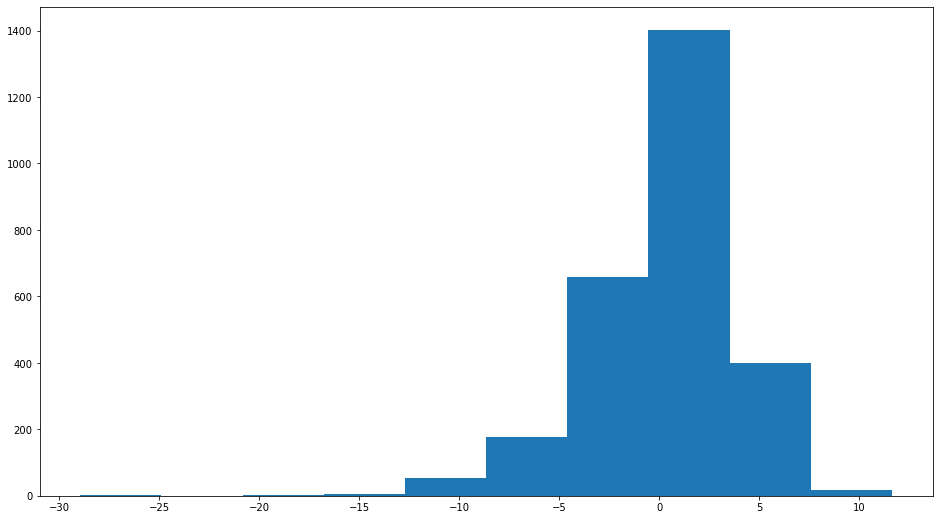

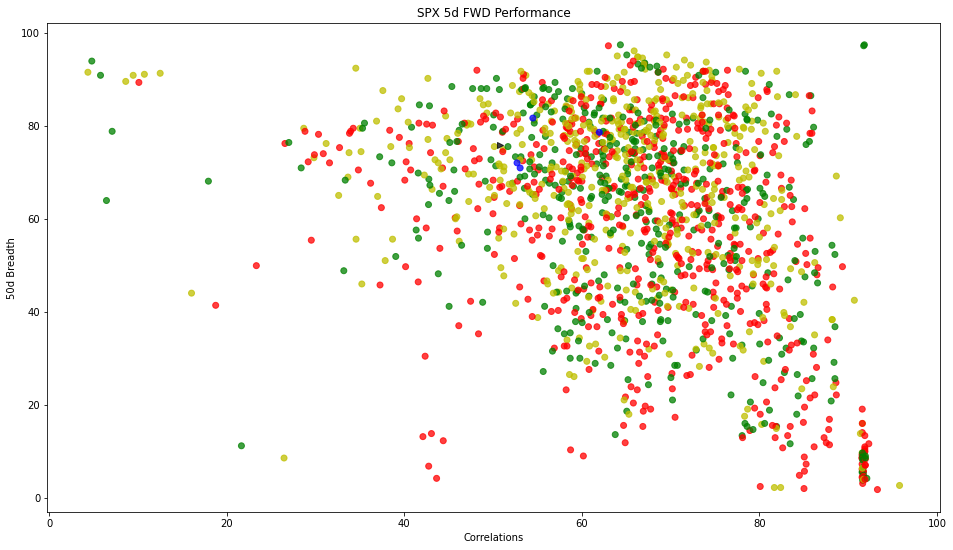

In [52]:
#%%writefile C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\sector_corrs.py

# Consolidated correlations & quantitative methods

import pandas as pd
import numpy as np
import math
import os
import csv
import yfinance as yf
#import mysql.connector
import psycopg2
import requests
import json
import tkinter as tk
import re
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import date
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df 

def Filter_df(tbf_df, merging_dates_list):
    
    filter_df = pd.DataFrame(merging_dates_list, columns=['Date'])
    merged_df = pd.merge(tbf_df, filter_df, on='Date')
    merged_df.index = filter_df['Date'] 
    merged_df.index.name = 'Date'
    merged_df.drop(['Date'], axis=1, inplace=True)
    
    
    return merged_df

def offset(stock_rel, i_list, d_list, t_date, r_date, div_i):
    
    cutoff_date = r_date
    Start_Date = t_date
    ed_list = d_list
    y_list = i_list
    cur_index = 0
    nd_list = []
    for cur_ed_date in ed_list:                            
        cont=0
        seek_element = True
        ced = cur_ed_date
        cur_index = ed_df[stock_rel].values.tolist()[cur_index:].index(cur_ed_date) + cur_index
        cur_index_plus = cur_index + 1
        if (cur_index_plus<len(ed_df.index)):
            cur_year = ed_df.index[cur_index_plus][len(ed_df.index[cur_index_plus])-4:]
        else:
            cur_year = today.year
        cur_ed_date = str(cur_year) + '-' + cur_ed_date[0:2] + '-' + cur_ed_date[2:]
        cur_ed_date = datetime.strptime(cur_ed_date, "%Y-%m-%d").date()
        if (cur_ed_date < cutoff_date):
            nd_list.append(cur_ed_date)        
    
    offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
    
    return offs
    

dbase = "visiblealpha_laptop"
dbase_metrics = "metrics_laptop"

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

engine_metrics = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase_metrics))

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase_metrics, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list_metrics = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])

today = date.today()
init_d = datetime.strptime('1999-04-01', "%Y-%m-%d").date()
window = 30
lag_p = 5
thresh = 1
step = 4
markers = ['o', 's', '>', '<']
    
number_to_string = {'6160 HK': 'BGNE US','700 HK': 'TCEHY US','2330 TT': 'TSM US','6758 JP': 'SONY US','9868 HK': 'XPEV US'}
string_to_number = {'BGNE US': '6160 HK','TCEHY US': '700 HK','TSM US': '2330 TT','SONY US': '6758 JP','XPEV US': '9868 HK'}
clean_up = lambda x: re.sub(r'[^A-Z /^0-9]', '', str(x))
clean_up_save = lambda x: re.sub(r'[^A-Z ^0-9]', '', str(x))
int_to_str = lambda x: str(x)
str_to_int = lambda x: int(x)

Sector_ETF_list = ['RWR US', 'XLB US', 'XLI US', 'XLY US', 'XLP US', 'XLE US', 'XLF US',
'ARKK US', 'XLV US', 'QQQ US', 'SPX', 'IWM US', 'EWZ US']

query_SPX = 'SELECT * FROM spx_constituents'    
SPXConstituents_df = pd.read_sql_query(query_SPX, engine)
SPXConstituents_df = Set_DF(SPXConstituents_df)
SPXConstituents_df = DD_Index(SPXConstituents_df)

query_prices = 'SELECT * FROM prices_relation'    
Prices_df = pd.read_sql_query(query_prices, engine)
Prices_df = Set_DF(Prices_df)
Prices_df = DD_Index(Prices_df)
Prices_df.sort_index(inplace = True)
Returns_df = Prices_df.pct_change()
SectorReturns_df = Returns_df[Sector_ETF_list]

AggregateCorr_df = pd.DataFrame((SectorReturns_df.rolling(30).corr().unstack()['QQQ US'].sum(axis = 1) / len(SectorReturns_df.columns)), columns = ['Average Corrs'])
#AggregateCorr_df = AggregateCorr_df.join(Returns_df['SPX'])
AggregateCorr_df = AggregateCorr_df.join((1 + Returns_df['QQQ US']).rolling(window).apply(np.prod, raw = True) - 1)
AggregateCorr_df.dropna(inplace = True)
AggregateCorr_df = AggregateCorr_df[AggregateCorr_df.index > init_d]
print('Last ' + str(round(100 * AggregateCorr_df.iloc[-1], 2)))

fig1 = plt.figure(figsize = (15, 10))
plt.subplots_adjust(wspace = 0.1, hspace = 0.15)
ax1 = fig1.add_subplot(1, 1, 1)
ax1.plot(AggregateCorr_df['Average Corrs'], color = 'b', label = 'Aggregate Sector Corr')
axr = ax1.twinx() 
axr.plot(AggregateCorr_df['QQQ US'], color = 'r', label = 'QQQ Cumulative Returns')
axr.legend(loc = 'lower right')
ax1.legend(loc = 'lower left')

lag = 20
SPX_Series = Prices_df['SPX'].loc[AggregateCorr_df.index]
SPX_Ret_Series = round(100 * (SPX_Series.shift(-lag) / SPX_Series - 1), 3)
SPX_list = SPXConstituents_df.iloc[0][SPXConstituents_df.iloc[0] != 'ZZZZ'].values.tolist()
SPX_list = [ticker for ticker in SPX_list if ticker in Prices_df.columns]
SPX_Pxs_df = Prices_df[SPX_list]  
MAV50_diff_df = (SPX_Pxs_df - SPX_Pxs_df.rolling(50).mean()).dropna(how = 'all')
MAV50_diff_df = MAV50_diff_df[MAV50_diff_df.index > init_d]
MAV50_diff_df = MAV50_diff_df.loc[AggregateCorr_df.index]
Count_Series = (1- MAV50_diff_df[MAV50_diff_df < 0].count(axis = 1) / len(MAV50_diff_df.columns))
plt.figure(2, figsize = (16, 9))
Count_Series.plot(title = 'SPX Companies > MAV50', c = 'k', alpha = 0.25).twinx()

lb = Count_Series.iloc[-1] - 0.10
ub = Count_Series.iloc[-1] + 0.10
SPX_Ret_Series.plot(c = 'g', label = 'SPX').legend(loc = 'best')
plt.figure(3, figsize = (16, 9))
plt.scatter(Count_Series.loc[Count_Series[Count_Series >= lb][Count_Series[Count_Series >= lb] <= ub].index], SPX_Ret_Series.loc[Count_Series[Count_Series >= lb][Count_Series[Count_Series >= lb] <= ub].index])
plt.figure(4, figsize = (16, 9))
plt.hist(SPX_Ret_Series.loc[Count_Series[Count_Series >= lb][Count_Series[Count_Series >= lb] <= ub].index], bins = 10)
print('')
print('Current Diffusion: ' + str(round(100 * Count_Series.iloc[-1], 2)))
print('Avg Return: ' +str(round(SPX_Ret_Series.loc[Count_Series[Count_Series >= lb][Count_Series[Count_Series >= lb] <= ub].index].mean(), 2)))

AggregateCorr_df.to_sql('aggregate_correlations', engine, index = True, if_exists = 'replace')

Combined1_df = pd.DataFrame(round(100 * AggregateCorr_df['Average Corrs'], 2))
Combined2_df = pd.DataFrame(round(100 * Count_Series, 2), columns = ['MAV50 Count'])
ret_df = round(100 * (Prices_df[Prices_df.index > init_d]['QQQ US'] / Prices_df[Prices_df.index > init_d]['QQQ US'].shift(-lag_p) - 1), 2)
Combined_df = Combined1_df.join(Combined2_df).join(ret_df)
Combined_df = Combined_df[::-step][::-1].copy()
Combined_df['Color'] = 'y'
Combined_df['Marker'] = 0
Combined_df.loc[Combined_df[Combined_df['QQQ US'] < -thresh].index, 'Color'] = 'r'
Combined_df.loc[Combined_df[Combined_df['QQQ US'] > thresh].index, 'Color'] = 'g'
Combined_df.loc[Combined_df.index[-lag_p: ], 'Color'] = 'b'
Combined_df.loc[Combined_df.index[-1], 'Color'] = '0'
Combined_df.loc[Combined_df.index[-1], 'Marker'] = 2
plt.figure(5, figsize = (16, 9))
shape_list = pd.unique(Combined_df['Marker']).tolist()
for curr_shape in shape_list:
    plt.scatter(Combined_df[Combined_df['Marker'] == curr_shape]['Average Corrs'], Combined_df[Combined_df['Marker'] == curr_shape]['MAV50 Count'], c = Combined_df[Combined_df['Marker'] == curr_shape]['Color'], marker = markers[curr_shape], alpha = 0.75)
plt.xlabel('Correlations')
plt.ylabel('50d Breadth')
plt.title('SPX ' + str(lag_p) + 'd FWD Performance')

<AxesSubplot:xlabel='Date'>

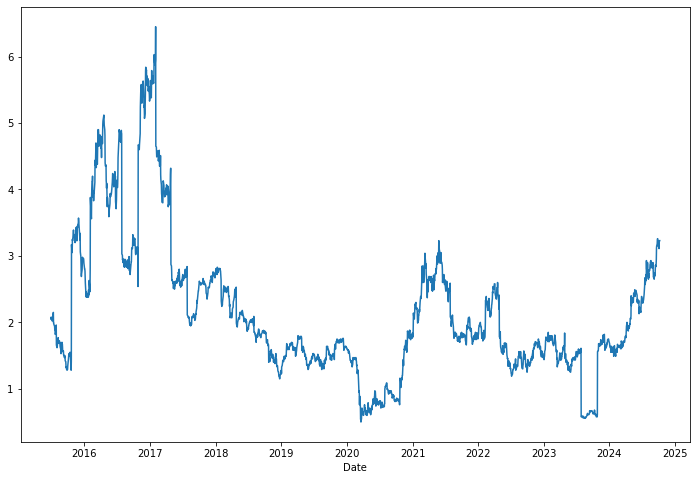

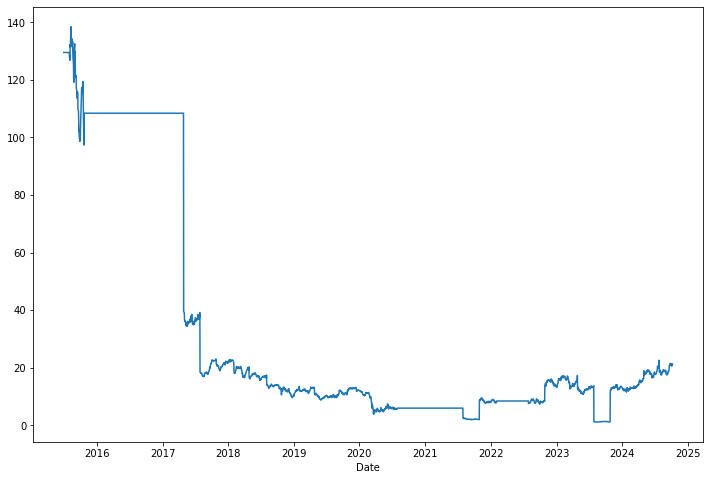

In [167]:
### FIXES VALUATION RELATIONS

import pandas as pd
import numpy as np
import math
import os
import csv
import yfinance as yf
#import mysql.connector
import psycopg2
import requests
import json
import tkinter as tk
import re
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import date
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df 

def Filter_df(tbf_df, merging_dates_list):
    
    filter_df = pd.DataFrame(merging_dates_list, columns=['Date'])
    merged_df = pd.merge(tbf_df, filter_df, on='Date')
    merged_df.index = filter_df['Date'] 
    merged_df.index.name = 'Date'
    merged_df.drop(['Date'], axis=1, inplace=True)
    
    
    return merged_df

def offset(stock_rel, i_list, d_list, t_date, r_date, div_i):
    
    cutoff_date = r_date
    Start_Date = t_date
    ed_list = d_list
    y_list = i_list
    cur_index = 0
    nd_list = []
    for cur_ed_date in ed_list:                            
        cont=0
        seek_element = True
        ced = cur_ed_date
        cur_index = ed_df[stock_rel].values.tolist()[cur_index:].index(cur_ed_date) + cur_index
        cur_index_plus = cur_index + 1
        if (cur_index_plus<len(ed_df.index)):
            cur_year = ed_df.index[cur_index_plus][len(ed_df.index[cur_index_plus])-4:]
        else:
            cur_year = today.year
        if (int(cur_ed_date[0:2]) == 2) & (int(cur_ed_date[2:]) > 28):
            cur_ed_date = '0228'
        cur_ed_date = str(cur_year) + '-' + cur_ed_date[0:2] + '-' + cur_ed_date[2:]
        cur_ed_date = datetime.strptime(cur_ed_date, "%Y-%m-%d").date()
        if (cur_ed_date < cutoff_date):
            nd_list.append(cur_ed_date)        
    
    offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
    
    return offs
    

dbase = "visiblealpha_laptop"
dbase_metrics = "metrics_laptop"

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

engine_metrics = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase_metrics))

query_val3 = "SELECT * FROM valuations_ps_relation"
Val3_df = pd.read_sql_query(query_val3, engine_metrics)
Val3_df = Set_DF(Val3_df)
Val3_df = DD_Index(Val3_df)

query_val4 = "SELECT * FROM valuations_oi_relation"
Val4_df = pd.read_sql_query(query_val4, engine_metrics)
Val4_df = Set_DF(Val4_df)
Val4_df = DD_Index(Val4_df)

ticker_list = Val3_df.columns.values.tolist()

ticker_list = ['CRS US'] ####################################################*********************************************
for ticker in ticker_list:
    Test1 = pd.DataFrame(Val3_df[ticker].copy())
    Test2 = pd.DataFrame(Val4_df[ticker].copy())
    Test1[Test1[ticker] < 0] = 100000
    Test1[ticker] = Test1[ticker].replace({100000: np.nan, 0: np.nan})
    Test1.fillna(method = 'ffill', inplace = True)
    Test1.fillna(method = 'bfill', inplace = True)
    Val3_df[ticker] = Test1[ticker]
    
    Test2[Test2[ticker] < 0] = 100000
    Test2[ticker] = Test2[ticker].replace({100000: np.nan, 0: np.nan})
    Test2.fillna(method = 'ffill', inplace = True)
    Test2.fillna(method = 'bfill', inplace = True)
    Val4_df[ticker] = Test2[ticker]    
     
#Val3_df.to_sql('valuations_ps_relation', engine_metrics, index=True, if_exists='replace')
#Val4_df.to_sql('valuations_oi_relation', engine_metrics, index=True, if_exists='replace')
plt.figure(0, figsize = (12, 8))
Val3_df[ticker].plot()
plt.figure(1, figsize = (12, 8))
Val4_df[ticker].plot()

In [33]:
#%%writefile C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\tech_indicators.py

#Creates Techical Indicators

import pandas as pd
import math
import numpy as np
import os
import csv
import yfinance as yf
#import mysql.connector
import matplotlib.pyplot as plt
import psycopg2
import requests
import json
#import tkinter as tk
import re
from datetime import datetime
from datetime import timedelta
from datetime import date
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression

def Average(lst):
    return sum(lst) / len(lst)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Filter_df(tbf_df, merging_dates_list):
    
    filter_df = pd.DataFrame(merging_dates_list, columns=['Date'])
    merged_df = pd.merge(tbf_df, filter_df, on='Date')
    merged_df.index = filter_df['Date'] 
    merged_df.index.name = 'Date'
    merged_df.drop(['Date'], axis=1, inplace=True)
    
    
    return merged_df

def offset(c_stock, i_list, d_list, t_date, r_date, div_i):
    
    cutoff_date = r_date
    Start_Date = t_date
    ed_list = d_list
    y_list = i_list
    cur_index = 0
    nd_list = []
    for cur_ed_date in ed_list:                            
        cont=0
        seek_element = True
        ced = cur_ed_date
        cur_index = ed_df[c_stock].values.tolist()[cur_index:].index(cur_ed_date) + cur_index
        cur_index_plus = cur_index + 1
        if (cur_index_plus<len(ed_df.index)):
            cur_year = ed_df.index[cur_index_plus][len(ed_df.index[cur_index_plus])-4:]
        else:
            cur_year = today.year
        cur_ed_date = str(cur_year) + '-' + cur_ed_date[0:2] + '-' + cur_ed_date[2:]
        cur_ed_date = datetime.strptime(cur_ed_date, "%Y-%m-%d").date()
        if (cur_ed_date < cutoff_date):
            nd_list.append(cur_ed_date)        
    
    offs = round_down(len(pd.Series(nd_list)[pd.Series(nd_list) > t_date]) / div_i, 0)
    
    return offs

dbase = "visiblealpha_laptop"
dbase_metrics = "metrics_laptop"
inflation_exp = 2

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

engine_metrics = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase_metrics))

number_to_string = {'6160 HK': 'BGNE US','700 HK': 'TCEHY US','2330 TT': 'TSM US','6758 JP': 'SONY US','9868 HK': 'XPEV US'}
string_to_number = {'BGNE US': '6160 HK','TCEHY US': '700 HK','TSM US': '2330 TT','SONY US': '6758 JP','XPEV US': '9868 HK'}
clean_up = lambda x: re.sub(r'[^A-Z /^0-9]', '', str(x))
clean_up_save = lambda x: re.sub(r'[^A-Z ^0-9]', '', str(x))

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list = pd.DataFrame(tables_list, columns=['Old'])['Old'].values.tolist()

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase_metrics, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list_metrics = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])

query_pxs = "SELECT * FROM prices_relation"
Prices_df = pd.read_sql_query(query_pxs, engine)
Prices_df = Set_DF(Prices_df)
Prices_df = DD_Index(Prices_df)
Prices_df.fillna(method='bfill', inplace=True)

query_mc = 'SELECT * FROM mkt_cap_relation'    
mc_df = pd.read_sql_query(query_mc, engine)
mc_df = Set_DF(mc_df)
mc_df = DD_Index(mc_df)

window_01 = 20
window_02 = 50
window_03 = 100

Prices2_df = Prices_df[::-1][mc_df.columns].loc[mc_df.index[::-1]]

MAV01_df = Prices2_df.rolling(window_01).mean()
MAV01_Ind_df = pd.DataFrame(0, index = Prices2_df.index, columns = Prices2_df.columns)
MAV01_Ind_df[Prices2_df > MAV01_df] = 1

MAV02_df = Prices2_df.rolling(window_02).mean()
MAV02_Ind_df = pd.DataFrame(0, index = Prices2_df.index, columns = Prices2_df.columns)
MAV02_Ind_df[Prices2_df > MAV02_df] = 1

MAV03_df = Prices2_df.rolling(window_03).mean()
MAV03_Ind_df = pd.DataFrame(0, index = Prices2_df.index, columns = Prices2_df.columns)
MAV03_Ind_df[Prices2_df > MAV03_df] = 1

MAV_Ind_df = MAV01_Ind_df + MAV02_Ind_df + MAV03_Ind_df

MAV01_Ind_df.to_sql('mav01', engine_metrics, index = True, if_exists = 'replace')
MAV02_Ind_df.to_sql('mav02', engine_metrics, index = True, if_exists = 'replace')
MAV03_Ind_df.to_sql('mav03', engine_metrics, index = True, if_exists = 'replace')
MAV_Ind_df.to_sql('mav_ind', engine_metrics, index = True, if_exists = 'replace')

Enter Start Date: (YY/MM/DD)23/01/01
Override? (Y/N): N
Graphs only? (Y/N): N
No data available for ABST US
software RESET!!!!!!!!!!!!!!!!!!!!!!!!!!!
0 AMPL US software
1 ASUR US software
industrials RESET!!!!!!!!!!!!!!!!!!!!!!!!!!!
2 AXON US industrials
3 BLKB US software
4 CDAY US software
5 ECOM US software
6 EGAN US software
7 ESMT US software
8 EVBG US software
9 FIVN US software
10 FRSH US software
No data available for GTYH US
health care RESET!!!!!!!!!!!!!!!!!!!!!!!!!!!
11 HSTM US health care
12 JAMF US software
13 LAW US software
14 LPSN US software
15 MNTV US software
16 MODN US software
17 NEWR US software
18 ONTF US software
19 PHR US software
20 PRO US software
21 PYCR US software
22 QLYS US software
23 QTWO US software
24 SEMR US software
25 SPSC US industrials
26 TOST US software
No data available for TTGT US
27 TWOU US software
28 TYL US software
29 UPLD US software
30 VERX US software
31 VRNT US software
32 WKME US software
33 YEXT US software
34 ZETA US software
35 ZU

324 MNST US consumer goods
325 MO US consumer goods
326 NLOK US software
327 PEP US consumer goods
328 PG US consumer goods
329 PYPL US software
330 T US telecommunications
331 TSN US consumer goods
332 VZ US telecommunications
No data available for MPNGF US
333 ACN US hardware
334 ADBE US software
335 ADSK US software
336 AKAM US software
337 AMAT US hardware
338 AMD US hardware
339 AMZN US consumer services
340 CDNS US software
341 CSCO US hardware
342 EA US hardware
343 EBAY US consumer services
344 FB US software
345 AJG US financials
346 FISV US software
347 FTNT US software
348 GOOGL US software
349 HPQ US hardware
350 IBM US hardware
351 INTC US hardware
352 INTU US software
353 LRCX US hardware
354 MSFT US software
355 MU US hardware
356 NFLX US consumer services
357 NOW US software
358 NVDA US hardware
359 ORCL US software
360 QCOM US hardware
361 QRVO US hardware
362 STX US hardware
363 SWKS US hardware
364 TXN US hardware
No data available for VRSN US
365 XLNX US hardware
36

671 WMB US energy
672 WLTW US financials
673 WYNN US consumer services
674 XYL US industrials
675 YUM US consumer services
676 ZBRA US software
677 ZBH US health care
678 ZION US financials
No data available for 6758 JP
679 HFG GR consumer services
680 MRNA US health care
681 DELL US hardware
682 PLAN US software
683 SMAR US software
684 ESTC US software
685 MDB US software
686 SHL GR health care
687 CRWD US software
688 ZS US software
689 ZAL GR consumer services
690 OKTA US software
691 CHKP US software
692 SAIC US hardware
693 TTE FP energy
694 ORA FP telecommunications
695 DOCN US software
696 ENGI FP utilities
697 AIR FP industrials
698 STM FP hardware
699 BNP FP financials
700 DSY FP z
701 PFPT US z
702 SUMO US software
No data available for MDLA US
703 SPT US software
704 PAGS US financials
705 CHWY US consumer services
706 ONEM US health care
707 GRWG US consumer services
708 RXT US hardware
709 REAL US consumer services
710 NARI US health care
711 BE US industrials
712 ABNB US

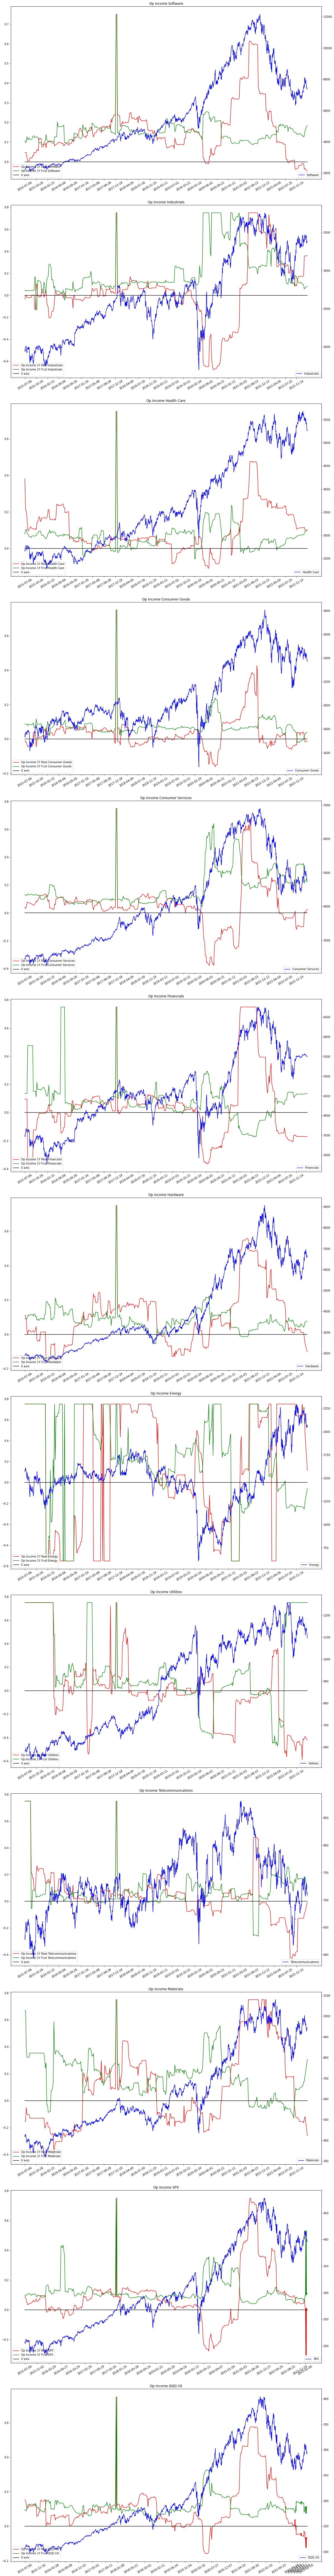

In [35]:
#Builds Sector Consolidated KPI Relation + Graphs 

%run C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\sector_kpi.py

In [181]:
# Creates VIX Tracker
# UNDER DEVELOPMENT

import pandas as pd
import numpy as np
import math
import os
import csv
import yfinance as yf
#import mysql.connector
import psycopg2
import requests
import json
import tkinter as tk
import re
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import date
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def round_up(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.ceil(n * multiplier) / multiplier)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df 

def Create_Ind_Records(st_date, columns_list):
    
    print('NEW!!!')
    stock_records_df = pd.DataFrame('n', index=pd.date_range(st_date,today,freq='B').date, columns=columns_list)
    stock_records_df.index.name = 'Date'
    stock_records_df['Checked'] = 'n'
    
    return stock_records_df
    

dbase = "visiblealpha_laptop"
dbase_metrics = "metrics_laptop"

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

engine_metrics = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase_metrics))

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list=[]
len_tl=len(tables_list)
cont_tl=0
while (cont_tl<len_tl):
    new_tables_list.append(re.sub(r'[^a-z_^0-9]', '', str(tables_list[cont_tl])))
    cont_tl=cont_tl+1
    
int_to_str = lambda x: str(x)
str_to_int = lambda x: int(x)
round_f = lambda x: round(x, 1) 
round_f2 = lambda x: round(x, 2)
roundup_z = lambda x: round_up(x, 0) 

today = date.today()

sec1 = 'VIX'

query_prices = 'SELECT * FROM prices_relation'    
Prices_df = pd.read_sql_query(query_prices, engine)
Prices_df = Set_DF(Prices_df)
Prices_df = DD_Index(Prices_df)

query_rates = 'SELECT * FROM rates_tracker_relation'    
rates_df = pd.read_sql_query(query_rates, engine_metrics)
rates_df = Set_DF(rates_df)
rates_df = DD_Index(rates_df)

vix_df = pd.DataFrame(Prices_df['VIX'][3000::-1])

window = int(input("Enter MAV window (42): "))
#smooth = int(input("Enter smooth factor (8): "))

window_start = window
window_end = window
step = 30
window_list = []
corr_list = []
while (window <= window_end):
    vix_df['VIX_MAV'] = round(vix_df[sec1].rolling(window).mean(), 2)
    vix_df['Var_Up'] = ((vix_df['VIX'] / 100) ** 2 - (vix_df['VIX_MAV'] / 100) ** 2) * (vix_df['VIX'] >= vix_df['VIX_MAV']) / 365
    vix_df['Var_Down'] = (-(vix_df['VIX'] / 100) ** 2 + (vix_df['VIX_MAV'] / 100) ** 2) * (vix_df['VIX'] <= vix_df['VIX_MAV']) / 365

#   Window_Ret_SPX = Prices_df['SPX'].shift(30) / Prices_df['SPX'] - 1
#   Window_Ret_ARKK = Prices_df['ARKK US'].shift(30) / Prices_df['ARKK US'] - 1
#   Out_ARKK = 10 * (Window_Ret_SPX - Window_Ret_ARKK) 
#   Out_ARKK = Out_ARKK.map(round_f2)
#   rates_df.iloc[30:500]['MAV_RI'].plot()
#   Out_ARKK.iloc[30:500].plot()
#   corr_ = rates_df.iloc[30:1000]['MAV_RI'].corr(Out_ARKK.iloc[30:1000])
#   window_list.append(window)
#   corr_list.append(corr_)
    window = window + step
vix_df['Cumulative_Down'] = 0
vix_df['Cumulative_Up'] = 0
for current_date in vix_df.index[1:]:
    prev_date = vix_df.index.values.tolist()[vix_df.index.values.tolist().index(current_date) - 1]
    if (vix_df.loc[current_date, 'Var_Down'] == 0): 
        vix_df.loc[current_date, 'Cumulative_Down'] = 0
        vix_df.loc[current_date, 'Cumulative_Up'] = vix_df.loc[prev_date, 'Cumulative_Up'] + vix_df.loc[current_date, 'Var_Up']
    else:
        vix_df.loc[current_date, 'Cumulative_Up'] = 0
        vix_df.loc[current_date, 'Cumulative_Down'] = vix_df.loc[prev_date, 'Cumulative_Down'] + vix_df.loc[current_date, 'Var_Down']
#vix_df.to_sql('vix_tracker_relation', engine_metrics, index=True, if_exists='replace')
new_vix_df = pd.DataFrame(vix_df[window + 1:])
new_vix_df['Cumulative_Down'] = (75 * (new_vix_df['Cumulative_Down'].replace({np.nan: 0}) ** (1/2))).map(roundup_z)
new_vix_df['Cumulative_Up'] = (75 * (new_vix_df['Cumulative_Up'].replace({np.nan: 0}) ** (1/2))).map(roundup_z)

new_vix_df['Index'] = round(new_vix_df['VIX'] / 10, 0) * 10 + (new_vix_df['Cumulative_Up'] - new_vix_df['Cumulative_Down']) / 10

new_vix_df = new_vix_df.join(round(100 * Prices_df['SPX'][::-1].pct_change(), 2))
new_vix_df = new_vix_df.join(round(100 * Prices_df['QQQ US'][::-1].pct_change(), 2))
new_vix_df = new_vix_df.join(round(100 * Prices_df['ARKK US'][::-1].pct_change(),2))
new_vix_df = new_vix_df.join(round(rates_df['MAV_RI'], 0))

new_vix_df['Shifted_Index'] = new_vix_df['Index'].shift(1)
out_pivot = pd.pivot_table(data = new_vix_df, index = ['Shifted_Index'], columns = ['MAV_RI'], values = 'QQQ US', aggfunc = 'sum')
print(out_pivot[15:])

new_vix_df[-50:]

Enter MAV window (42): 42
MAV_RI           1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0
Shifted_Index                                                       
19.2            0.78   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
19.5            4.41   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
19.6           16.53 -1.09   NaN   NaN   NaN   NaN   NaN   NaN   NaN
19.7           16.11  3.43  1.41 -0.90 -7.83  0.57   NaN   NaN   NaN
19.8            3.37 -2.73 -2.41  1.63  3.80 -2.98 -4.66  5.42   NaN
19.9           19.15  1.40 -3.36  2.63  0.70  3.88  2.24  0.94  1.44
20.0           -1.08   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
20.1          -28.73 -5.89 -9.63  2.49  3.88 -2.73  0.65 -3.03   NaN
20.2           17.97 -1.17  2.68 -4.72 -0.24 -2.24 -0.57  2.61  1.55
20.3           16.39   NaN   NaN   NaN   NaN -0.91   NaN   NaN   NaN
20.4           -0.44   NaN  6.56   NaN   NaN   NaN   NaN   NaN   NaN
29.2            1.29   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
29.3    

VIX  VIX_MAV    Var_Up  Var_Down  Cumulative_Down  \
Date                                                              
2022-02-04  23.22    21.51  0.000021 -0.000000                0   
2022-02-07  22.86    21.54  0.000016 -0.000000                0   
2022-02-08  21.44    21.61 -0.000000  0.000002                1   
2022-02-09  19.96    21.60 -0.000000  0.000019                1   
2022-02-10  23.91    21.65  0.000028 -0.000000                0   
2022-02-11  27.36    21.84  0.000074 -0.000000                0   
2022-02-14  28.33    22.02  0.000087 -0.000000                0   
2022-02-15  25.70    22.12  0.000047 -0.000000                0   
2022-02-16  24.29    22.16  0.000027 -0.000000                0   
2022-02-17  28.11    22.33  0.000080 -0.000000                0   
2022-02-18  27.75    22.54  0.000072 -0.000000                0   
2022-02-21  27.75    22.78  0.000069 -0.000000                0   
2022-02-22  28.81    23.03  0.000082 -0.000000                0   
2022-02-23  31.02    23.35  0.000114 -0.000000                0   
2022-02-24  30.32    23.66  0.000098 -0.000000                0   
2022-02-25  27.59    23.91  0.000052 -0.000000                0   
2022-02-28  30.15    24.21  0.000088 -0.000000                0   
2022-03-01  33.32    24.60  0.000138 -0.000000                0   
2022-03-02  30.74    24.93  0.000089 -0.000000                0   
2022-03-03  30.48    25.26  0.000080 -0.000000                0   
2022-03-04  31.98    25.55  0.000101 -0.000000                0   
2022-03-07  36.45    25.95  0.000180 -0.000000                0   
2022-03-08  35.13    26.34  0.000148 -0.000000                0   
2022-03-09  32.45    26.65  0.000094 -0.000000                0   
2022-03-10  30.23    26.93  0.000052 -0.000000                0   
2022-03-11  30.75    27.24  0.000056 -0.000000                0   
2022-03-14  31.77    27.52  0.000069 -0.000000                0   
2022-03-15  29.83    27.77  0.000033 -0.000000                0   
2022-03-16  26.67    27.95 -0.000000  0.000019                1   
2022-03-17  25.67    28.02 -0.000000  0.000035                1   
2022-03-18  23.87    28.02 -0.000000  0.000059                1   
2022-03-21  23.53    27.97 -0.000000  0.000063                1   
2022-03-22  22.94    27.83 -0.000000  0.000068                2   
2022-03-23  23.57    27.68 -0.000000  0.000058                2   
2022-03-24  21.67    27.45 -0.000000  0.000078                2   
2022-03-25  20.81    27.19 -0.000000  0.000084                2   
2022-03-28  20.80    26.96 -0.000000  0.000081                2   
2022-03-29  18.90    26.75 -0.000000  0.000098                2   
2022-03-30  19.33    26.62 -0.000000  0.000092                3   
2022-03-31  20.56    26.58 -0.000000  0.000078                3   
2022-04-01  19.63    26.52 -0.000000  0.000087                3   
2022-04-04  18.57    26.39 -0.000000  0.000096                3   
2022-04-05  21.03    26.33 -0.000000  0.000069                3   
2022-04-06  22.10    26.32 -0.000000  0.000056                3   
2022-04-07  21.55    26.32 -0.000000  0.000063                3   
2022-04-08  21.16    26.35 -0.000000  0.000068                3   
2022-04-11  24.37    26.36 -0.000000  0.000028                3   
2022-04-12  24.51    26.29 -0.000000  0.000025                3   
2022-04-13  21.82    26.14 -0.000000  0.000057                3   
2022-04-14  22.65    26.06 -0.000000  0.000046                3   

            Cumulative_Up  Index   SPX  QQQ US  ARKK US  MAV_RI  Shifted_Index  
Date                                                                            
2022-02-04              3   20.3  0.47    1.26     5.37     6.0           20.3  
2022-02-07              3   20.3 -0.32   -0.80    -0.37     6.0           20.3  
2022-02-08              0   19.9  0.82    1.12    -0.12     6.0           20.3  
2022-02-09              0   19.9  1.46    2.12     5.14     6.0           19.9  
2022-02-10              1   20.1 -1.80   -2

In [53]:
#Plots histograms of returns vs MAV index

New_Prices_df = Prices_df[::-1].loc[MAV_Ind_df.index]
OneMonth_ret_df = (New_Prices_df.shift(-21) / New_Prices_df - 1)
OneMonth_ret_df = OneMonth_ret_df.loc[MAV_Ind_df.index].dropna(how = 'all', axis = 0)
MAV_Ind_df_stacked = pd.DataFrame(MAV_Ind_df.loc[OneMonth_ret_df.index].stack(), columns = ['MAV Index'])
MAV_Ind_df_stacked['1M Ret'] = OneMonth_ret_df.stack()

mean_0 = round(MAV_Ind_df_stacked[MAV_Ind_df_stacked['MAV Index'] == 0]['1M Ret'].mean() * 100 * 100, 0) / 100
mean_1 = round(MAV_Ind_df_stacked[MAV_Ind_df_stacked['MAV Index'] >= 1]['1M Ret'].mean() * 100 * 100, 0) / 100
mean_2 = round(MAV_Ind_df_stacked[MAV_Ind_df_stacked['MAV Index'] >= 2]['1M Ret'].mean() * 100 * 100, 0) / 100
mean_3 = round(MAV_Ind_df_stacked[MAV_Ind_df_stacked['MAV Index'] >= 3]['1M Ret'].mean() * 100 * 100, 0) / 100
print('Mean 00: ' + str(mean_0))
print('')
print('Mean 01: ' + str(mean_1))
print('')
print('Mean 02: ' + str(mean_2))
print('')
print('Mean 03: ' + str(mean_3))
print('')

std_0 = round(MAV_Ind_df_stacked[MAV_Ind_df_stacked['MAV Index'] == 0]['1M Ret'].std() * 100 * 100, 0) / 100
std_1 = round(MAV_Ind_df_stacked[MAV_Ind_df_stacked['MAV Index'] >= 1]['1M Ret'].std() * 100 * 100, 0) / 100
std_2 = round(MAV_Ind_df_stacked[MAV_Ind_df_stacked['MAV Index'] >= 2]['1M Ret'].std() * 100 * 100, 0) / 100
std_3 = round(MAV_Ind_df_stacked[MAV_Ind_df_stacked['MAV Index'] >= 3]['1M Ret'].std() * 100 * 100, 0) / 100
print('STD 00: ' + str(std_0))
print('')
print('STD 01: ' + str(std_1))
print('')
print('STD 02: ' + str(std_2))
print('')
print('STD 03: ' + str(std_3))
print('')

Mean 00: 1.44

Mean 01: 1.14

Mean 02: 1.03

Mean 03: 0.97

STD 00: 13.04

STD 01: 9.97

STD 02: 9.58

STD 03: 9.17



In [ ]:
## CHANGES THE TICKER OF A COMPANY ACROSS RELATIONS

import pandas as pd
import numpy as np
import math
import os
import csv
import yfinance as yf
from yahoofinancials import YahooFinancials as yfs
#import mysql.connector
import psycopg2
import requests
import json
import tkinter as tk
import re
import time
import warnings
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sqlalchemy import create_engine

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df

dbase = "visiblealpha_laptop"
dbase_metrics = "metrics_laptop"

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase_metrics, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list_metrics = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])
    
headers = authenticate('leonardob.moraes@outlook.com','akf7a7j5@@')

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

engine_metrics = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase_metrics))

query_iscode = "SELECT * FROM is_codes"
iscodes_df = pd.read_sql_query(query_iscode, engine)
iscodes_df = Set_DF(iscodes_df)
iscodes_df = DD_Index(iscodes_df)
reports_list = iscodes_df['Line Description'].replace({None: ''}).values.tolist()

query_spec = "SELECT * FROM operating_metrics"
Spec_df = pd.read_sql_query(query_spec, engine)
Spec_df = Set_DF(Spec_df)
Spec_df = DD_Index(Spec_df)

today = date.today()
relations_list = ['va_yf', 'prices_relation', 'mkt_cap_relation', 'yq_all', 'ed_relation', 'correlations_relation', 'volatilities_relation', 'ind_erp_relation', 'momentum_relation', 'valuations_oi_relation', 'valuations_ps_relation', 'operating_metrics']

am_ticker = input('Enter ALGO ticker (current): ').upper()
new_ticker = input('Enter ALGO ticker (new): ').upper()
sql_old = re.sub(r'[^a-z_^0-9]', '', am_ticker.lower())
sql_new = re.sub(r'[^a-z_^0-9]', '', new_ticker.lower())

for curr_relation in relations_list:
    metrics = False
    save = True
    try:
        query_rel = "SELECT * FROM " + curr_relation
        Relation_df = pd.read_sql_query(query_rel, engine)
        Relation_df = Set_DF(Relation_df)
        Relation_df = DD_Index(Relation_df)
    except:
        query_rel = "SELECT * FROM " + curr_relation
        Relation_df = pd.read_sql_query(query_rel, engine_metrics)
        Relation_df = Set_DF(Relation_df)
        Relation_df = DD_Index(Relation_df)   
        metrics = True
    
    if (am_ticker in Relation_df.index):
        Relation_df = Relation_df.rename(index = {am_ticker: new_ticker})
        print(curr_relation + ' DONE')        
    elif (am_ticker in Relation_df.columns):
        Relation_df = Relation_df.rename(columns = {am_ticker: new_ticker})
        print(curr_relation + ' DONE')
    else:
        save = False
        print(curr_relation + ' NOT DONE!!!!!!!!!!!!!!!!!!!!!!!')
    if (save):
        if (metrics):
            Relation_df.to_sql(curr_relation, engine_metrics, index = True, if_exists = 'replace')
        else:
            Relation_df.to_sql(curr_relation, engine, index = True, if_exists = 'replace')
        
spec_reports_list = Relation_df.loc[new_ticker].map(lambda x: '_om_' + x.split(',')[0]).values.tolist()
final_reports_list = reports_list + spec_reports_list
final_reports_list.append('_records')
final_reports_list.append('_growth')

for curr_report in final_reports_list:
    report_name = sql_old + curr_report
    report_name_new = sql_new + curr_report
    if (report_name in new_tables_list):
        query_rel = "SELECT * FROM " + report_name
        Relation_df = pd.read_sql_query(query_rel, engine)
        Relation_df = Set_DF(Relation_df)
        Relation_df = DD_Index(Relation_df)
        Relation_df.to_sql(report_name_new, engine, index = True, if_exists = 'replace')
        print(report_name_new + ' DONE')  
    elif (report_name in new_tables_list_metrics):
        query_rel = "SELECT * FROM " + report_name
        Relation_df = pd.read_sql_query(query_rel, engine_metrics)
        Relation_df = Set_DF(Relation_df)
        Relation_df = DD_Index(Relation_df)
        Relation_df.to_sql(report_name_new, engine_metrics, index = True, if_exists = 'replace')
        print(report_name_new + ' DONE')          
    
print('End')

In [3]:
#%%writefile C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\stock_split.py
## ***********************************************************************************************************************

# Adjusts for Stock Splits

import pandas as pd
import numpy as np
import math
import os
import csv
import yfinance as yf
#import mysql.connector
import psycopg2
import requests
import json
import tkinter as tk
import re
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import date
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine

def Average(lst):
    return sum(lst) / len(lst)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Filter_df(tbf_df, merging_dates_list):
    
    filter_df = pd.DataFrame(merging_dates_list, columns=['Date'])
    merged_df = pd.merge(tbf_df, filter_df, on='Date')
    merged_df.index = filter_df['Date'] 
    merged_df.index.name = 'Date'
    merged_df.drop(['Date'], axis=1, inplace=True)
    
    
    return merged_df

def authenticate(username,password):
    
    auth_url = 'https://app.visiblealpha.com/auth/'
    headers = {'Content-Type': 'application/json', 'Accept': 'application/json'}
    payload = {'username':username, 'password':password}
    
    response = requests.post(auth_url, json = payload, headers = headers)
    
    try:
        jwt = response.json()['jwt']
        # update and return headers
        headers['Authorization'] = 'Bearer '+jwt
        return headers
    
    except:
        print('Review response')
        return response   

def Create_Ind_Records(st_date, columns_list):
    
    print('NEW!!!')
    stock_records_df = pd.DataFrame('n', index=pd.date_range(st_date,today,freq='B').date, columns=columns_list)
    stock_records_df.index.name = 'Date'
    stock_records_df['Checked'] = 'n'
    
    return stock_records_df

dbase = "visiblealpha_laptop"
dbase_metrics = "metrics_laptop"

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase_metrics, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list_metrics = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

engine_metrics = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase_metrics))

today = date.today()

query_prices = 'SELECT * FROM prices_relation'    
Prices_df = pd.read_sql_query(query_prices, engine)
Prices_df = Set_DF(Prices_df)
Prices_df = DD_Index(Prices_df)
Prices_df = Prices_df[::-1]

query_mc = 'SELECT * FROM mkt_cap_relation'    
mc_df = pd.read_sql_query(query_mc, engine)
mc_df = Set_DF(mc_df)
mc_df = DD_Index(mc_df)
mc_df = mc_df[::-1]

stock = input("Enter ticker: ").upper()
split_date = input("Enter Split Date (adj b4 that date): (YY/MM/DD)")
split_date = datetime.strptime(split_date, "%y/%m/%d").date()
ratio = int(input("Enter ratio: "))

if (stock not in Prices_df.columns):
    print('Wrong ticker')
else:
    Prices_df[stock] = list(Prices_df[stock][Prices_df[stock].index < split_date] / ratio) + list(Prices_df[stock][Prices_df[stock].index >= split_date])
    Prices_df = Prices_df[::-1]
    Prices_df.to_sql('prices_relation', engine, index = True, if_exists = 'replace')
    wasb = re.sub(r'[^a-z^0-9]', '', stock.lower()) + '_wasb'
    wasd = re.sub(r'[^a-z^0-9]', '', stock.lower()) + '_wasd'
    epsb = re.sub(r'[^a-z^0-9]', '', stock.lower()) + '_epsb'
    epsd = re.sub(r'[^a-z^0-9]', '', stock.lower()) + '_epsd'
    report_list = [wasb, wasd, epsb, epsd]
    ratio_list = [ratio, ratio, (1 / ratio), (1 / ratio)]
    amend_group = zip(report_list, ratio_list)
    for report, mult in amend_group:
        if (report in new_tables_list):
            query = 'SELECT * FROM ' + report 
            amended_df = pd.read_sql_query(query, engine)
            amended_df = Set_DF(amended_df)
            amended_df = DD_Index(amended_df)
            amended_1 = amended_df[amended_df.index < split_date] * mult 
            amended_2 = amended_df[amended_df.index >= split_date]
            amended_df = pd.concat([amended_1, amended_2])
            amended_df.to_sql(report, engine, index = True, if_exists = 'replace')

others = input("Update vols/ierp/corrs (Y/N)? ").upper()
if (others == 'Y'):
    query_eyspx = 'SELECT * FROM spx_erp'    
    EYSPX_df = pd.read_sql_query(query_eyspx, engine)
    EYSPX_df = Set_DF(EYSPX_df)
    EYSPX_df = DD_Index(EYSPX_df)

    inflation_exp = 2
    window = 21
    upper_band = 4
    lower_band = -4
    upper_band_N = 2
    lower_band_N = -2
    Start_Date = datetime.strptime('10/01/02', "%y/%m/%d").date()

    NewPrices_df = Prices_df[Prices_df.index > Start_Date][::-1]
    Returns = NewPrices_df.pct_change()
    Corr_df = 100 * Returns.rolling(window, min_periods = round(window / 3)).corr(Returns['SPX'])
    NewVols_df = round(Returns.ewm(halflife = 100).std() * np.sqrt(252) * 100, 2)
    Slice_NewVols_df = NewVols_df.loc[EYSPX_df.index]
    Momentum_df = (((1 + Returns).rolling(window).apply(np.prod, raw = True) - 1) / (NewVols_df * np.sqrt(window / 252) / 100)).clip(lower_band, upper_band)
    Momentum_df[Momentum_df[Momentum_df > lower_band_N] < upper_band_N] = 0

    IERP_df = (Slice_NewVols_df.swapaxes('index', 'columns') / Slice_NewVols_df['SPX']).swapaxes('index', 'columns')[mc_df.columns]
    IERP_df = IERP_df * Corr_df[mc_df.columns].loc[EYSPX_df.index[::-1]] / 100
    IERP_df = round((IERP_df.swapaxes('index', 'columns') * EYSPX_df['ERP'][::-1]).swapaxes('index', 'columns') + inflation_exp, 2)
    IERP_df = IERP_df.swapaxes('index', 'columns') - EYSPX_df['ERP'][::-1]
    IERP_df[IERP_df < 0] = 0
    IERP_df = (IERP_df + EYSPX_df['ERP'][::-1]).swapaxes('index', 'columns')

    Corr_df[::-1].to_sql('correlations_relation', engine, index=True, if_exists='replace')
    NewVols_df[::-1].to_sql('volatilities_relation', engine, index=True, if_exists='replace')
    IERP_df[::-1].to_sql('ind_erp_relation', engine, index=True, if_exists='replace')
    Momentum_df[::-1].to_sql('momentum_relation', engine, index=True, if_exists='replace')

Enter ticker: LRCX US
Enter Split Date (adj b4 that date): (YY/MM/DD)24/10/04
Enter ratio: 10
Update vols/ierp/corrs (Y/N)? Y


In [ ]:
#ofdf factor model

def _factor_returns(
    returns: np.ndarray,
    mkt_caps: np.ndarray,
    sector_scores: np.ndarray,
    style_scores: np.ndarray,
    residualize_styles: bool,
) -> tuple[np.ndarray, np.ndarray]:
    """Estimate market, sector, style and residual asset returns for one time period, robust to rank deficiency.

    Parameters
    ----------
    returns: np.ndarray returns of the assets (shape n_assets x 1)
    mkt_caps: np.ndarray of asset market capitalizations (shape n_assets x 1)
    sector_scores: np.ndarray of asset scores used to estimate the sector return (shape n_assets x m_sectors)
    style_scores: np.ndarray of asset scores used to estimate style factor returns (shape n_assets x m_styles)
    residualize_styles: bool indicating if styles should be orthogonalized to market + sector

    Returns
    -------
    tuple of arrays: (market/sector/style factor returns, residual returns)
    """
    n_assets = returns.shape[0]
    m_sectors, m_styles = sector_scores.shape[1], style_scores.shape[1]

    # Proxy for the inverse of asset idiosyncratic variances
    W = np.diag(np.sqrt(mkt_caps.ravel()))

    # Estimate sector factor returns with a constraint that the sector factors sum to 0
    # Economically, we assert that the market return is completely spanned by the sector returns
    beta_sector = np.hstack([np.ones(n_assets).reshape(-1, 1), sector_scores])
    a = np.concatenate([np.array([0]), (-1 * np.ones(m_sectors - 1))])
    Imat = np.identity(m_sectors)
    R_sector = np.vstack([Imat, a])
    # Change of variables to add the constraint
    B_sector = beta_sector @ R_sector

    V_sector, _, _, _ = np.linalg.lstsq(
        B_sector.T @ W @ B_sector, B_sector.T @ W, rcond=None
    )
    # Change of variables to recover all sectors
    g = V_sector @ returns
    fac_ret_sector = R_sector @ g

    sector_resid_returns = returns - (B_sector @ g)

    # Estimate style factor returns without constraints
    V_style, _, _, _ = np.linalg.lstsq(
        style_scores.T @ W @ style_scores, style_scores.T @ W, rcond=None
    )
    if residualize_styles:
        fac_ret_style = V_style @ sector_resid_returns
    else:
        fac_ret_style = V_style @ returns

    # Combine factor returns
    fac_ret = np.concatenate([fac_ret_sector, fac_ret_style])

    # Calculate final residuals
    epsilon = sector_resid_returns - (style_scores @ fac_ret_style)

    return fac_ret, epsilon


def winsorize(data: np.ndarray, percentile: float = 0.05, axis: int = 0) -> np.ndarray:
    """Windorize each vector of a 2D numpy array to symmetric percentiles given by percentile.

    This returns a Polars expression, not a DataFrame, so it be chained (including lazily) in
    a select or with_columns invocation without needing to set a new intermediate DataFrame variable.

    Parameters
    ----------
    data: numpy array containing original data to be winsorized
    percentile: float indicating the percentiles to apply winsorization at
    axis: int indicating which axis to apply winsorization over (i.e. orientation if dara is 2D)

    Returns
    -------
    numpy array
    """
    if not 0 <= percentile <= 1:
        raise ValueError("percentile must be between 0 and 1")

    fin_data = np.where(np.isfinite(data), data, np.nan)

    # compute lower and upper percentiles for each column
    lower_bounds = np.nanpercentile(
        fin_data, percentile * 100, axis=axis, keepdims=True
    )
    upper_bounds = np.nanpercentile(
        fin_data, (1 - percentile) * 100, axis=axis, keepdims=True
    )

    # clip data to within the bounds
    return np.clip(data, lower_bounds, upper_bounds)

def estimate_factor_returns(
    returns_df: pl.DataFrame,
    mkt_cap_df: pl.DataFrame,
    sector_df: pl.DataFrame,
    style_df: pl.DataFrame,
    winsor_factor: float | None = 0.05,
    residualize_styles: bool = True,
) -> tuple[pl.DataFrame, pl.DataFrame] | pl.DataFrame:
    """Estimate factor and residual returns across all time periods using input asset factor scores.

    Parameters
    ----------
    returns_df: Polars DataFrame containing | date | symbol | asset_returns |
    mkt_cap_df: Polars DataFrame containing | date | symbol | market_cap |
    sector_df: Polars DataFrame containing | date | symbol | followed by one column for each sector
    style_df: Polars DataFrame containing | date | symbol | followed by one column for each style
    winsor_factor: winsorization proportion
    residualize_styles: bool indicating if style returns should be orthogonalized to market + sector returns

    Returns
    -------
    tuple of Polars DataFrames melted by date: (factor returns, residual returns)
    """
    returns, residuals = [], []
    try:
        sectors = sorted(sector_df.select(pl.exclude("date", "symbol")).columns)
    except AttributeError as e:
        raise TypeError(
            "sector_df must be a Polars DataFrame, but it's missing required attributes"
        ) from e
    except pl.ColumnNotFoundError as e:
        raise ValueError(
            "sector_df must have columns for 'date' and 'symbol' in addition to each sector"
        ) from e
    try:
        styles = sorted(style_df.select(pl.exclude("date", "symbol")).columns)
    except AttributeError as e:
        raise TypeError(
            "style_df must be a Polars DataFrame, but it's missing required attributes"
        ) from e
    except pl.ColumnNotFoundError as e:
        raise ValueError(
            "style_df must have columns for 'date' and 'symbol' in addition to each style"
        ) from e
    try:
        returns_df = (
            returns_df.join(mkt_cap_df, on=["date", "symbol"])
            .join(sector_df, on=["date", "symbol"])
            .join(style_df, on=["date", "symbol"])
        )
        dates = returns_df["date"].unique().to_list()
        # iterate through, one day at a time
        # this could probably be made more efficient with Polars' .map_groups method
        for dt in dates:
            ddf = returns_df.filter(pl.col("date") == dt).sort("symbol")
            r = ddf["asset_returns"].to_numpy()
            if winsor_factor is not None:
                r = winsorize(r, winsor_factor)
            f, e = _factor_returns(
                r,
                ddf["market_cap"].to_numpy(),
                ddf.select(sectors).to_numpy(),
                ddf.select(styles).to_numpy(),
                residualize_styles,
            )
            returns.append(f)
            residuals.append(dict(zip(ddf["symbol"].to_list(), e)))
    except AttributeError as e:
        raise TypeError(
            "returns_df and mkt_cap_df must be Polars DataFrames, but there are missing attributes"
        ) from e
    except pl.ColumnNotFoundError as e:
        raise ValueError(
            "returns_df must have columns 'date', 'symbol' and 'asset_returns'; "
            "mkt_cap_df must have 'date', 'symbol' and 'market_cap' columns"
        ) from e
    ret_df = pl.DataFrame(np.array(returns))
    ret_df.columns = ["market"] + sectors + styles
    ret_df = ret_df.with_columns(pl.Series(dates).alias("date"))
    eps_df = pl.DataFrame(residuals).with_columns(pl.Series(dates).alias("date"))
    return ret_df, eps_df


def exp_weights(window: int, half_life: int) -> np.ndarray:
    """Generate exponentially decaying weights over window trailing values, decaying by half each half_life index.

    Parameters
    ----------
    window: integer number of points in the trailing lookback period
    half_life: integer decay rate

    Returns
    -------
    numpy array
    """
    decay = np.log(2) / half_life
    return np.exp(-decay * np.arange(window))[::-1]

def center_xsection(
    target_col: str, over_col: str, standardize: bool = False
) -> pl.Expr:
    """Cross-sectionally center (and optionally standardize) a Polars DataFrame target_col partitioned by over_col.

    This returns a Polars expression, so it be chained in a select or with_columns invocation
    without needing to set a new intermediate DataFrame or materialize lazy evaluation.

    Parameters
    ----------
    target_col: the column to be standardized
    over_col: the column over which standardization should be applied, cross-sectionally
    standardize: boolean indicating if we should also standardize the target column

    Returns
    -------
    Polars Expr
    """
    expr = pl.col(target_col) - pl.col(target_col).drop_nulls().drop_nans().mean().over(
        over_col
    )
    if standardize:
        return expr / pl.col(target_col).drop_nulls().drop_nans().std().over(over_col)
    return expr

def winsorize_xsection(
    df: pl.DataFrame | pl.LazyFrame,
    data_cols: tuple[str, ...],
    group_col: str,
    percentile: float = 0.05,
) -> pl.DataFrame | pl.LazyFrame:
    """Cross-sectionally winsorize the data_cols of df, grouped on group_col, to the symmetric percentile
    given by percentile.

    Parameters
    ----------
    df: Polars DataFrame or LazyFrame containing feature data to winsorize
    data_cols: collection of strings indicating the columns of df to be winsorized
    group_col: str column of df to use as the cross-sectional group
    percentile: float value indicating the symmetric winsorization threshold

    Returns
    -------
    Polars DataFrame or LazyFrame
    """

    def winsorize_group(group: pl.DataFrame) -> pl.DataFrame:
        for col in data_cols:
            winsorized_data = winsorize(group[col].to_numpy(), percentile=percentile)
            group = group.with_columns(pl.Series(col, winsorized_data).alias(col))
        return group

    grouped = df.groupby(group_col).apply(winsorize_group)
    return grouped

def factor_mom(
    returns_df: pl.DataFrame | pl.LazyFrame,
    trailing_days: int = 504,
    half_life: int = 126,
    lag: int = 20,
    winsor_factor: float = 0.01,
) -> pl.LazyFrame:
    """Estimate rolling symbol by symbol momentum factor scores using asset returns.

    Parameters
    ----------
    returns_df: Polars DataFrame containing columns: | date | symbol | asset_returns |
    trailing_days: int look back period over which to measure momentum
    half_life: int decay rate for exponential weighting, in days
    lag: int number of days to lag the current day's return observation (20 trading days is one month)

    Returns
    -------
    Polars DataFrame containing columns: | date | symbol | mom_score |
    """
    weights = exp_weights(trailing_days, half_life)

    def weighted_cumprod(values: np.ndarray) -> float:
        return (np.cumprod(1 + (values * weights[-len(values) :])) - 1)[-1]  # type: ignore

    try:
        df = (
            returns_df.lazy()
            .sort(by="date")
            .with_columns(
                pl.col("asset_returns").shift(lag).over("symbol").alias("asset_returns")
            )
            .with_columns(
                pl.col("asset_returns")
                .rolling_map(weighted_cumprod, window_size=trailing_days)
                .over(pl.col("symbol"))
                .alias("mom_score")
            )
        ).collect()
        df = winsorize_xsection(df, ("mom_score",), "date", percentile=winsor_factor)
        return df.lazy().select(
            pl.col("date"),
            pl.col("symbol"),
            center_xsection("mom_score", "date", True).alias("mom_score"),
        )
    except AttributeError as e:
        raise TypeError(
            "returns_df must be a Polars DataFrame | LazyFrame, but it's missing attributes"
        ) from e
    except pl.ColumnNotFoundError as e:
        raise ValueError(
            "returns_df must have 'date', 'symbol' and 'asset_returns' columns"
        ) from e
        
        
def exp_weights(window: int, half_life: int) -> np.ndarray:
    """Generate exponentially decaying weights over window trailing values, decaying by half each half_life index.

    Parameters
    ----------
    window: integer number of points in the trailing lookback period
    half_life: integer decay rate

    Returns
    -------
    numpy array
    """
    decay = np.log(2) / half_life
    return np.exp(-decay * np.arange(window))[::-1]

def center_xsection(
    target_col: str, over_col: str, standardize: bool = False
) -> pl.Expr:
    """Cross-sectionally center (and optionally standardize) a Polars DataFrame target_col partitioned by over_col.

    This returns a Polars expression, so it be chained in a select or with_columns invocation
    without needing to set a new intermediate DataFrame or materialize lazy evaluation.

    Parameters
    ----------
    target_col: the column to be standardized
    over_col: the column over which standardization should be applied, cross-sectionally
    standardize: boolean indicating if we should also standardize the target column

    Returns
    -------
    Polars Expr
    """
    expr = pl.col(target_col) - pl.col(target_col).drop_nulls().drop_nans().mean().over(
        over_col
    )
    if standardize:
        return expr / pl.col(target_col).drop_nulls().drop_nans().std().over(over_col)
    return expr

def winsorize_xsection(
    df: pl.DataFrame | pl.LazyFrame,
    data_cols: tuple[str, ...],
    group_col: str,
    percentile: float = 0.05,
) -> pl.DataFrame | pl.LazyFrame:
    """Cross-sectionally winsorize the data_cols of df, grouped on group_col, to the symmetric percentile
    given by percentile.

    Parameters
    ----------
    df: Polars DataFrame or LazyFrame containing feature data to winsorize
    data_cols: collection of strings indicating the columns of df to be winsorized
    group_col: str column of df to use as the cross-sectional group
    percentile: float value indicating the symmetric winsorization threshold

    Returns
    -------
    Polars DataFrame or LazyFrame
    """

    def winsorize_group(group: pl.DataFrame) -> pl.DataFrame:
        for col in data_cols:
            winsorized_data = winsorize(group[col].to_numpy(), percentile=percentile)
            group = group.with_columns(pl.Series(col, winsorized_data).alias(col))
        return group

    grouped = df.groupby(group_col).apply(winsorize_group)
    return grouped

def factor_mom(
    returns_df: pl.DataFrame | pl.LazyFrame,
    trailing_days: int = 504,
    half_life: int = 126,
    lag: int = 20,
    winsor_factor: float = 0.01,
) -> pl.LazyFrame:
    """Estimate rolling symbol by symbol momentum factor scores using asset returns.

    Parameters
    ----------
    returns_df: Polars DataFrame containing columns: | date | symbol | asset_returns |
    trailing_days: int look back period over which to measure momentum
    half_life: int decay rate for exponential weighting, in days
    lag: int number of days to lag the current day's return observation (20 trading days is one month)

    Returns
    -------
    Polars DataFrame containing columns: | date | symbol | mom_score |
    """
    weights = exp_weights(trailing_days, half_life)

    def weighted_cumprod(values: np.ndarray) -> float:
        return (np.cumprod(1 + (values * weights[-len(values) :])) - 1)[-1]  # type: ignore

    try:
        df = (
            returns_df.lazy()
            .sort(by="date")
            .with_columns(
                pl.col("asset_returns").shift(lag).over("symbol").alias("asset_returns")
            )
            .with_columns(
                pl.col("asset_returns")
                .rolling_map(weighted_cumprod, window_size=trailing_days)
                .over(pl.col("symbol"))
                .alias("mom_score")
            )
        ).collect()
        df = winsorize_xsection(df, ("mom_score",), "date", percentile=winsor_factor)
        return df.lazy().select(
            pl.col("date"),
            pl.col("symbol"),
            center_xsection("mom_score", "date", True).alias("mom_score"),
        )
    except AttributeError as e:
        raise TypeError(
            "returns_df must be a Polars DataFrame | LazyFrame, but it's missing attributes"
        ) from e
    except pl.ColumnNotFoundError as e:
        raise ValueError(
            "returns_df must have 'date', 'symbol' and 'asset_returns' columns"
        ) from e
        
def fill_features(
    df: pl.DataFrame | pl.LazyFrame, features: tuple[str], sort_col: str, over_col: str
) -> pl.LazyFrame:
    """Cast feature columns to numeric (float), convert NaN and inf values to null, then forward fill nulls
    for each column of features, sorted on sort_col and partitioned by over_col.

    Parameters
    ----------
    df: Polars DataFrame or LazyFrame containing columns sort_col, over_col and each of features
    features: collection of strings indicating which columns of df are the feature values
    sort_col: str column of df indicating how to sort
    over_col: str column of df indicating how to partition

    Returns
    -------
    Polars LazyFrame containing the original columns with cleaned feature data
    """
    try:
        return (
            df.lazy()
            .with_columns([pl.col(f).cast(float).alias(f) for f in features])
            .with_columns(
                [
                    pl.when(
                        (pl.col(f).abs() == np.inf)
                        | (pl.col(f) == np.nan)
                        | (pl.col(f).is_null())
                        | (pl.col(f).cast(str) == "NaN")
                    )
                    .then(None)
                    .otherwise(pl.col(f))
                    .alias(f)
                    for f in features
                ]
            )
            .sort(by=sort_col)
            .with_columns(
                [pl.col(f).forward_fill().over(over_col).alias(f) for f in features]
            )
        )
    except AttributeError as e:
        raise TypeError(
            "df must be a Polars DataFrame | LazyFrame, but it's missing required attributes"
        ) from e
    except pl.ColumnNotFoundError as e:
        raise ValueError(
            f"df must have all of {[over_col, sort_col] + list(features)} as columns"
        ) from e
        
        
def factor_val(
    value_df: pl.DataFrame | pl.LazyFrame, winsorize_features: float | None = None
) -> pl.LazyFrame:
    """Estimate rolling symbol by symbol value factor scores using price ratios.

    Parameters
    ----------
    value_df: Polars DataFrame containing columns: | date | symbol | book_price | sales_price | cf_price
    winsorize_features: optional float indicating if the features should be winsorized. none applied if None

    Returns
    -------
    Polars DataFrame containing: | date | symbol | val_score |
    """
    try:
        if winsorize_features is not None:
            value_df = winsorize_xsection(
                value_df, ("book_price", "sales_price", "cf_price"), "date"
            )
        return (
            value_df.lazy()
            .with_columns(
                pl.col("book_price").log().alias("book_price"),
                pl.col("sales_price").log().alias("sales_price"),
            )
            .with_columns(
                center_xsection("book_price", "date", True).alias("book_price"),
                center_xsection("sales_price", "date", True).alias("sales_price"),
                center_xsection("cf_price", "date", True).alias("cf_price"),
            )
            .with_columns(
                # NB: it's imperative you've properly handled NaNs prior to this point
                pl.mean_horizontal(
                    pl.col("book_price"),
                    pl.col("sales_price"),
                    pl.col("cf_price"),
                ).alias("val_score")
            )
            .select(
                pl.col("date"),
                pl.col("symbol"),
                center_xsection("val_score", "date", True).alias("val_score"),
            )
        )
    except AttributeError as e:
        raise TypeError(
            "value_df must be a Polars DataFrame or LazyFrame, but it's missing attributes"
        ) from e
    except pl.ColumnNotFoundError as e:
        raise ValueError(
            "value_df must have 'date', 'symbol', 'book_price', 'sales_price' and 'fcf_price' columns"
        ) from e
        
def smooth_features(
    df: pl.DataFrame | pl.LazyFrame,
    features: tuple[str],
    sort_col: str,
    over_col: str,
    window_size: int,
) -> pl.LazyFrame:
    """Smooth the features columns of df by taking the rolling mean of each, sorted over sort_col and
    partitioned by over_col, using window_size trailing periods for the moving average window.

    Parameters
    ----------
    df: Polars DataFrame | LazyFrame containing columns sort_col, over_col and each of features
    features: collection of strings indicating which columns of df are the feature values
    sort_col: str column of df indicating how to sort
    over_col: str column of df indicating how to partition
    window_size: int number of time periods for the moving average

    Returns
    -------
    Polars LazyFrame containing the original columns, with each of features replaced with moving average
    """
    try:
        return (
            df.lazy()
            .sort(by=sort_col)
            .with_columns(
                [
                    pl.col(f)
                    .rolling_mean(window_size=window_size)
                    .over(over_col)
                    .alias(f)
                    for f in features
                ]
            )
        )
    except AttributeError as e:
        raise TypeError(
            "df must be a Polars DataFrame | LazyFrame, but it's missing required attributes"
        ) from e
    except pl.ColumnNotFoundError as e:
        raise ValueError(
            f"df must have all of {[over_col, sort_col] + list(features)} as columns"
        ) from e

def top_n_by_group(
    df: pl.DataFrame | pl.LazyFrame,
    n: int,
    rank_var: str,
    group_var: tuple[str, ...],
    filter: bool = True,
) -> pl.LazyFrame:
    """Mark the top n rows in each of group_var according to rank_var descending.

    If filter is True, the returned DataFrame contains only the filtered data. If filter is False,
    the returned DataFrame has all data, with an additional 'rank_mask' column indicating if that row
    is in the filter.

    Parameters
    ----------
    df: Polars DataFrame | LazyFrame
    n: integer indicating the top rows to take in each group
    rank_var: str column name to rank on
    group_var: tuple of str column names to group and sort on
    filter: boolean indicating how much data to return

    Returns
    -------
    Polars LazyFrame containing original columns and optional filter column
    """
    try:
        rdf = (
            df.lazy()
            .sort(by=list(group_var) + [rank_var])
            .with_columns(
                pl.col(rank_var)
                .rank(descending=True)
                .over(group_var)
                .cast(int)
                .alias("rank")
            )
        )
        match filter:
            case True:
                return (
                    rdf.filter(pl.col("rank") <= n)
                    .drop("rank")
                    .sort(by=list(group_var) + [rank_var])
                )
            case False:
                return (
                    rdf.with_columns(
                        pl.when(pl.col("rank") <= n)
                        .then(pl.lit(1))
                        .otherwise(pl.lit(0))
                        .alias("rank_mask")
                    )
                    .drop("rank")
                    .sort(by=list(group_var) + [rank_var])
                )
    except pl.ColumnNotFoundError as e:
        raise ValueError(
            f"df is missing one or more required columns: '{rank_var}' and '{group_var}'"
        ) from e
    except AttributeError as e:
        raise TypeError(
            "df must be a Polars DataFrame or LazyFrame but is missing a required attribute"
        ) from e        

In [71]:
# GROUPING STUDIES

def on_selection(value):
    global choice_sector
    choice_sector = value  # store the user's choice
    root.destroy()  # close window

#Pxs_df = open_df('prices_relation')
Pxs_df = Pxs_df.sort_index()
long_w = 1000

stocks = pd.read_csv(r"C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\Tickers_VA.csv")
all_tickers_l = stocks['tickers'].tolist()
all_tickers_l = [t for t in all_tickers_l if t in Pxs_df.columns]
all_tickers_l = pd.Series(all_tickers_l)[pd.Series(all_tickers_l).map(lambda x: x.split(' ')[1]) == 'US']

sectors = pd.read_csv(r"C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\Custom_Segmentation.csv")
Sectors_df = pd.DataFrame(sectors)
Sectors_df = Set_DF(Sectors_df)
Sectors_df = DD_Index(Sectors_df)
Nsector_l = pd.unique(Sectors_df.dropna(subset = ['Custom Sector 3'])['Custom Sector 3']).tolist()
Nsector_s = Sectors_df[Sectors_df['Custom Sector 3'].isna() == False]['Custom Sector 3']

N2sector_l = pd.unique(Sectors_df.dropna(subset = ['Custom Sector 2'])['Custom Sector 2']).tolist()
N2sector_s = Sectors_df[Sectors_df['Custom Sector 2'].isna() == False]['Custom Sector 2']

N3sector_l = pd.unique(Sectors_df.dropna(subset = ['Custom Sector 4'])['Custom Sector 4']).tolist()
N3sector_s = Sectors_df[Sectors_df['Custom Sector 4'].isna() == False]['Custom Sector 4']

N4sector_l = pd.unique(Sectors_df.dropna(subset = ['Custom Sector 5'])['Custom Sector 5']).tolist()
N4sector_s = Sectors_df[Sectors_df['Custom Sector 5'].isna() == False]['Custom Sector 5']

Osector_l = pd.unique(Sectors_df.dropna(subset = ['Custom Sector 1'])['Custom Sector 1']).tolist()
Osector_s = Sectors_df[Sectors_df['Custom Sector 1'].isna() == False]['Custom Sector 1']


grouping_w1 = 504
grouping_w2 = 252
grouping_w3 = 126
p_cut = 30

OautocorrS_s = pd.Series(np.nan, index = Osector_l)
NautocorrS_s = pd.Series(np.nan, index = Nsector_l)
N2autocorrS_s = pd.Series(np.nan, index = N2sector_l)
N3autocorrS_s = pd.Series(np.nan, index = N3sector_l)
N4autocorrS_s = pd.Series(np.nan, index = N4sector_l)

for c_sector in Osector_l:
    sec_tickers_l = [t for t in all_tickers_l if t in Osector_s[Osector_s == c_sector].index.tolist()]
    corr1_df = round(100 * Pxs_df[sec_tickers_l].pct_change()[-grouping_w1:].corr(), 3)
    OautocorrS_s.loc[c_sector] = round((corr1_df.sum().sum() - corr1_df.shape[0] * 100) / 2 / corr1_df.shape[0] / 
                                        corr1_df.shape[0], 2)  
for c_sector in Nsector_l:
    sec_tickers_l = [t for t in all_tickers_l if t in Nsector_s[Nsector_s == c_sector].index.tolist()]
    corr1_df = round(100 * Pxs_df[sec_tickers_l].pct_change()[-grouping_w1:].corr(), 3)
    NautocorrS_s.loc[c_sector] = round((corr1_df.sum().sum() - corr1_df.shape[0] * 100) / 2 / corr1_df.shape[0] / 
                                        corr1_df.shape[0], 2)  
    
for c_sector in N2sector_l:
    sec_tickers_l = [t for t in all_tickers_l if t in N2sector_s[N2sector_s == c_sector].index.tolist()]
    corr1_df = round(100 * Pxs_df[sec_tickers_l].pct_change()[-grouping_w1:].corr(), 3)
    N2autocorrS_s.loc[c_sector] = round((corr1_df.sum().sum() - corr1_df.shape[0] * 100) / 2 / corr1_df.shape[0] / 
                                         corr1_df.shape[0], 2)    
    
for c_sector in N3sector_l:
    sec_tickers_l = [t for t in all_tickers_l if t in N3sector_s[N3sector_s == c_sector].index.tolist()]
    corr1_df = round(100 * Pxs_df[sec_tickers_l].pct_change()[-grouping_w1:].corr(), 3)
    N3autocorrS_s.loc[c_sector] = round((corr1_df.sum().sum() - corr1_df.shape[0] * 100) / 2 / corr1_df.shape[0] / 
                                         corr1_df.shape[0], 2) 
    
for c_sector in N4sector_l:
    sec_tickers_l = [t for t in all_tickers_l if t in N4sector_s[N4sector_s == c_sector].index.tolist()]
    corr1_df = round(100 * Pxs_df[sec_tickers_l].pct_change()[-grouping_w1:].corr(), 3)
    N4autocorrS_s.loc[c_sector] = round((corr1_df.sum().sum() - corr1_df.shape[0] * 100) / 2 / corr1_df.shape[0] / 
                                         corr1_df.shape[0], 2)     

root = tk.Tk()
tkvar = tk.StringVar(root)
popupMenu = tk.OptionMenu(root, tkvar, *Osector_l, command = on_selection)
tk.Label(root, text = "Choose a sector").grid(row = 0, column = 0)
popupMenu.grid(row = 1, column = 0)
root.mainloop()

sec_tickers_l = [t for t in all_tickers_l if t in Osector_s[Osector_s == choice_sector].index.tolist()]
corr1_df = round(100 * Pxs_df[sec_tickers_l].pct_change()[-grouping_w1:].corr(), 3)
groups1_df = pd.DataFrame(np.nan, index = np.arange(p_cut) + 1, columns = corr1_df.columns)
for c_ticker in corr1_df.columns:
    try:
        groups1_df[c_ticker] = corr1_df[c_ticker].dropna().sort_values()[-(p_cut + 1): -1].index[::-1].tolist() + [''] * max(0, (groups1_df.shape[0] - (corr1_df.shape[0] - 1)))
    except:
        print(c_ticker.split(' ')[0] + ' error')
        groups1_df = groups1_df.drop([c_ticker], axis = 1)
        
print(choice_sector) 
print('')
print(OautocorrS_s)
print('')

Nall_tickers_l = [t for t in all_tickers_l if t in Nsector_s.index]
N2all_tickers_l = [t for t in all_tickers_l if t in N2sector_s.index]
N3all_tickers_l = [t for t in all_tickers_l if t in N3sector_s.index]
N4all_tickers_l = [t for t in all_tickers_l if t in N4sector_s.index]
Nmap_df = pd.DataFrame(NautocorrS_s, columns = ['Avg Corr'])
Nmap_df['Constituents'] = pd.Series(Nall_tickers_l).map(lambda x: Nsector_s.loc[x]).value_counts()
N2map_df = pd.DataFrame(N2autocorrS_s, columns = ['Avg Corr'])
N2map_df['Constituents'] = pd.Series(N2all_tickers_l).map(lambda x: N2sector_s.loc[x]).value_counts()
N3map_df = pd.DataFrame(N3autocorrS_s, columns = ['Avg Corr'])
N3map_df['Constituents'] = pd.Series(N3all_tickers_l).map(lambda x: N3sector_s.loc[x]).value_counts()
N4map_df = pd.DataFrame(N4autocorrS_s, columns = ['Avg Corr'])
N4map_df['Constituents'] = pd.Series(N4all_tickers_l).map(lambda x: N4sector_s.loc[x]).value_counts()

print('Custom 3, ' + str(NautocorrS_s.shape[0]) + ' constituents:')
print(Nmap_df.sort_values(by = ['Avg Corr'], ascending = False))
print('Average corr cs3: ' + str(round(Nmap_df['Avg Corr'].mean(), 2)))
print('')
print('Custom 2, ' + str(N2autocorrS_s.shape[0]) + ' constituents:')
print(N2map_df.sort_values(by = ['Avg Corr'], ascending = False))
print('Average corr cs2: ' + str(round(N2map_df['Avg Corr'].mean(), 2)))
print('')
print('Custom 4, ' + str(N3autocorrS_s.shape[0]) + ' constituents:')
print(N3map_df.sort_values(by = ['Avg Corr'], ascending = False))
print('Average corr cs4: ' + str(round(N3map_df['Avg Corr'].mean(), 2)))
print('')
print('Custom 5, ' + str(N4autocorrS_s.shape[0]) + ' constituents:')
print(N4map_df.sort_values(by = ['Avg Corr'], ascending = False))
print('Average corr cs5: ' + str(round(N4map_df['Avg Corr'].mean(), 2)))

NLSN error
Consumer Services

Software              14.07
Industrials           16.18
Health Care            9.60
Consumer Goods        11.49
Hardware              16.51
Financials            16.15
Consumer Services     11.03
Energy                20.52
Utilities             28.73
Telecommunications    15.14
Materials             17.11
dtype: float64

Custom 3, 37 constituents:
                                Avg Corr  Constituents
Energy                             29.78            23
Home Building                      29.67             7
Utilities                          28.73            28
REITs                              27.20            32
Banks & Brokers                    27.20            22
Airlines                           26.80             5
AI                                 24.72            18
Industrial Machinery               23.56            13
Multipurpose Tech                  22.32             4
Entertainment                      20.84            13
Renewables    

In [76]:
stockCaseS = 'AMZN US'
all_tickers_l = stocks['tickers'].tolist()
all_tickers_l = [t for t in all_tickers_l if t in Pxs_df.columns]
all_tickers_l = pd.Series(all_tickers_l)[pd.Series(all_tickers_l).map(lambda x: x.split(' ')[1]) == 'US']

print('Sector Corrs:')
print(pd.DataFrame(groups1_df[stockCaseS].replace({'': np.nan}).dropna()).join(groups1_df[stockCaseS].replace({'': np.nan}).dropna().map(lambda x: N2sector_s.loc[x]), rsuffix = '_Ind'))
print('')
print('All Corrs:')
round(100 * Pxs_df.pct_change()[all_tickers_l][-long_w:].corr()[stockCaseS], 2).sort_values(ascending = False).drop(stockCaseS)[:30]

Sector Corrs:
    AMZN US             AMZN US_Ind
1      W US       Consumer Services
2   COST US                 Staples
3   NFLX US       Consumer Services
4   SPOT US       Consumer Services
5   ABNB US  Consumer Discretionary
6   BKNG US  Consumer Discretionary
7   DKNG US       Consumer Services
8   MGNI US       Consumer Services
9     HD US  Consumer Discretionary
10   LOW US           Home Building
11  MELI US       Consumer Services
12   CMG US  Consumer Discretionary
13   CZR US  Consumer Discretionary
14  CHWY US       Consumer Services
15   MAR US  Consumer Discretionary
16   FND US           Home Building
17   HLT US  Consumer Discretionary
18  NWSA US       Consumer Services
19   CCL US  Consumer Discretionary
20  LULU US  Consumer Discretionary
21  ETSY US       Consumer Services
22   DIS US       Consumer Services
23  EBAY US       Consumer Services
24  DUOL US       Consumer Services
25   RCL US  Consumer Discretionary
26   LYV US  Consumer Discretionary
27  EXPE US  C

MSFT US     66.70
GOOGL US    64.12
INTU US     62.49
META US     58.78
NOW US      58.43
NET US      56.85
DDOG US     56.82
ANSS US     56.71
AAPL US     56.70
SNOW US     56.40
ADBE US     56.23
SNPS US     56.09
ADSK US     55.98
NVDA US     55.55
CRM US      55.43
CDNS US     54.92
MDB US      54.83
HUBS US     54.74
MELI US     54.68
MRVL US     54.18
SQ US       54.18
ZS US       54.08
AMD US      53.19
TROW US     53.13
WDAY US     53.05
U US        52.96
BX US       52.43
BILL US     52.41
TTD US      52.24
PD US       51.52
Name: AMZN US, dtype: float64